### Context:
1965-2019
An environmentally sustainable power sector is central to modern society since plants have significant impact on climate, through carbon dioxide (CO2) emissions; on water stress, through water withdrawal and consumption; and on air quality, through sulfur oxides (SOx), nitrogen oxides (NOx), and particulate matter (PM) emissions.

The datasets used in this project is publicly accessible in Our World in Data and Word Resources Institute. Datasets contains the following characteristics and indicators:

All types of fuel
Technical characteristics (fuel, technology, ownership)
Plants’ geolocation
Energy production/consumption (per capita) around the globe since 1965
Annual change in primary energy consumption

In [67]:
#loading the data
import pandas as pd
data0 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/World Energy Consumption.csv")
data1 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/global_power_plant_database_last.csv")
data2 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/Primary-energy-consumption-from-fossilfuels-nuclear-renewables.csv")
data3 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/share-elec-produc-by-source.csv")
data4 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/share-energy-consum-by-source.csv")
data5 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/annual-co2-emissions-per-country.csv")

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_33104/3869898116.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/global_power_plant_database_last.csv")


# Preprocessing and gathering the data

## Data 0

In [68]:
data0.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data0.isnull().sum()


iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

## Data 1

In [70]:
data1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [71]:
data1.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


## Data 2

In [72]:
data2.head()

,Entity,Code,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy)
0,Africa,NaN,1965,94.463,5.537,0.0
1,Africa,NaN,1966,94.127,5.873,0.0
2,Africa,NaN,1967,93.920,6.080,0.0
3,Africa,NaN,1968,93.257,6.743,0.0
4,Africa,NaN,1969,92.317,7.683,0.0


In [73]:
data2.isnull().sum()

Entity                           0
Code                           165
Year                             0
Fossil fuels (% sub energy)      0
Renewables (% sub energy)        0
Nuclear (% sub energy)           0
dtype: int64

In [74]:
#removing the code column inthe data2
data2.pop("Code")
data2.pop("Nuclear (% sub energy)")# already present in data4
data2.head()

,Entity,Year,Fossil fuels (% sub energy),Renewables (% sub energy)
0,Africa,1965,94.463,5.537
1,Africa,1966,94.127,5.873
2,Africa,1967,93.920,6.080
3,Africa,1968,93.257,6.743
4,Africa,1969,92.317,7.683


## Data3

In [75]:
data3.head()

,Entity,Code,Year,Coal (% electricity),Gas (% electricity),Hydro (% electricity),Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity)
0,Afghanistan,AFG,2000,0.0,33.190578,66.809422,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,15.878378,84.121622,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,19.213974,80.786026,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,32.907348,67.092652,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,36.800895,63.199105,0.0,0.0,0.0,0.0,0.0


In [76]:
data3.isnull().sum()

Entity                                 0
Code                                 767
Year                                   0
Coal (% electricity)                1020
Gas (% electricity)                 1020
Hydro (% electricity)                  0
Solar (% electricity)                  0
Wind (% electricity)                   0
Oil (% electricity)                 1020
Nuclear (% electricity)                0
Other renewables (% electricity)      35
dtype: int64

## Data4

In [77]:
data4.head()

,Entity,Code,Year,Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,NaN,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,NaN,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,NaN,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,NaN,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,NaN,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [78]:
data4.isnull().sum()

Entity                               0
Code                               165
Year                                 0
Oil (% sub energy)                   0
Coal (% sub energy)                  0
Solar (% sub energy)                 0
Nuclear (% sub energy)               0
Hydro (% sub energy)                 0
Wind (% sub energy)                  0
Gas (% sub energy)                   0
Other renewables (% sub energy)      0
dtype: int64

In [79]:
#removing the code column inthe data4
data4.pop("Code")
data4

,Entity,Year,Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,1965,46.720,46.375,0.000,0.000,5.537,0.000,1.368,0.000
1,Africa,1966,48.626,44.047,0.000,0.000,5.873,0.000,1.454,0.000
2,Africa,1967,47.838,44.655,0.000,0.000,6.080,0.000,1.426,0.000
3,Africa,1968,47.859,44.029,0.000,0.000,6.743,0.000,1.370,0.000
4,Africa,1969,47.373,43.381,0.000,0.000,7.683,0.000,1.563,0.000
...,...,...,...,...,...,...,...,...,...,...
4279,World,2015,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903
4280,World,2016,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901
4281,World,2017,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936
4282,World,2018,33.225,27.557,0.905,4.193,6.477,1.972,24.063,0.955


In [80]:
#merging data2 and data4 by common columns Entity and Year
data24 = pd.merge(data2, data4, on=['Entity','Year'])
data24

,Entity,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,1965,94.463,5.537,46.720,46.375,0.000,0.000,5.537,0.000,1.368,0.000
1,Africa,1966,94.127,5.873,48.626,44.047,0.000,0.000,5.873,0.000,1.454,0.000
2,Africa,1967,93.920,6.080,47.838,44.655,0.000,0.000,6.080,0.000,1.426,0.000
3,Africa,1968,93.257,6.743,47.859,44.029,0.000,0.000,6.743,0.000,1.370,0.000
4,Africa,1969,92.317,7.683,47.373,43.381,0.000,0.000,7.683,0.000,1.563,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,World,2015,85.839,9.842,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903
4280,World,2016,85.459,10.241,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901
4281,World,2017,85.123,10.640,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936
4282,World,2018,84.846,10.959,33.225,27.557,0.905,4.193,6.477,1.972,24.063,0.955


## Data 5

In [81]:
data5.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


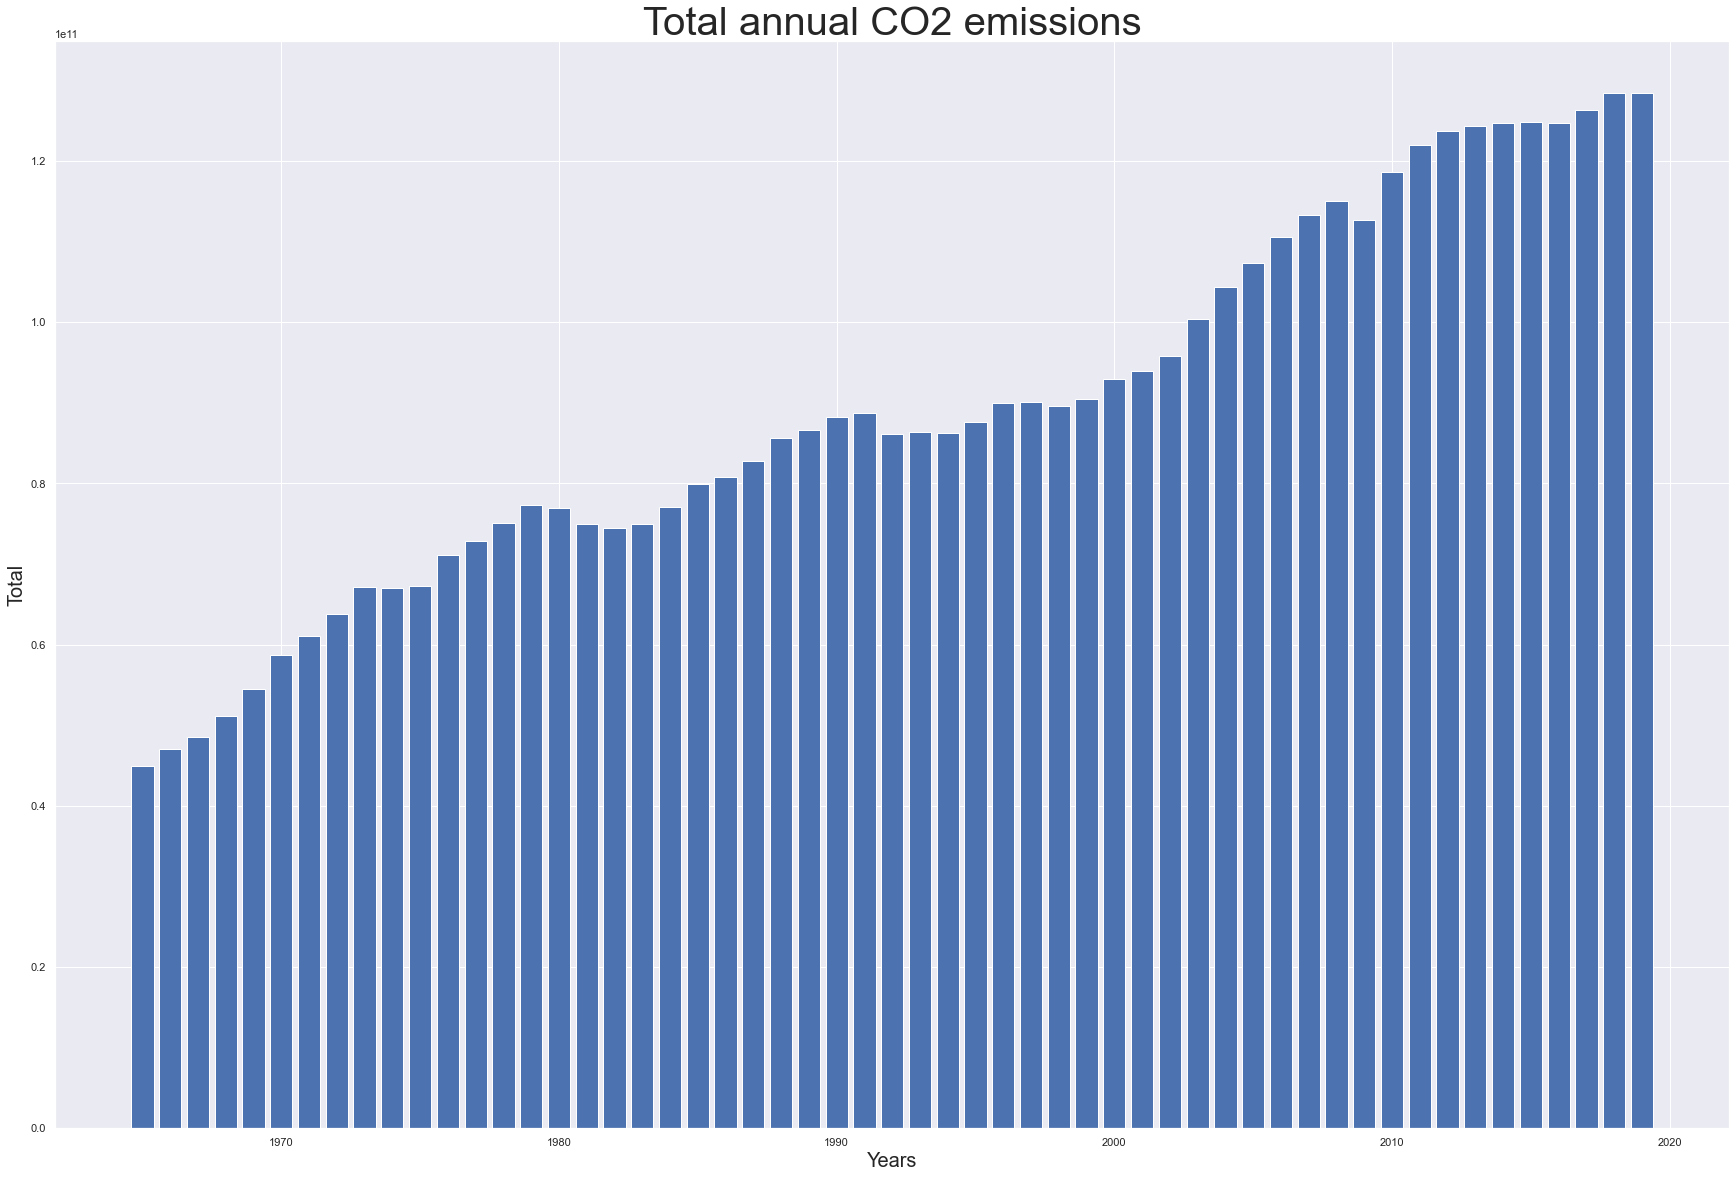

In [96]:
import matplotlib.pyplot as plt
import numpy as np

data5= data5[data5.Year > 1964]
data5= data5[data5.Year < 2020]
data5.head()

anni_unici= data5.Year.unique()

tot_CO2= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data5[data5['Year']== anno]
    tot_CO2[i]= temp1['Annual CO2 emissions'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,tot_CO2)
plt.title("Total annual CO2 emissions")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 20)
plt.ylabel("Total", fontsize= 20)
plt.show()

In [84]:
data5.isnull().sum()

Entity                    0
Code                    755
Year                      0
Annual CO2 emissions      0
dtype: int64

In [85]:
#removing the code column inthe data5
data5.pop("Code")
data5

,Entity,Year,Annual CO2 emissions
16,Afghanistan,1965,1006917
17,Afghanistan,1966,1091159
18,Afghanistan,1967,1281865
19,Afghanistan,1968,1223391
20,Afghanistan,1969,941232
...,...,...,...
23943,Zimbabwe,2015,12225821
23944,Zimbabwe,2016,10737567
23945,Zimbabwe,2017,9581633
23946,Zimbabwe,2018,11854367


/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_33104/2071075570.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data55 = data5.melt(id_vars=['Entity'], var_name='Year', value_name='Annual CO2 emissions')


<AxesSubplot:xlabel='Year', ylabel='Annual CO2 emissions'>

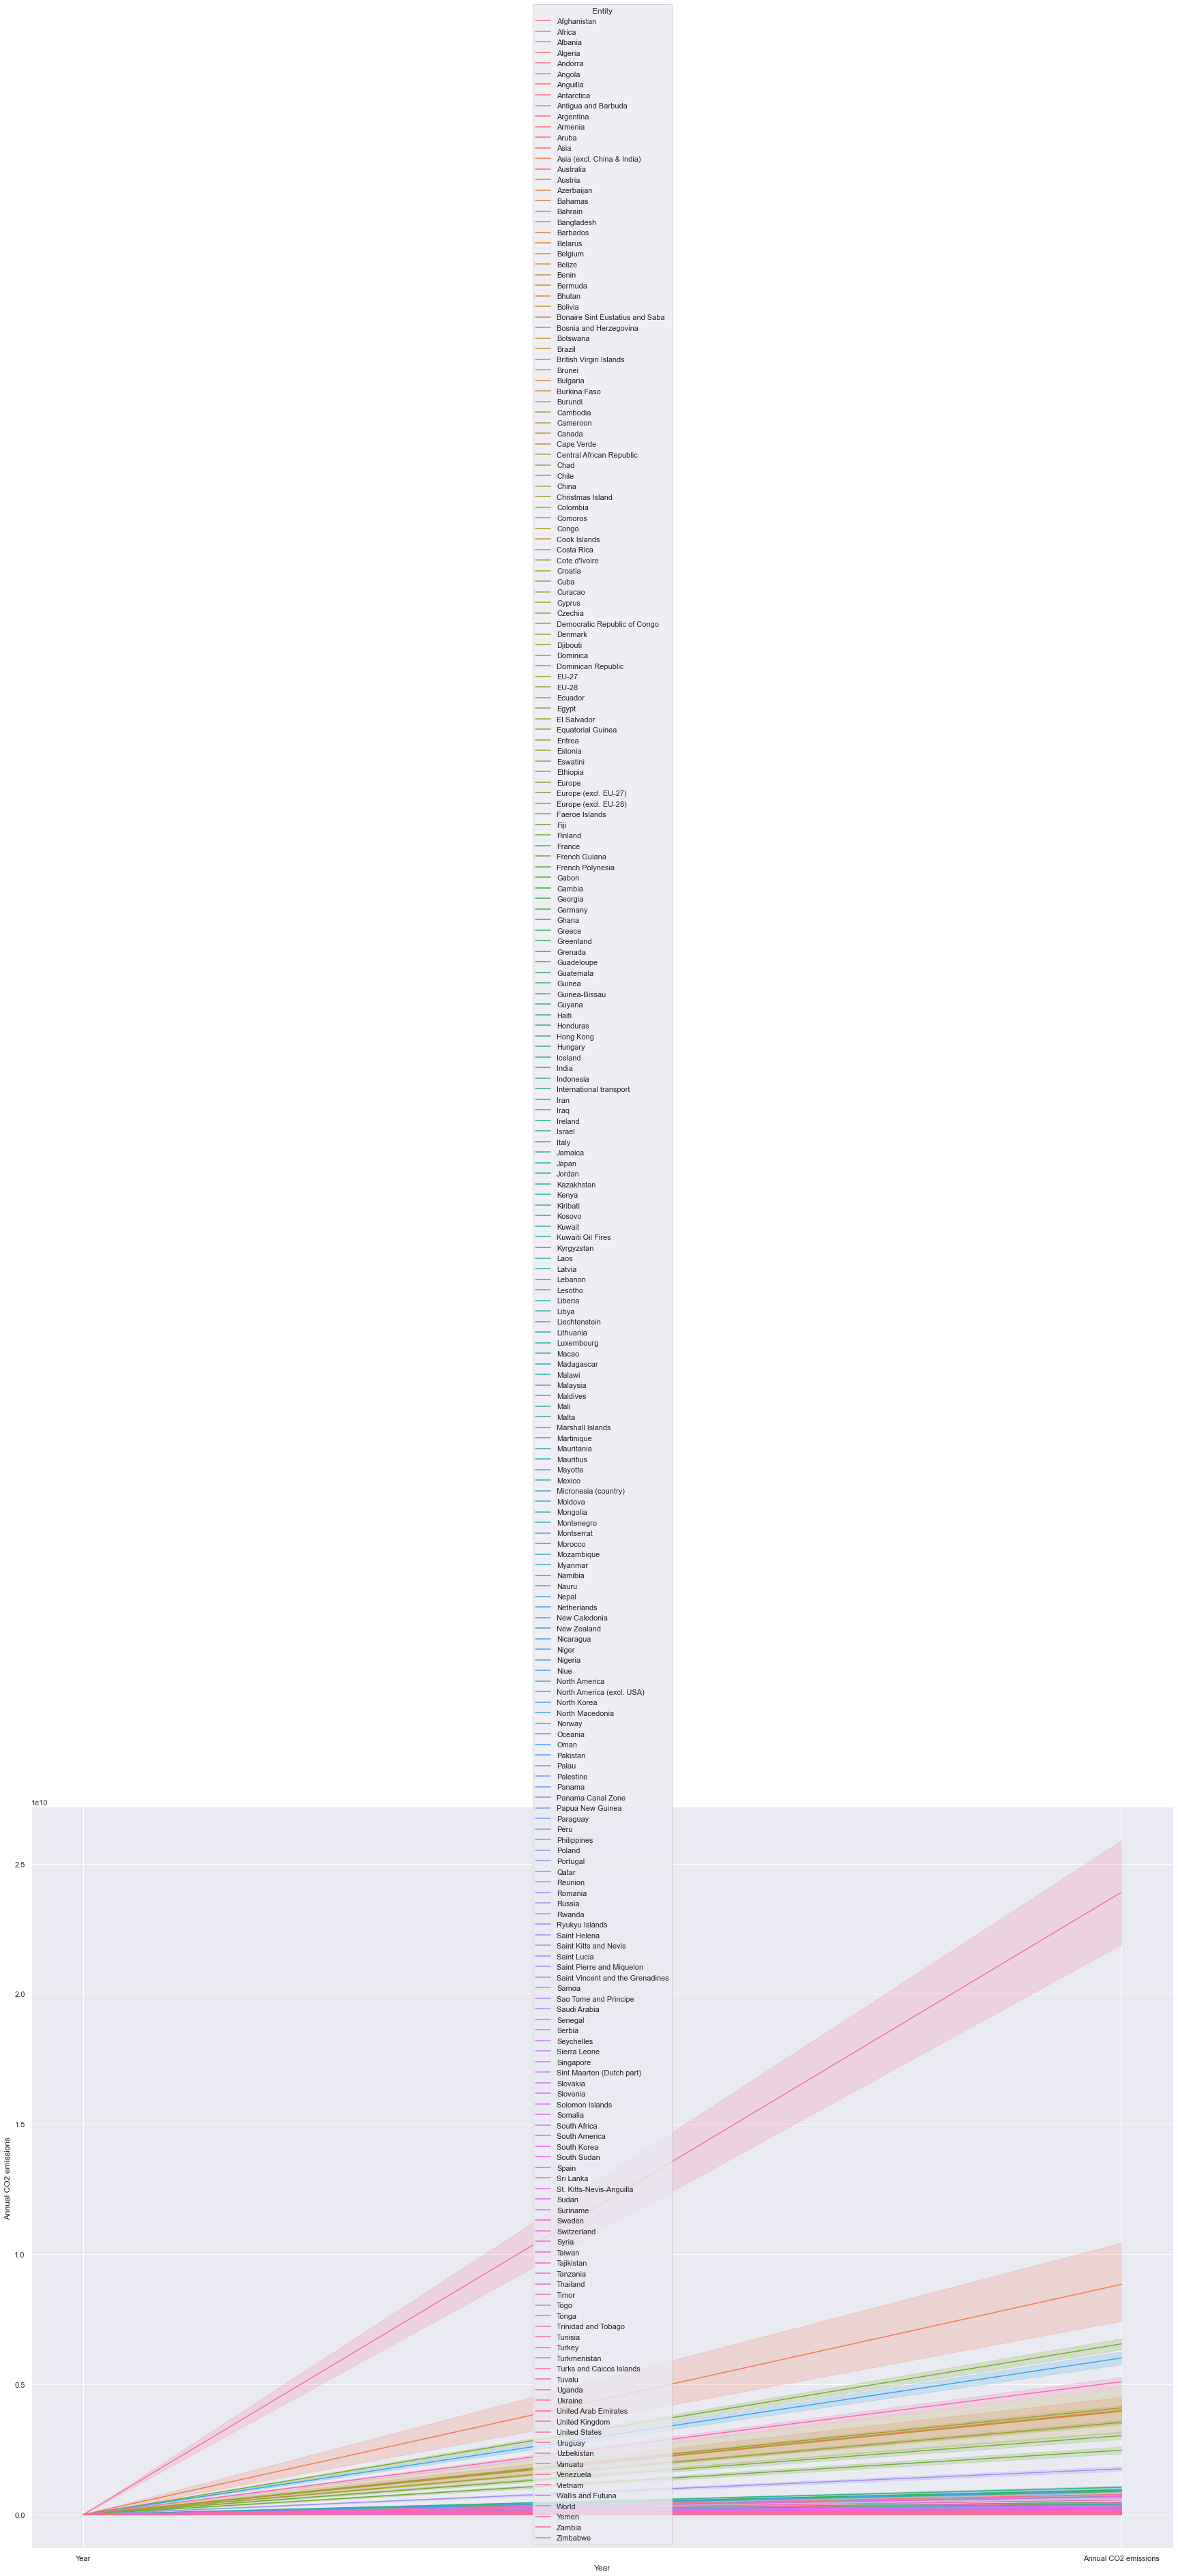

In [87]:
# plot multiple line(one for each country) from 1949 to 2020 of the CO2 emissions

#data5.groupby("Entity").plot.line(x= 'Year', y= 'Annual CO2 emissions')

import seaborn as sns
data55 = data5.melt(id_vars=['Entity'], var_name='Year', value_name='Annual CO2 emissions')
sns.set(rc = {'figure.figsize':(30,20)})
sns.lineplot(x='Year', y='Annual CO2 emissions', hue='Entity', data=data55)

In [88]:
#merging data2 and data4 and data5 by common columns Entity and Year
data245 = pd.merge(data24, data5, on=['Entity','Year'])
data245

,Entity,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy),Annual CO2 emissions
0,Africa,1965,94.463,5.537,46.720,46.375,0.000,0.000,5.537,0.000,1.368,0.000,213784592
1,Africa,1966,94.127,5.873,48.626,44.047,0.000,0.000,5.873,0.000,1.454,0.000,221261615
2,Africa,1967,93.920,6.080,47.838,44.655,0.000,0.000,6.080,0.000,1.426,0.000,237257662
3,Africa,1968,93.257,6.743,47.859,44.029,0.000,0.000,6.743,0.000,1.370,0.000,257600231
4,Africa,1969,92.317,7.683,47.373,43.381,0.000,0.000,7.683,0.000,1.563,0.000,278139487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,World,2015,85.839,9.842,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903,35496406339
4280,World,2016,85.459,10.241,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901,35452459298
4281,World,2017,85.123,10.640,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936,35925737687
4282,World,2018,84.846,10.959,33.225,27.557,0.905,4.193,6.477,1.972,24.063,0.955,36646139785


/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_33104/3887943283.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


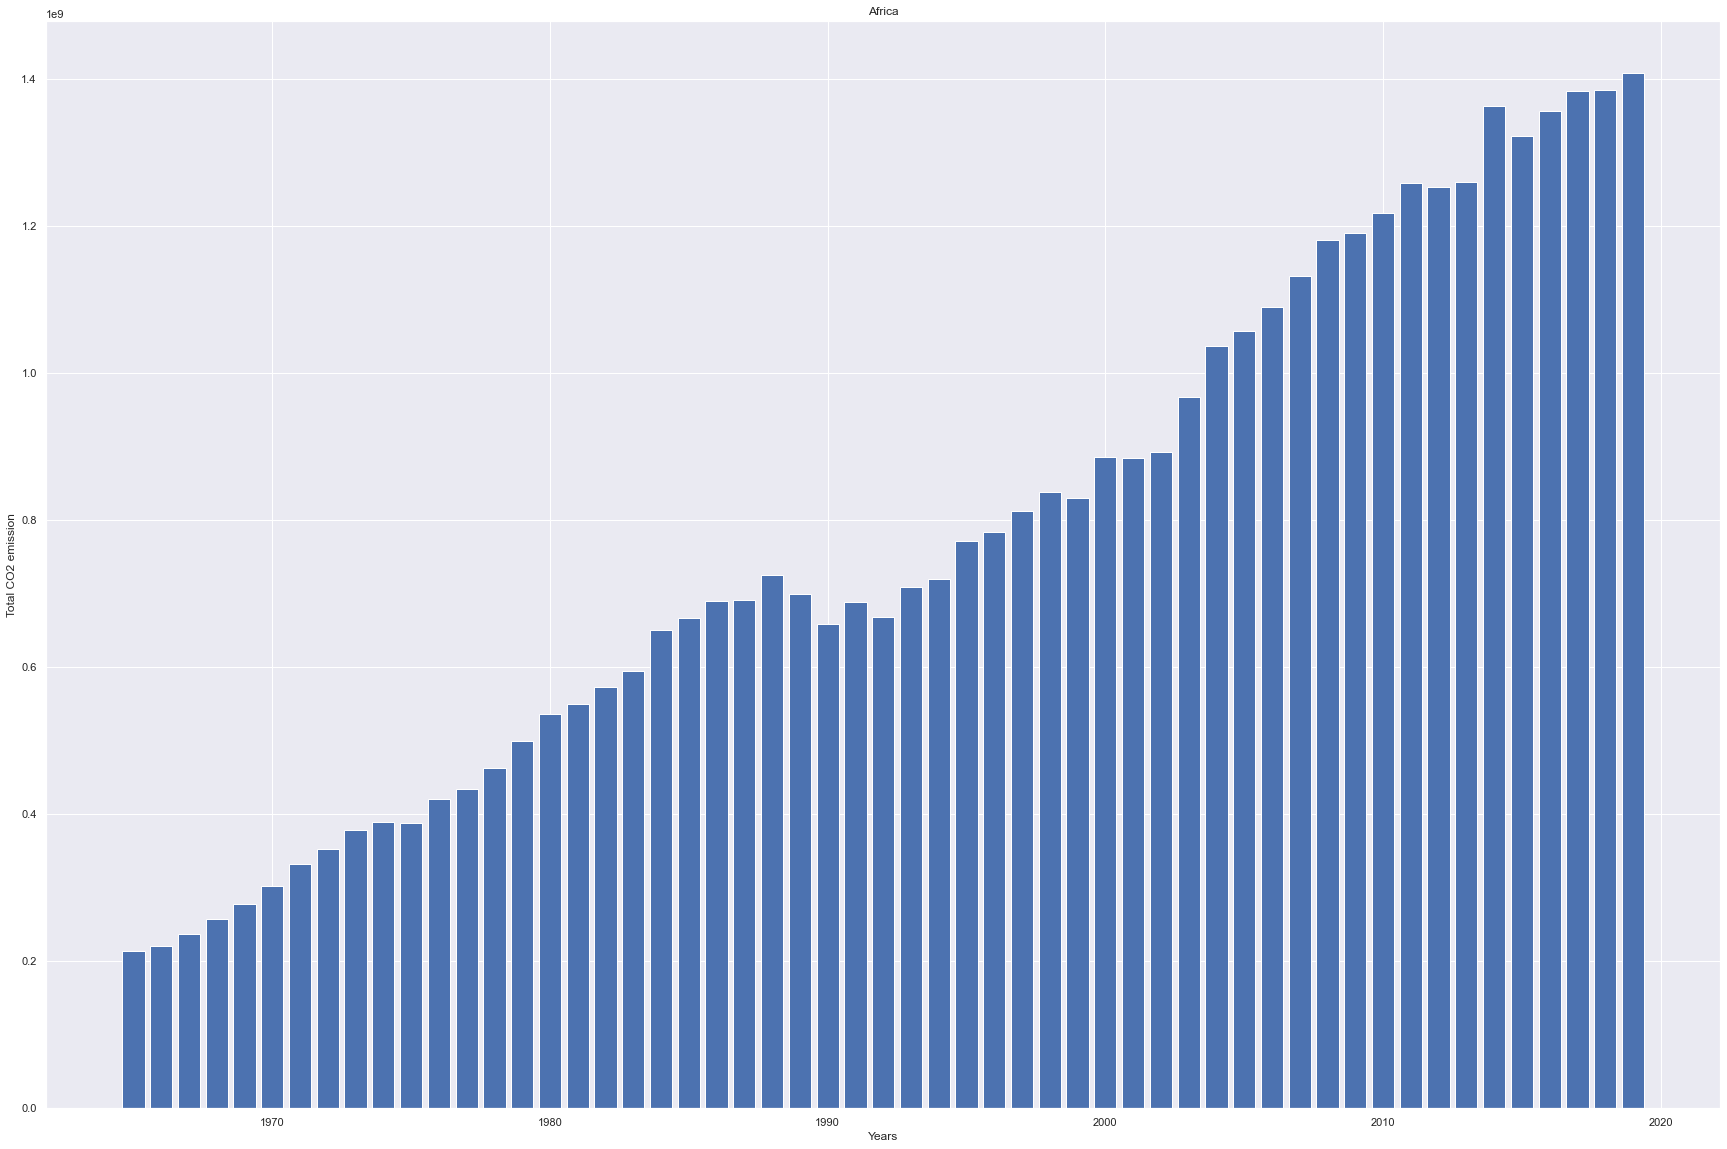

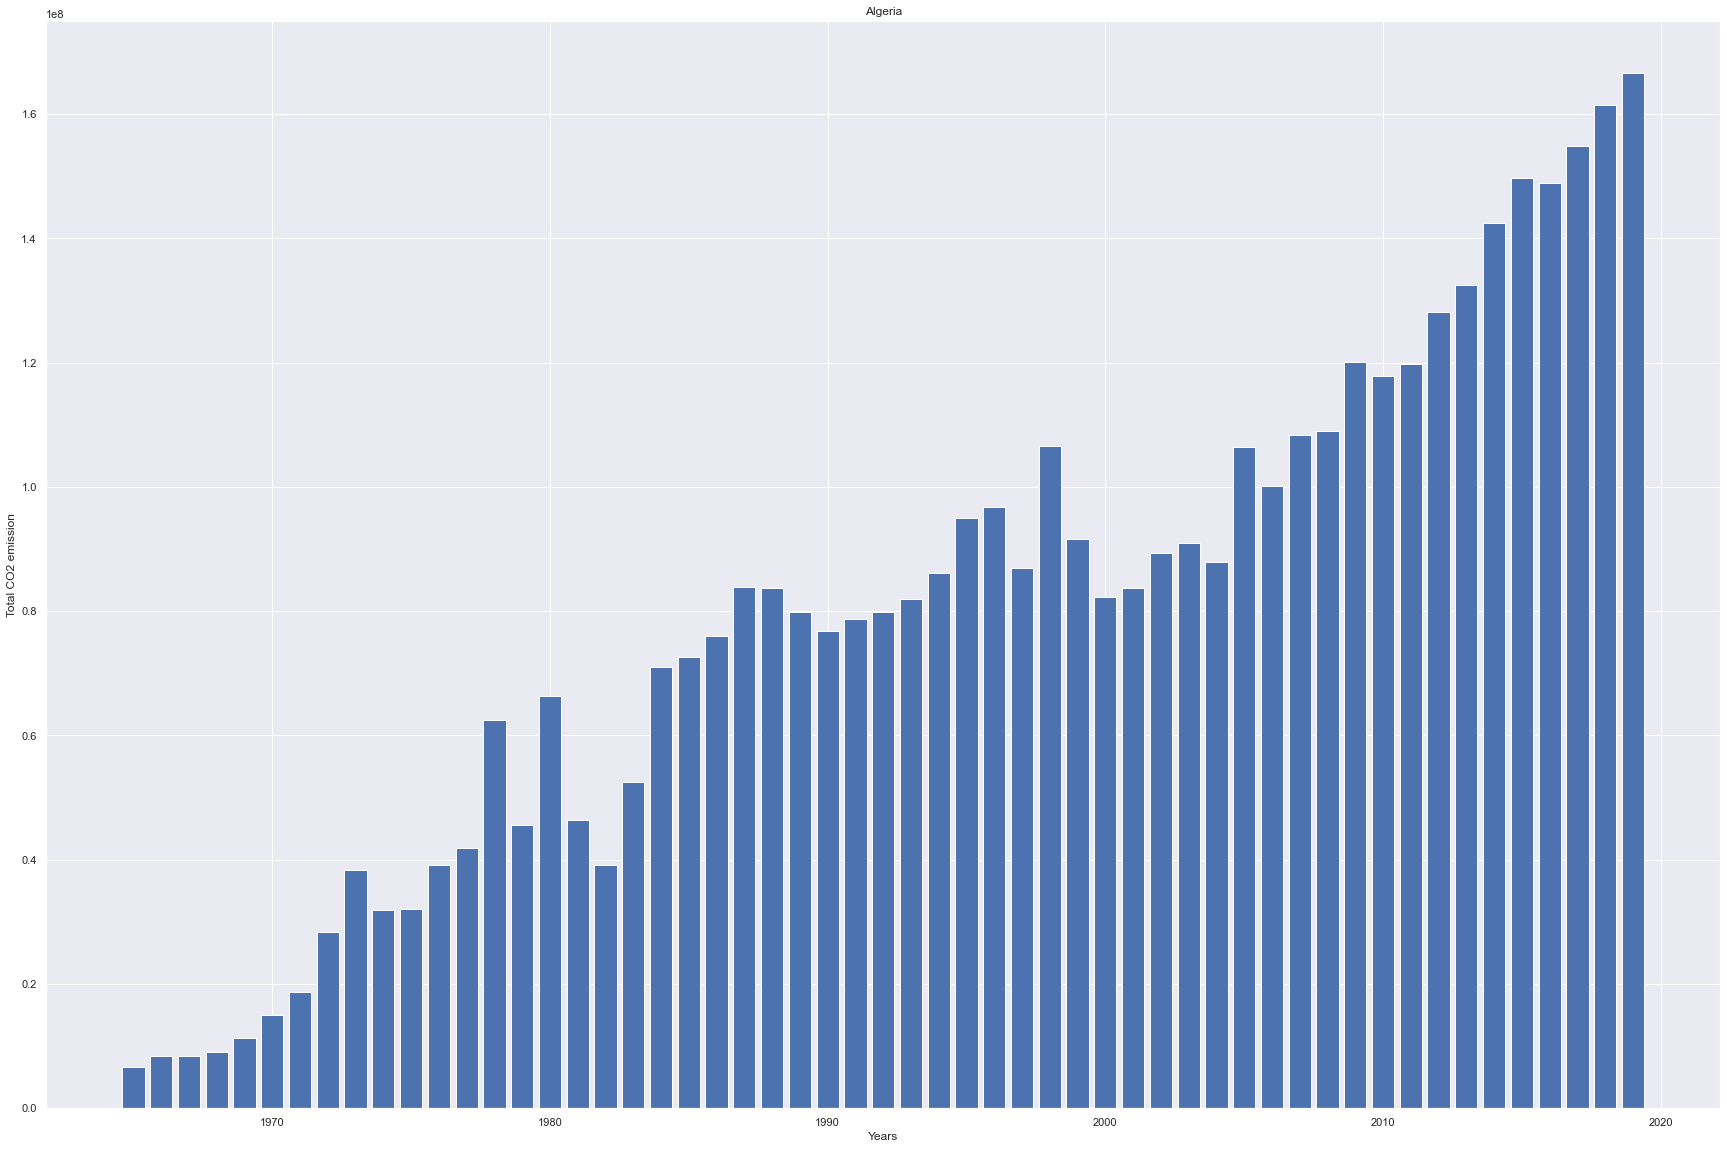

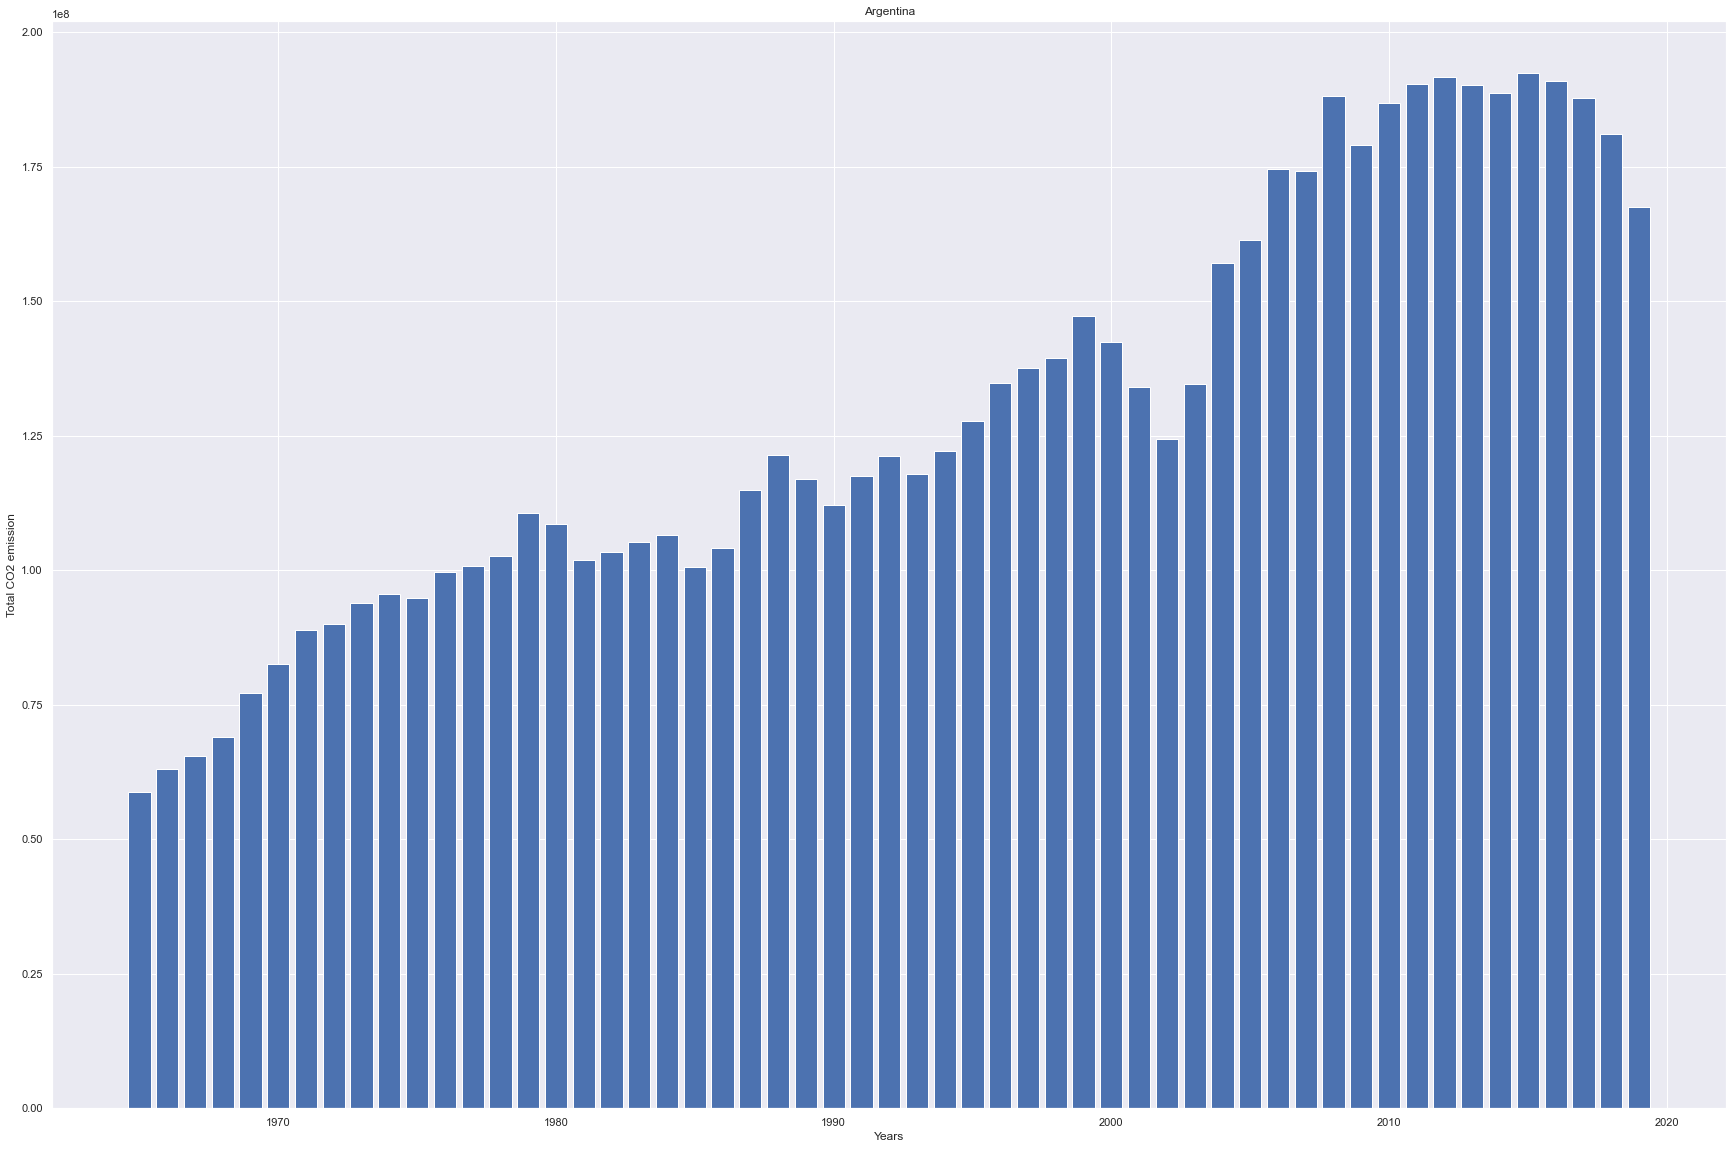

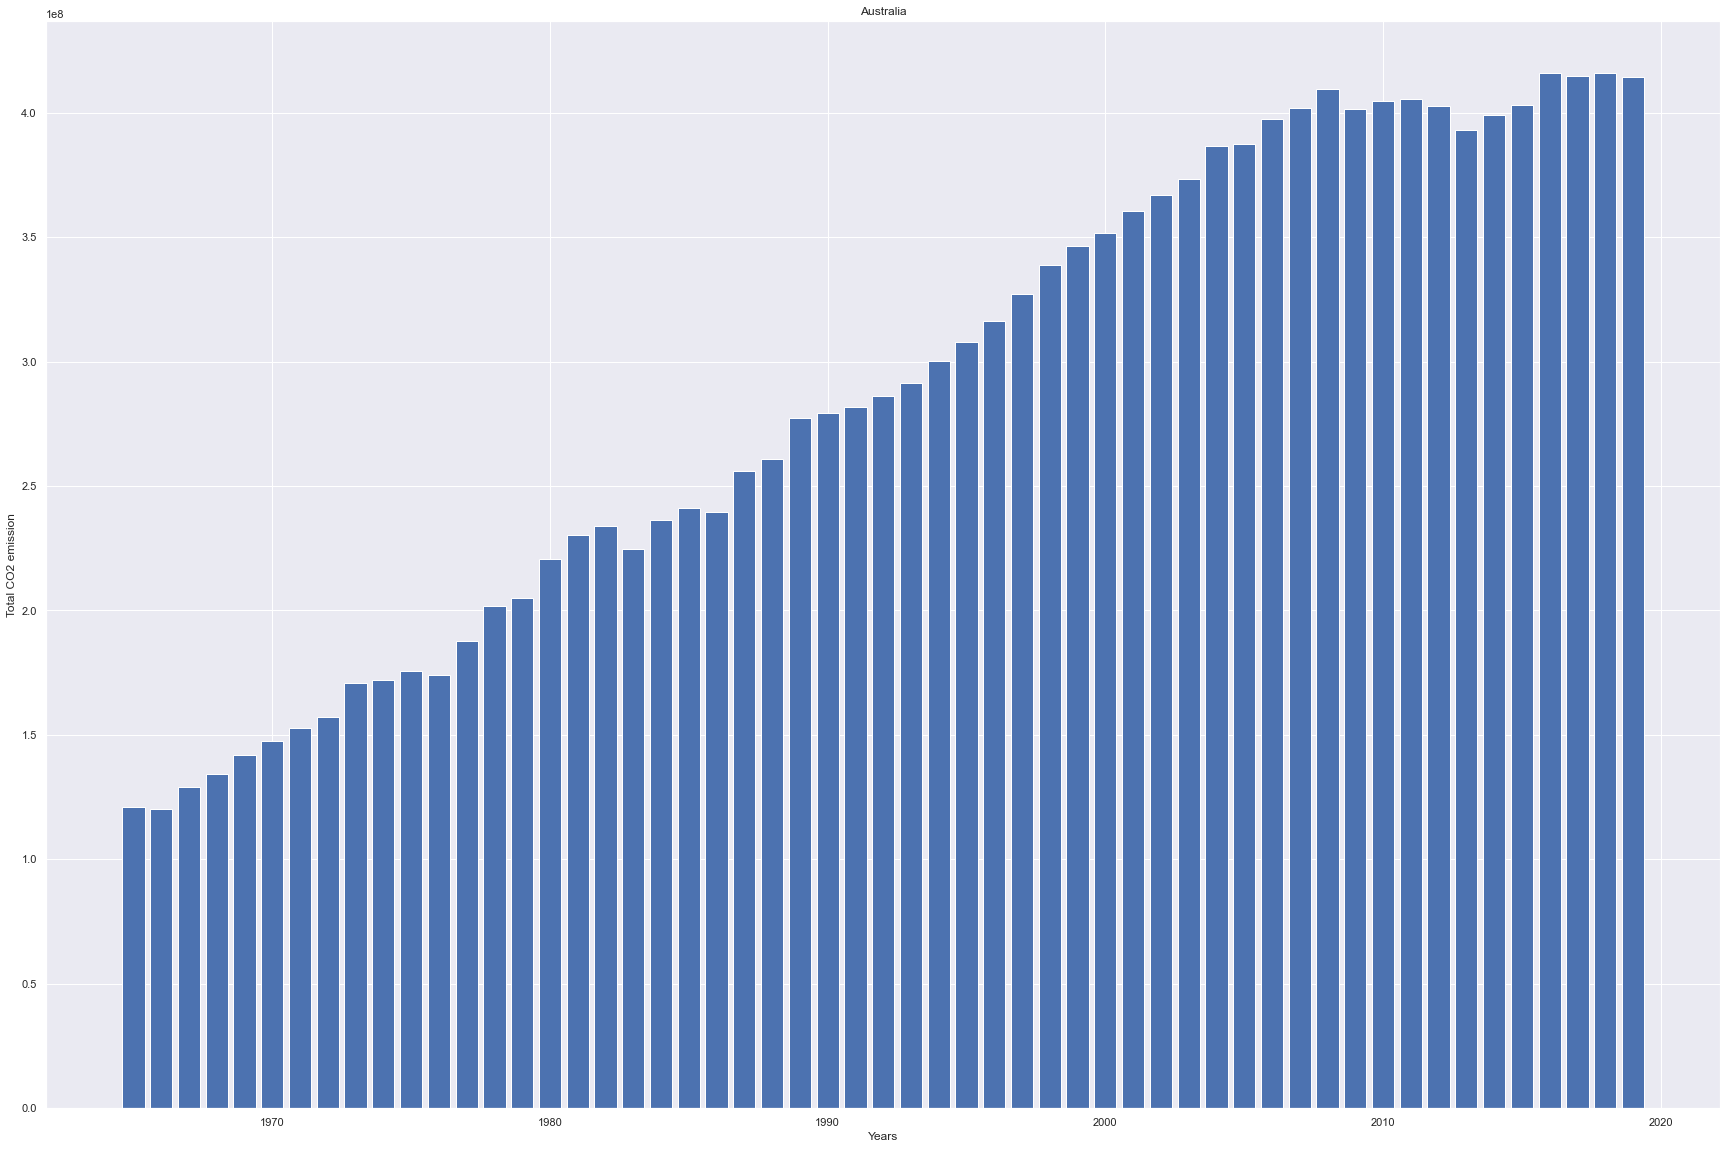

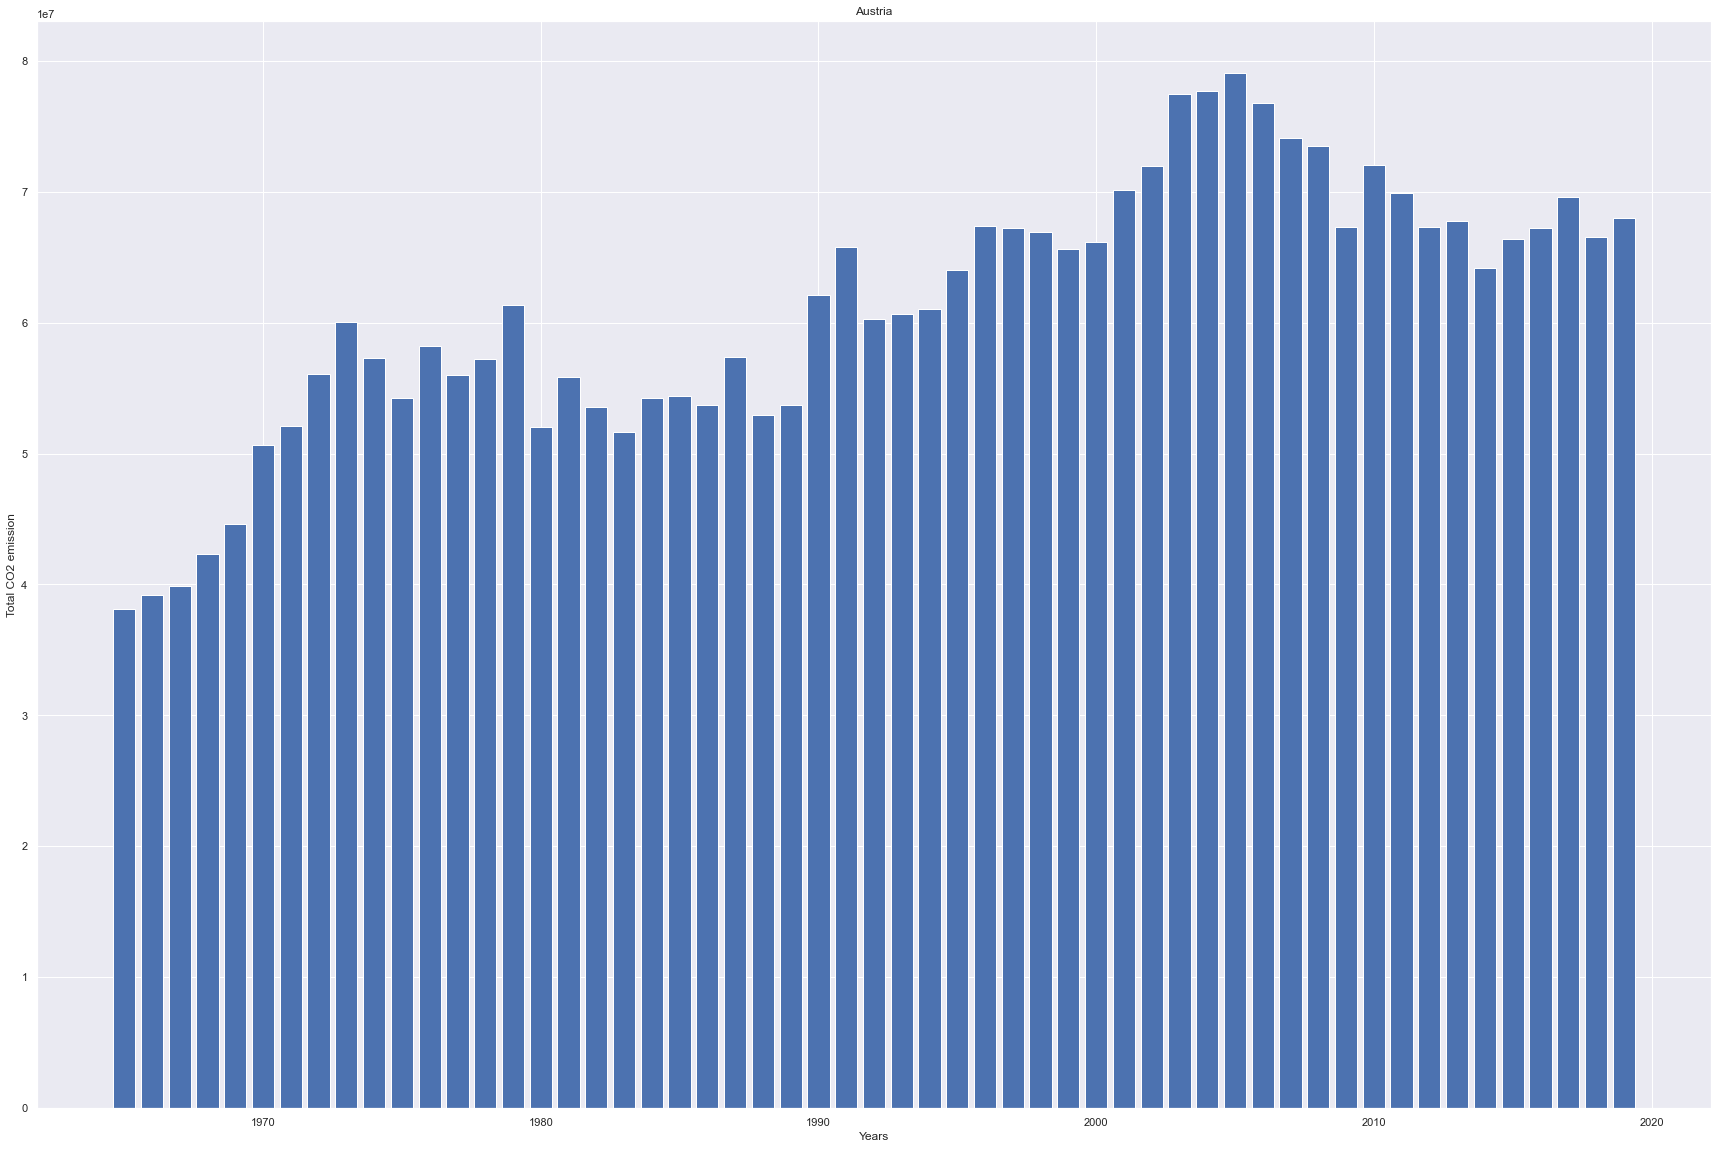

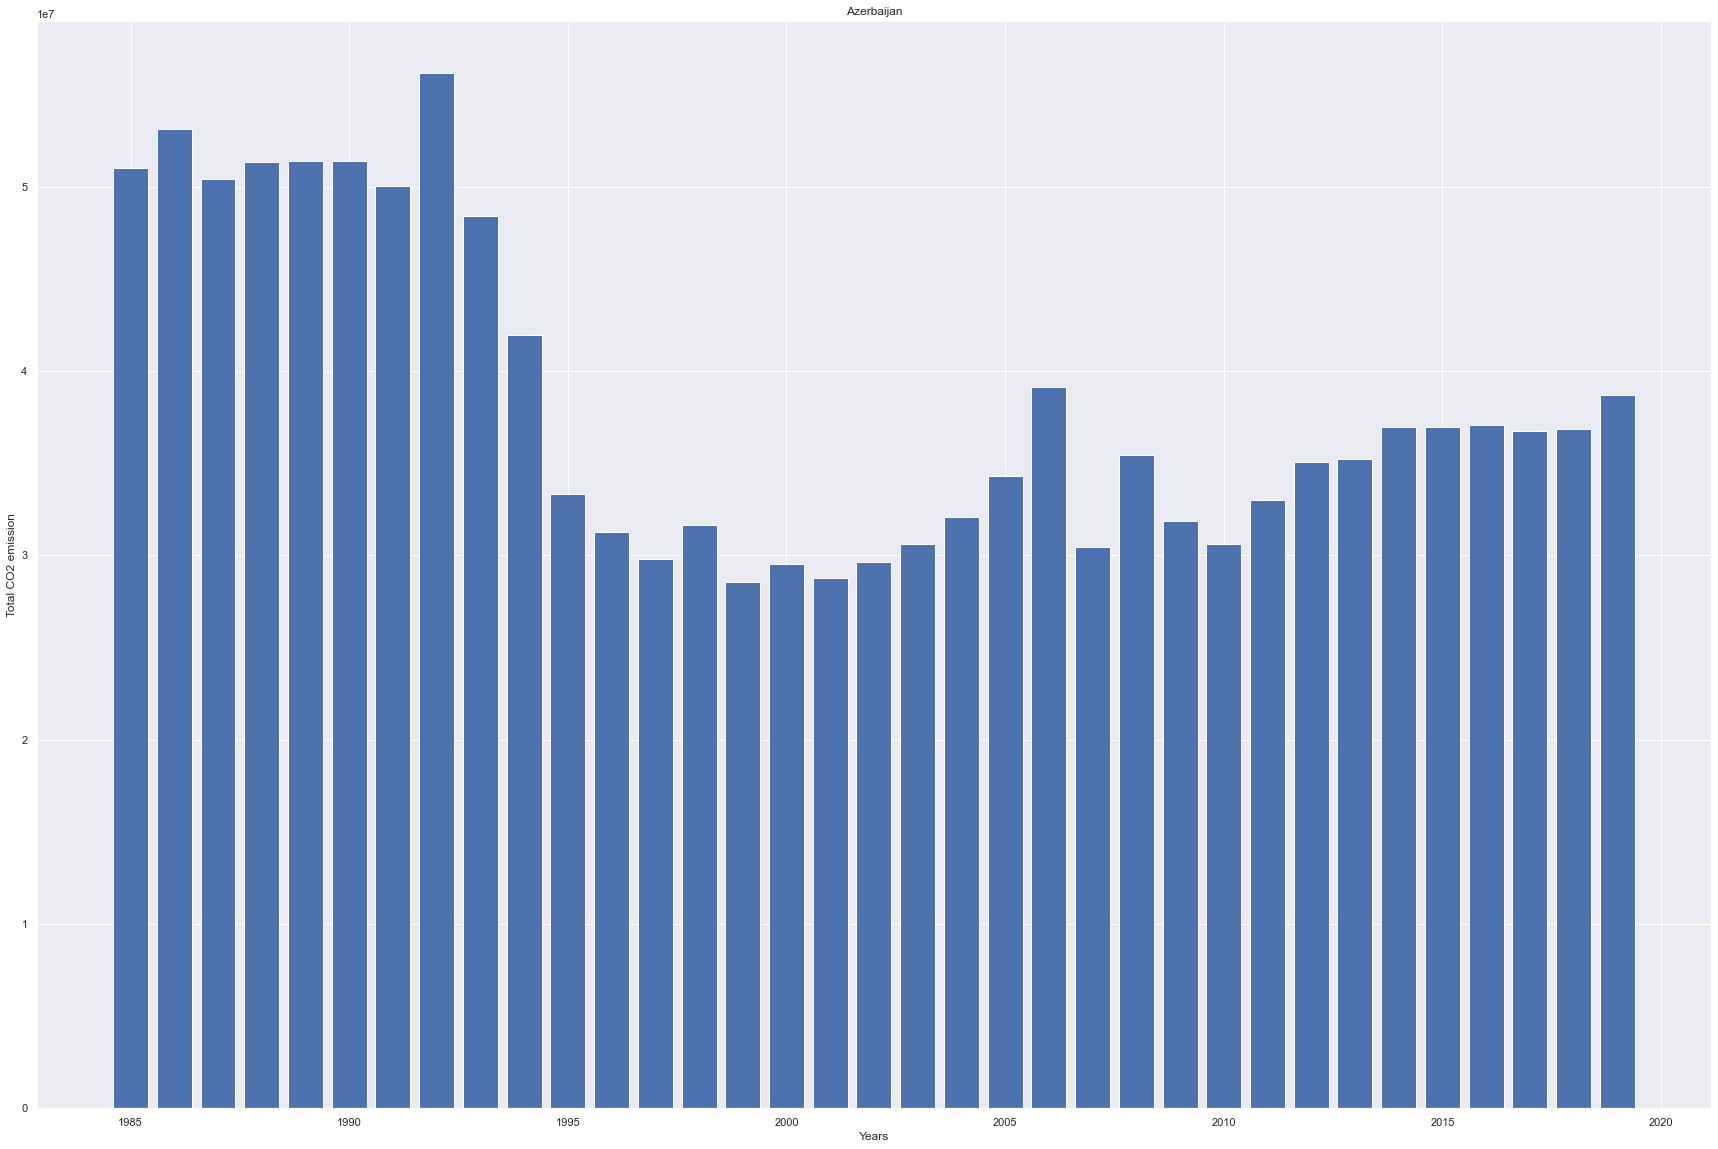

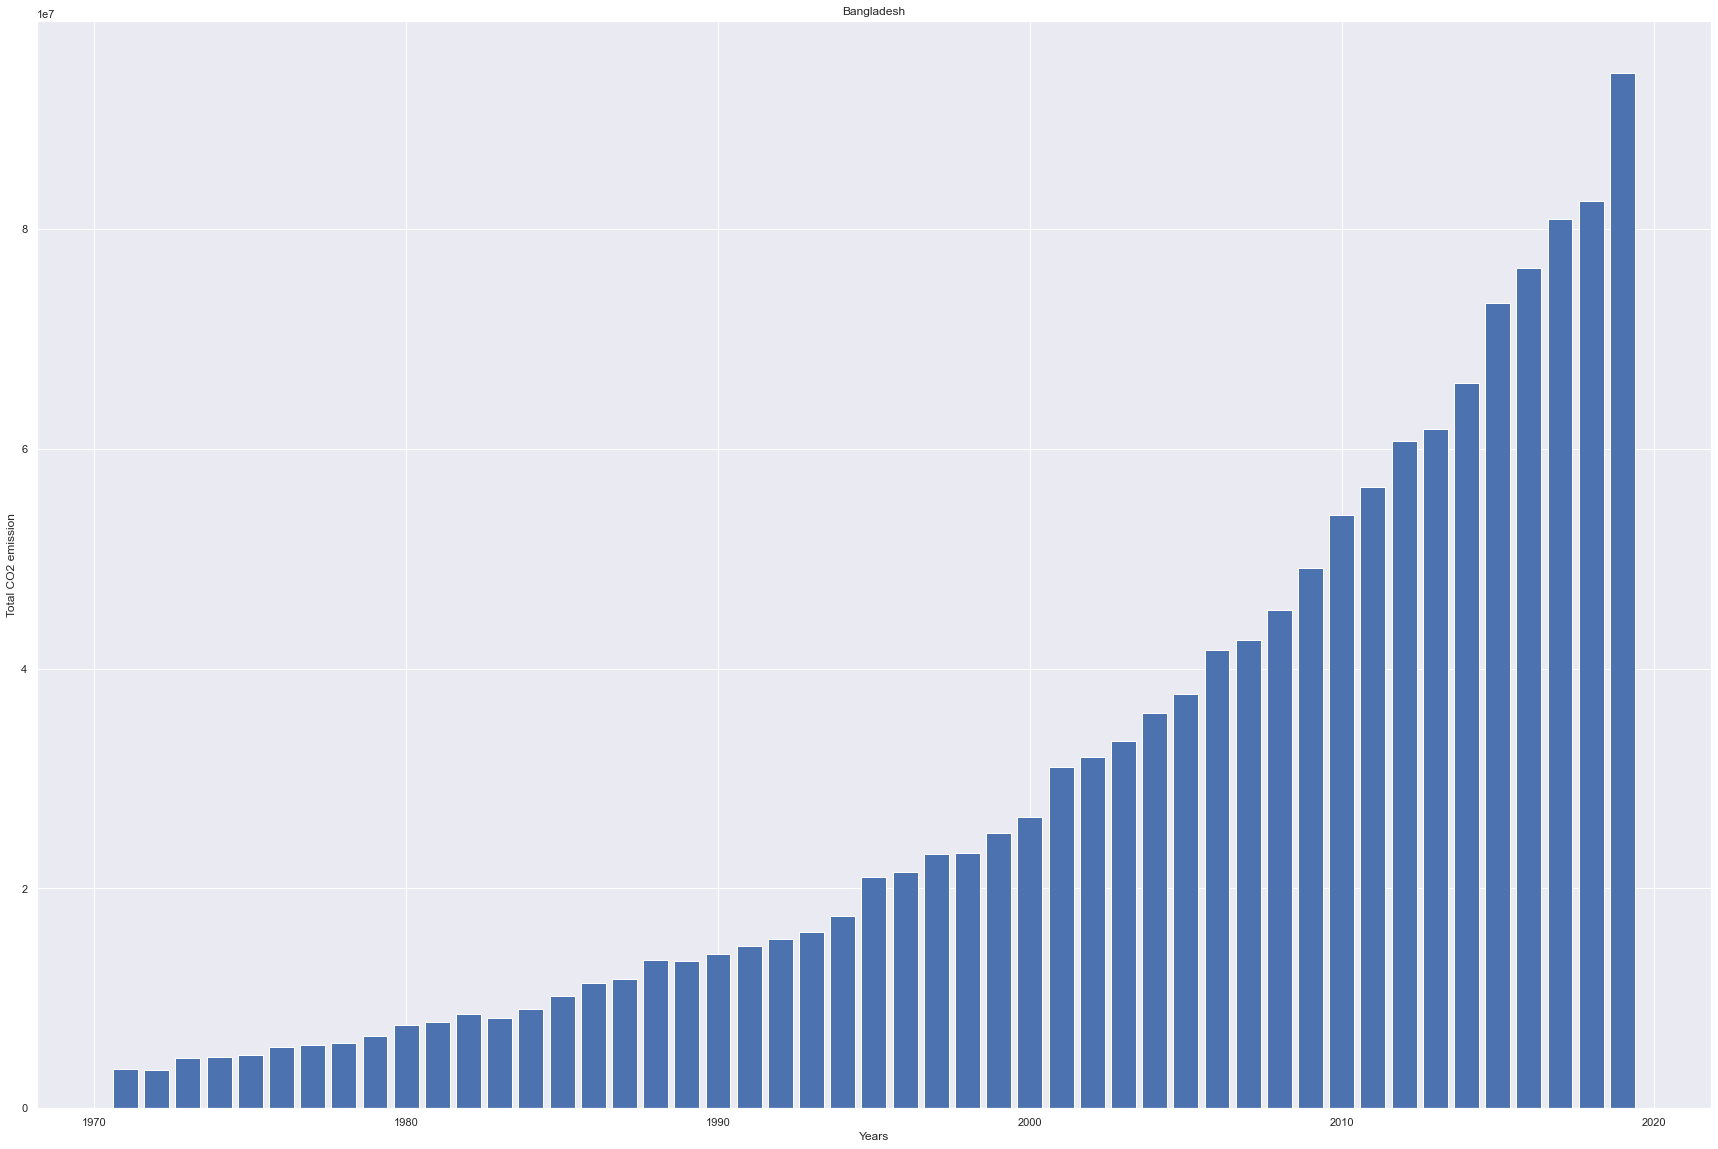

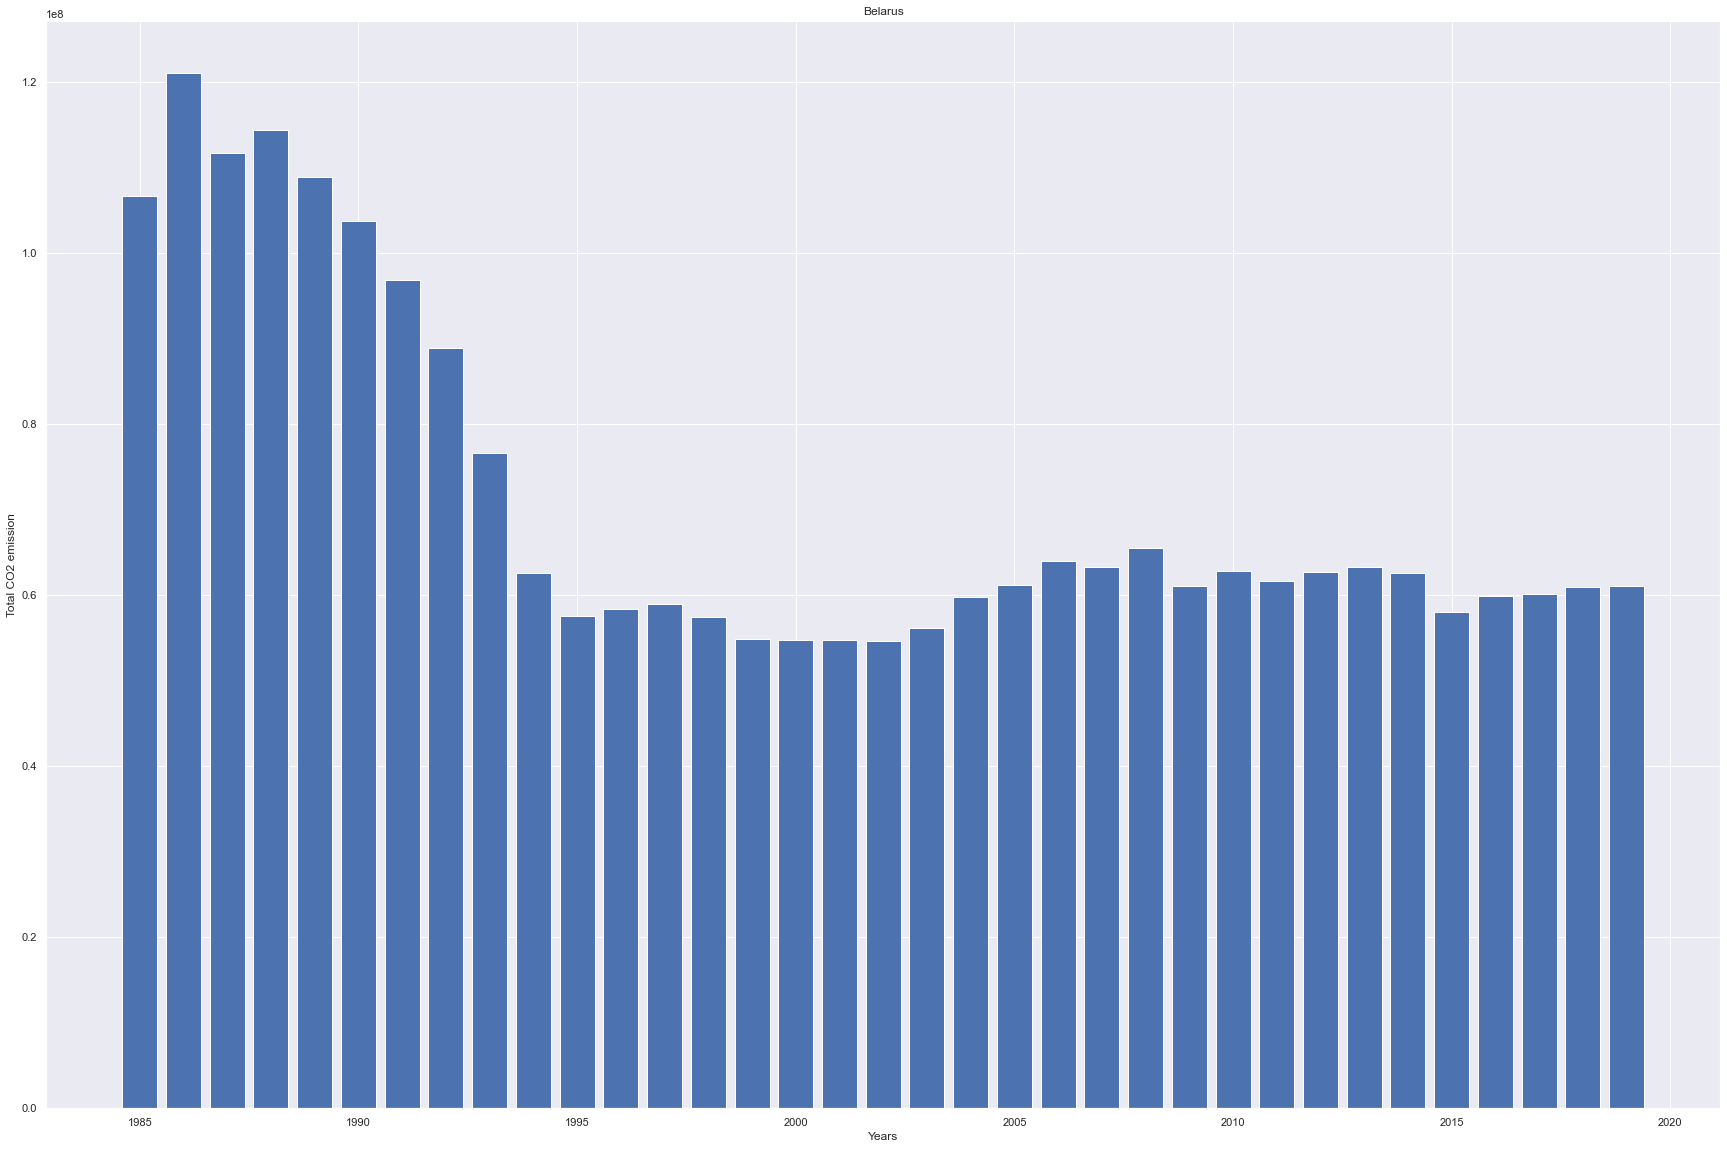

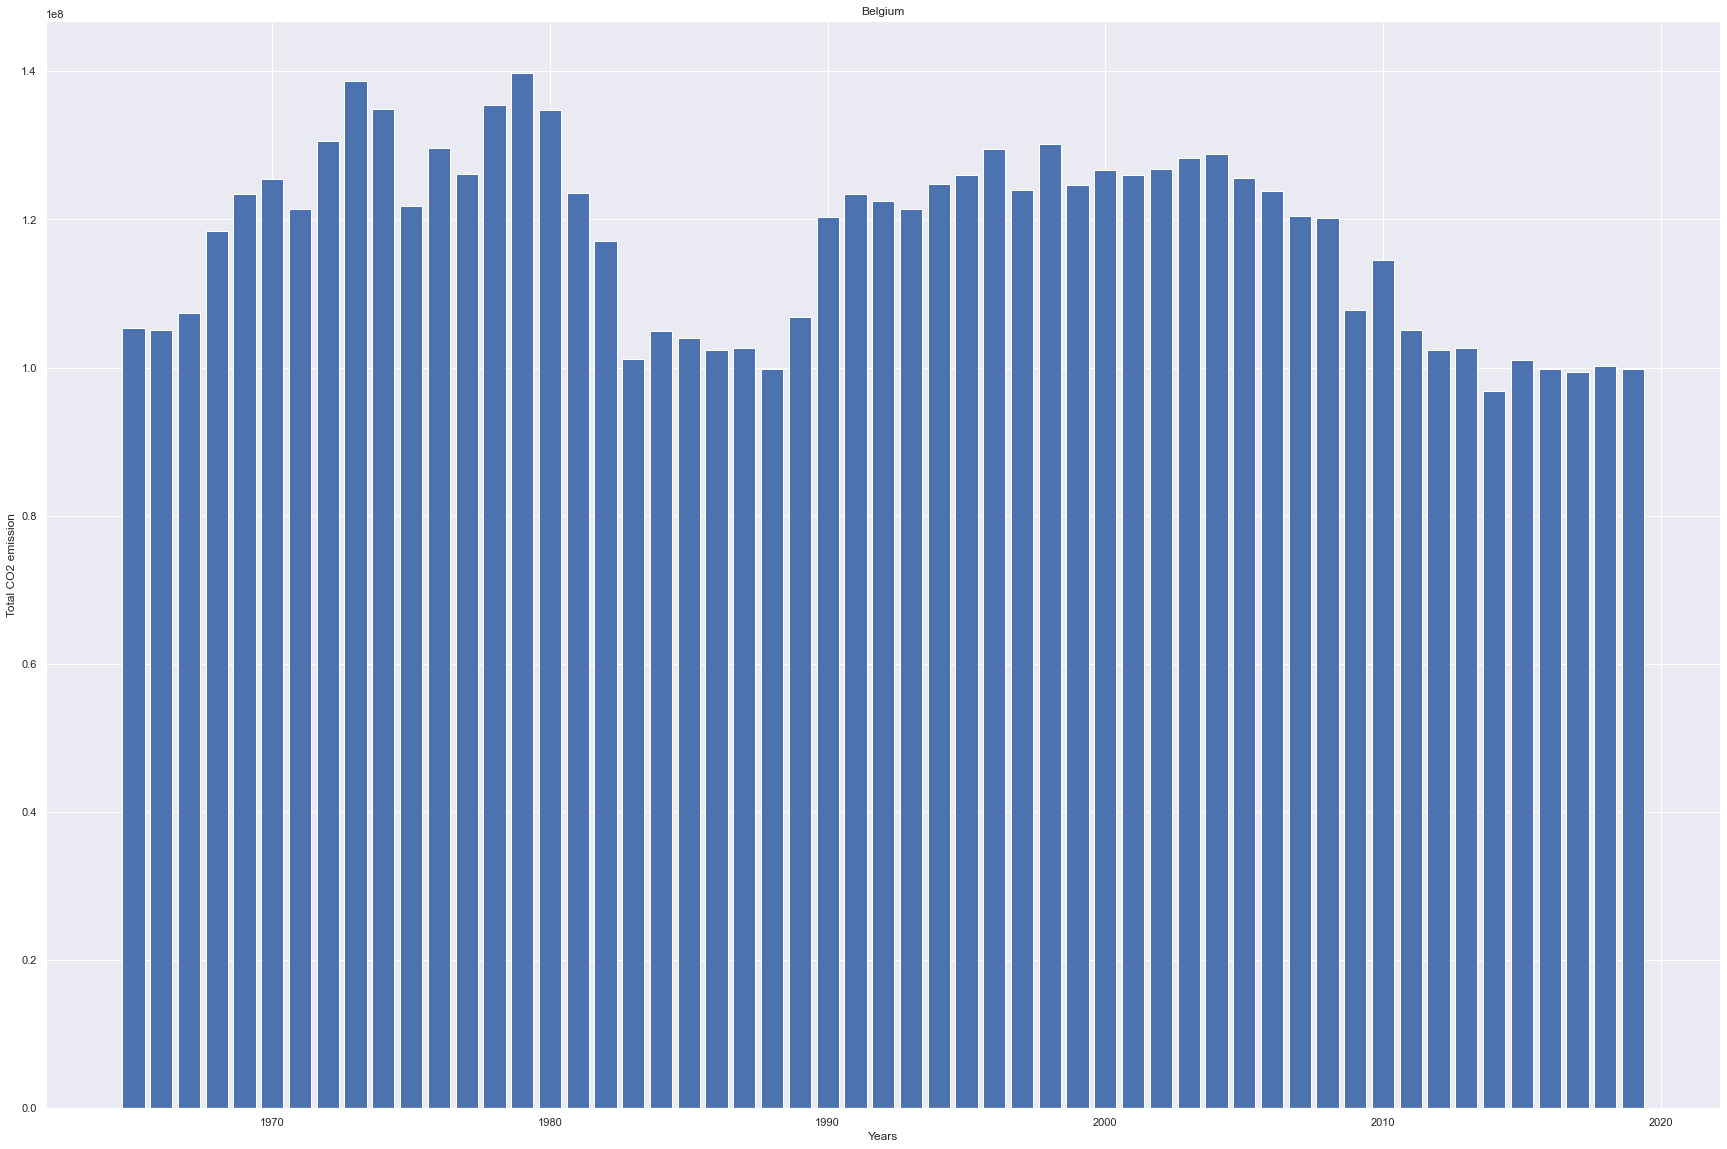

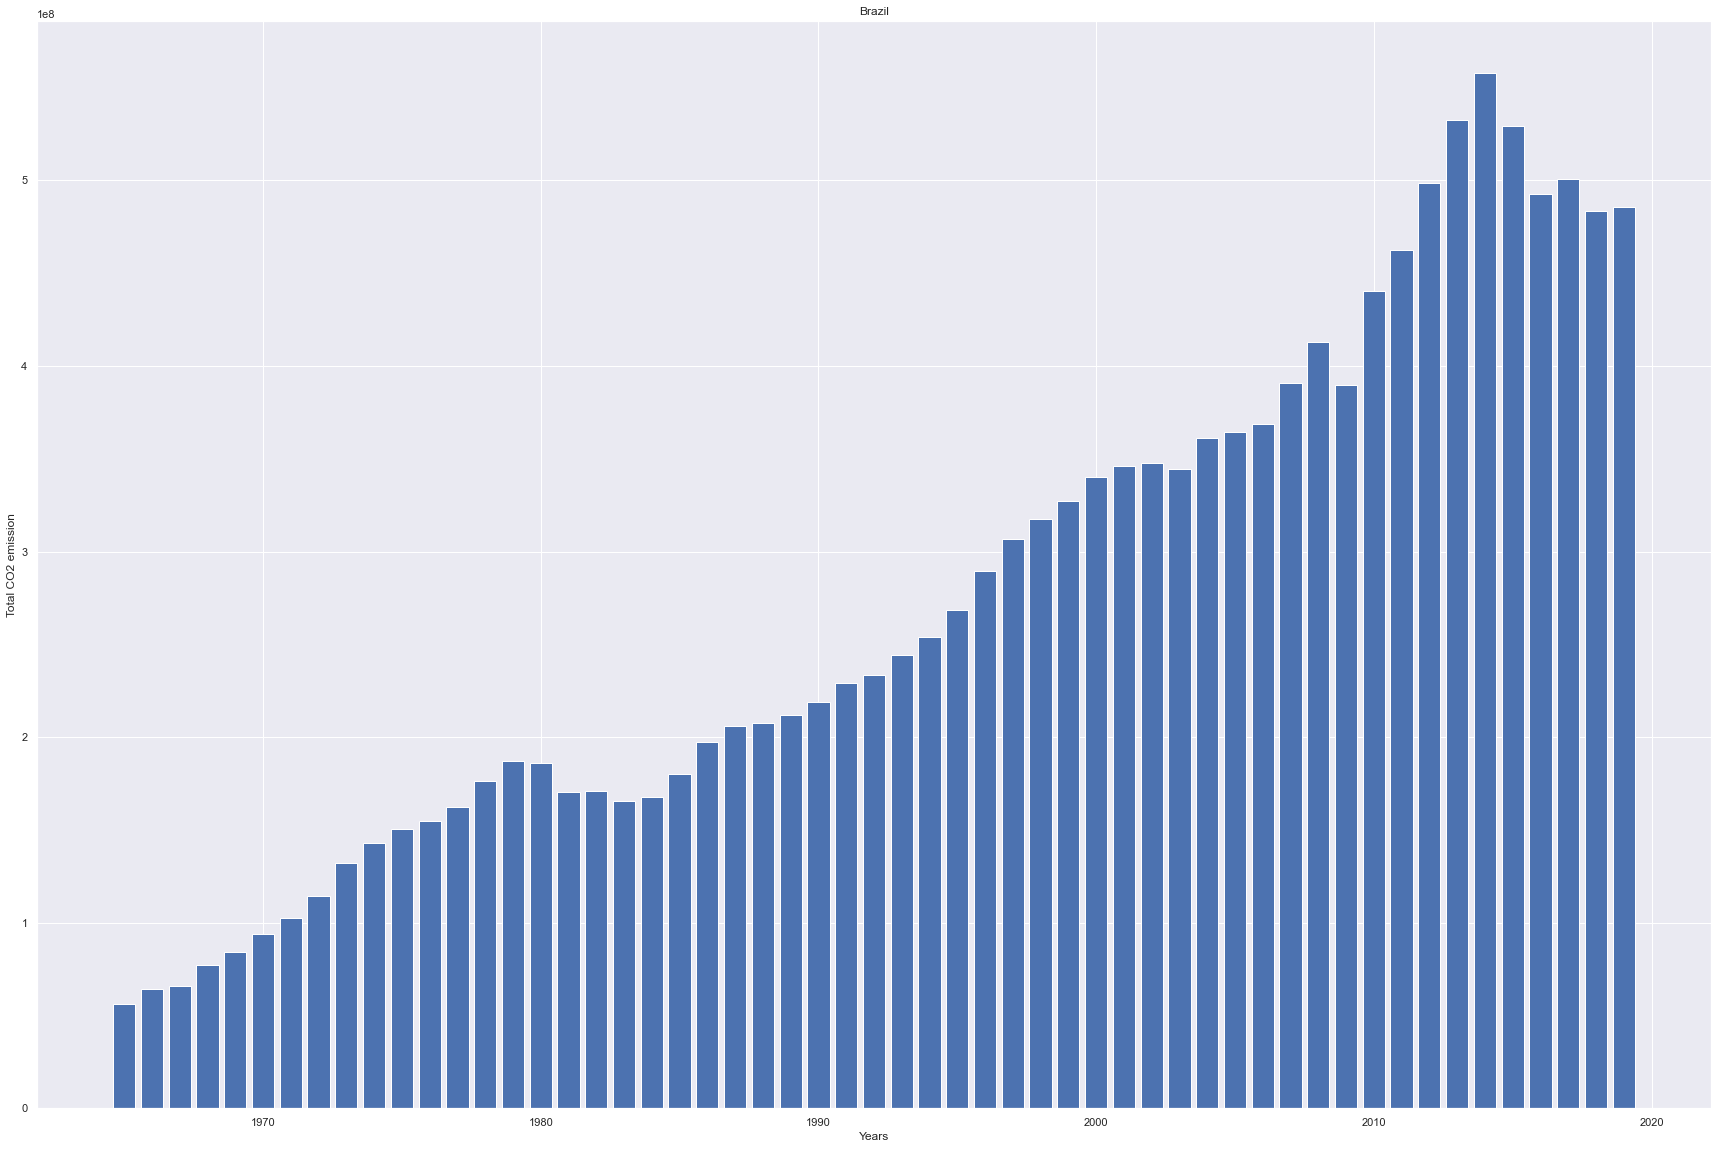

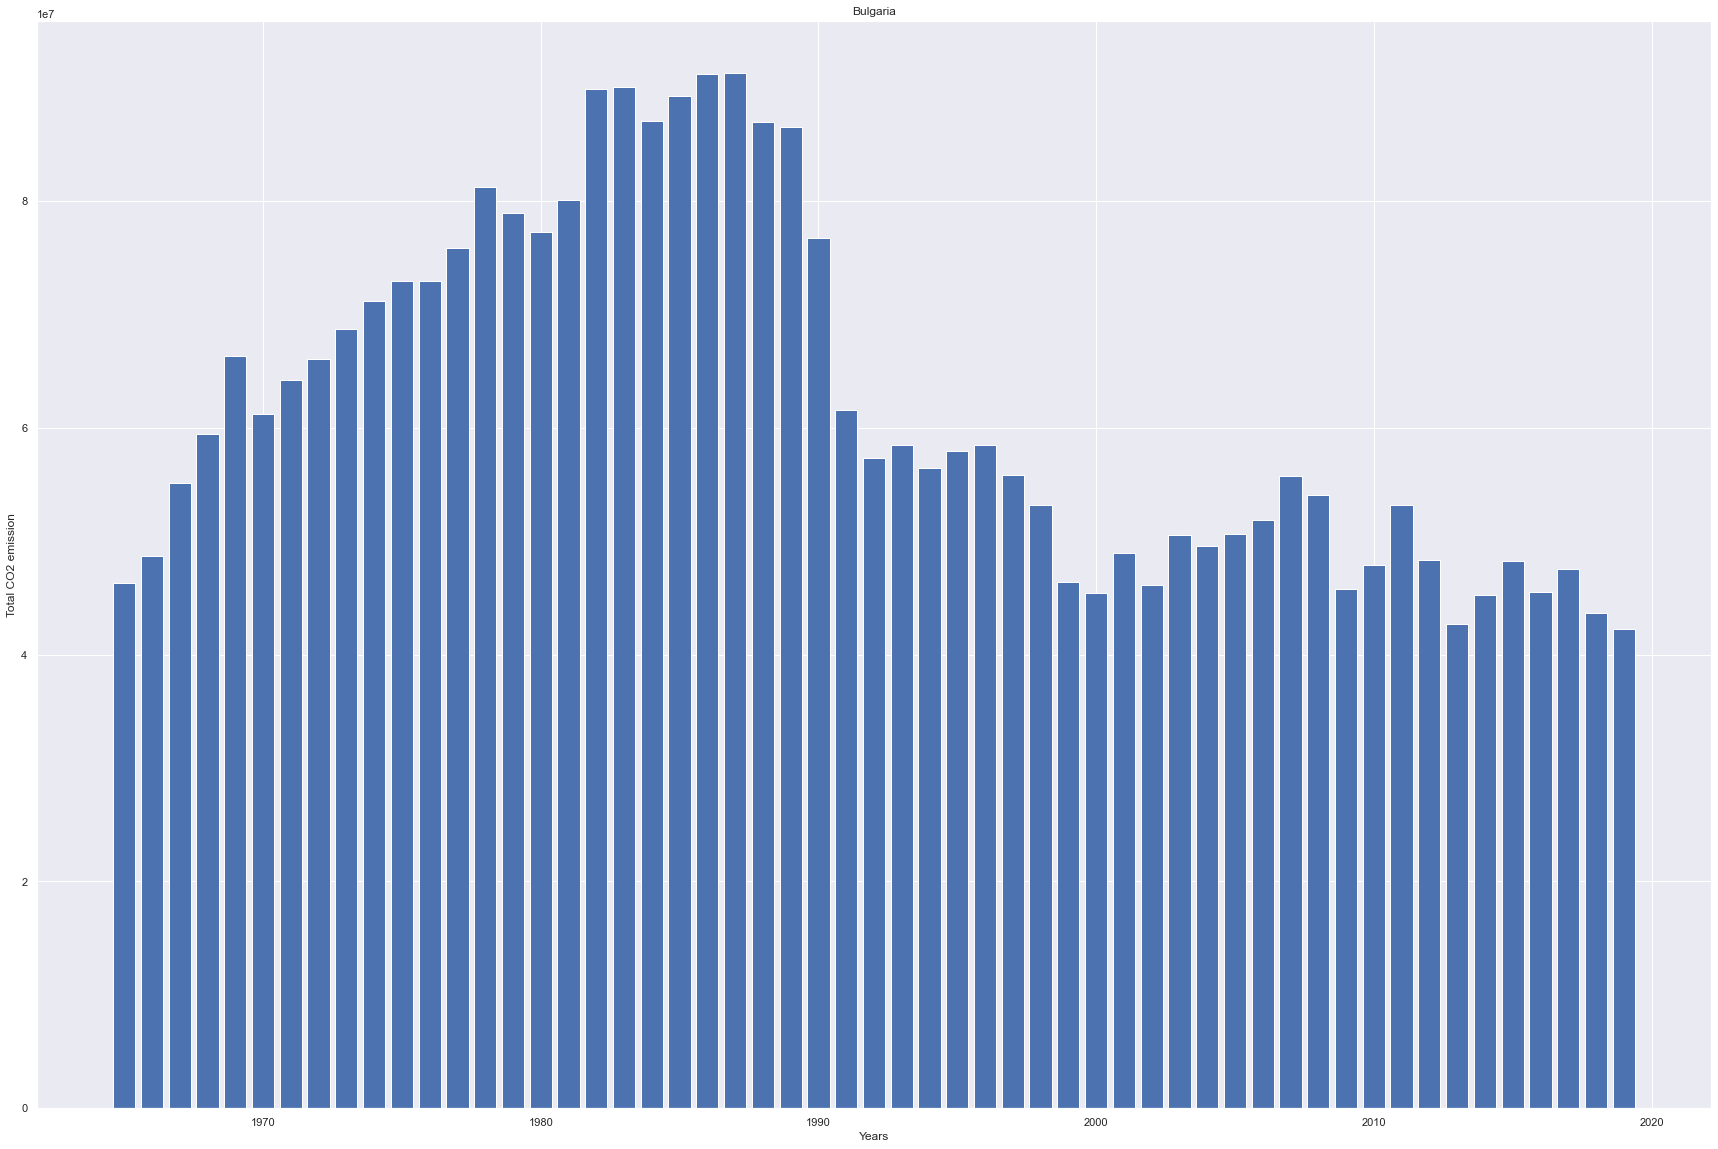

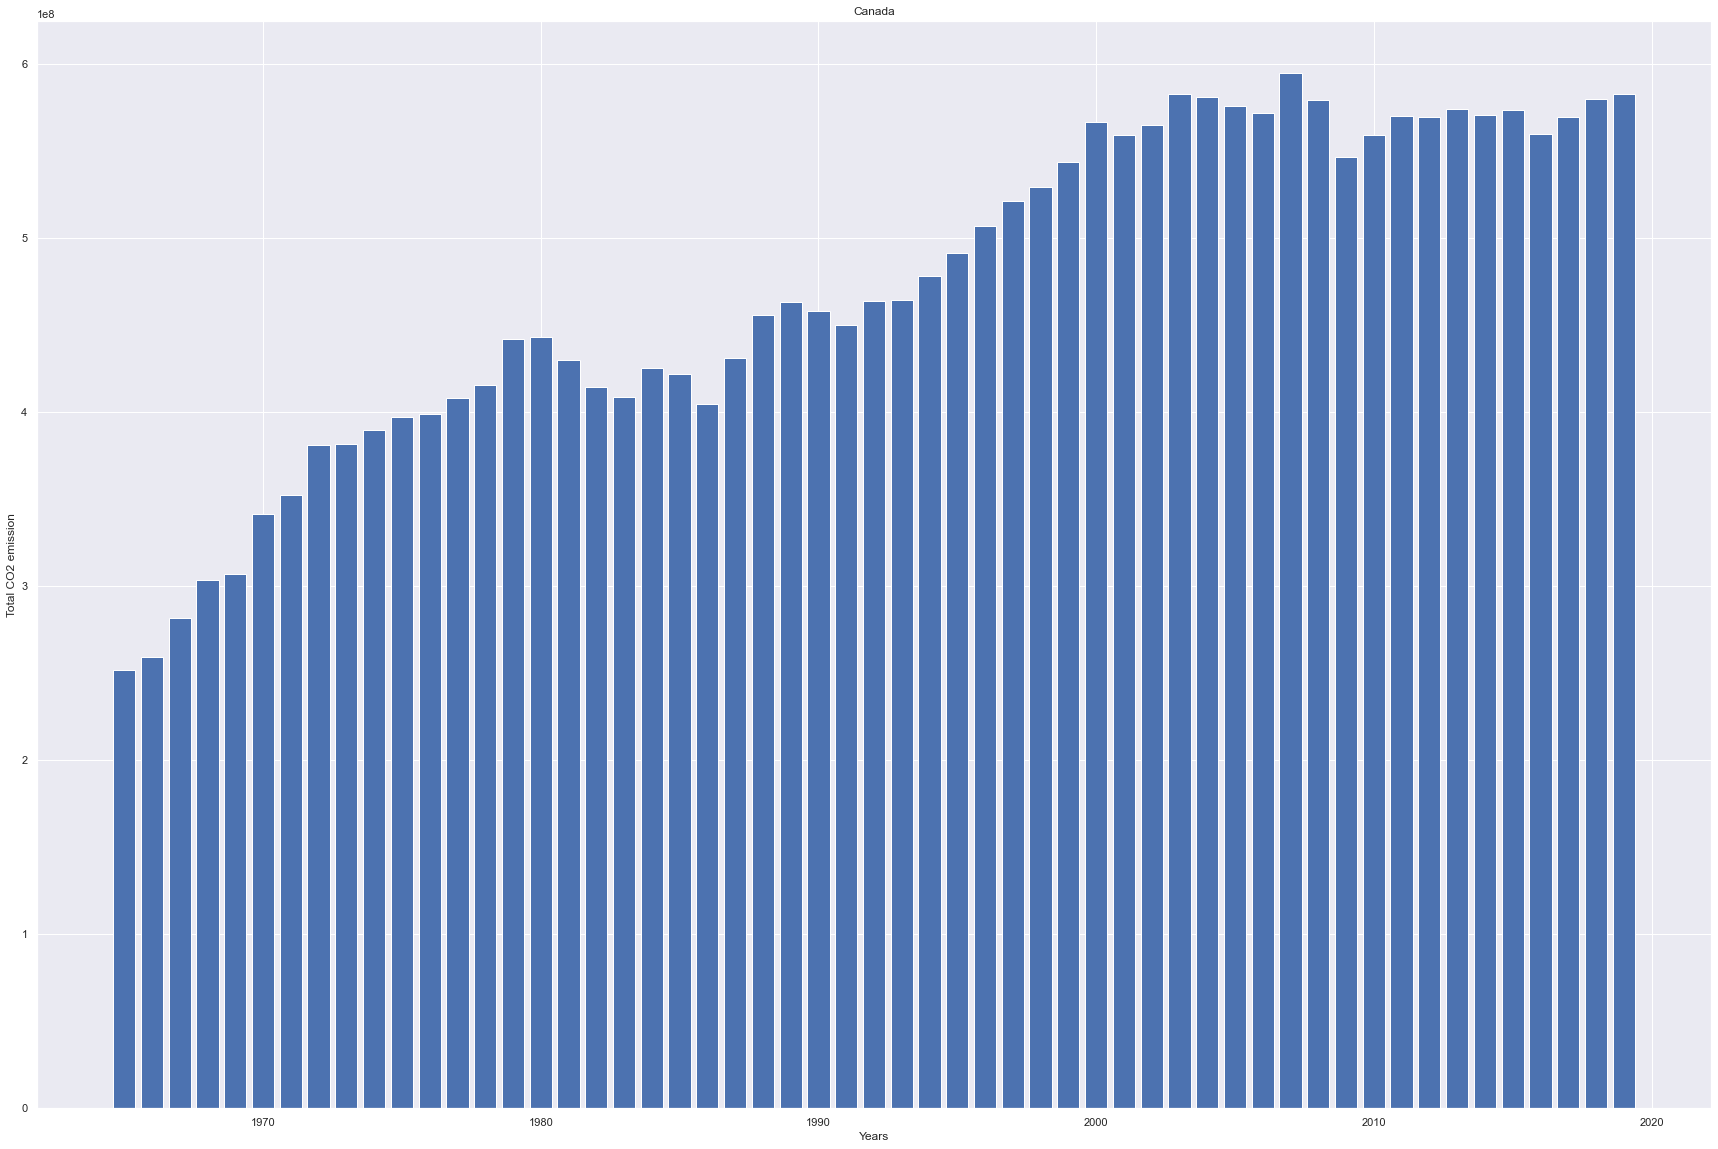

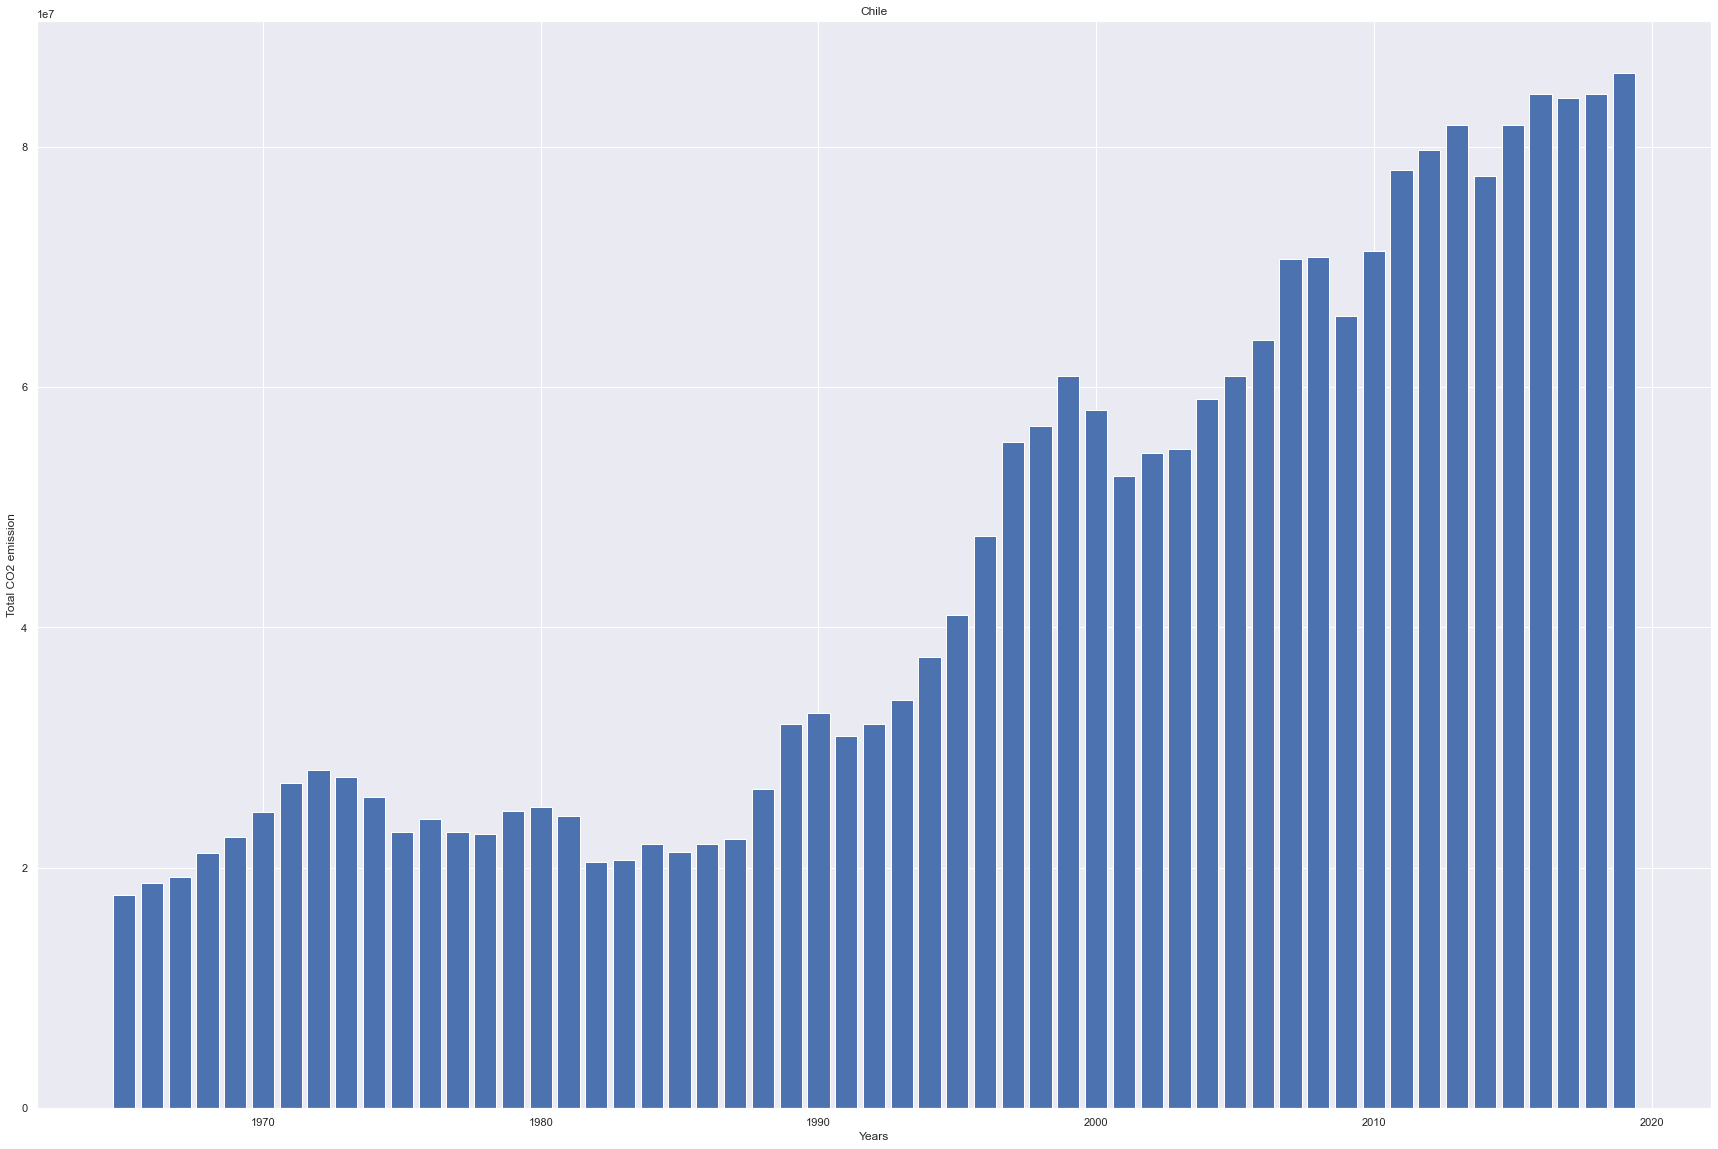

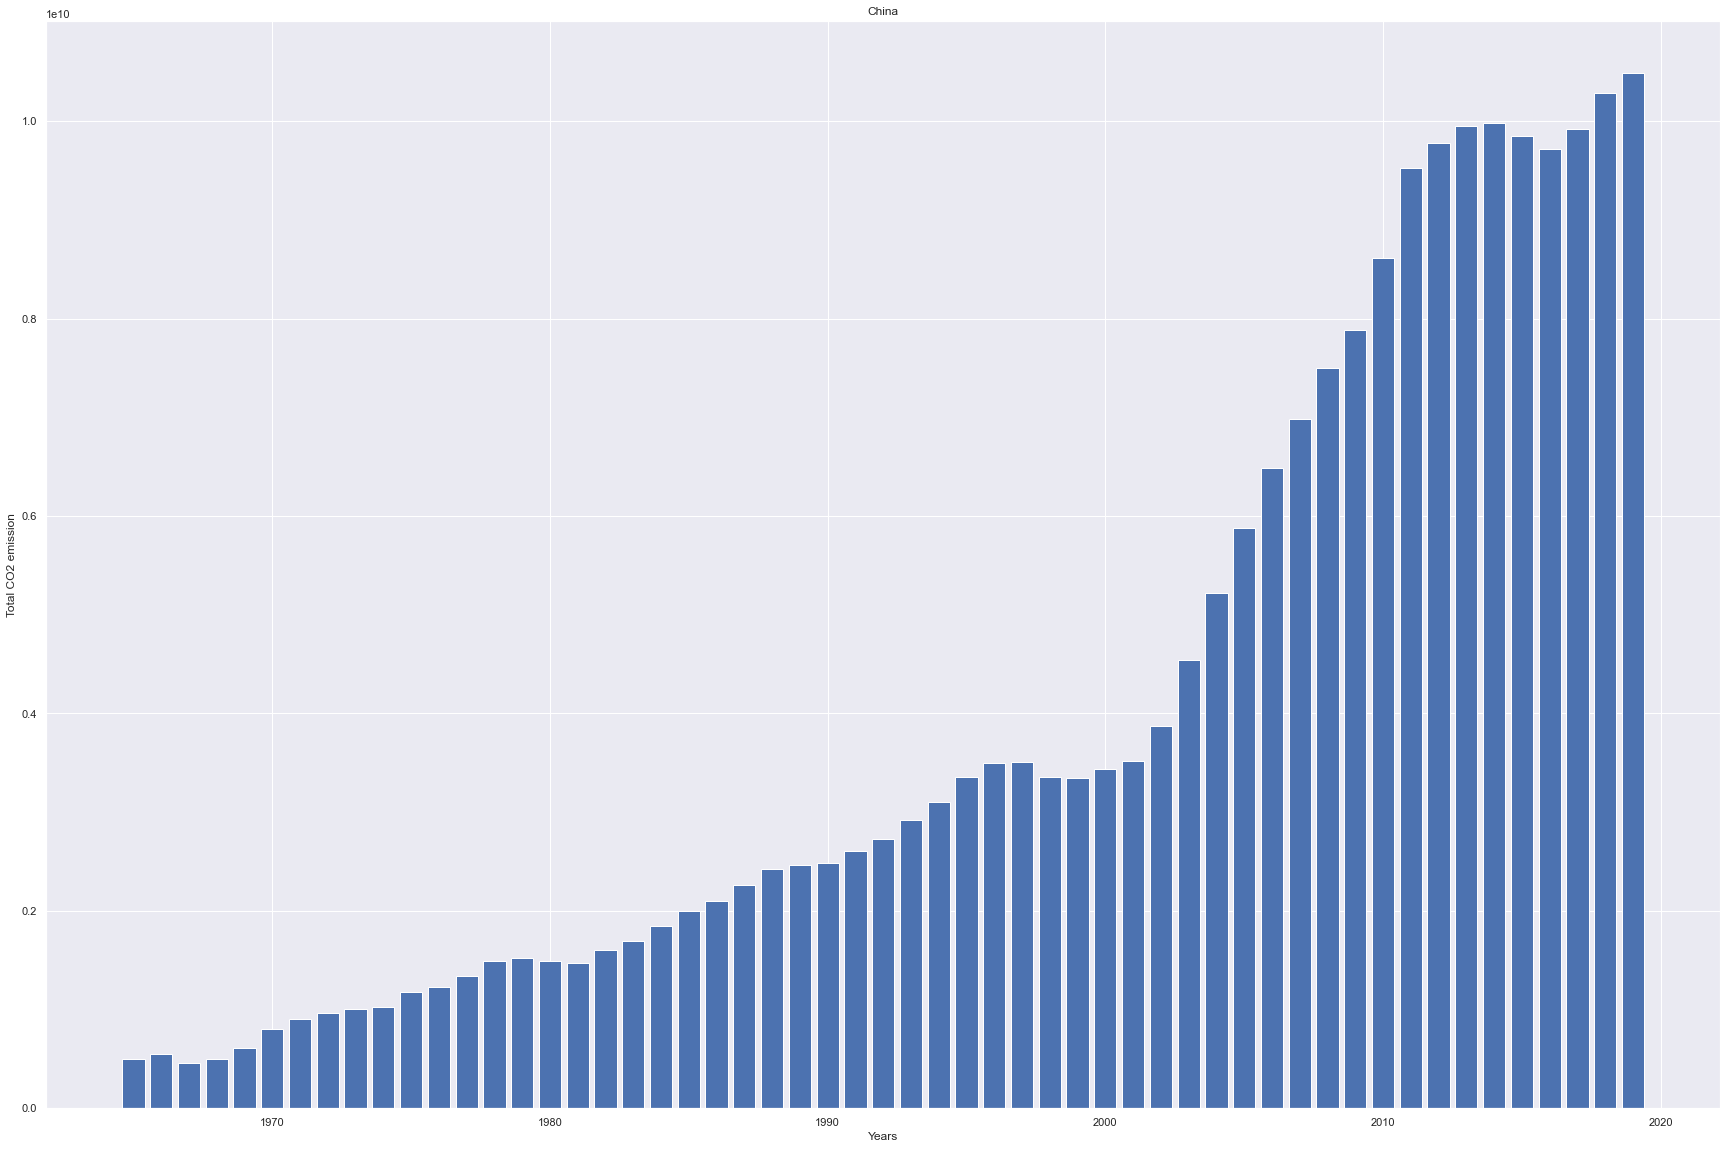

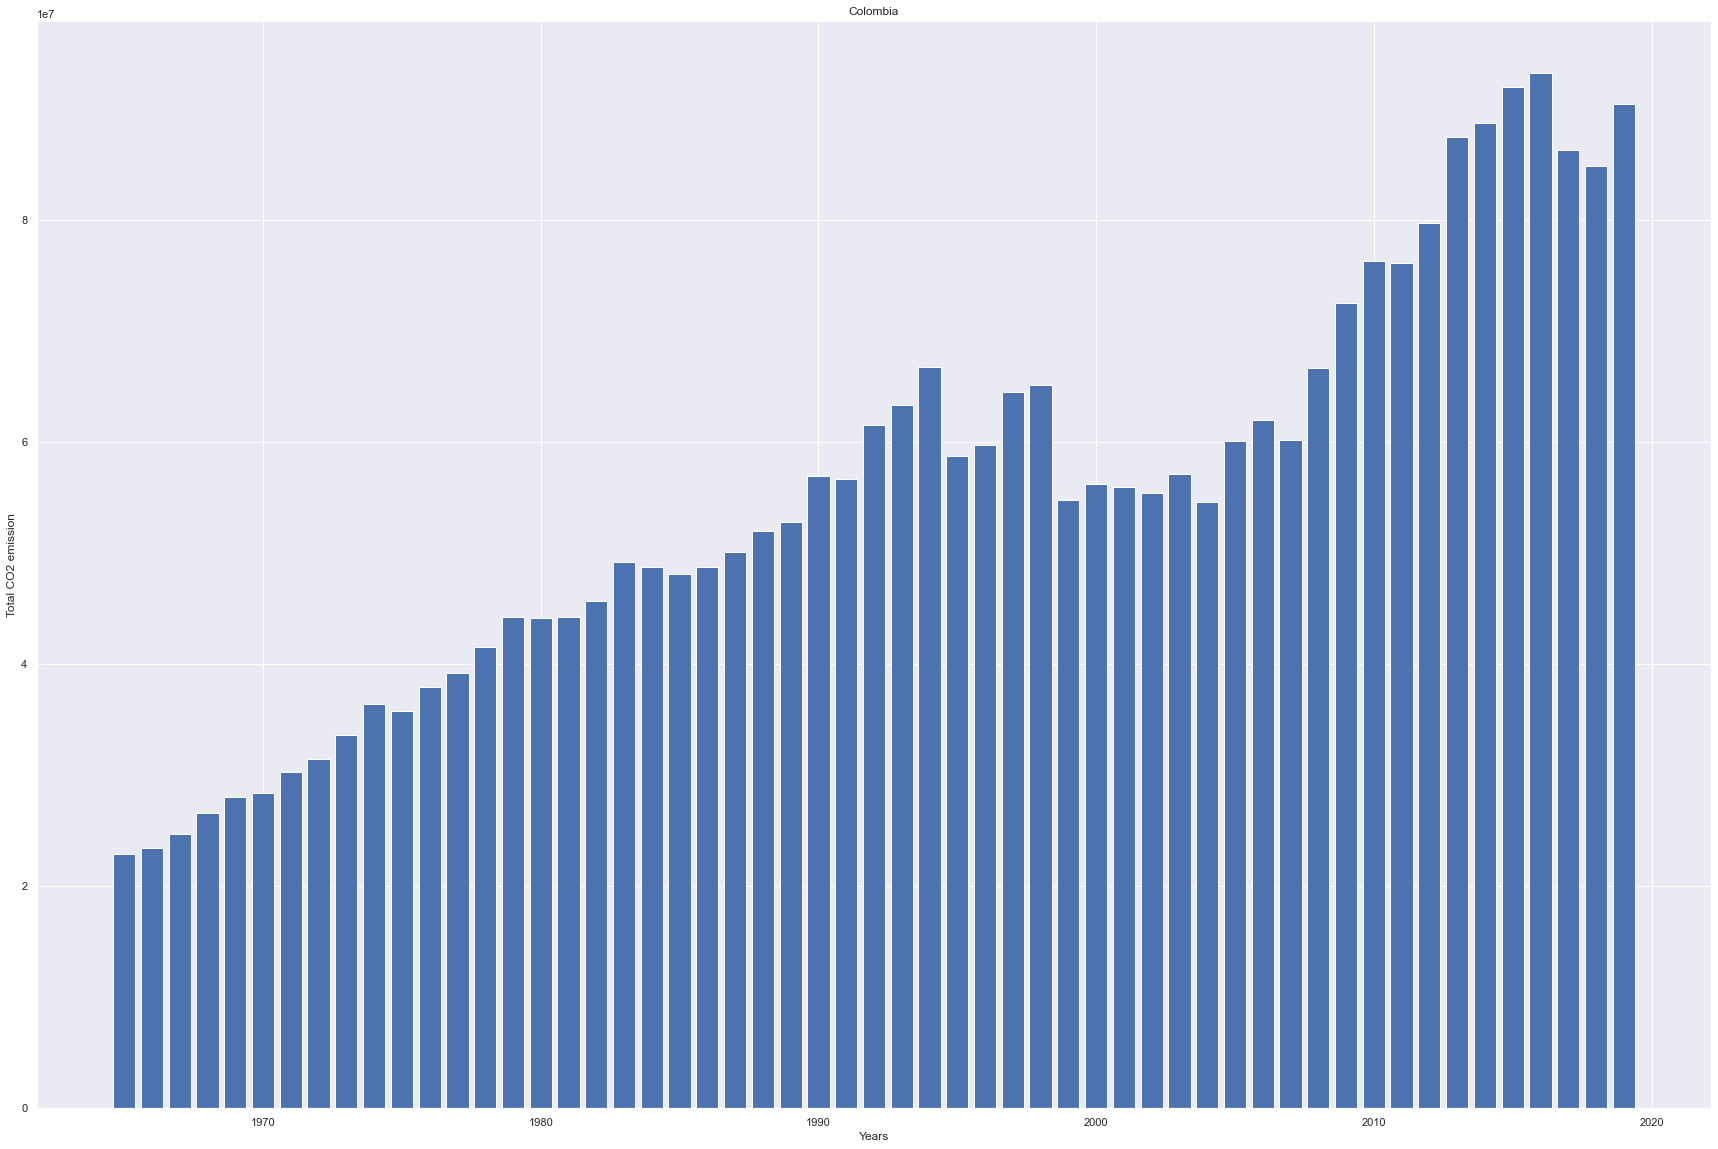

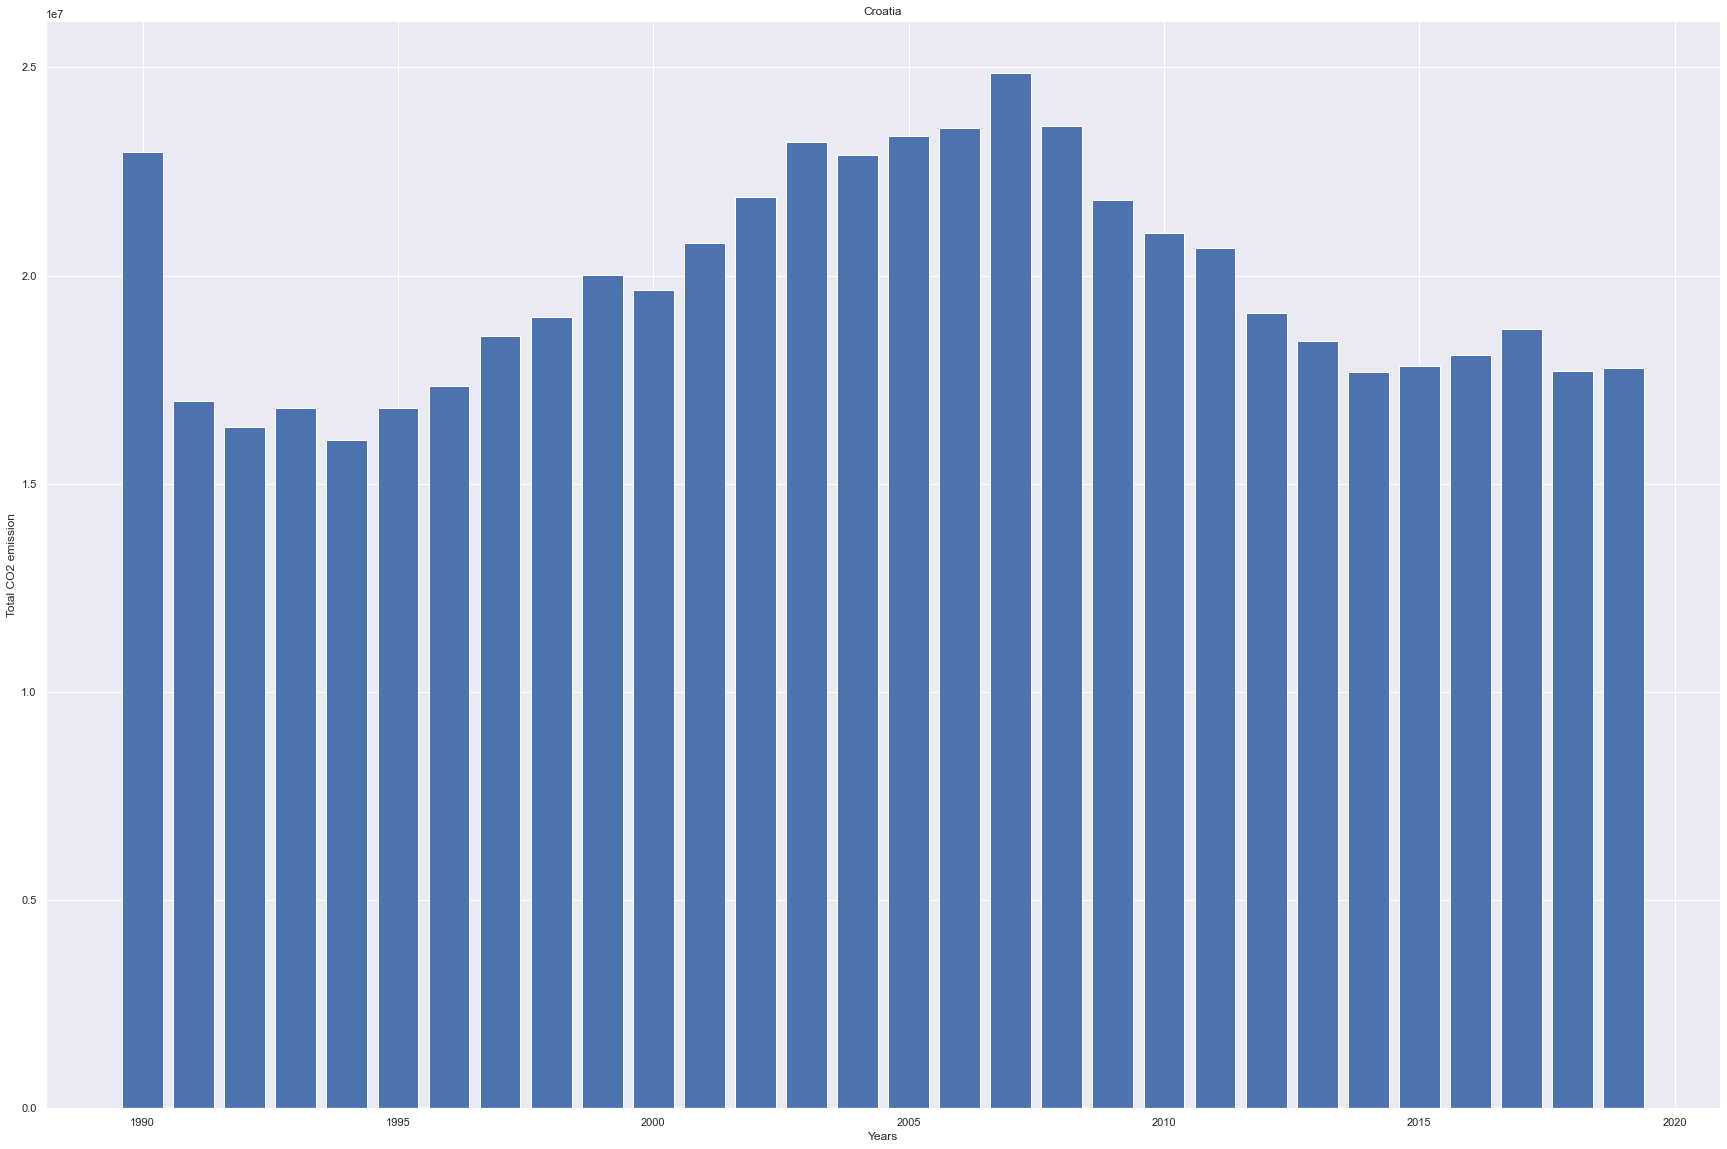

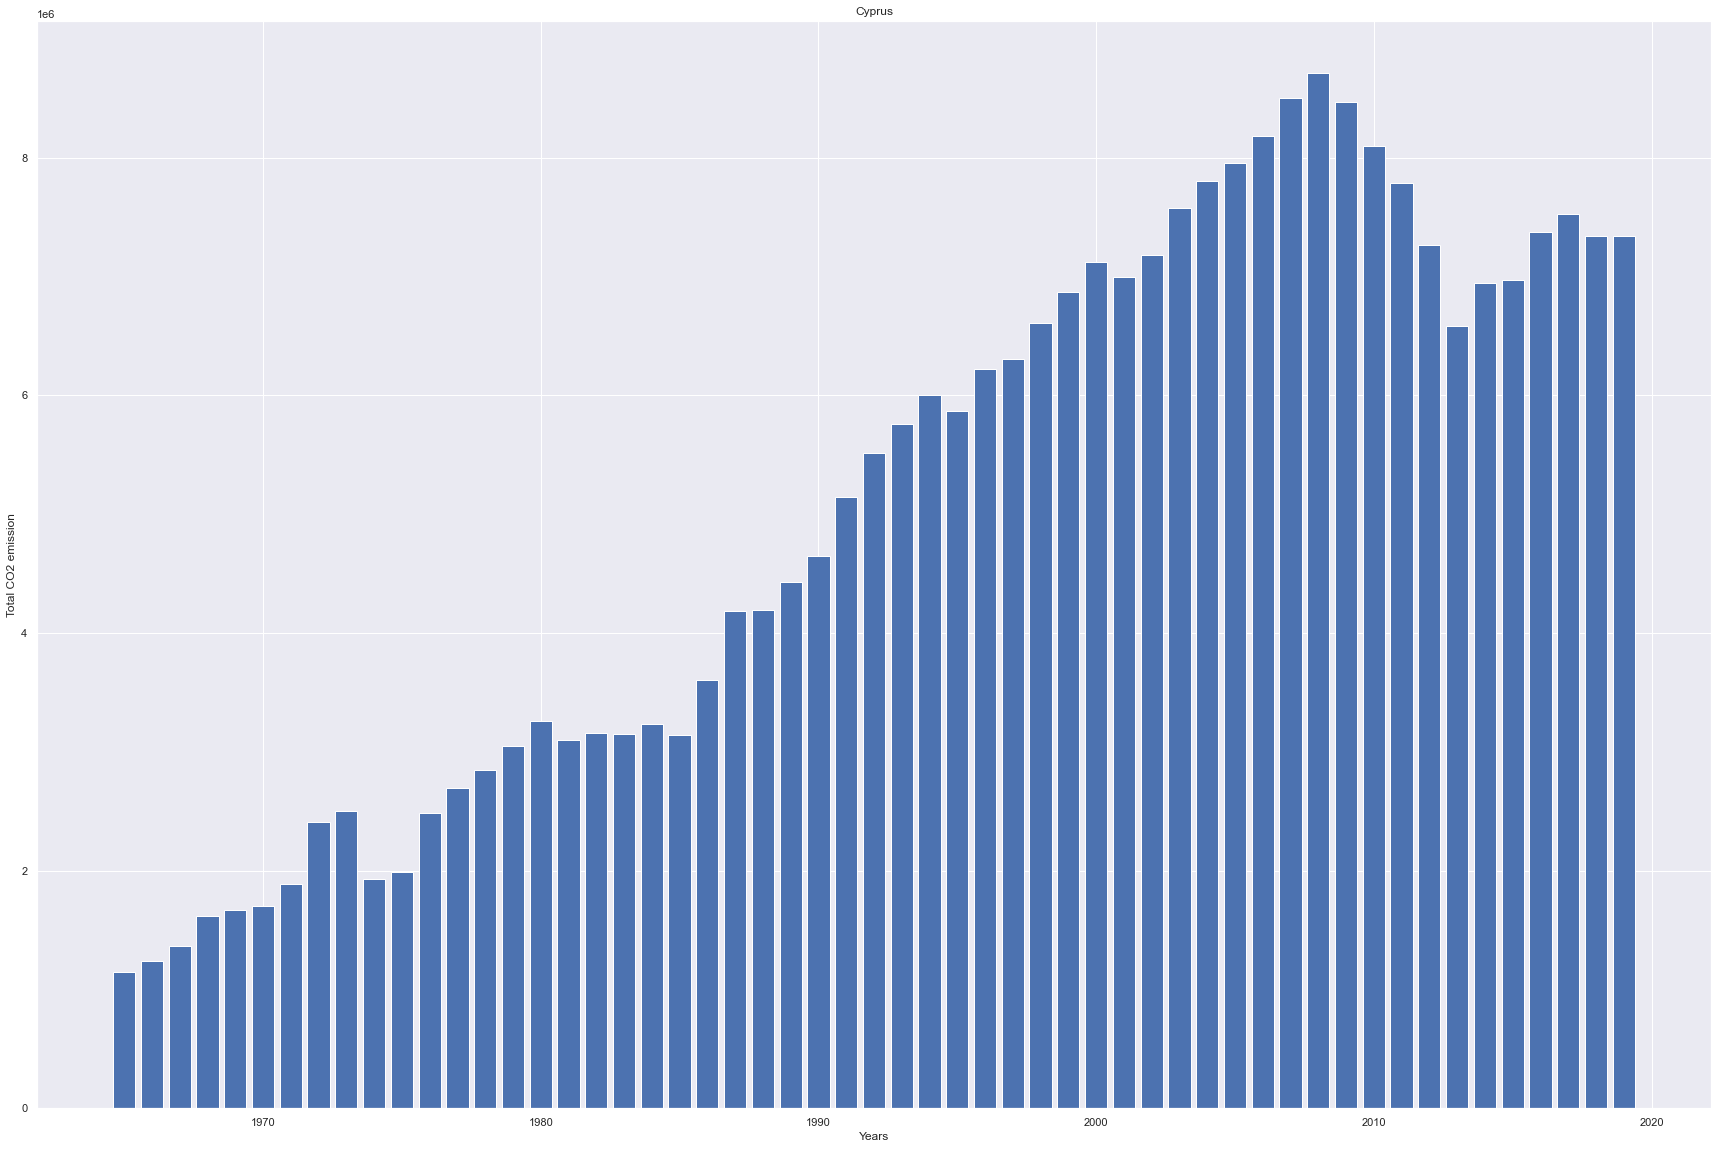

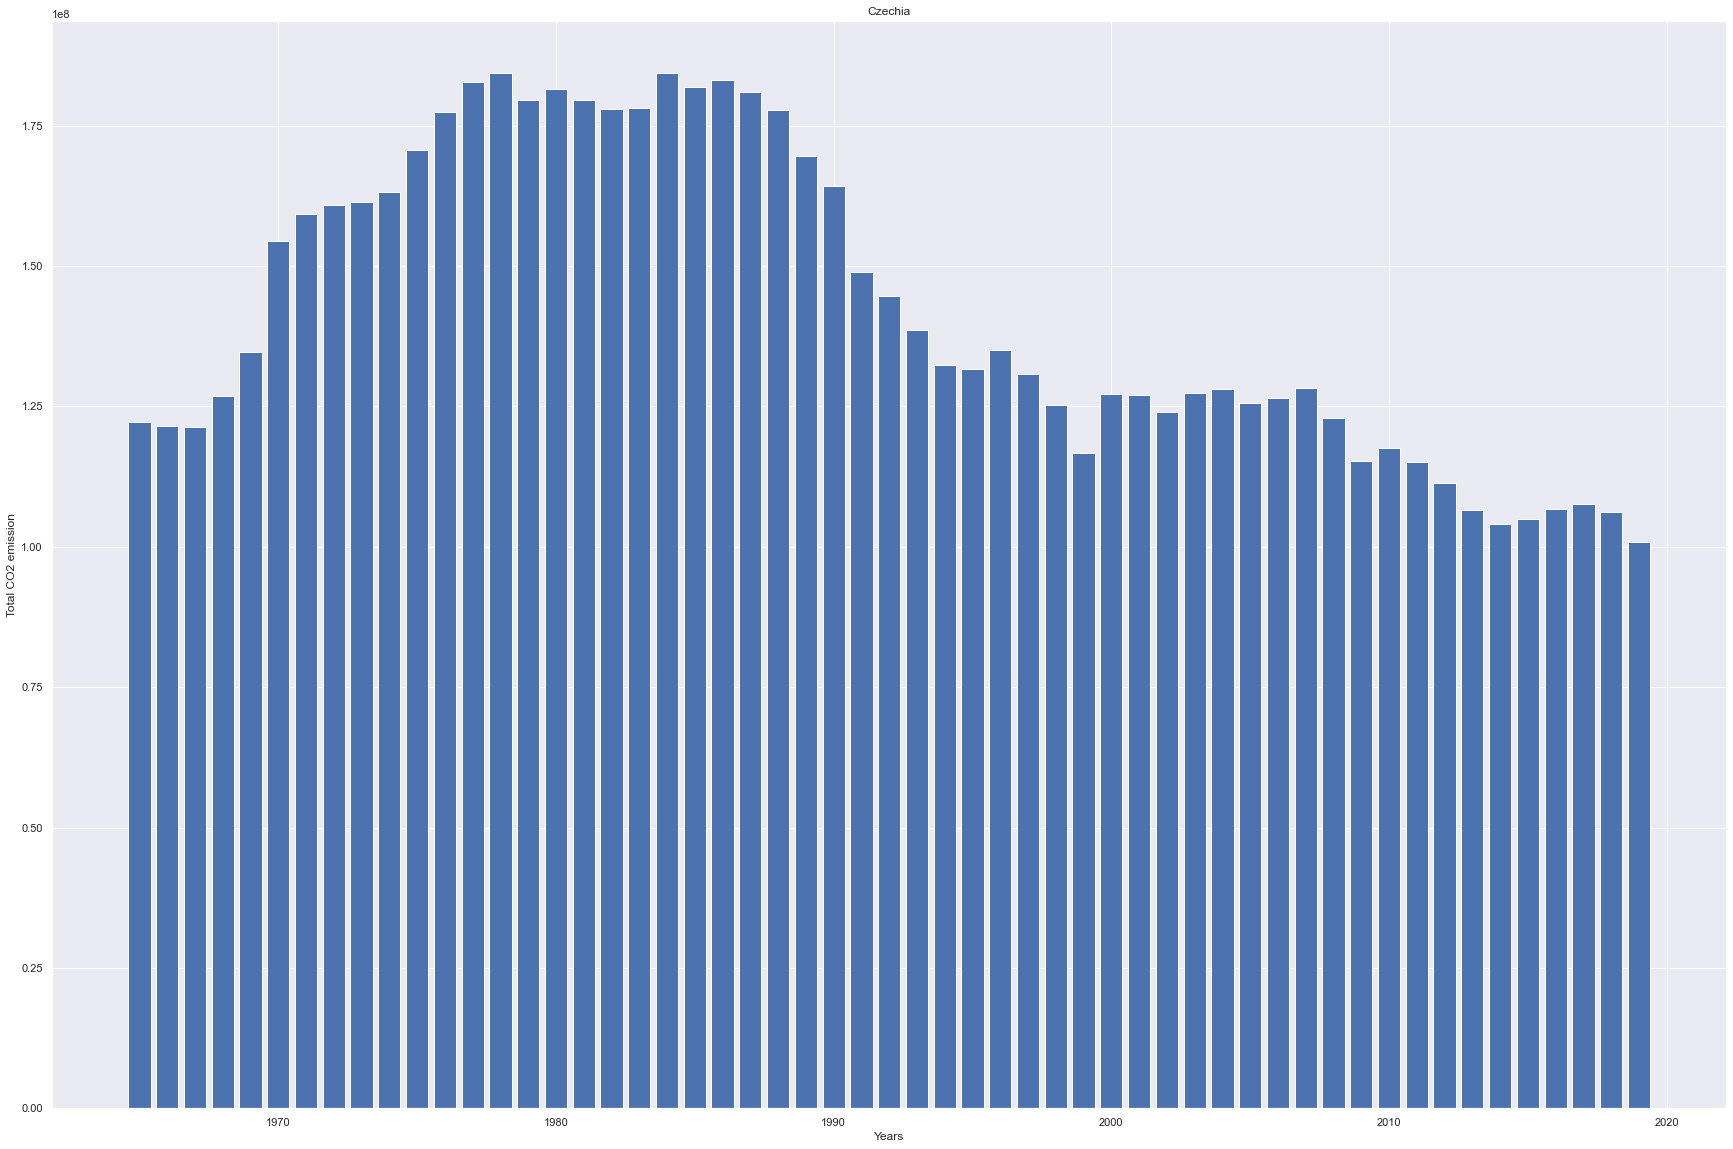

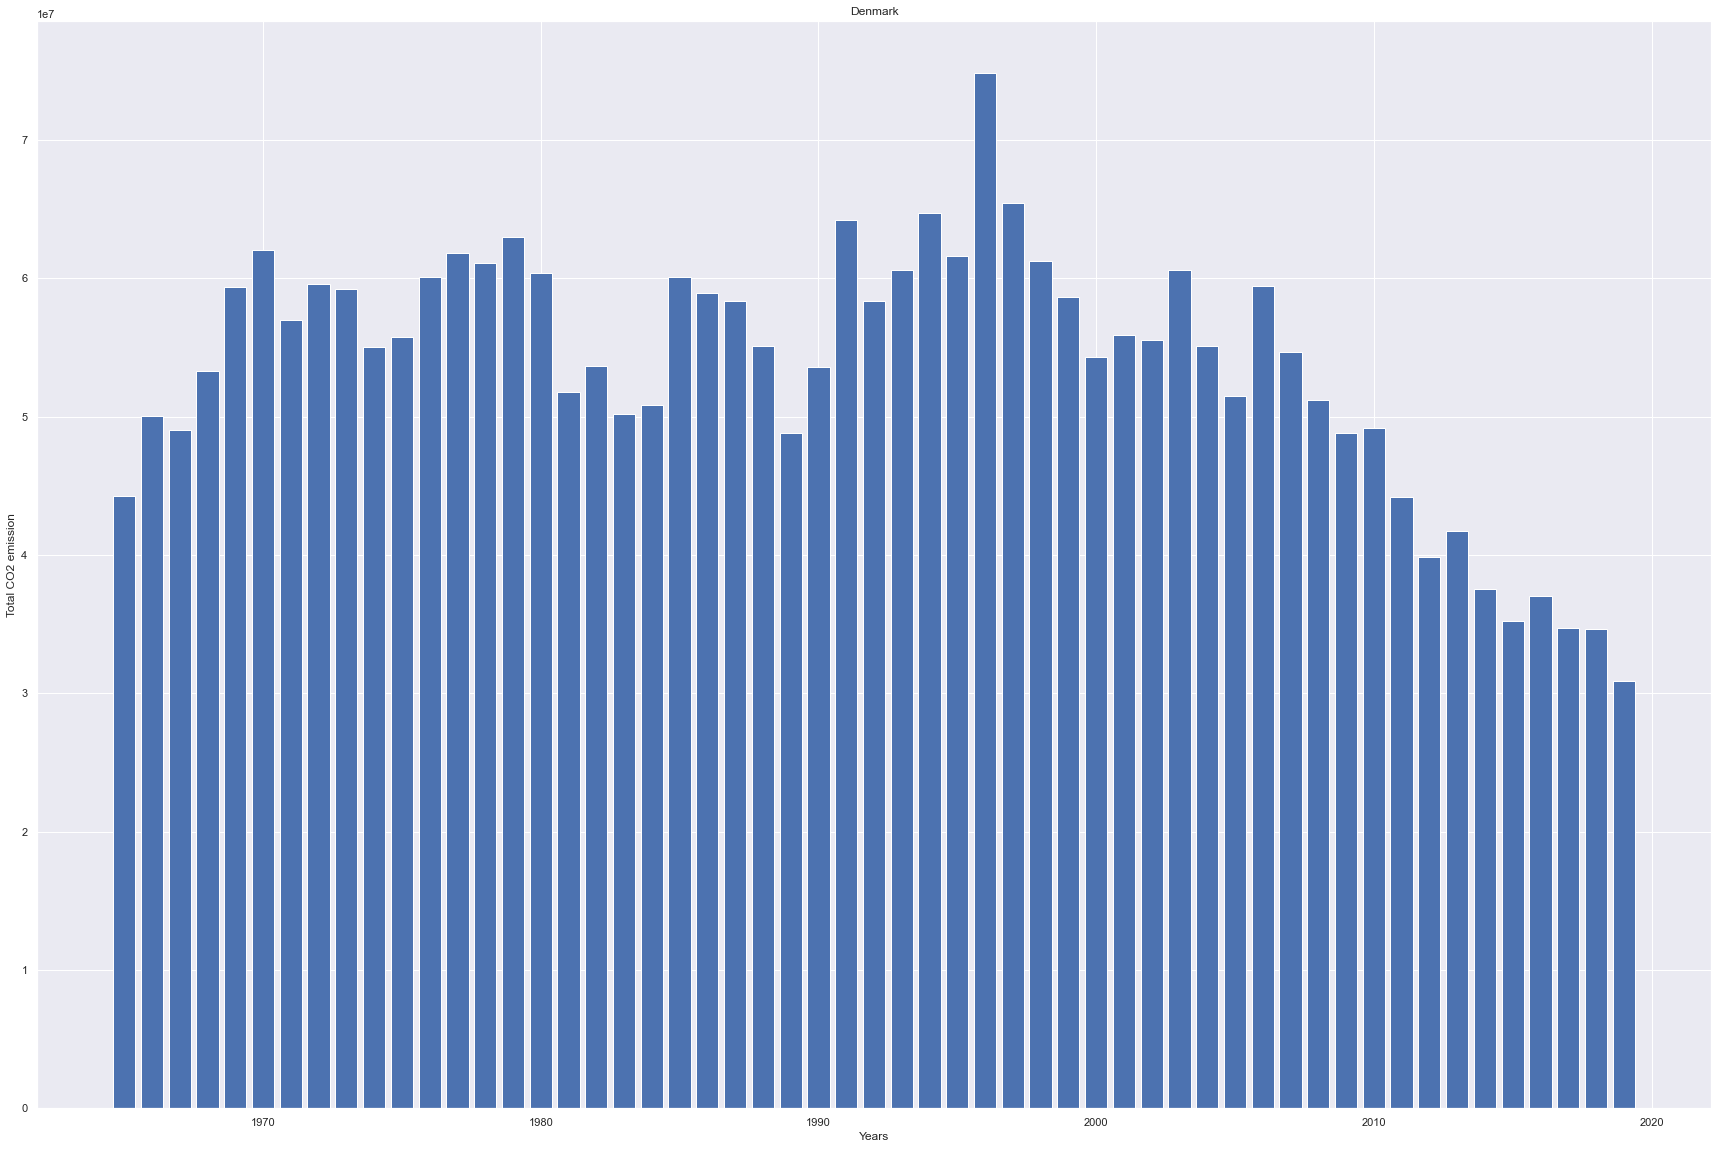

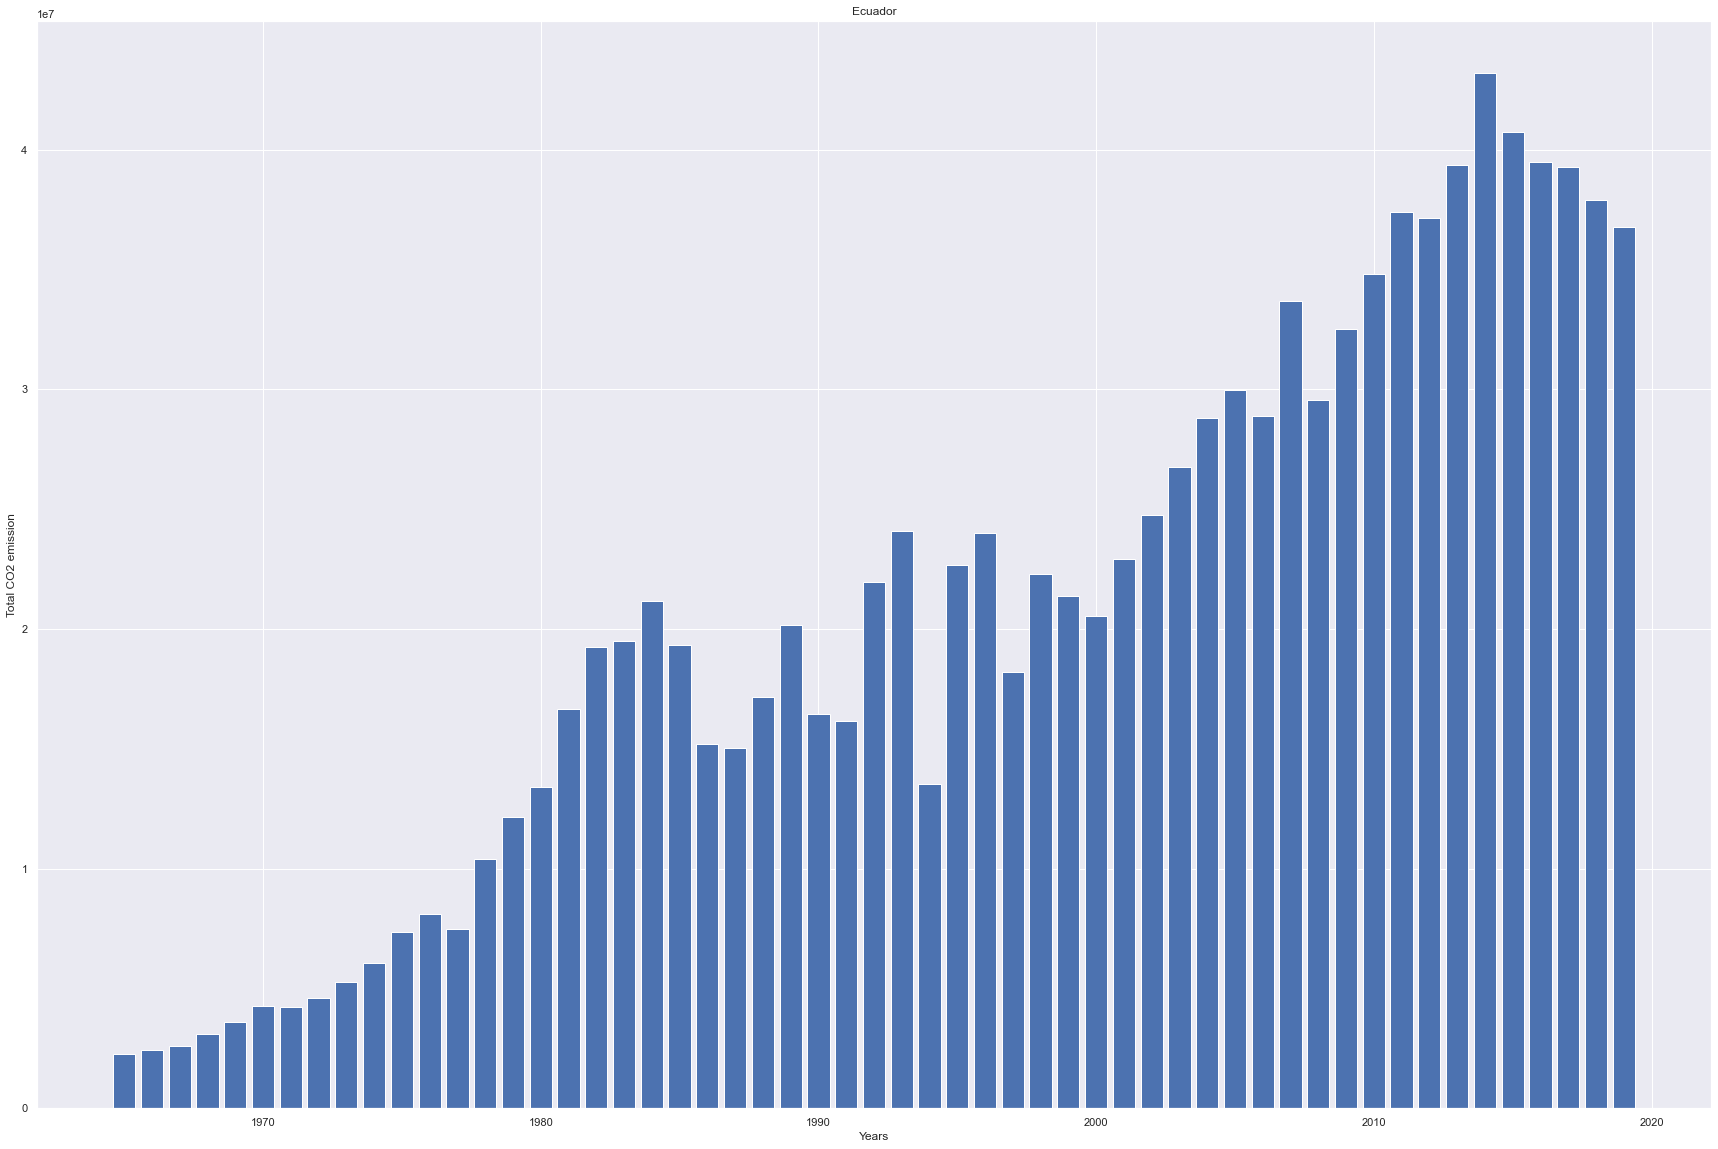

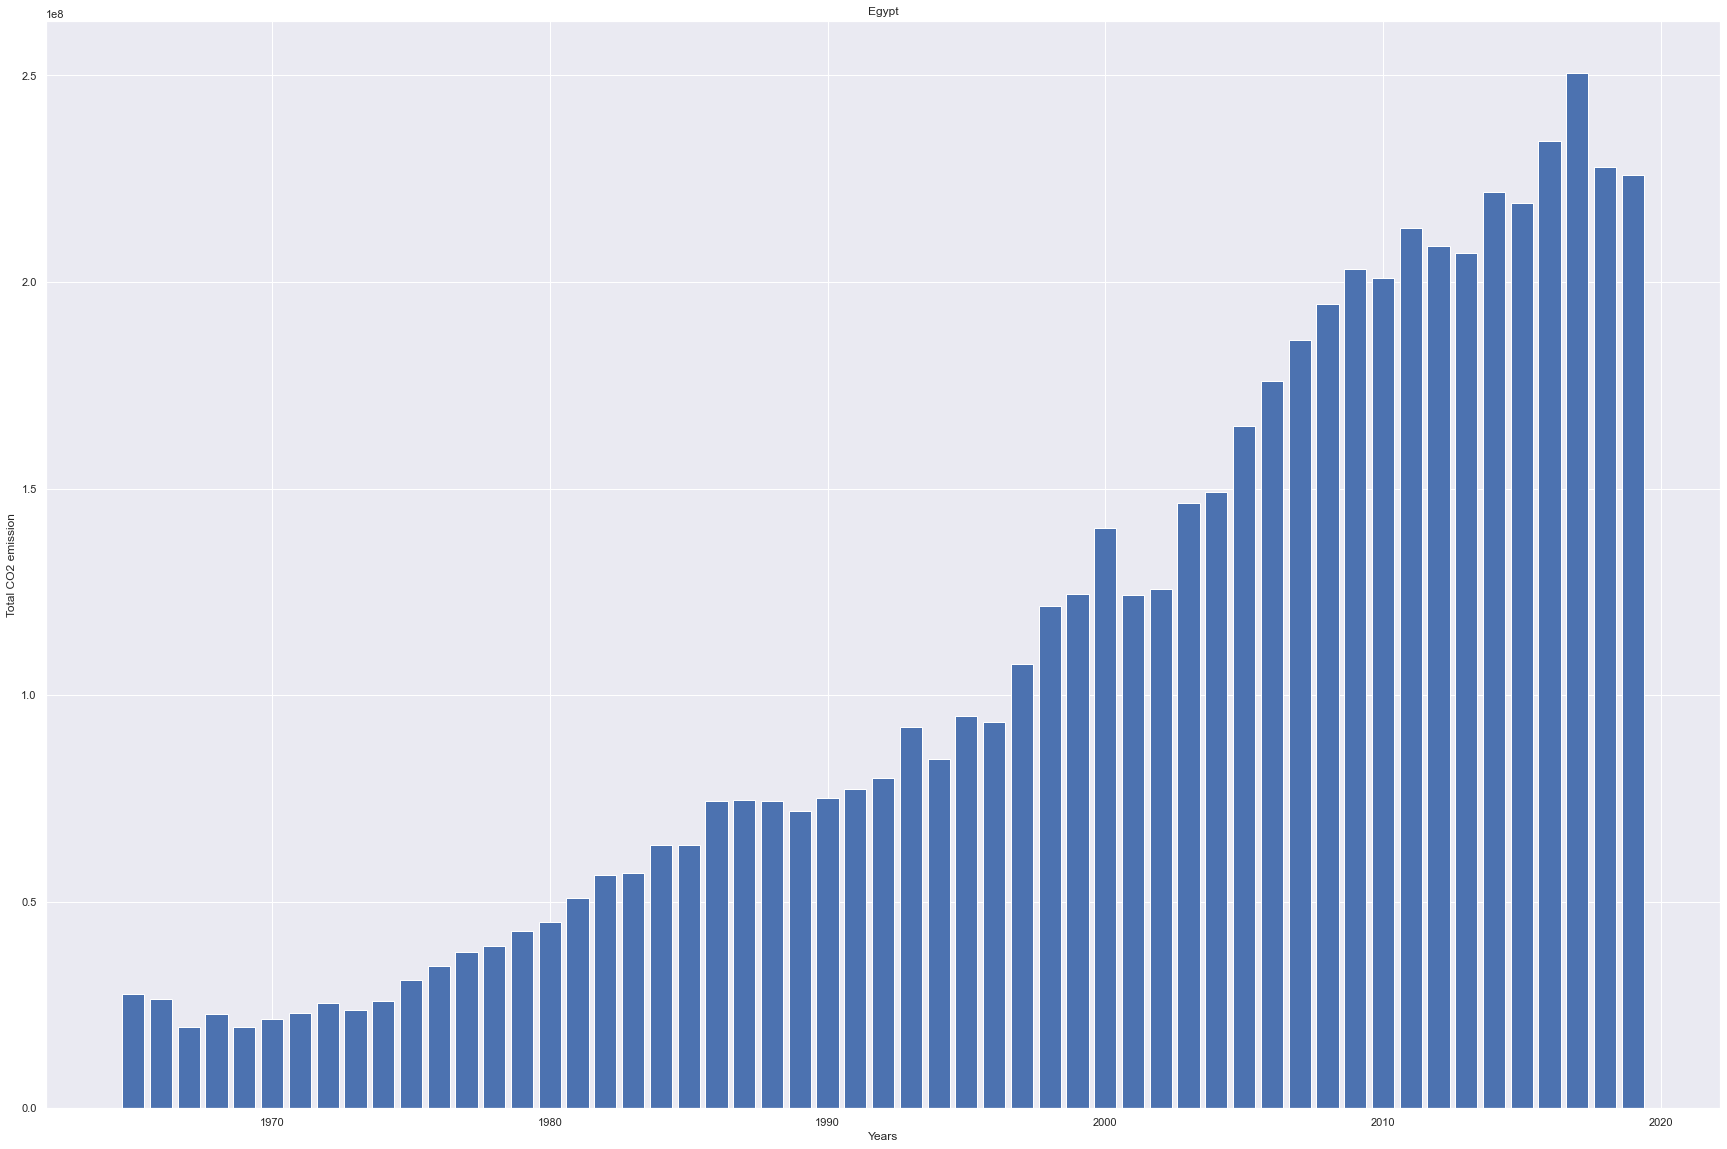

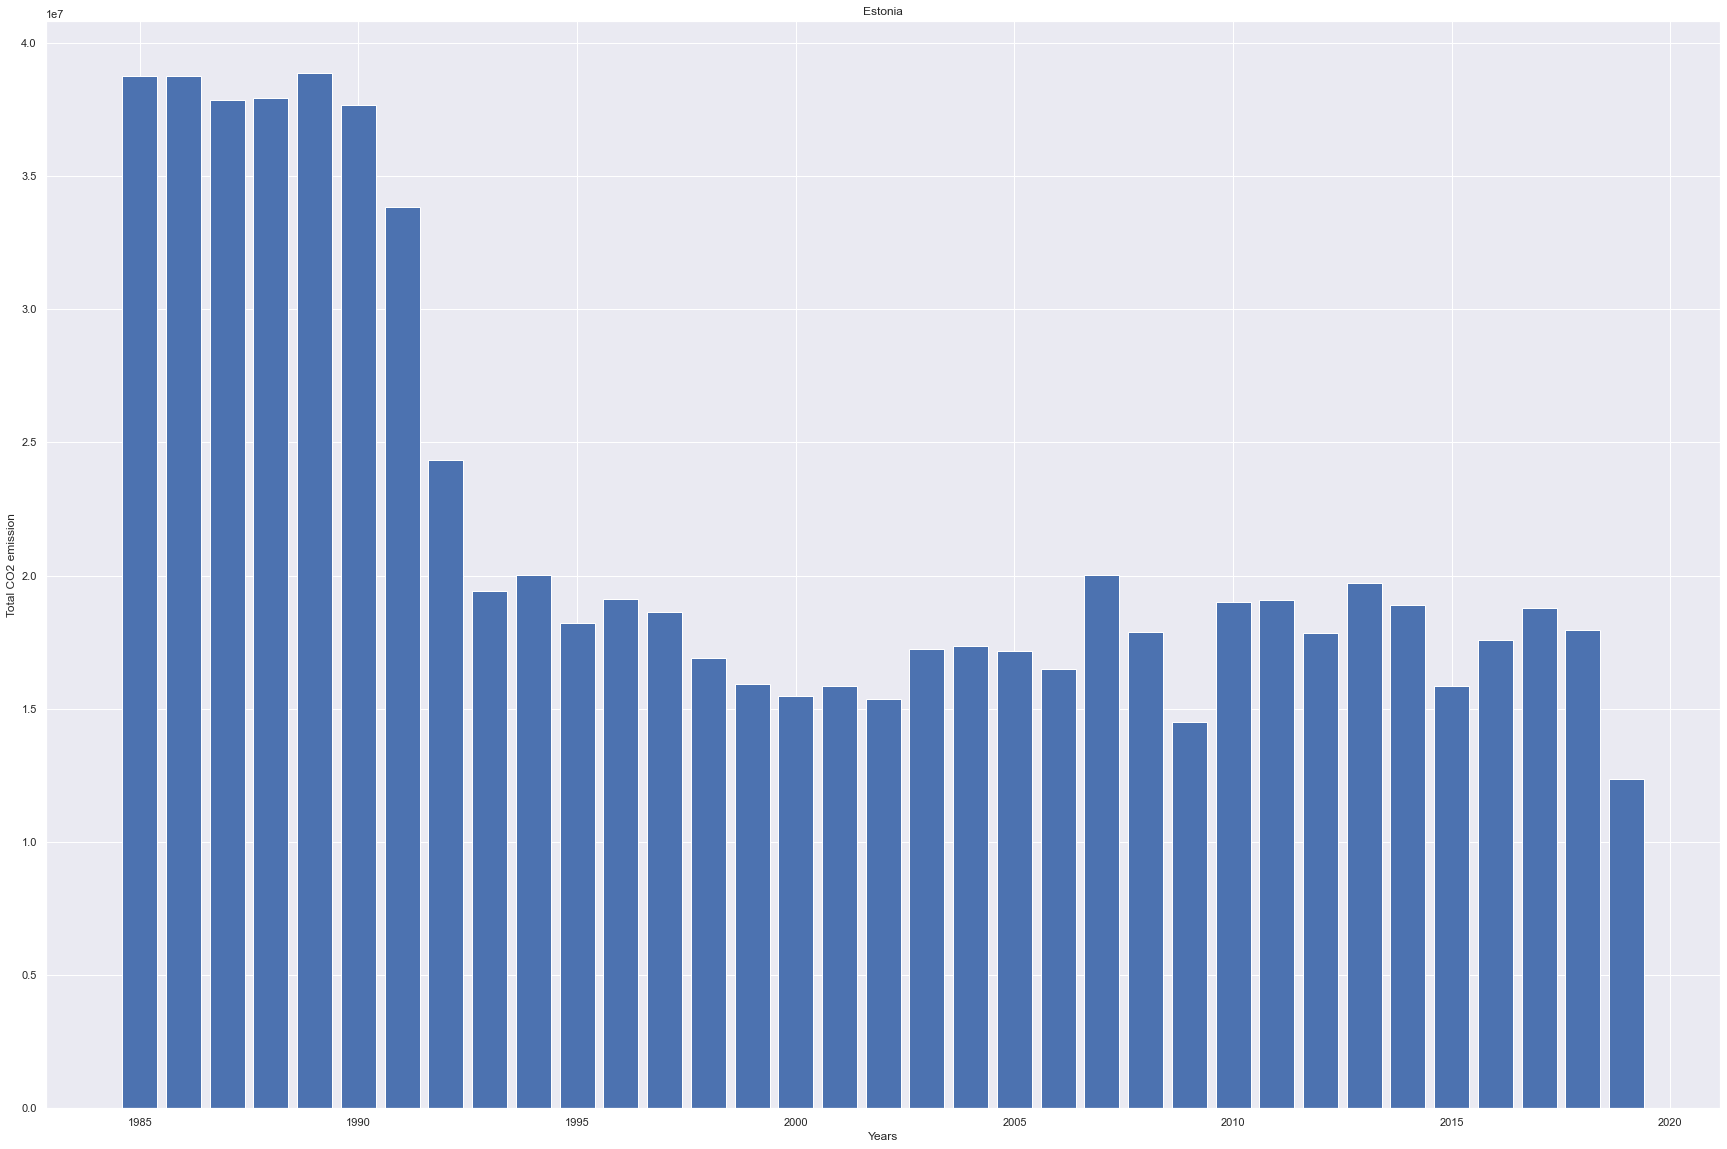

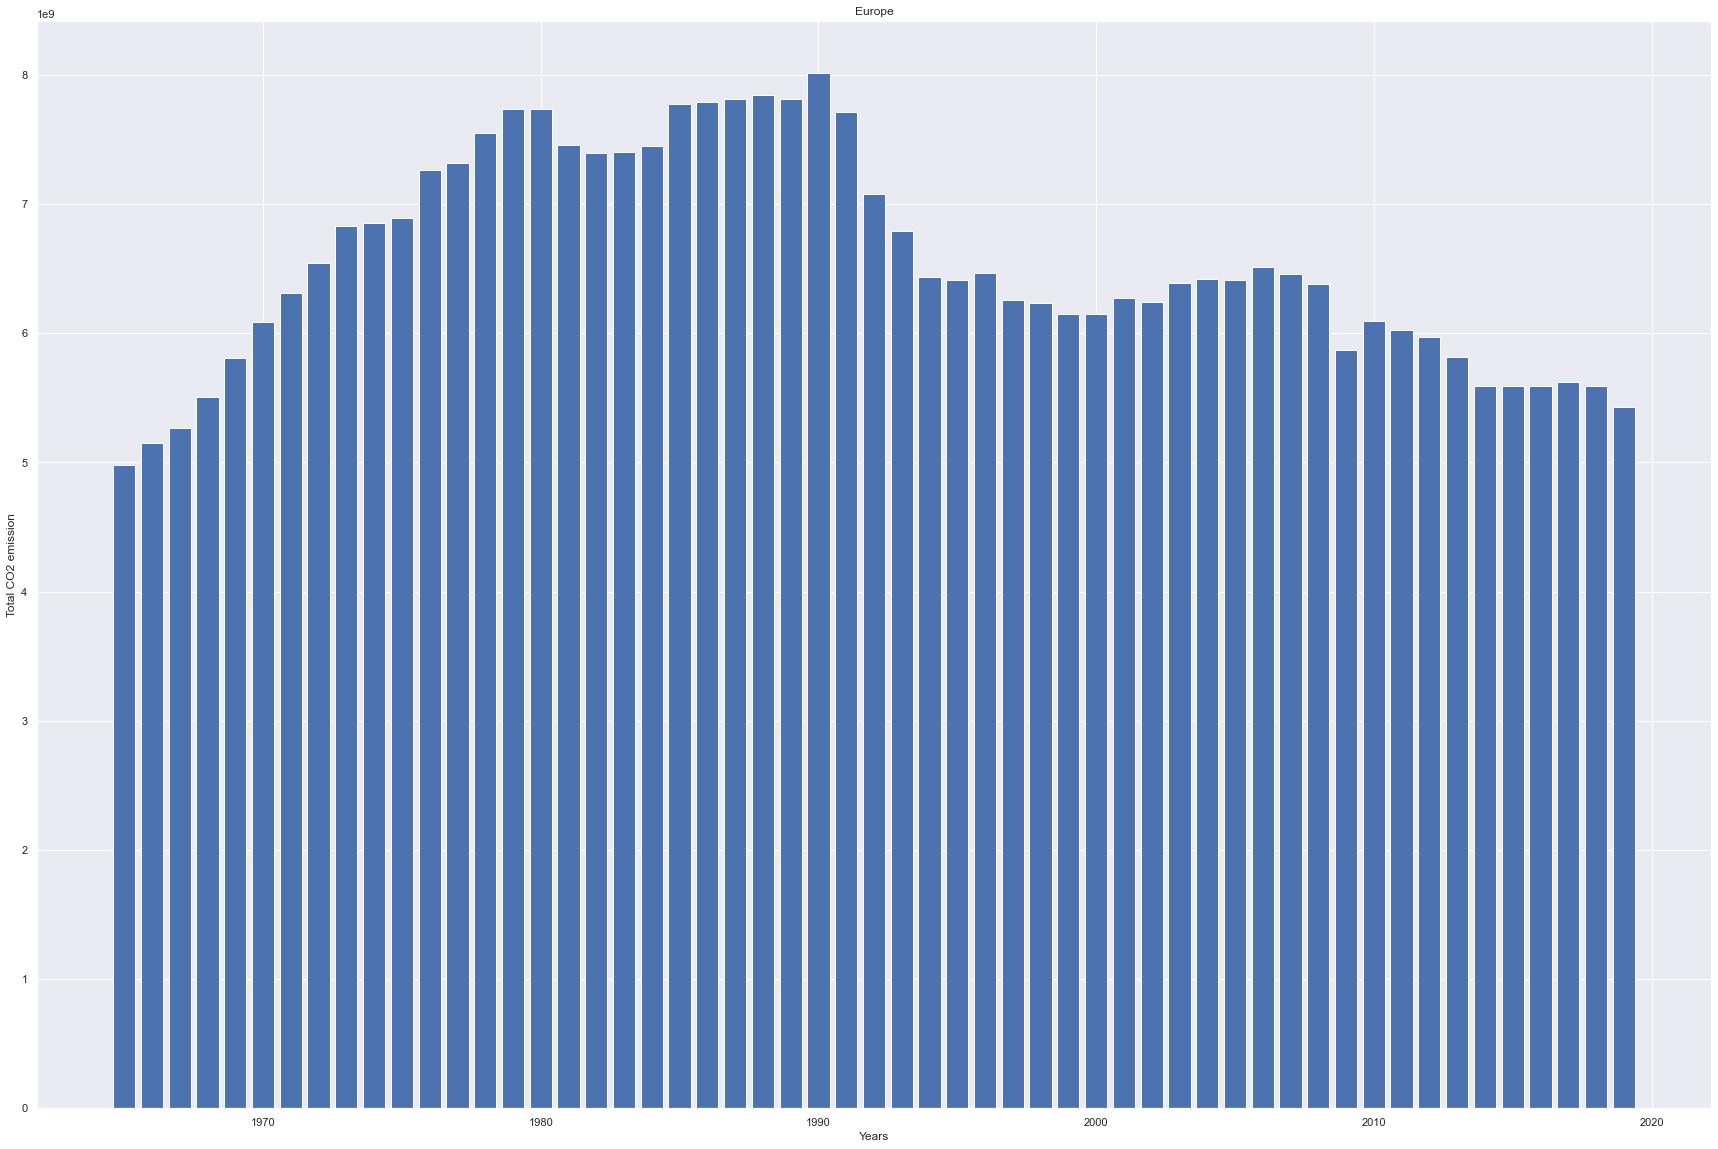

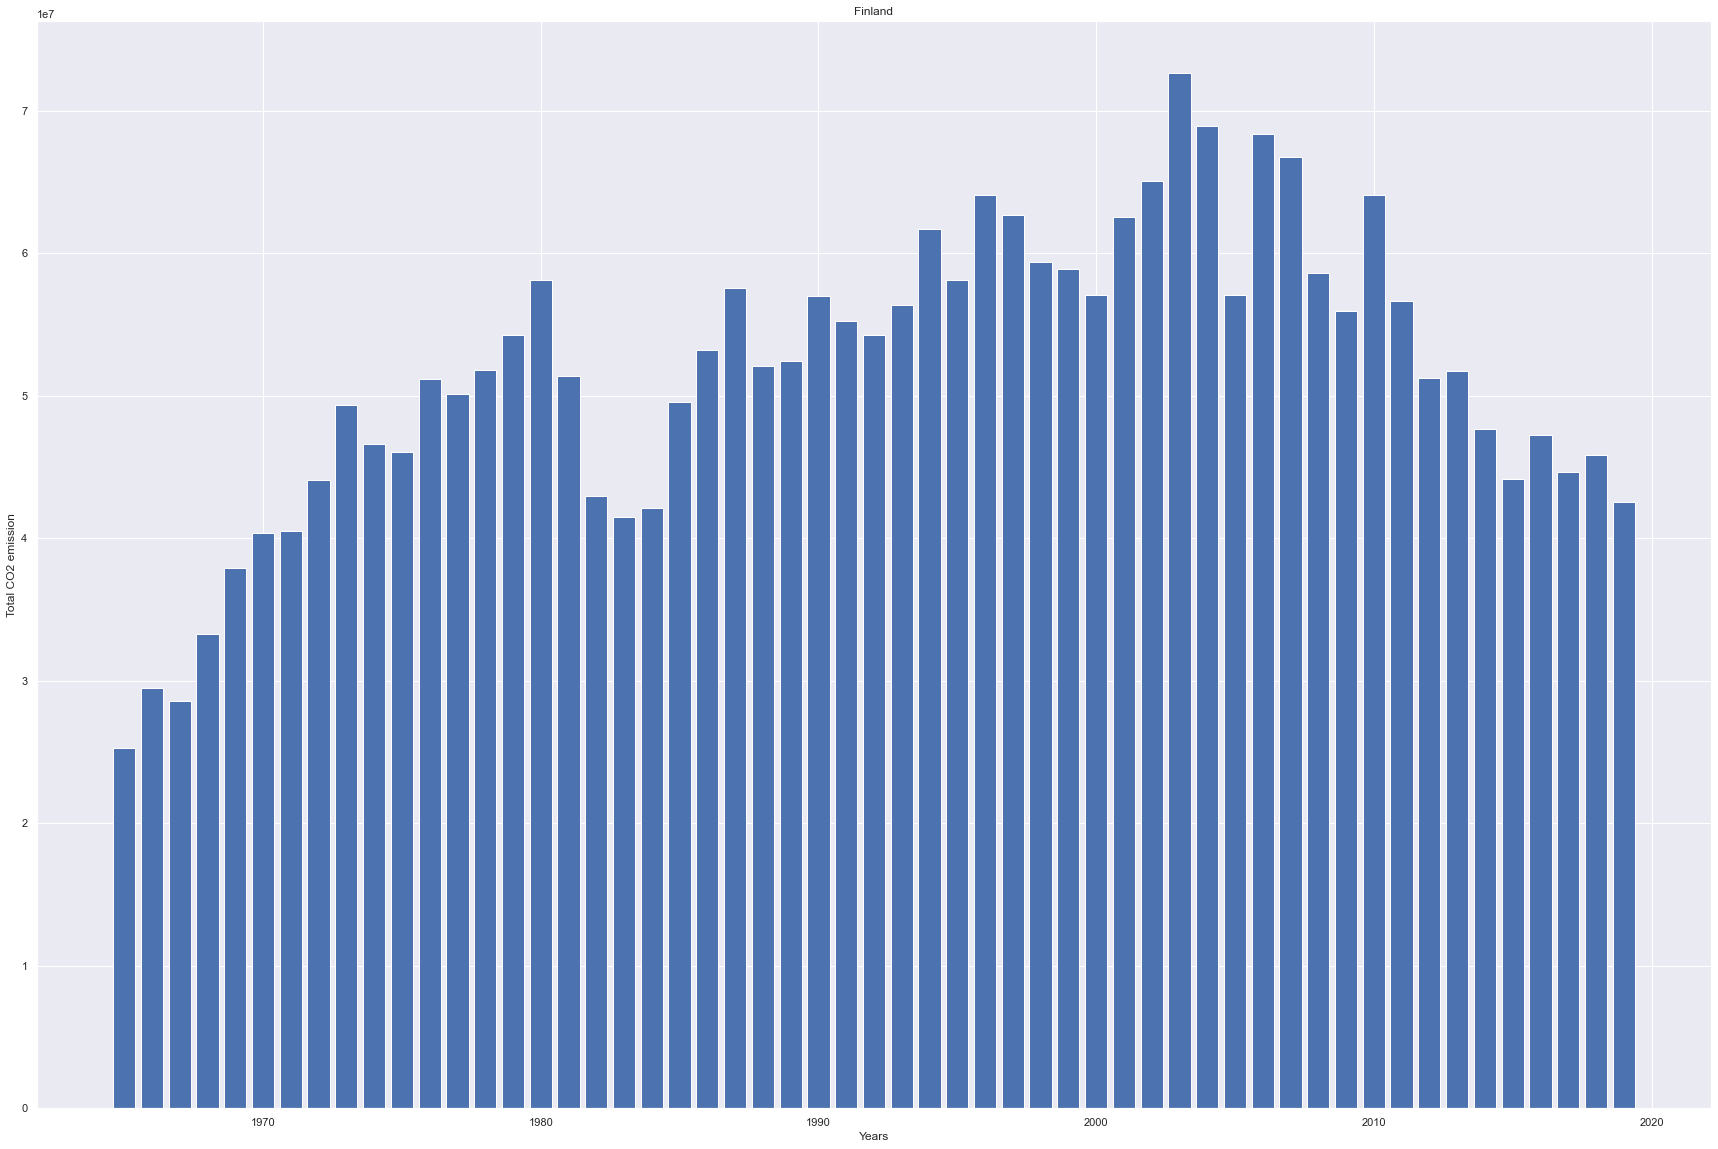

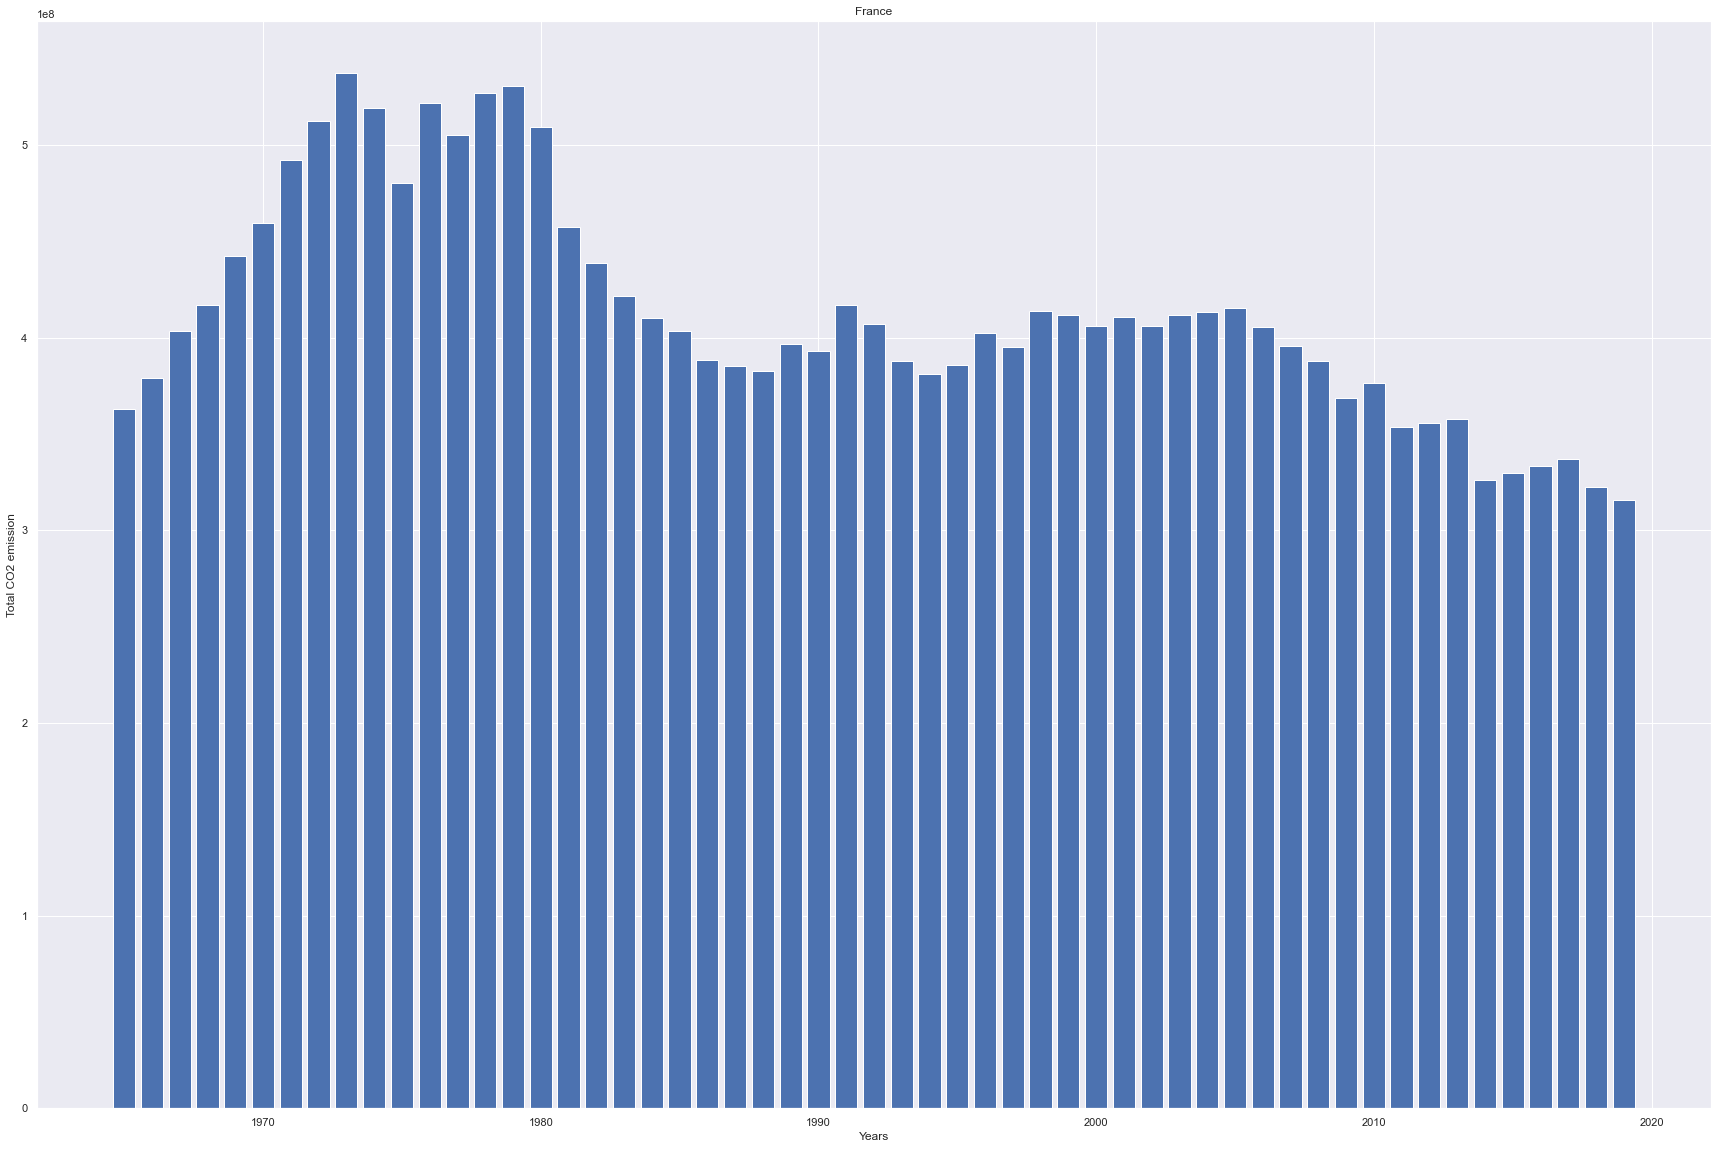

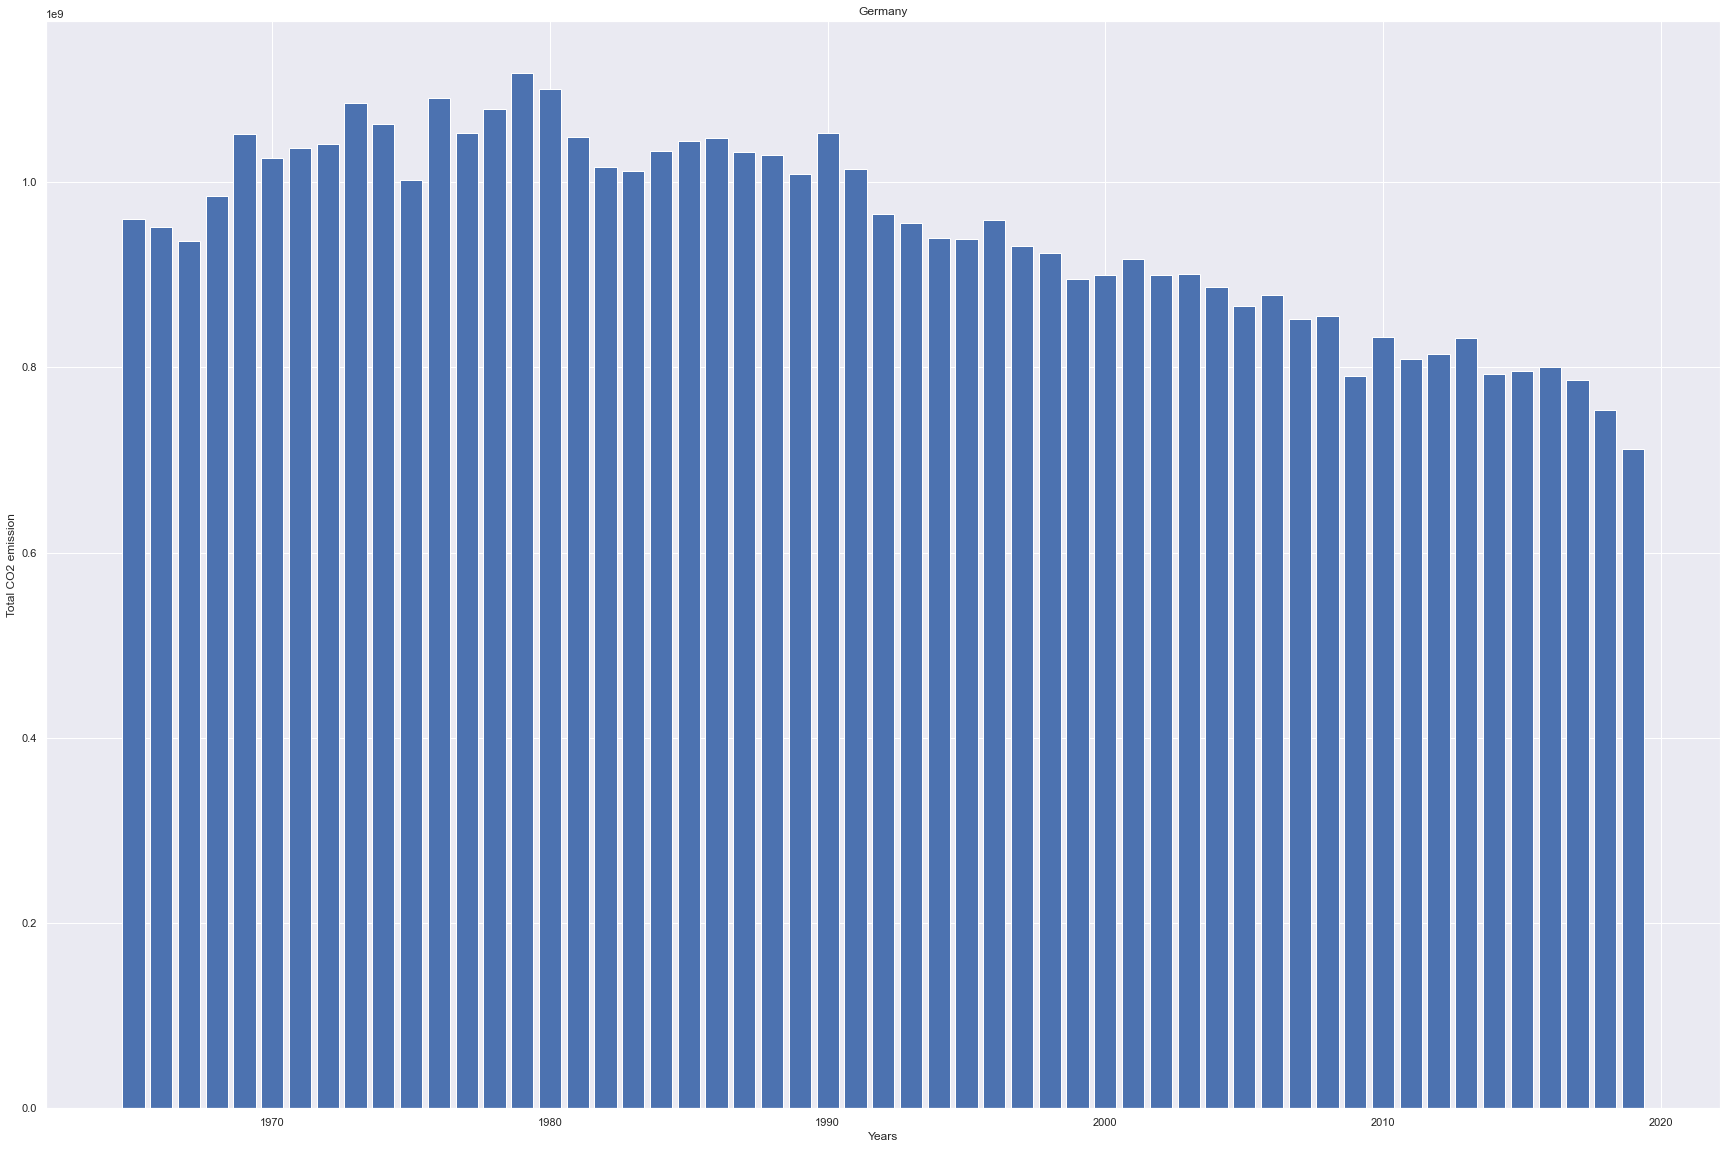

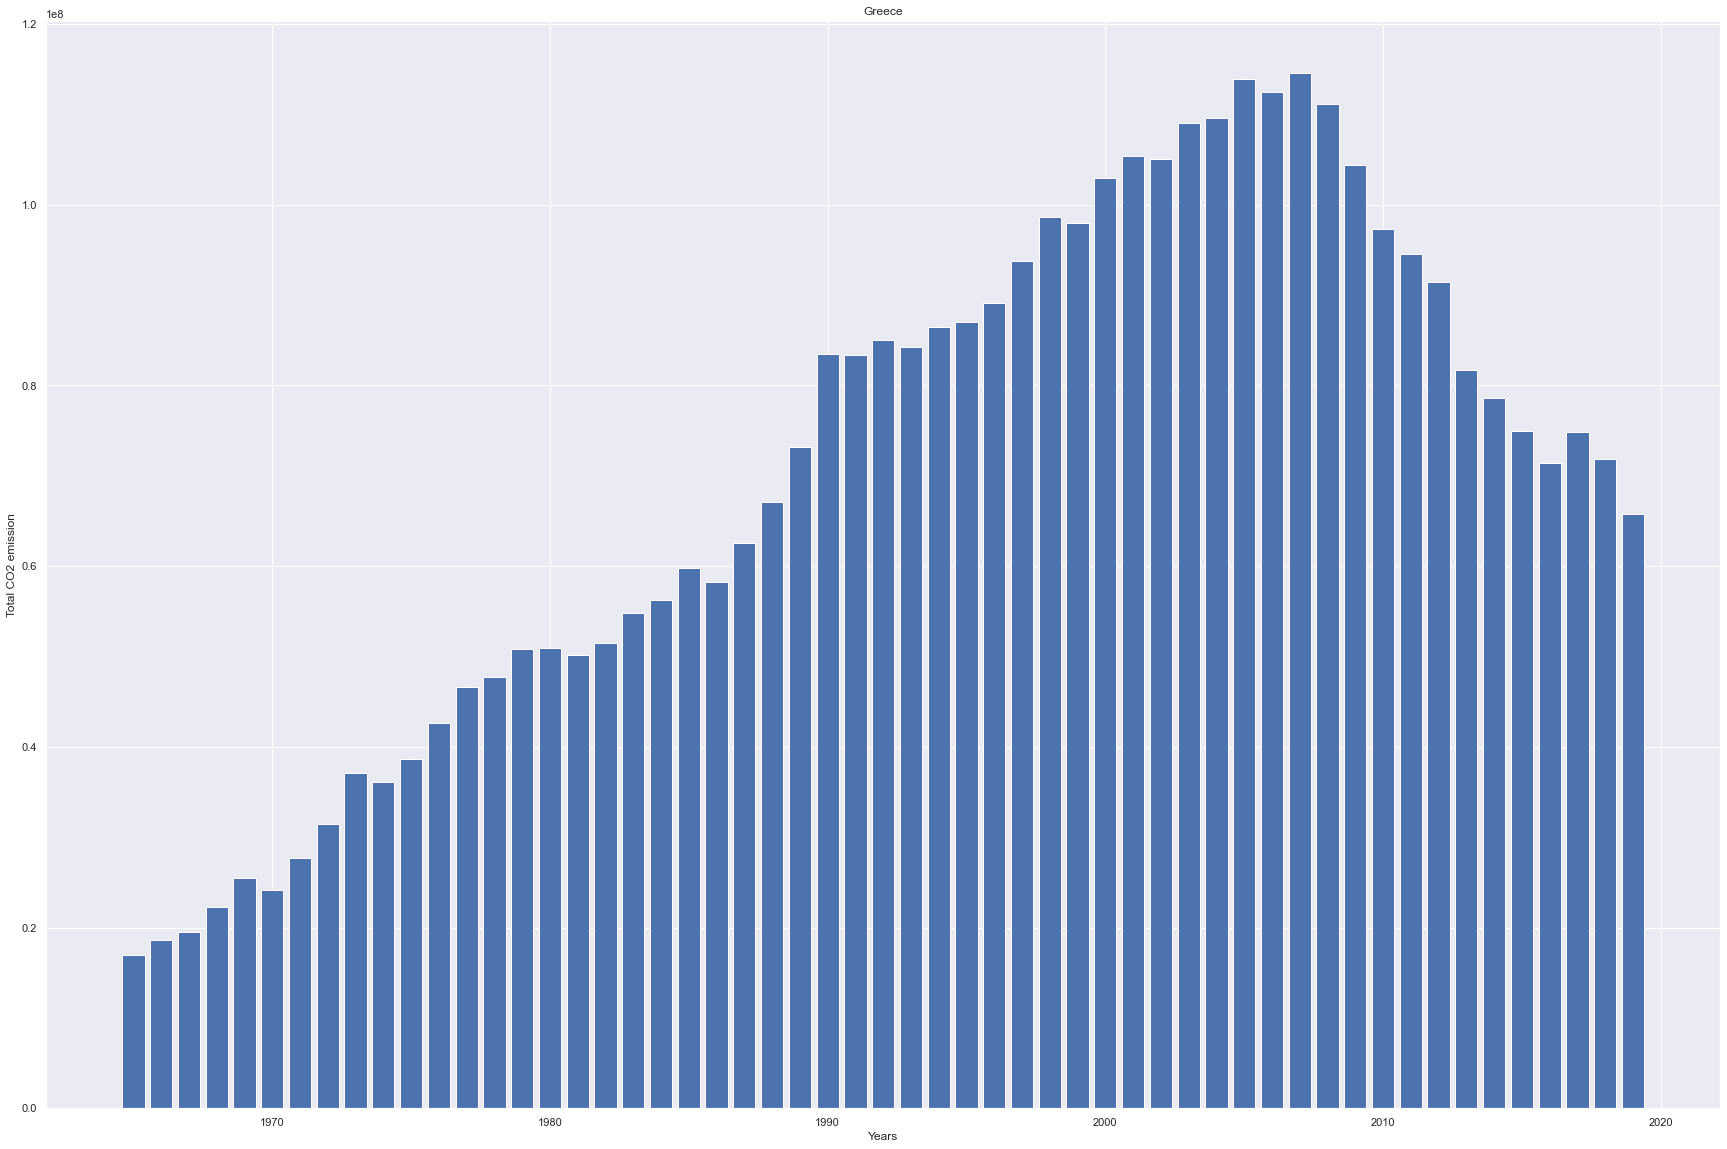

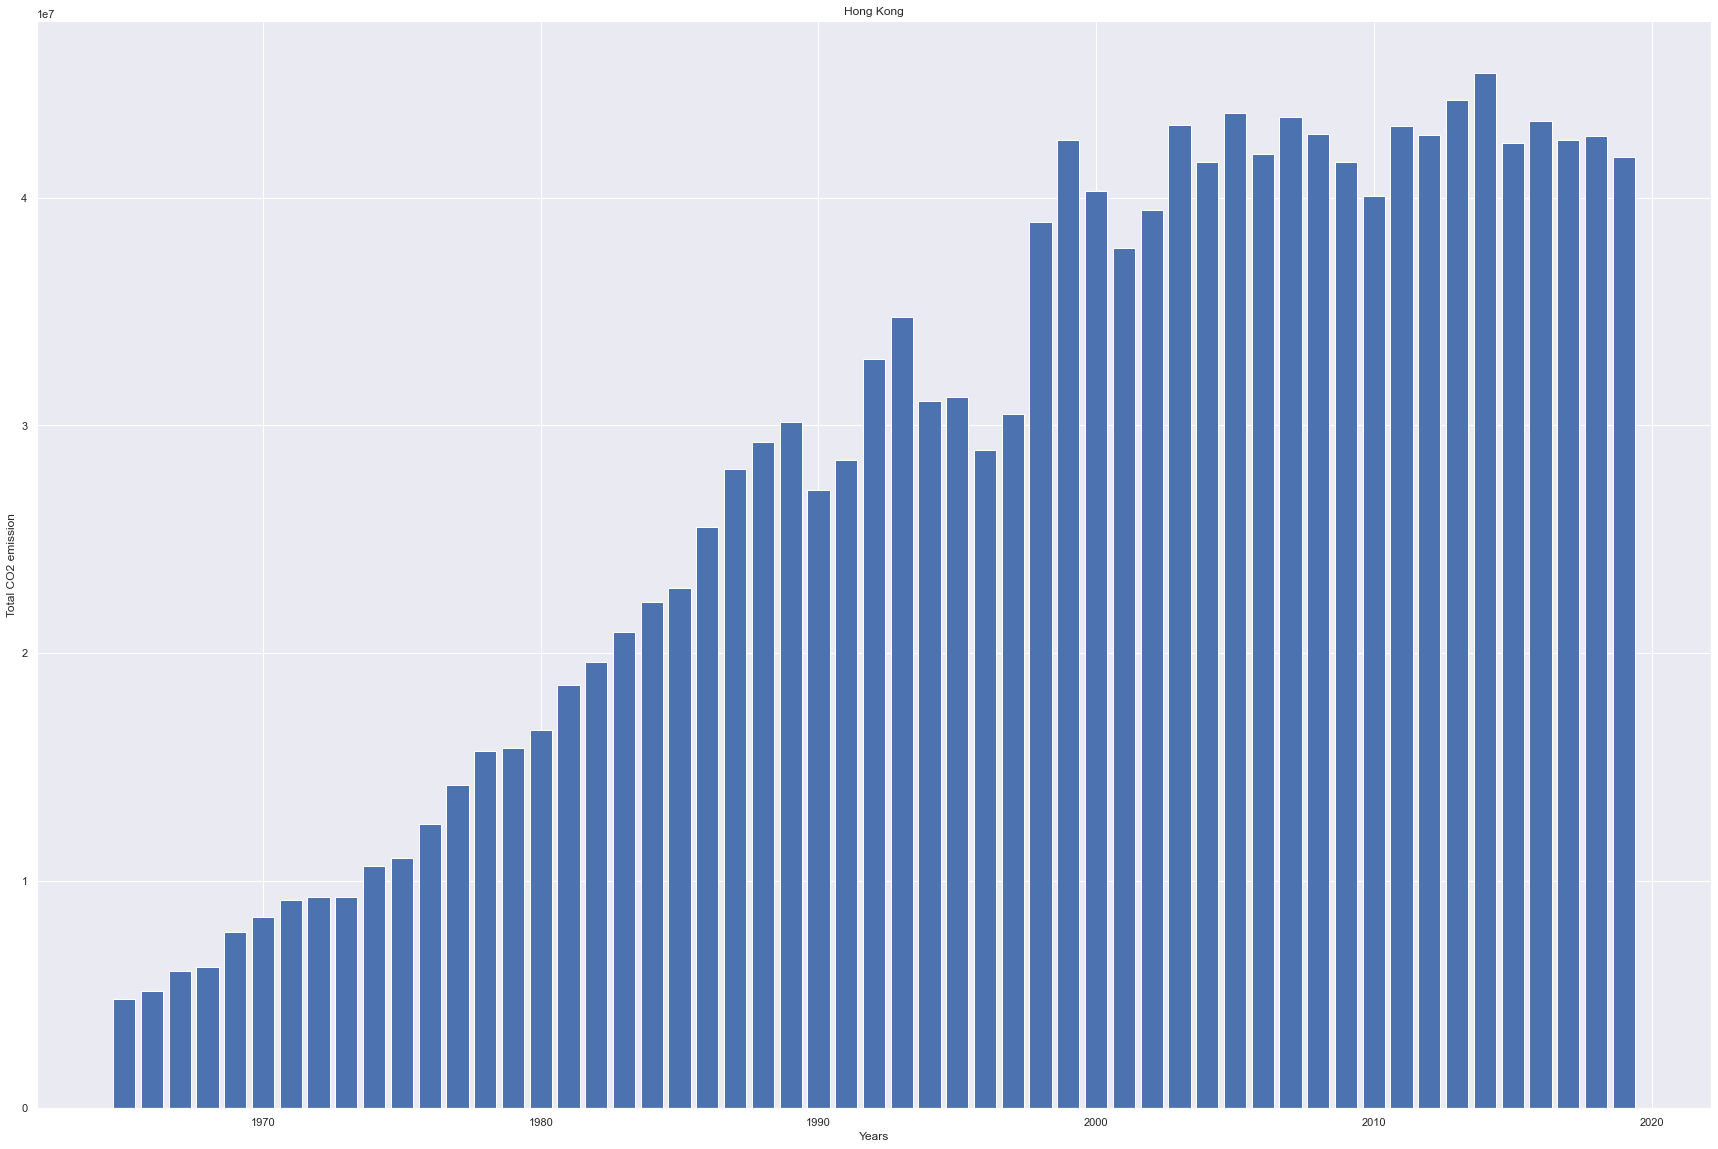

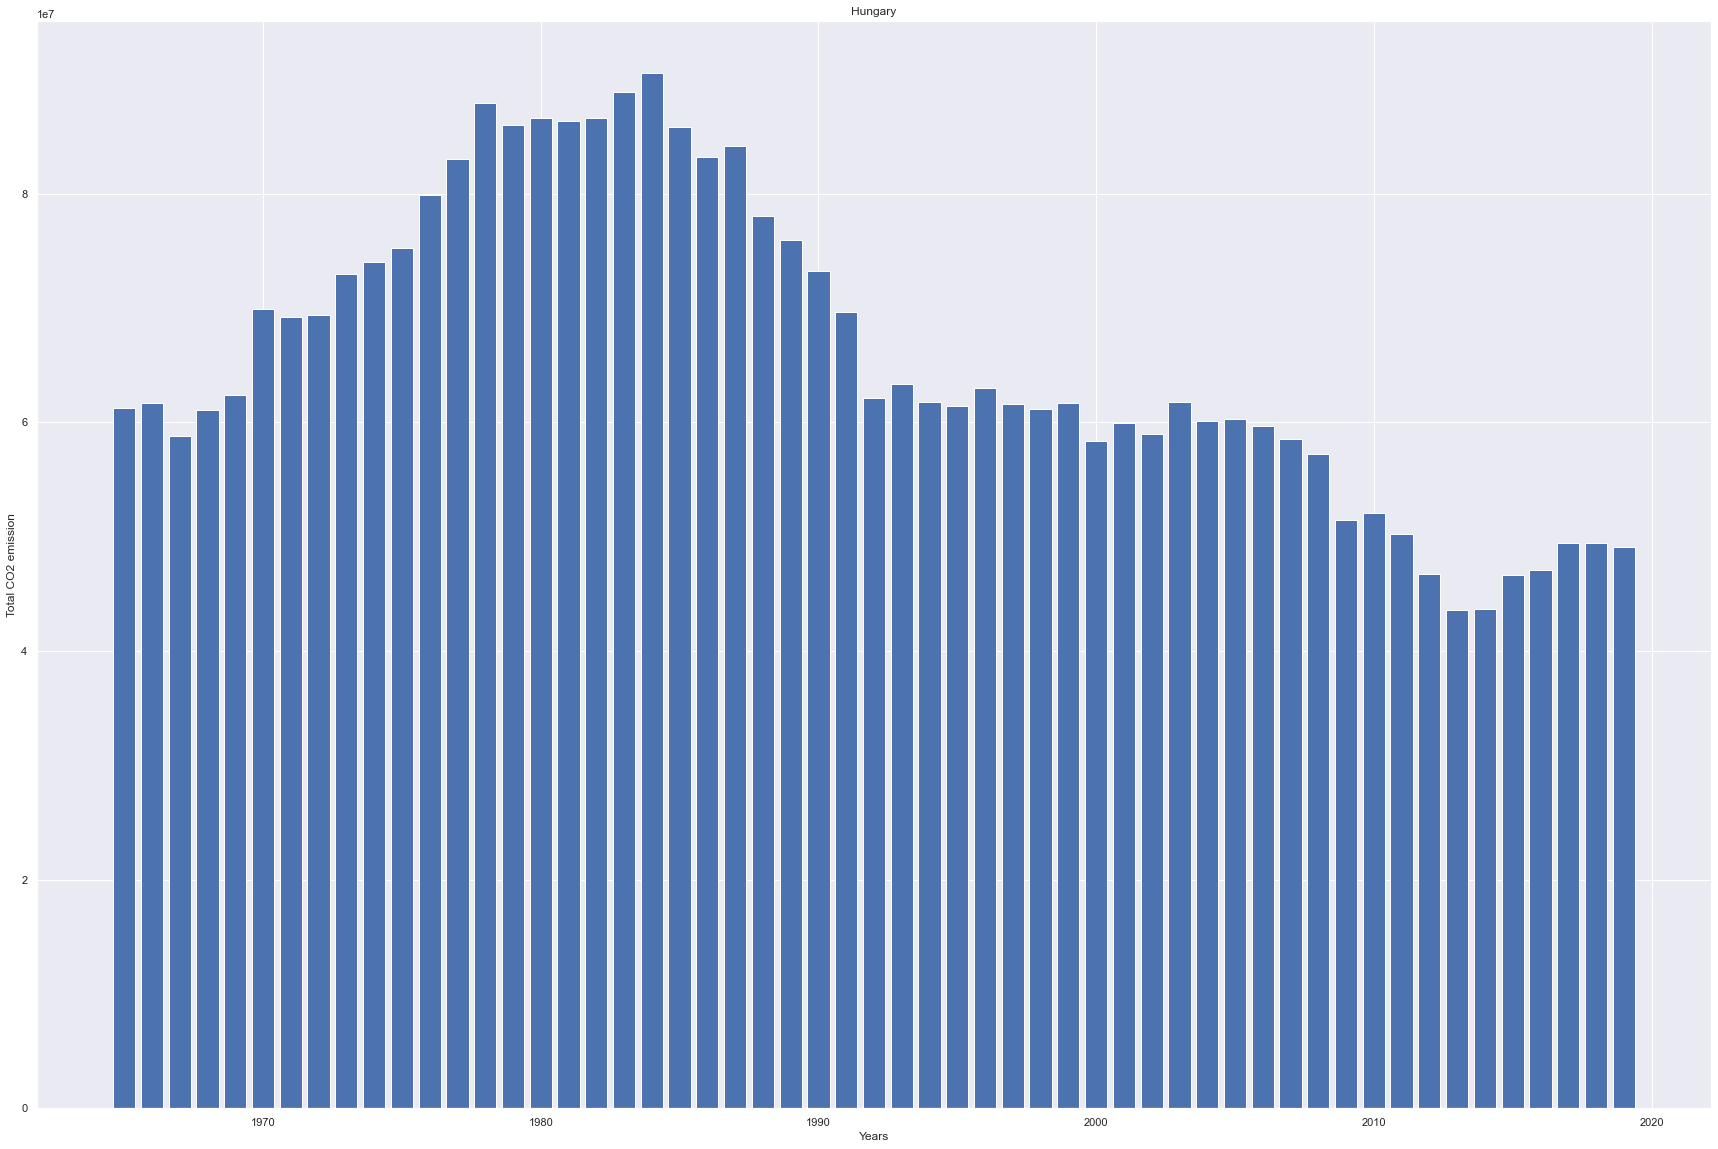

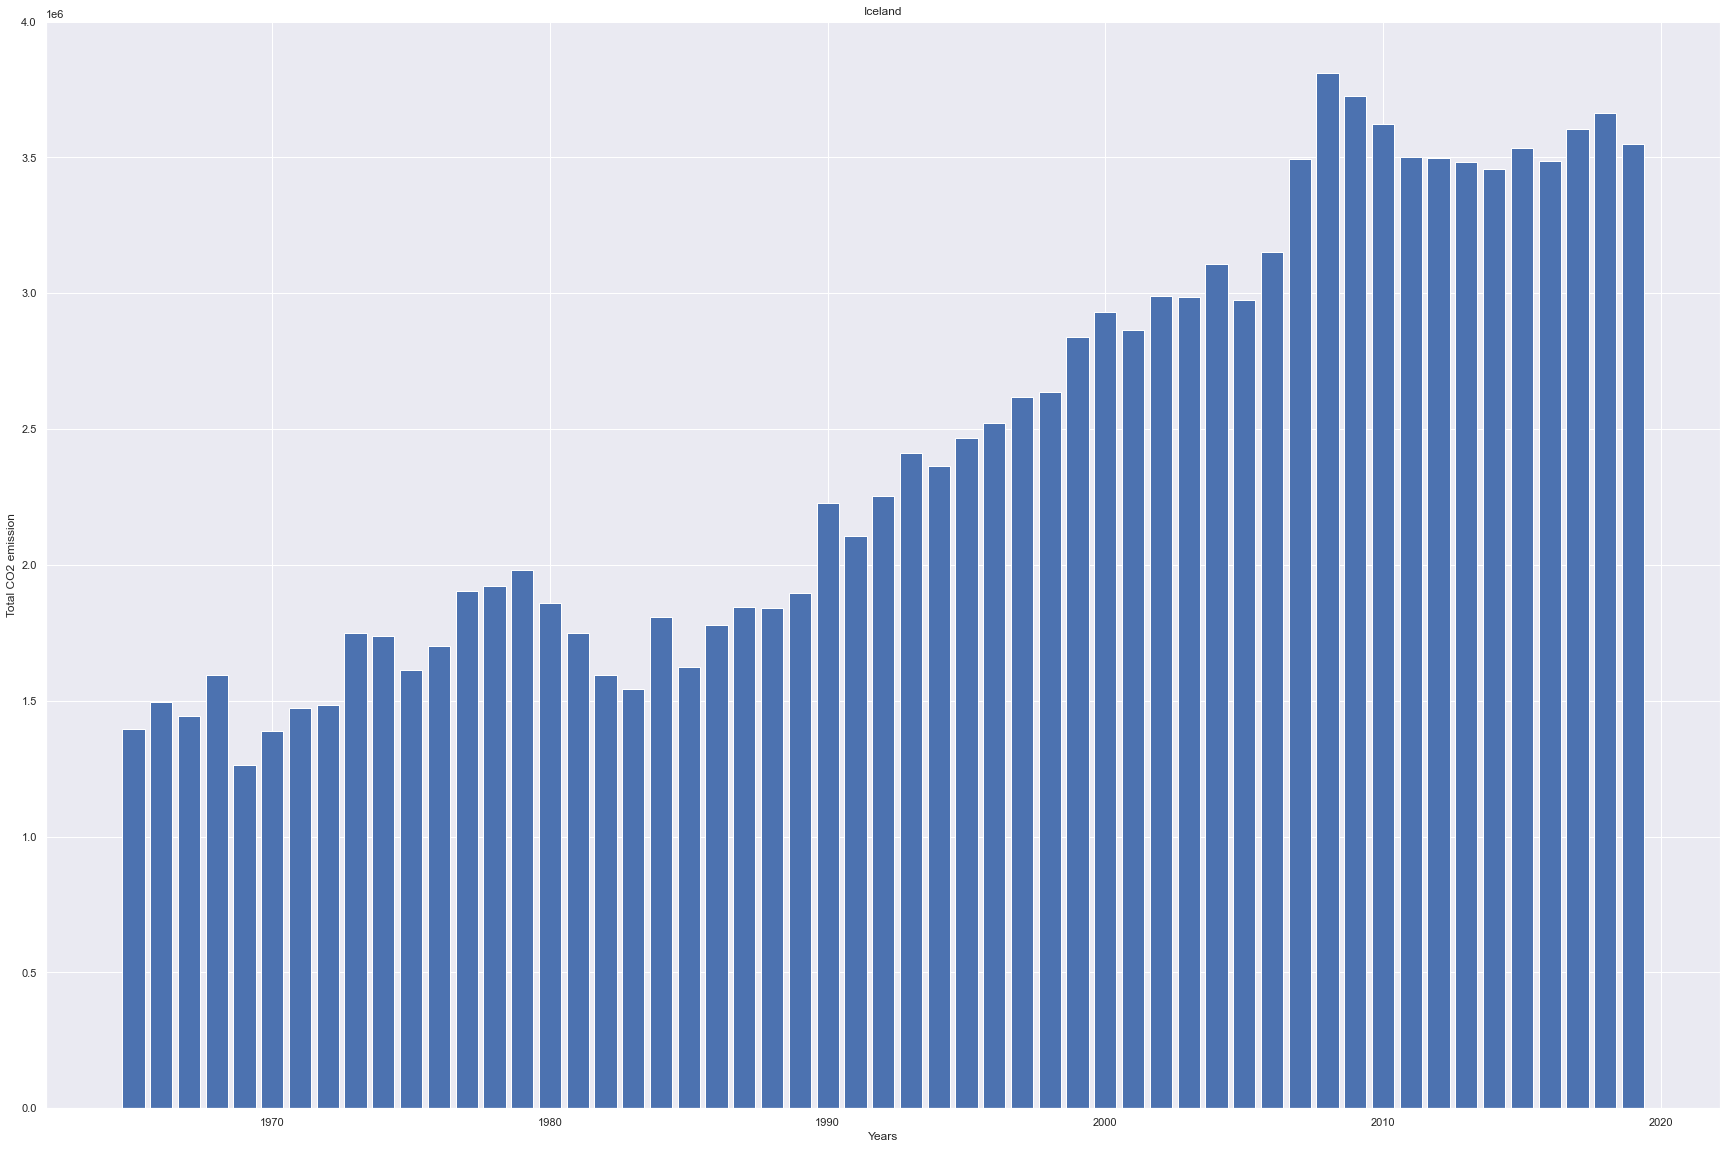

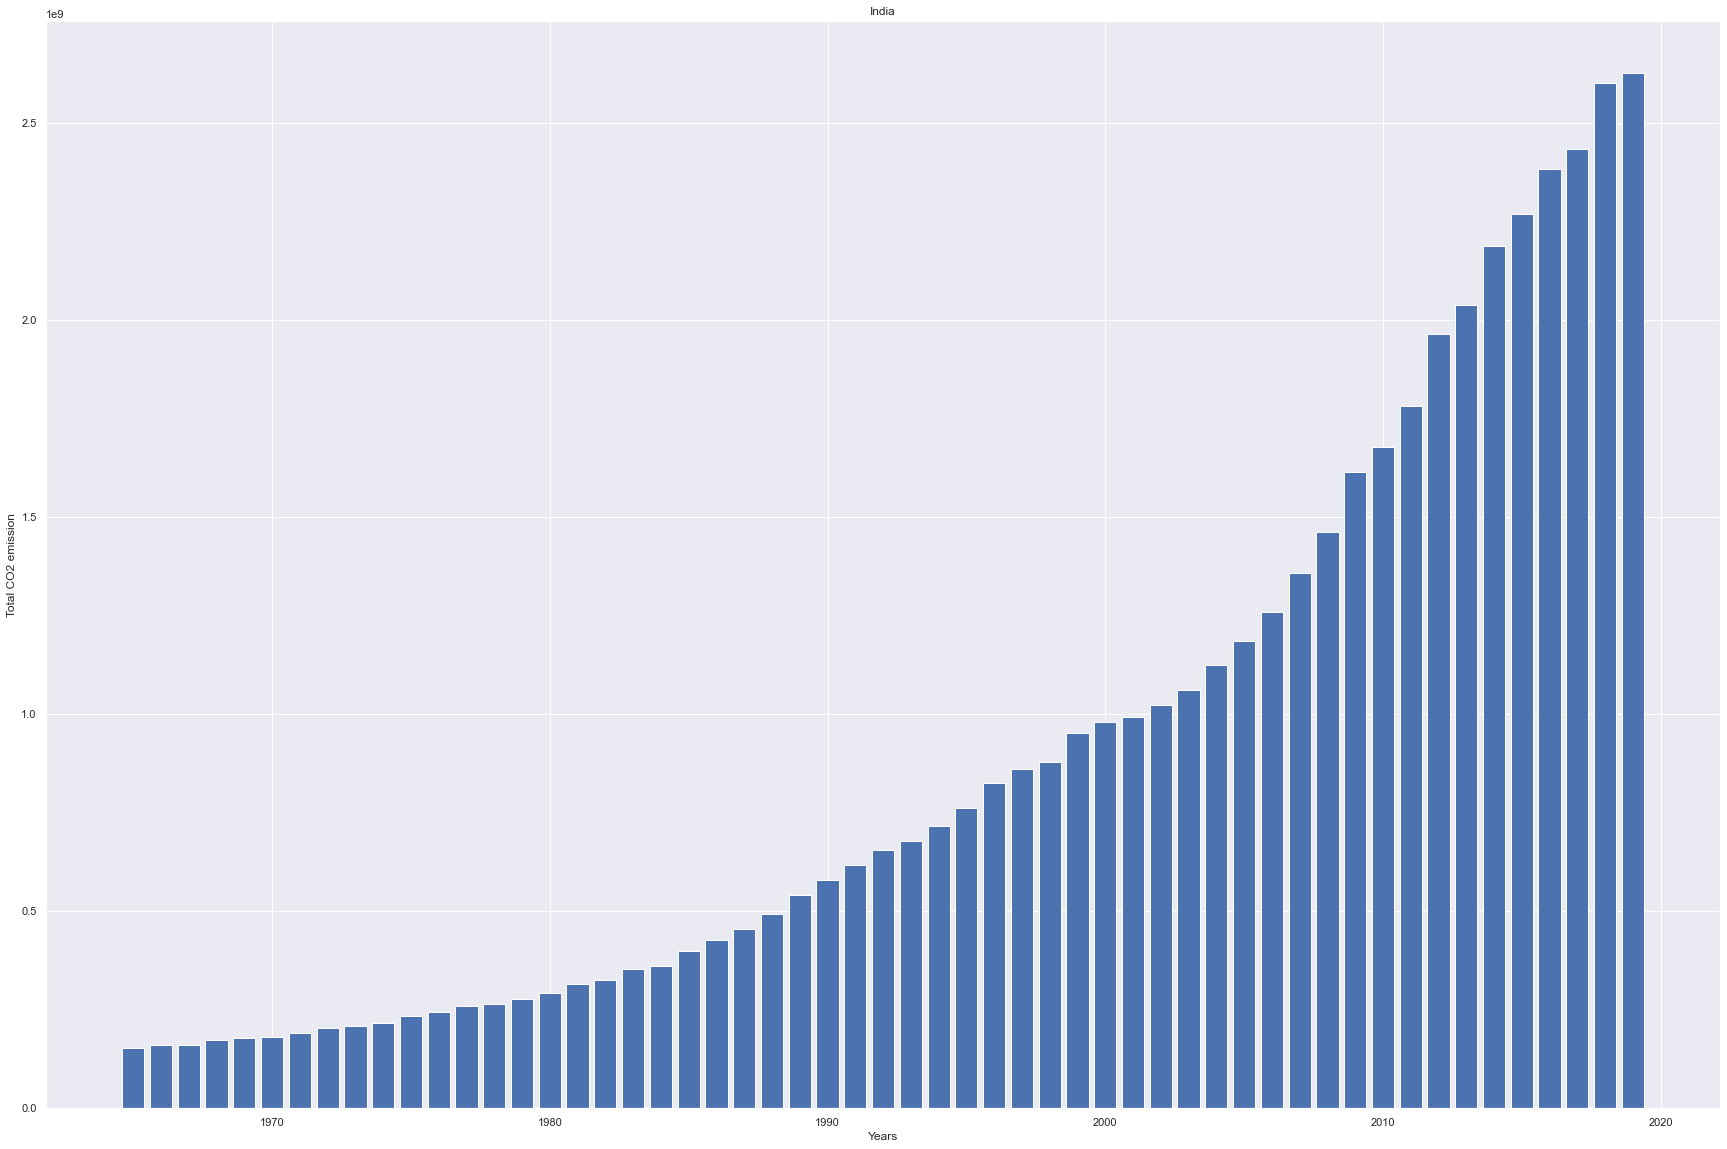

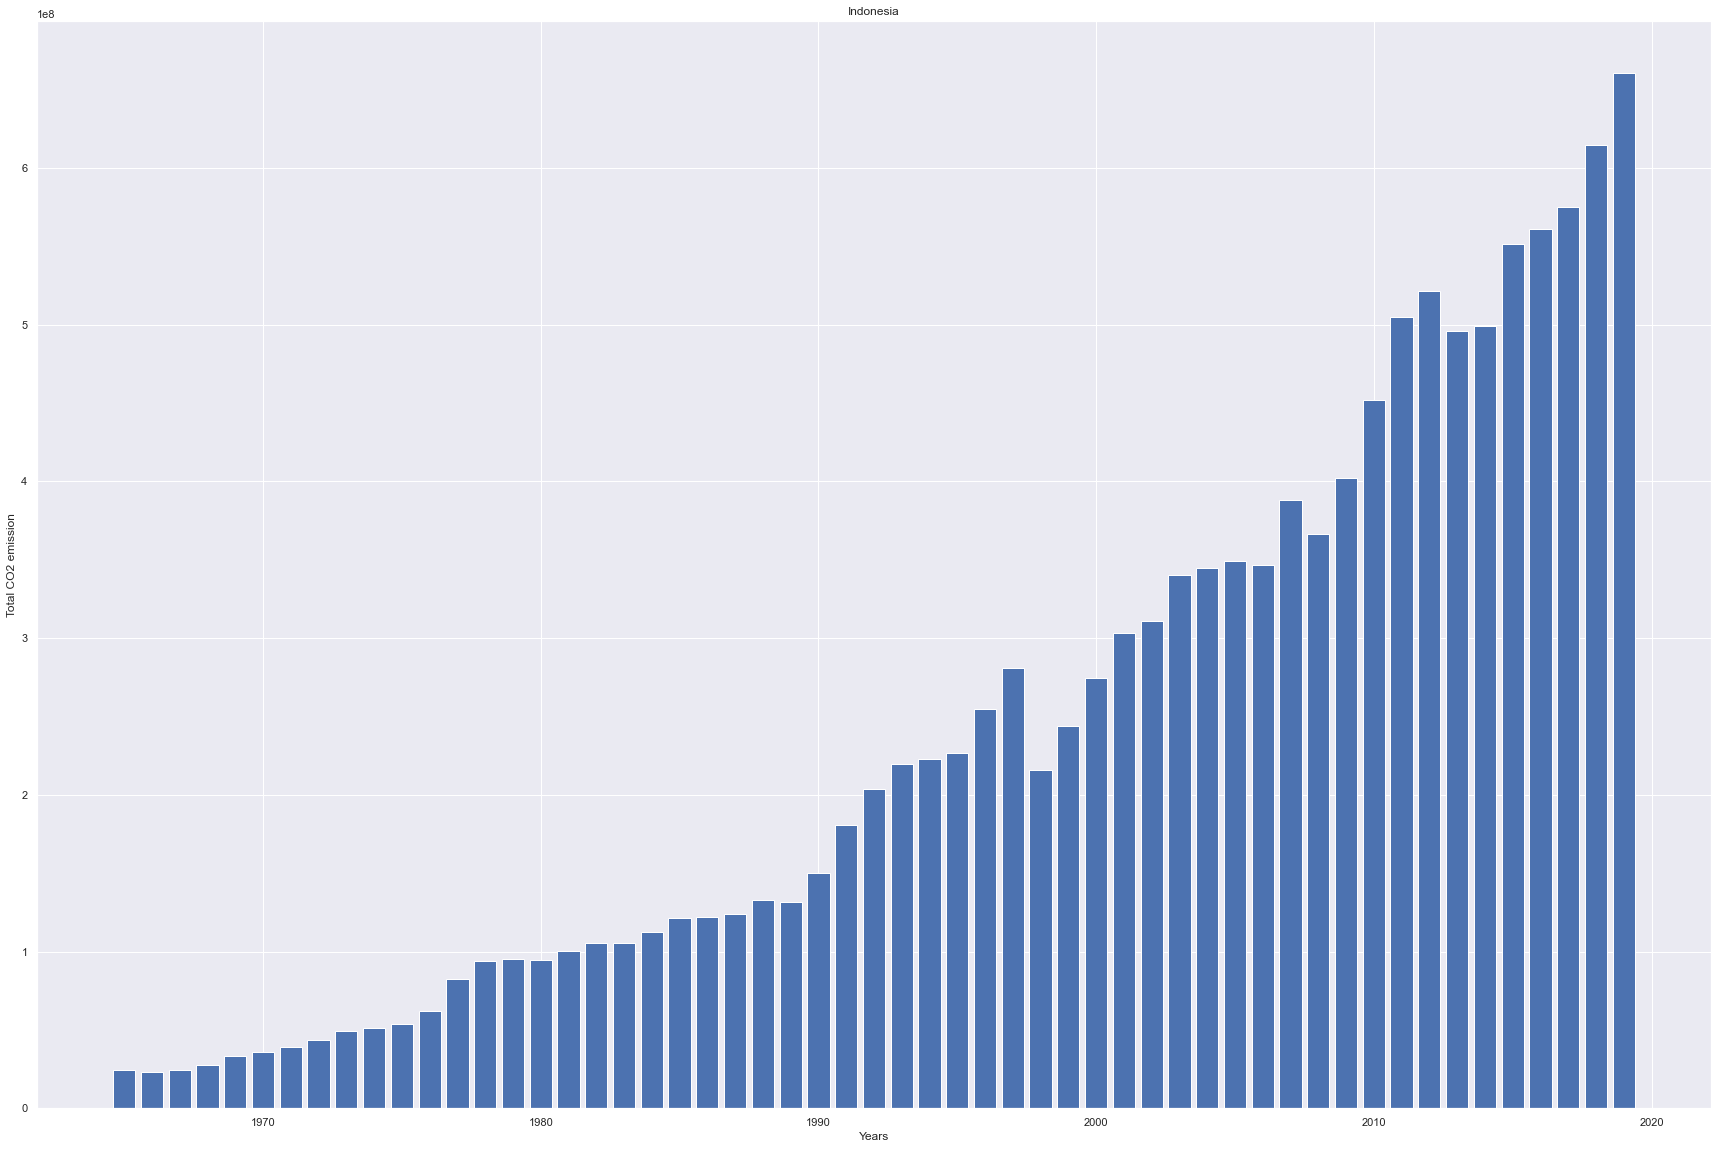

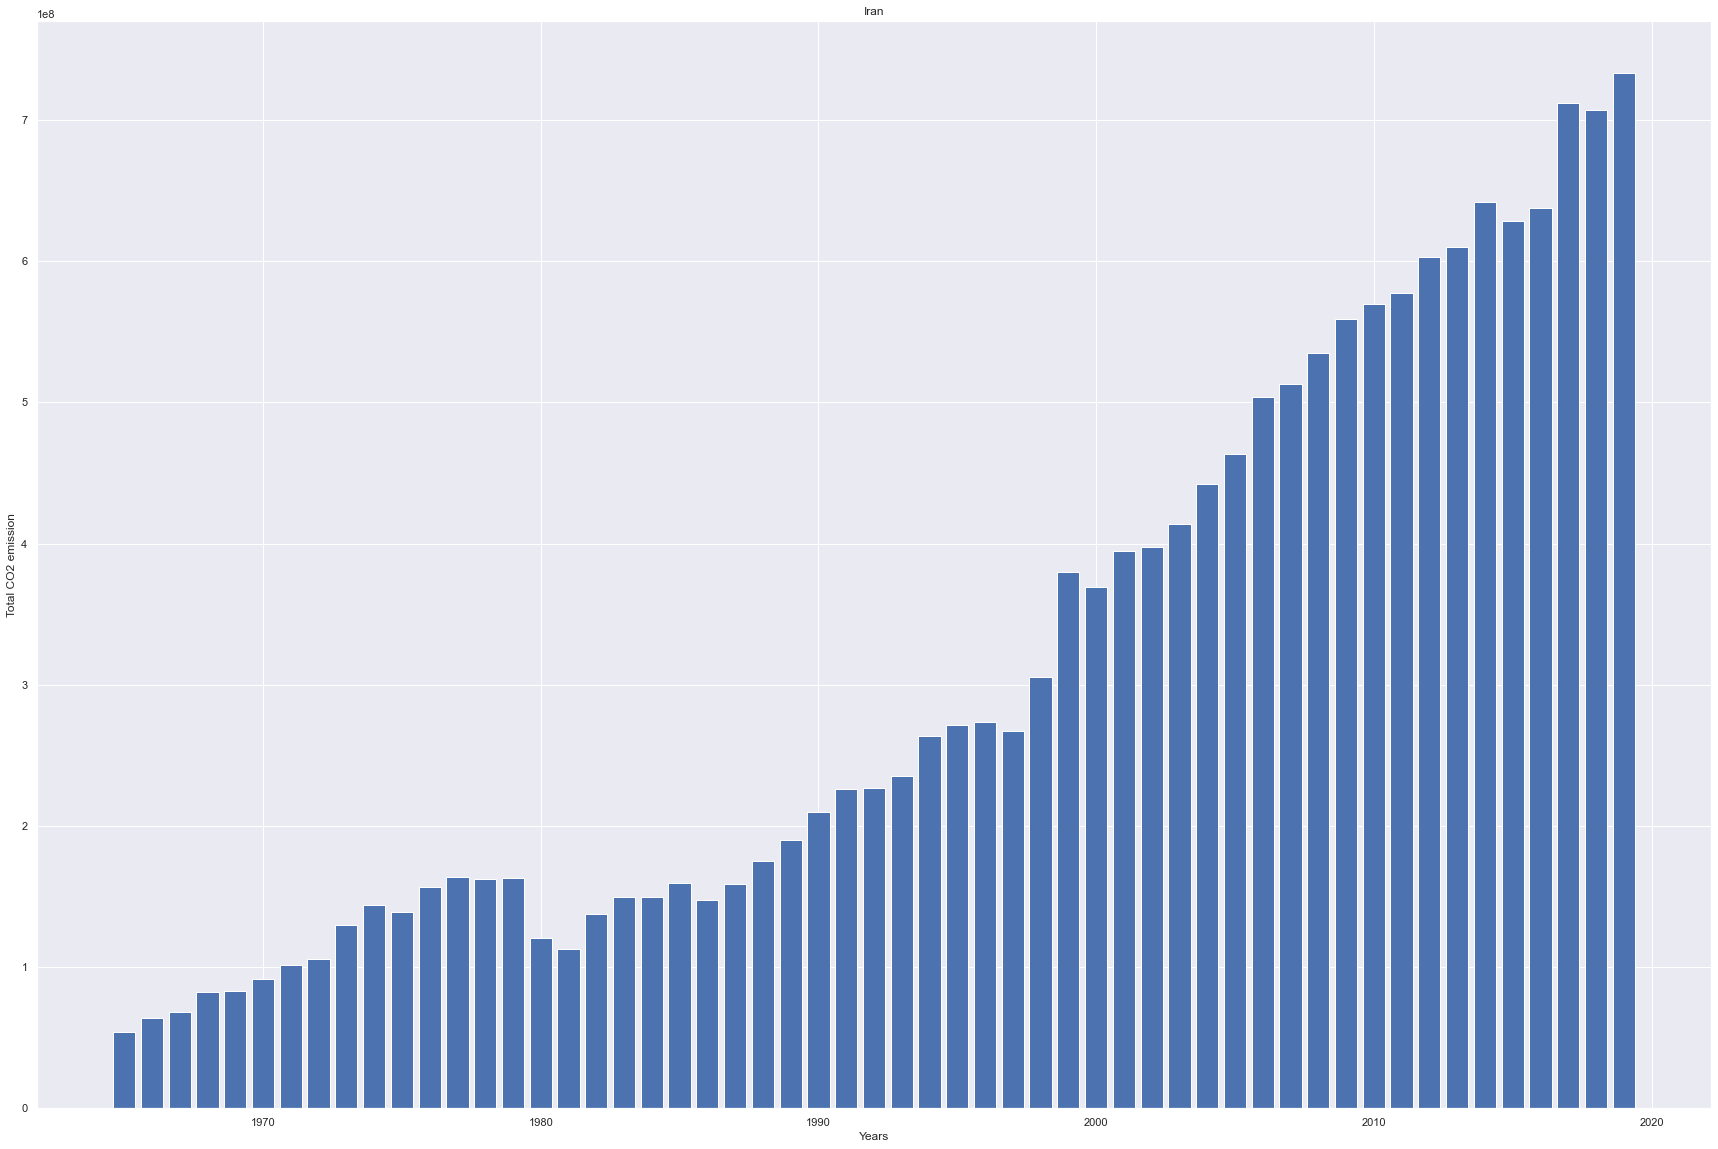

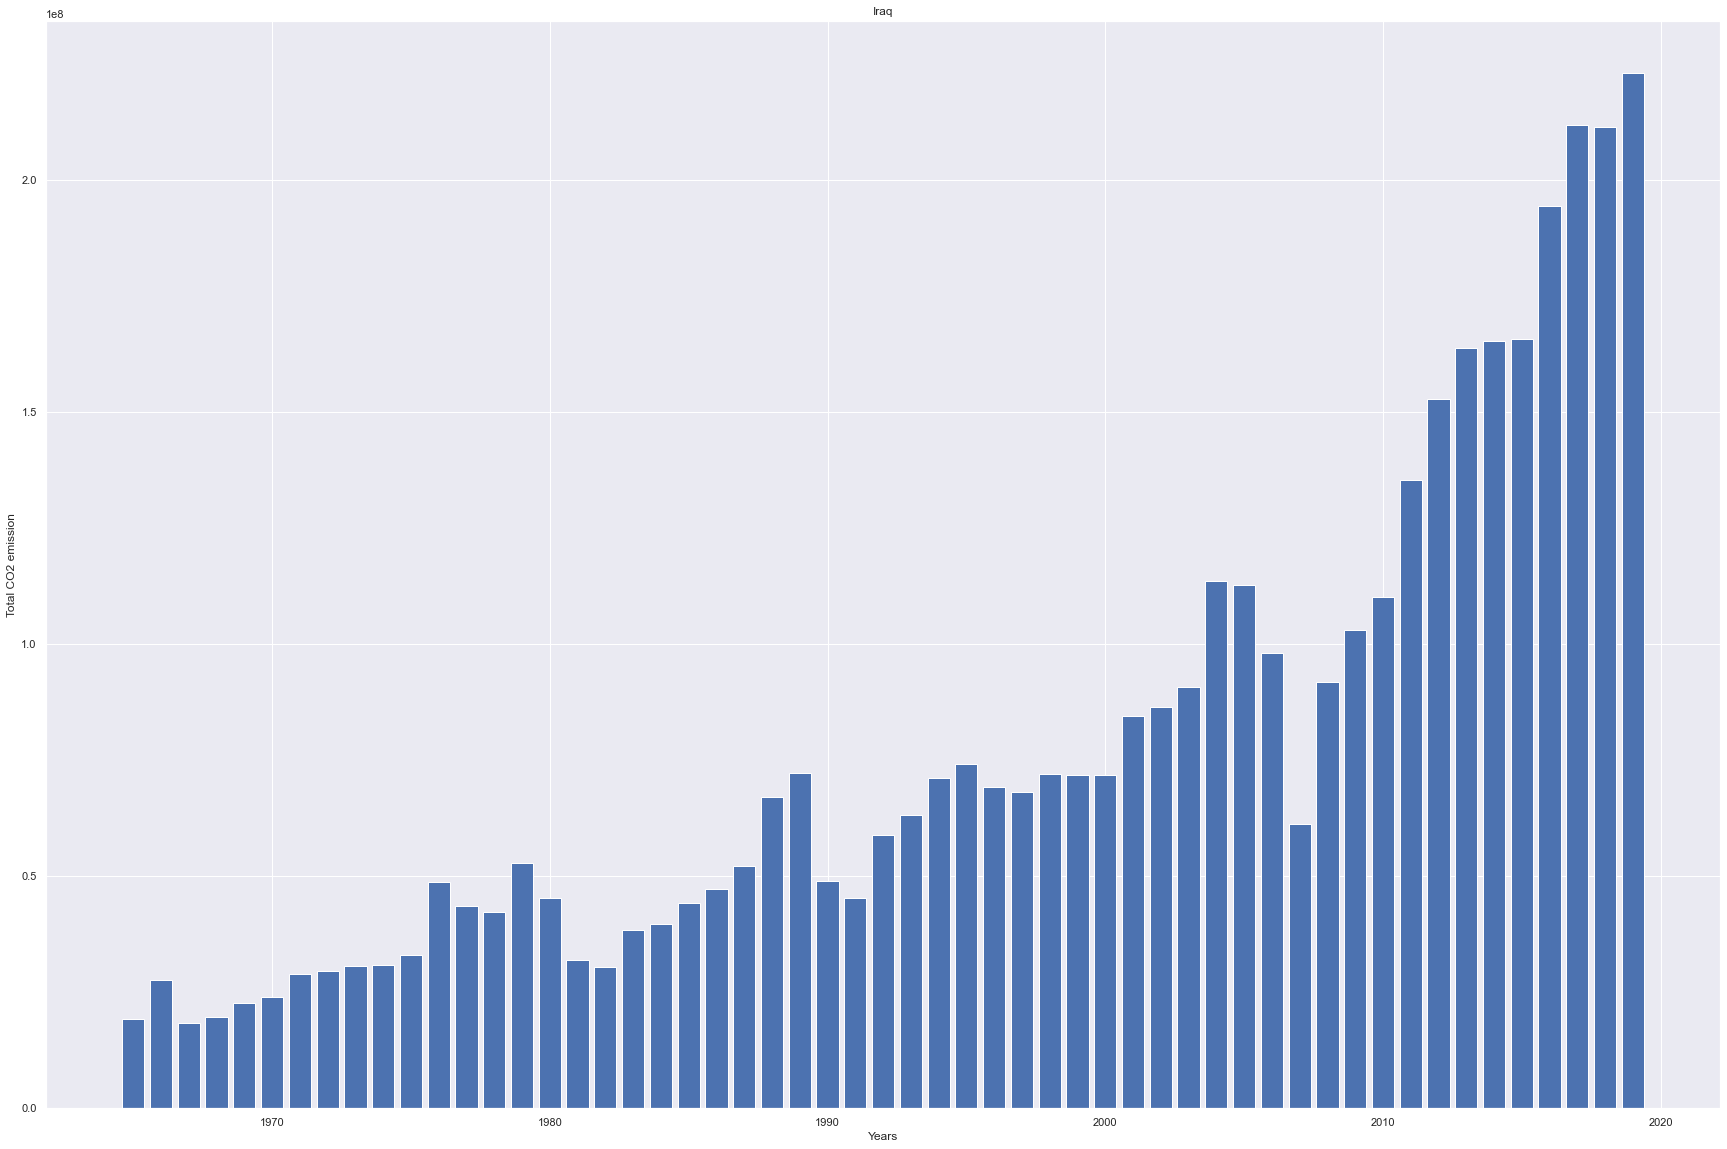

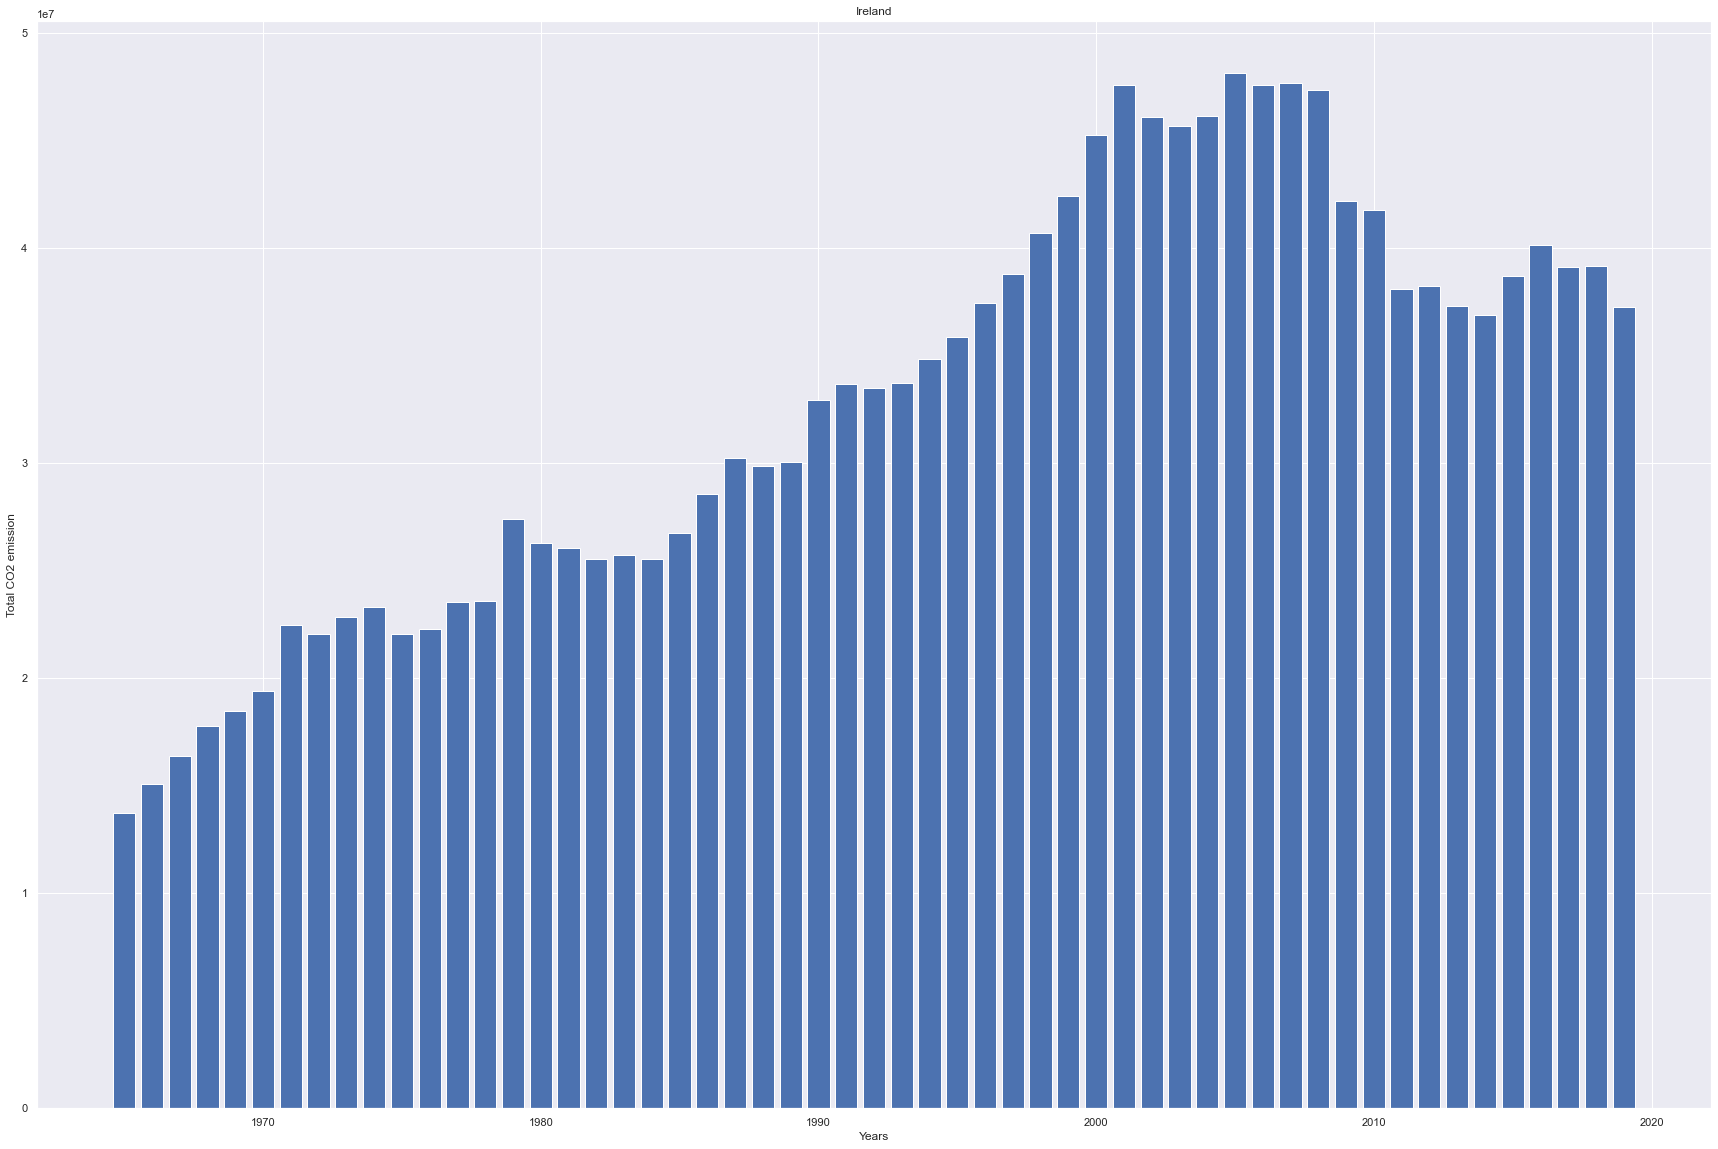

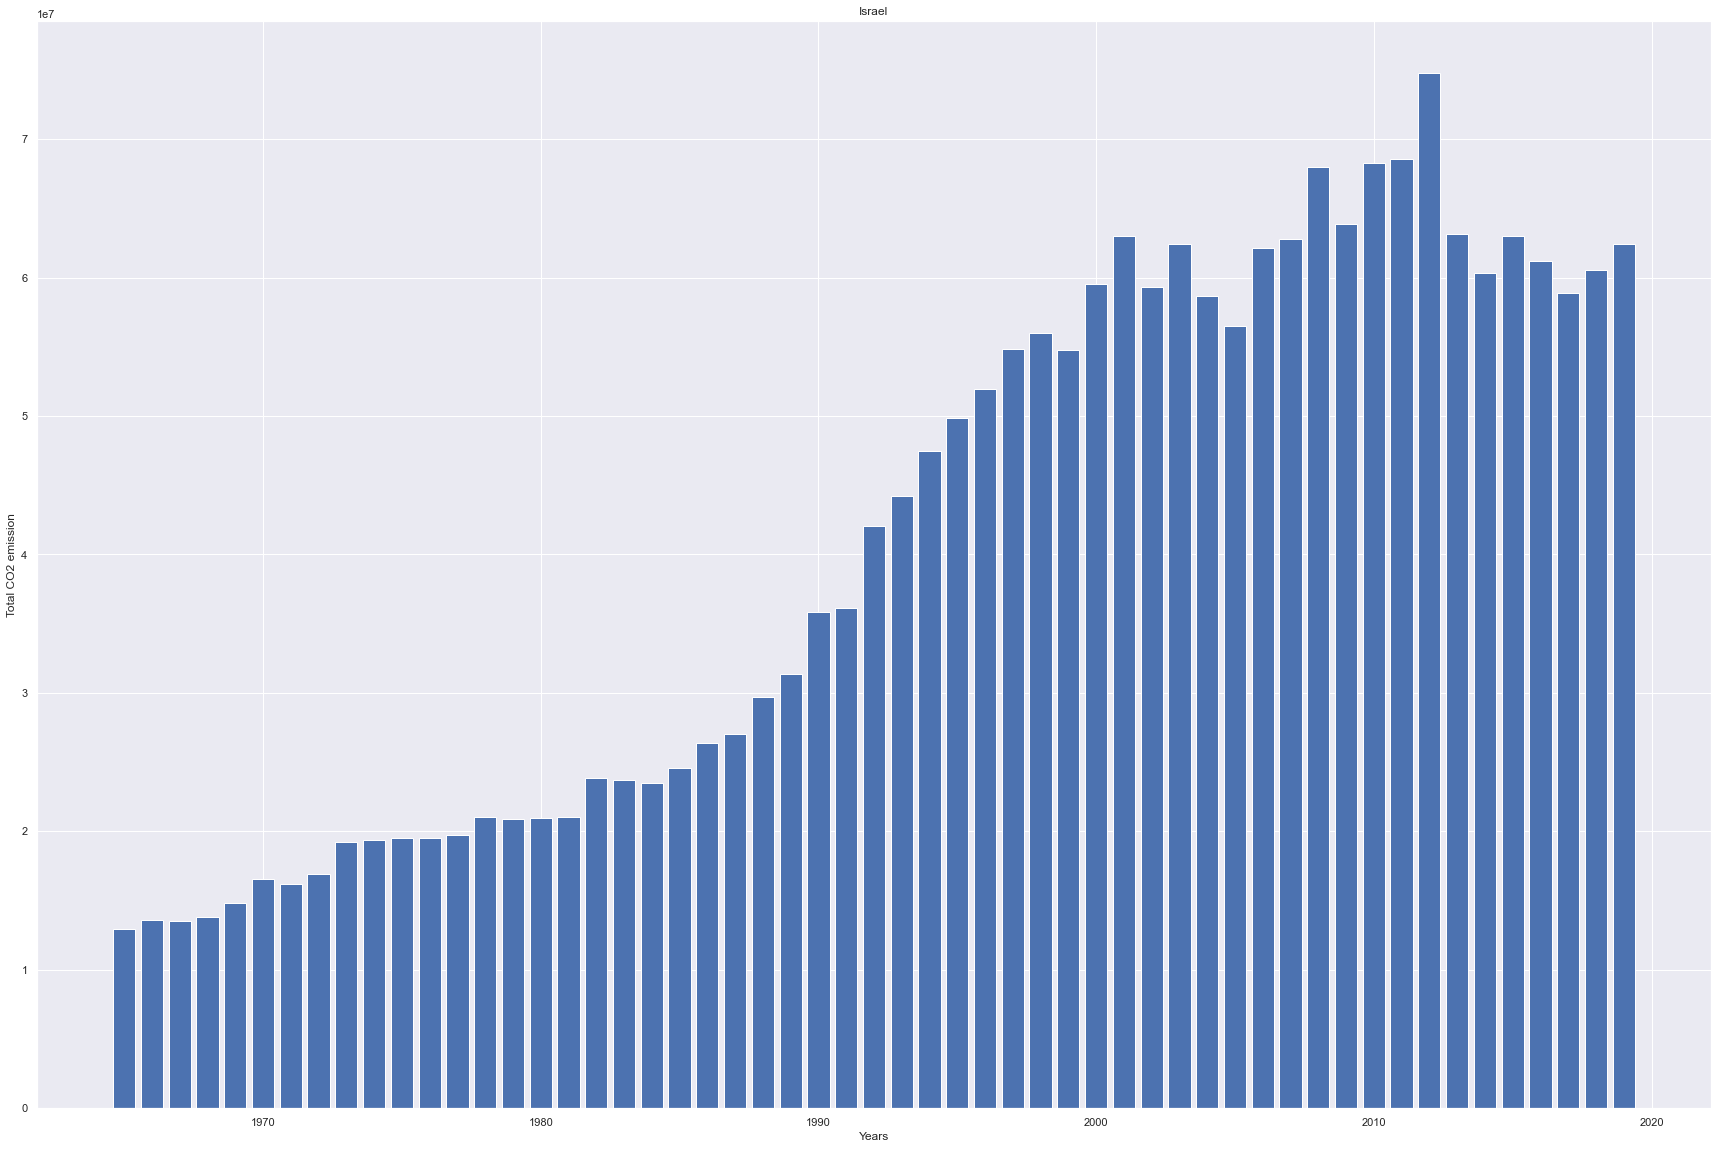

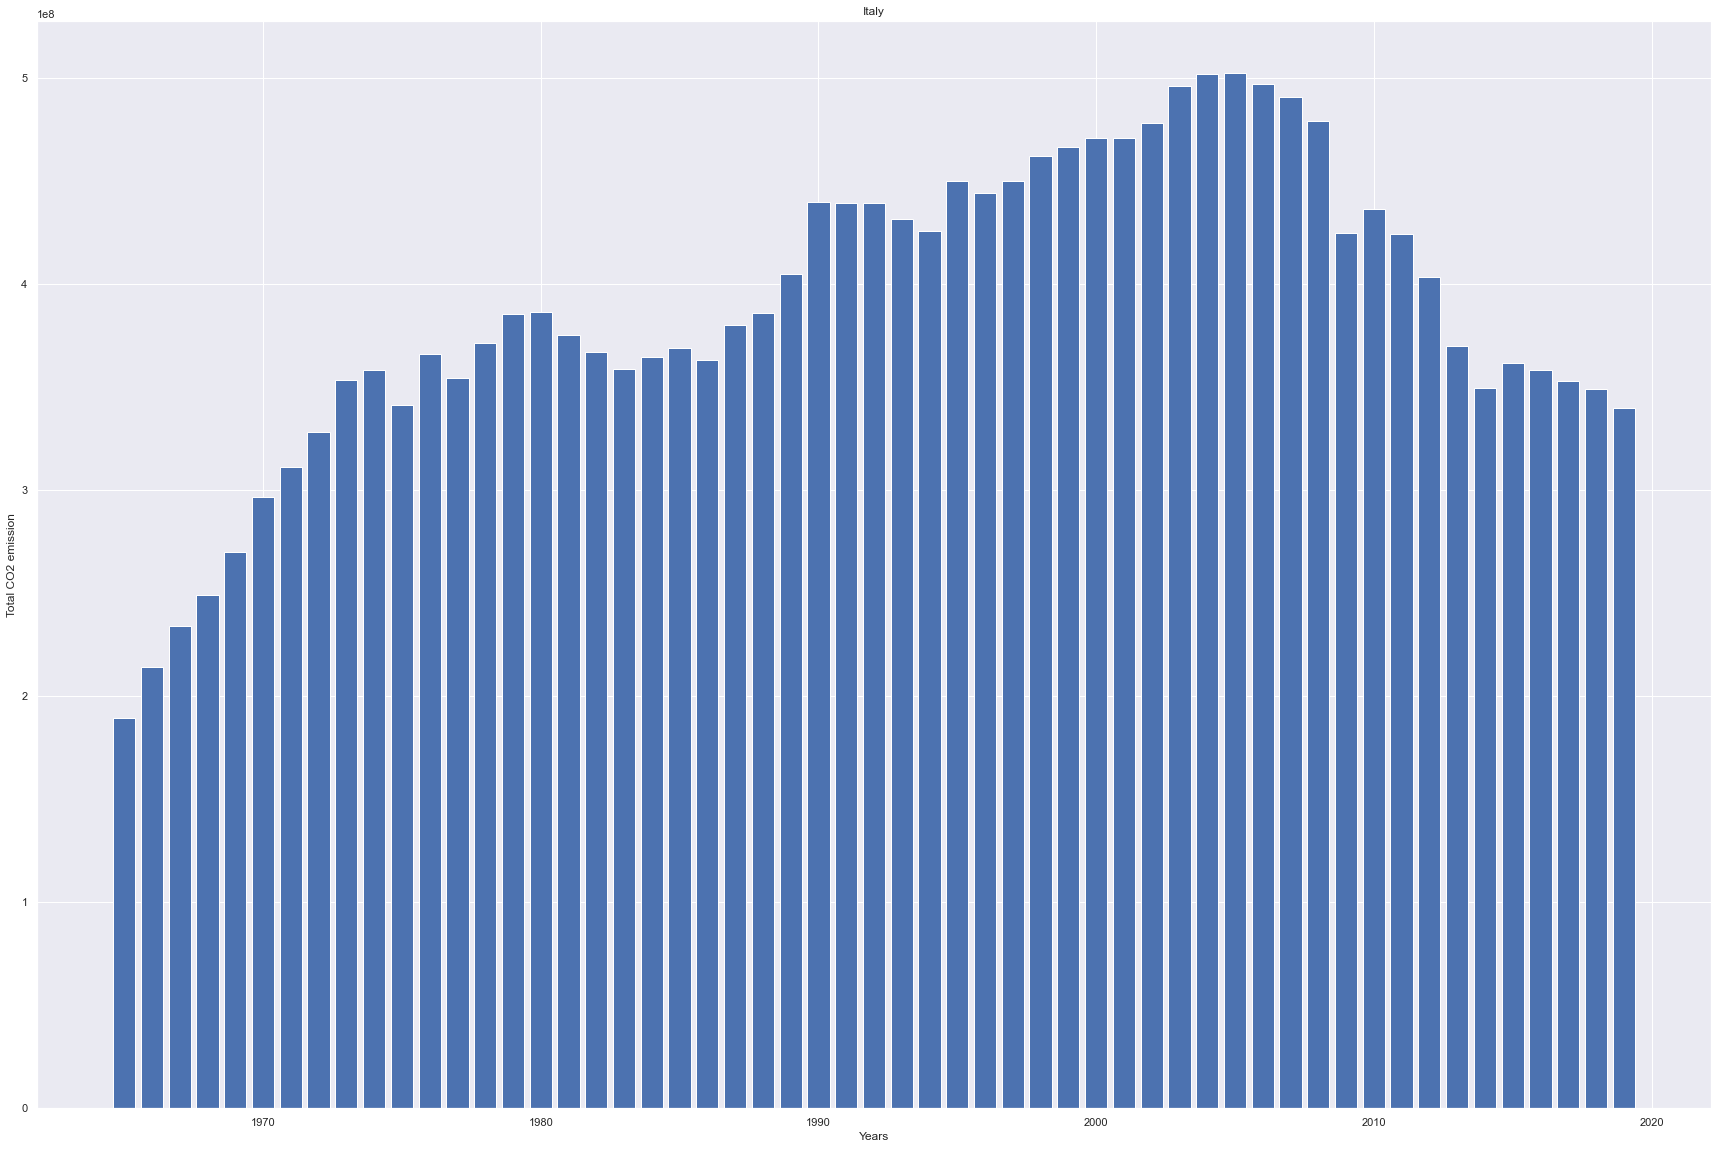

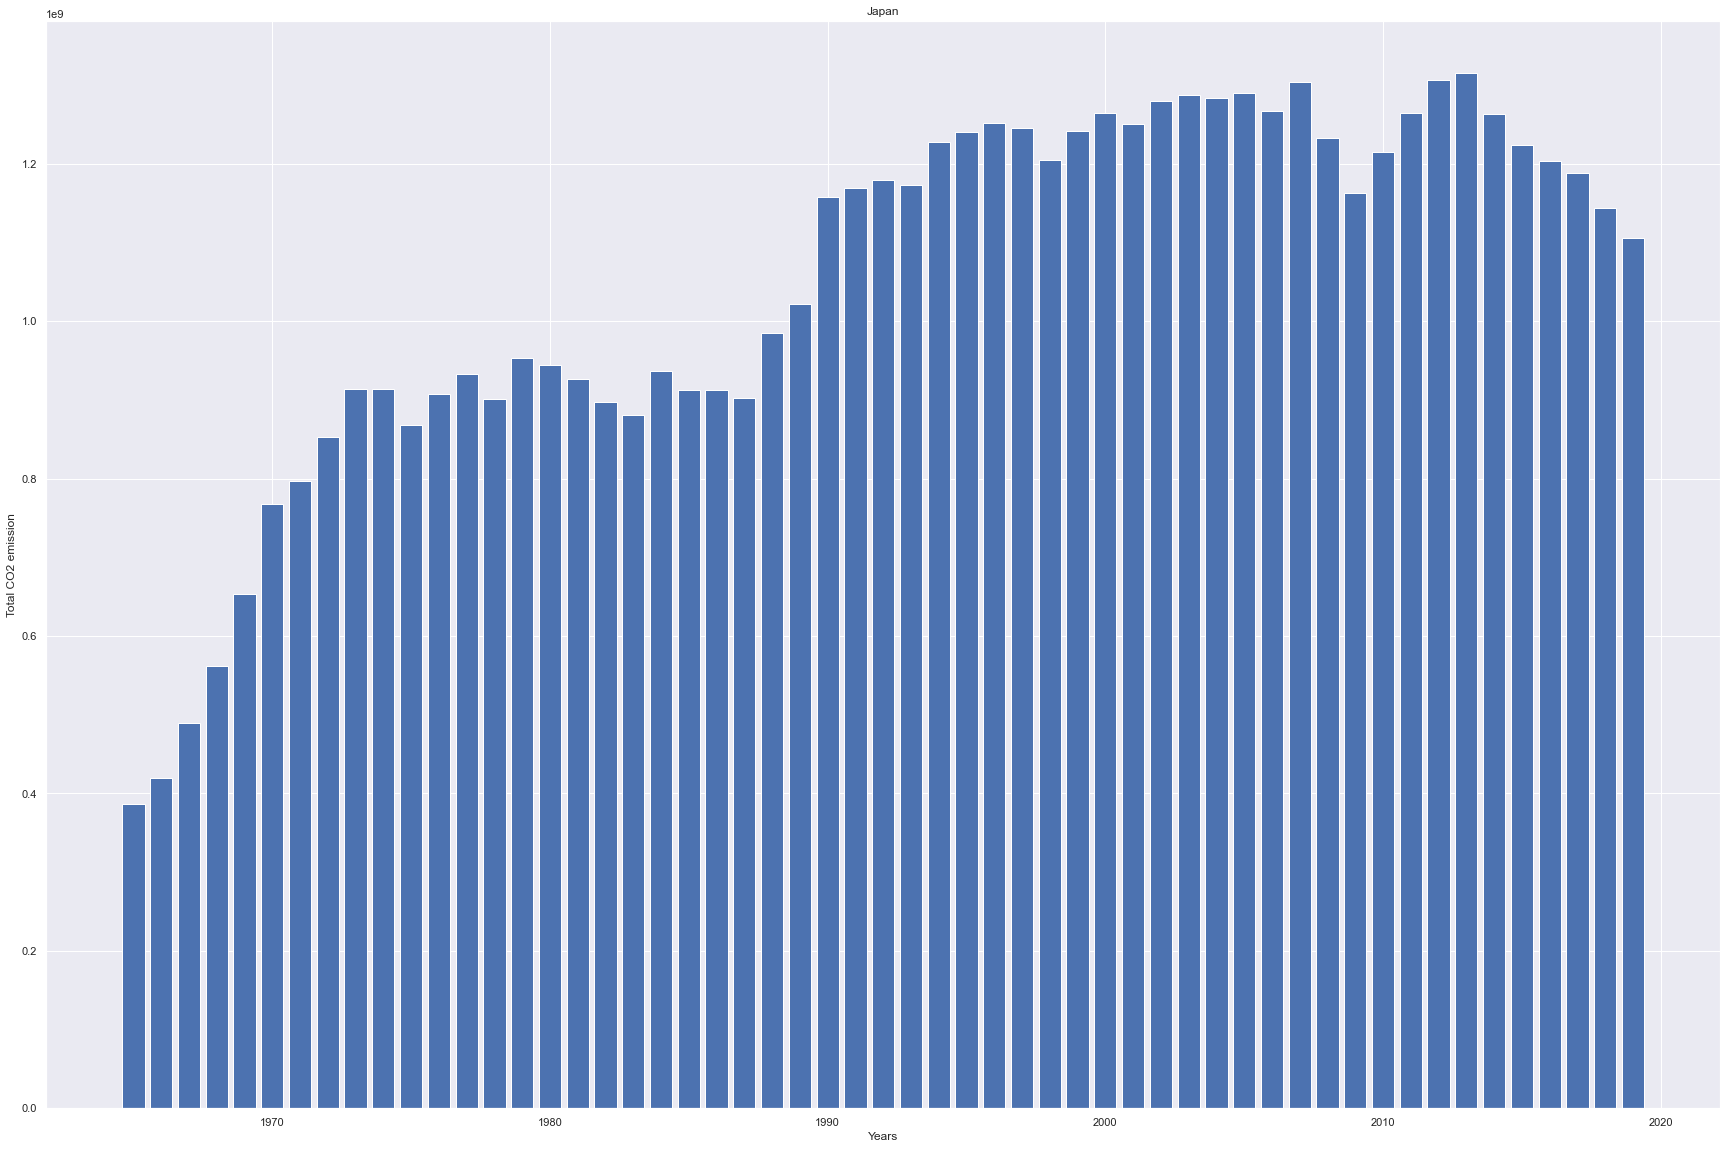

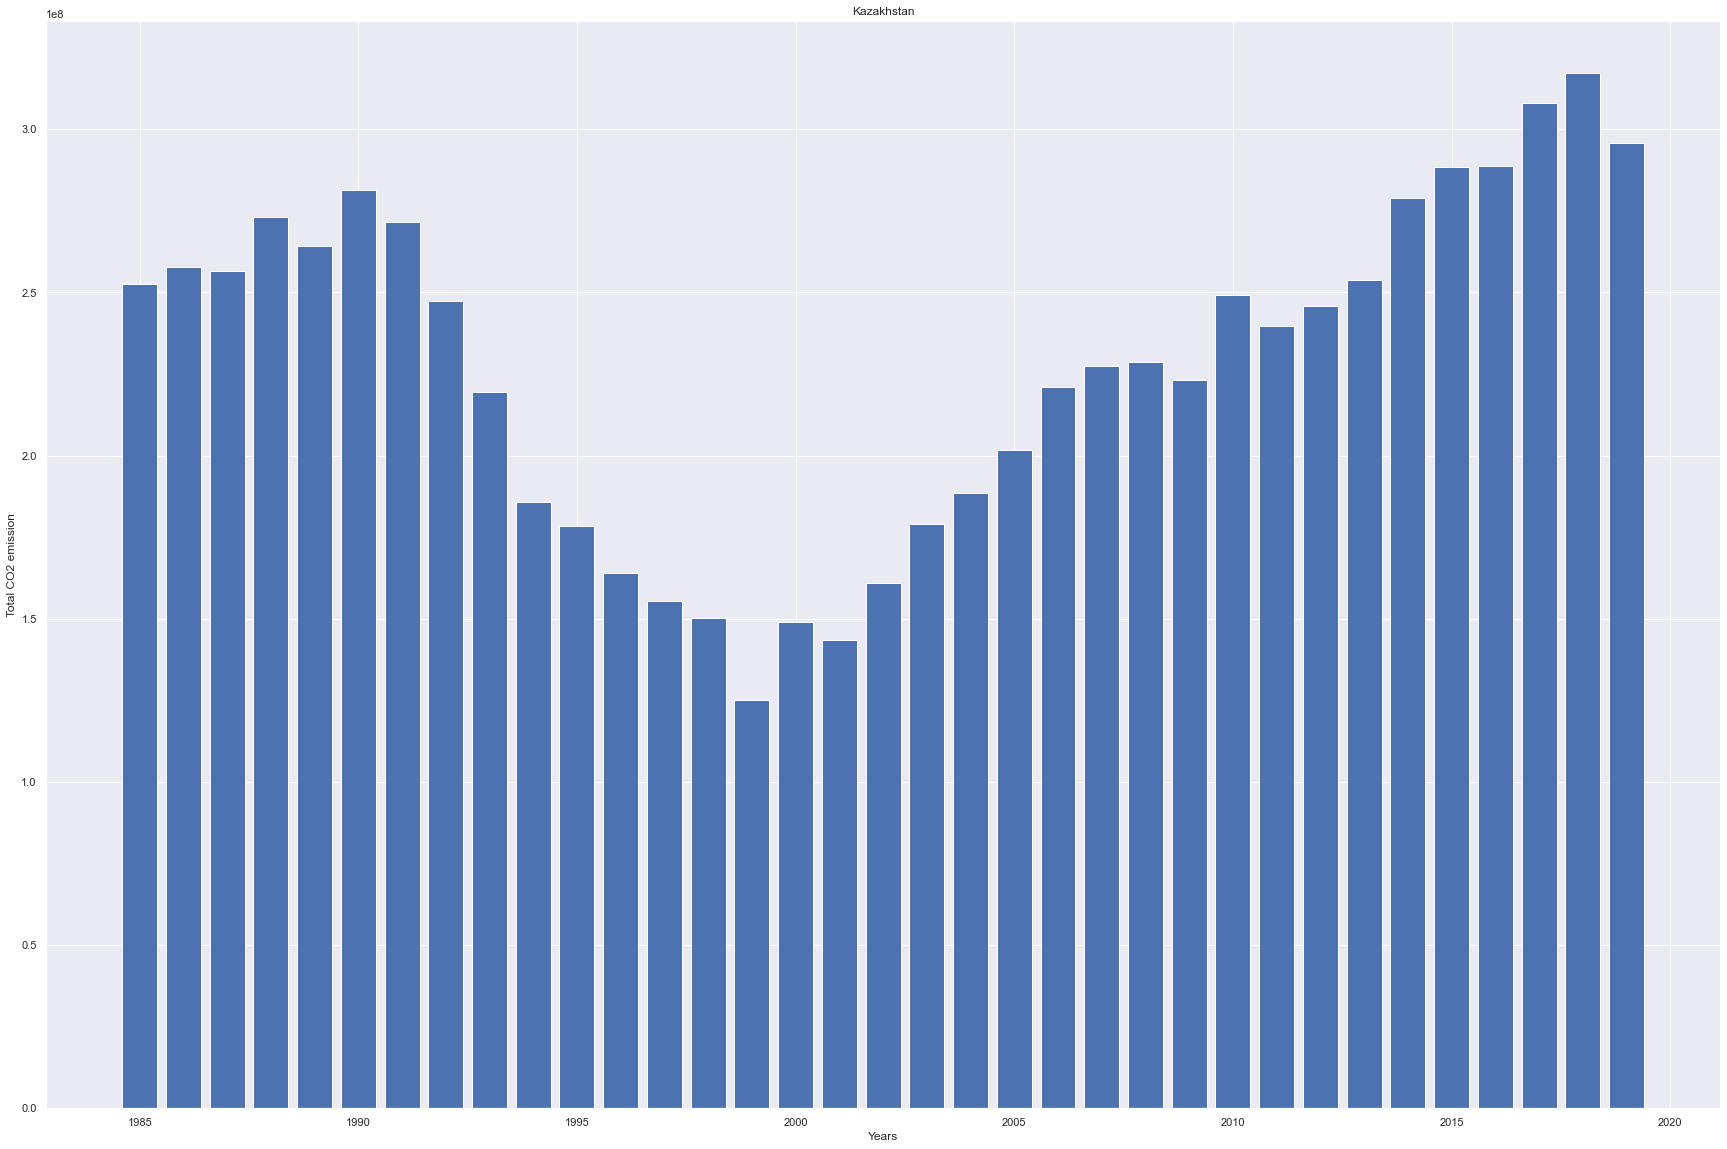

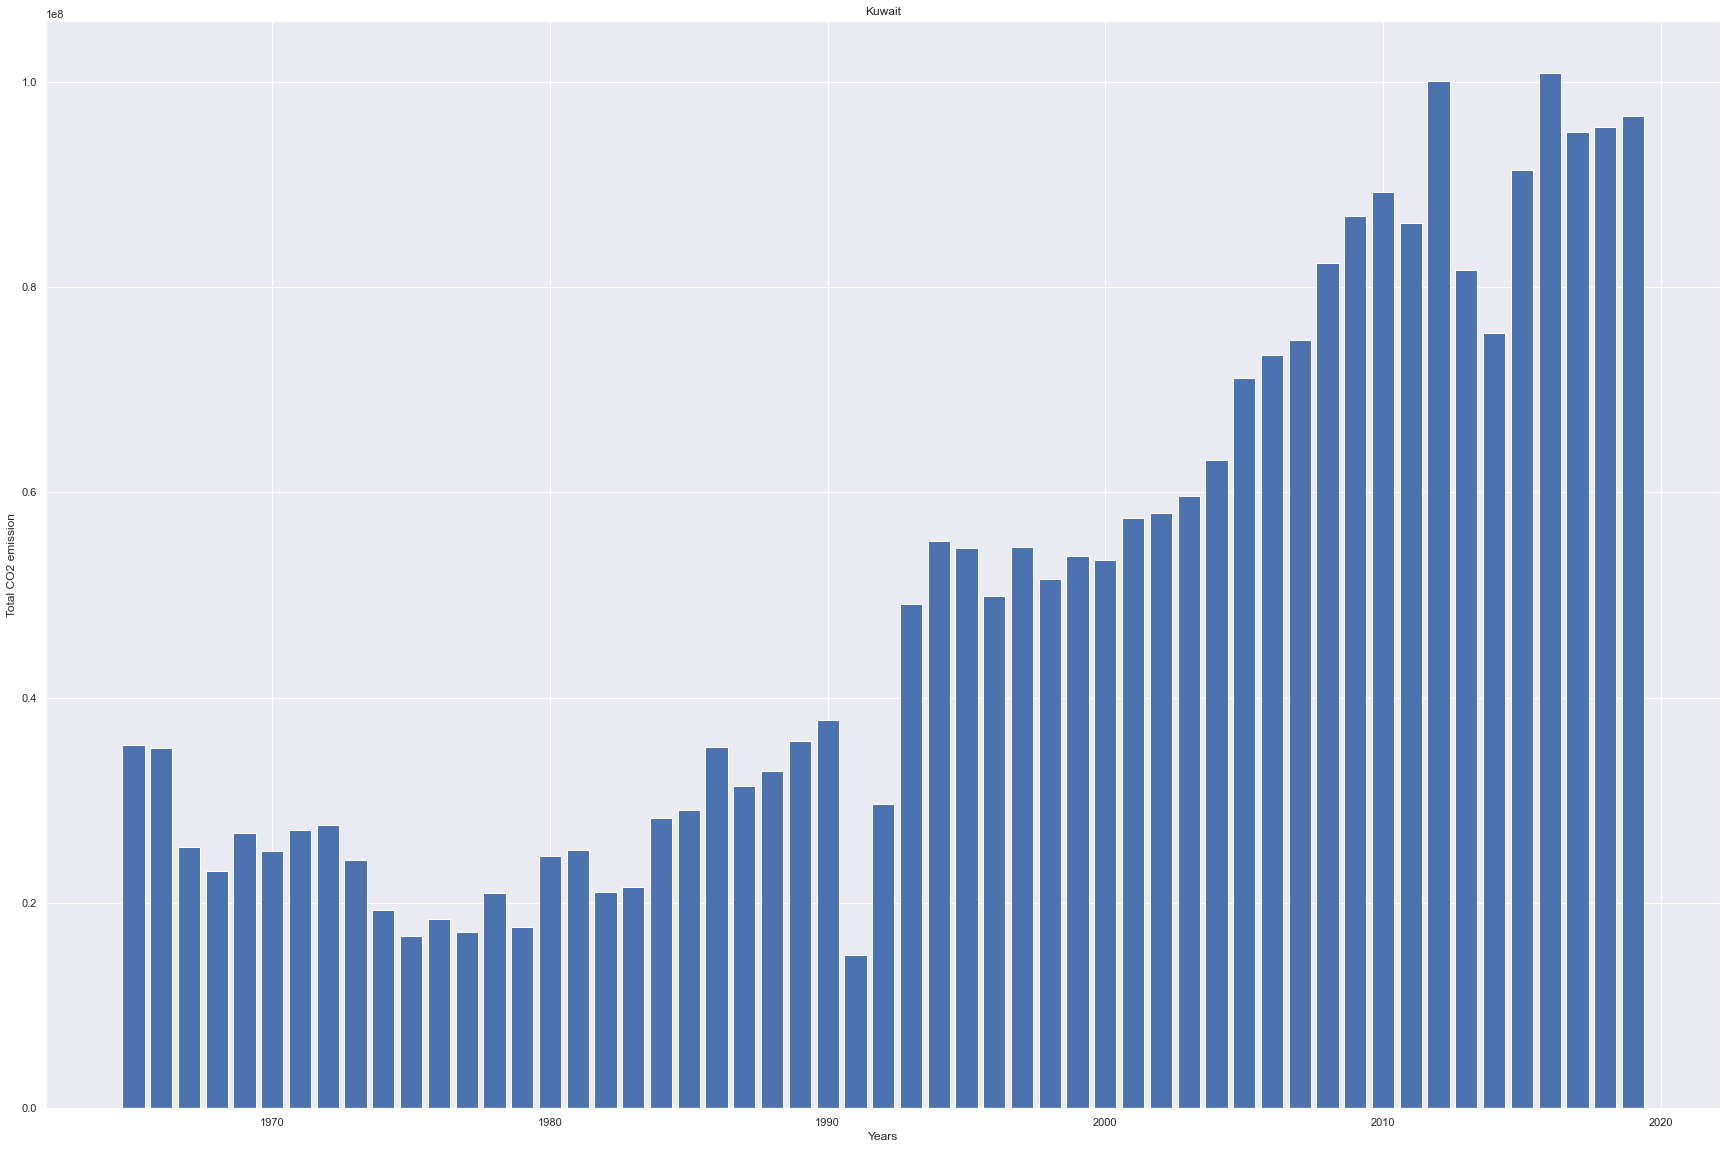

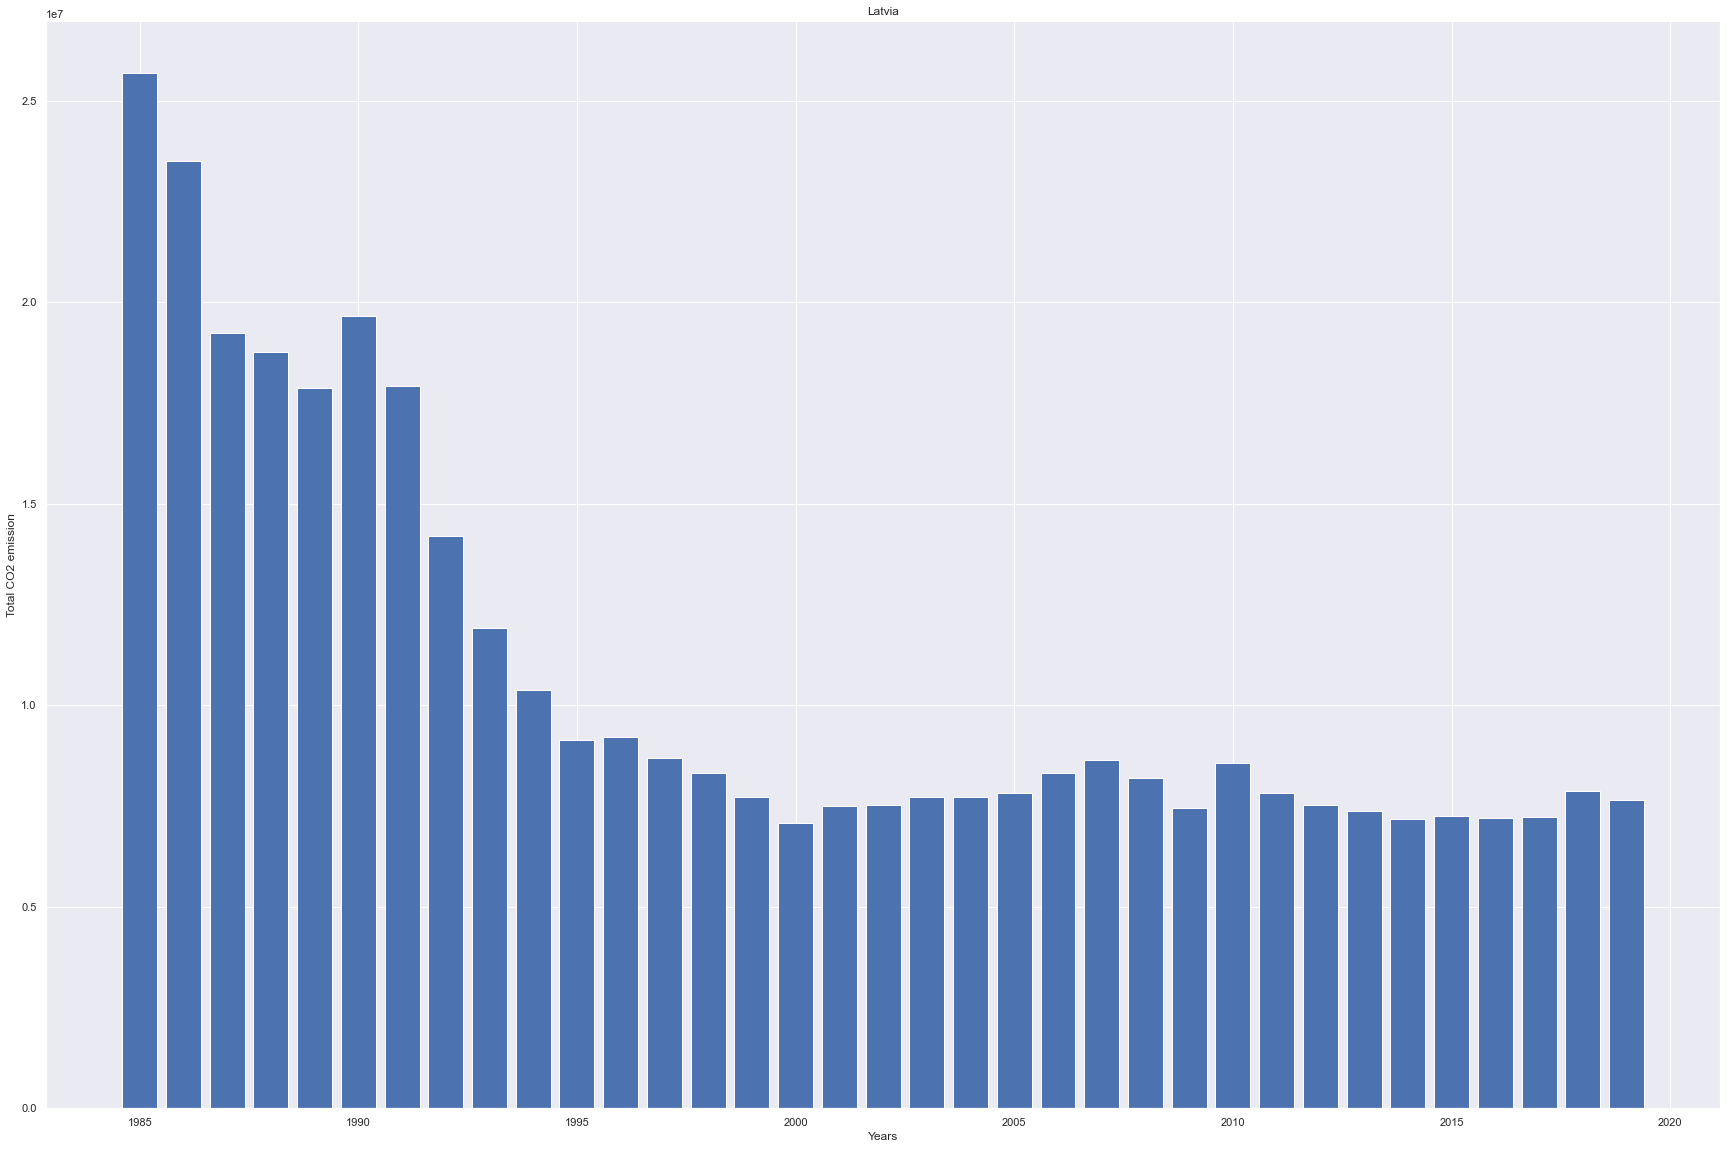

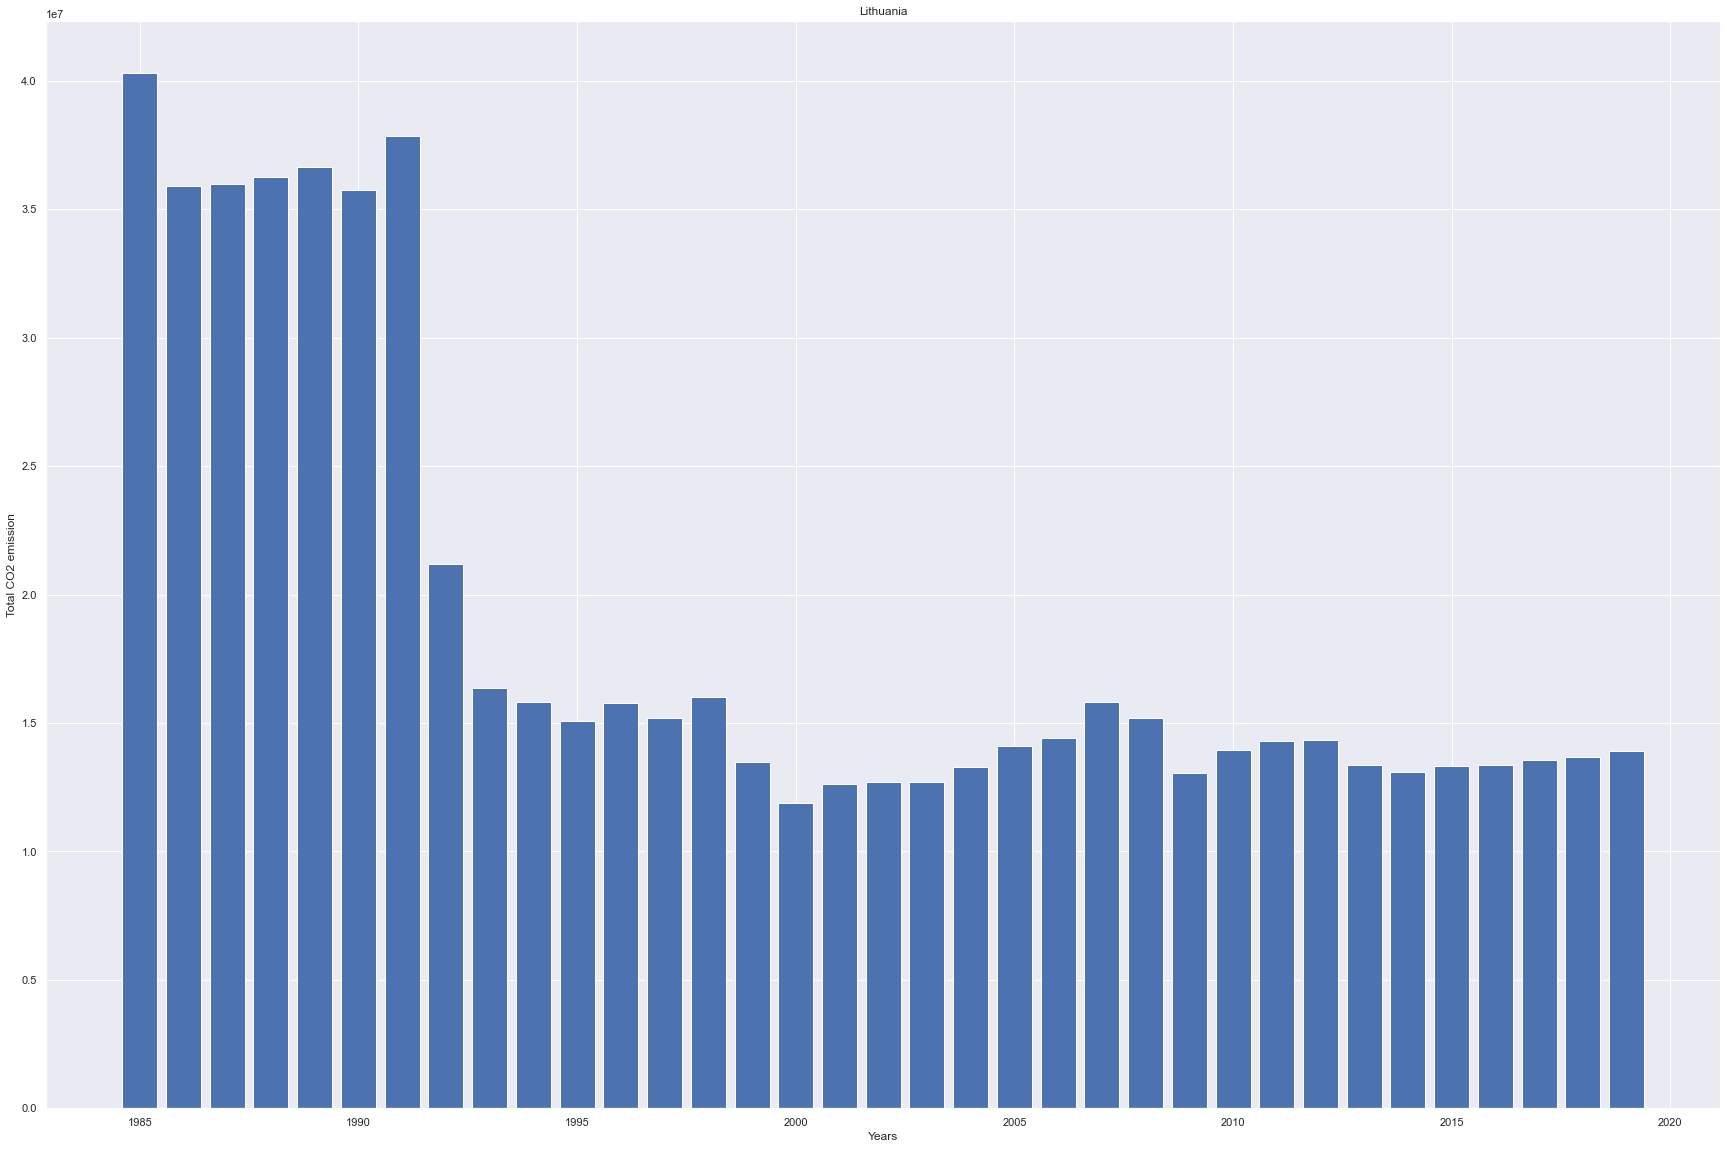

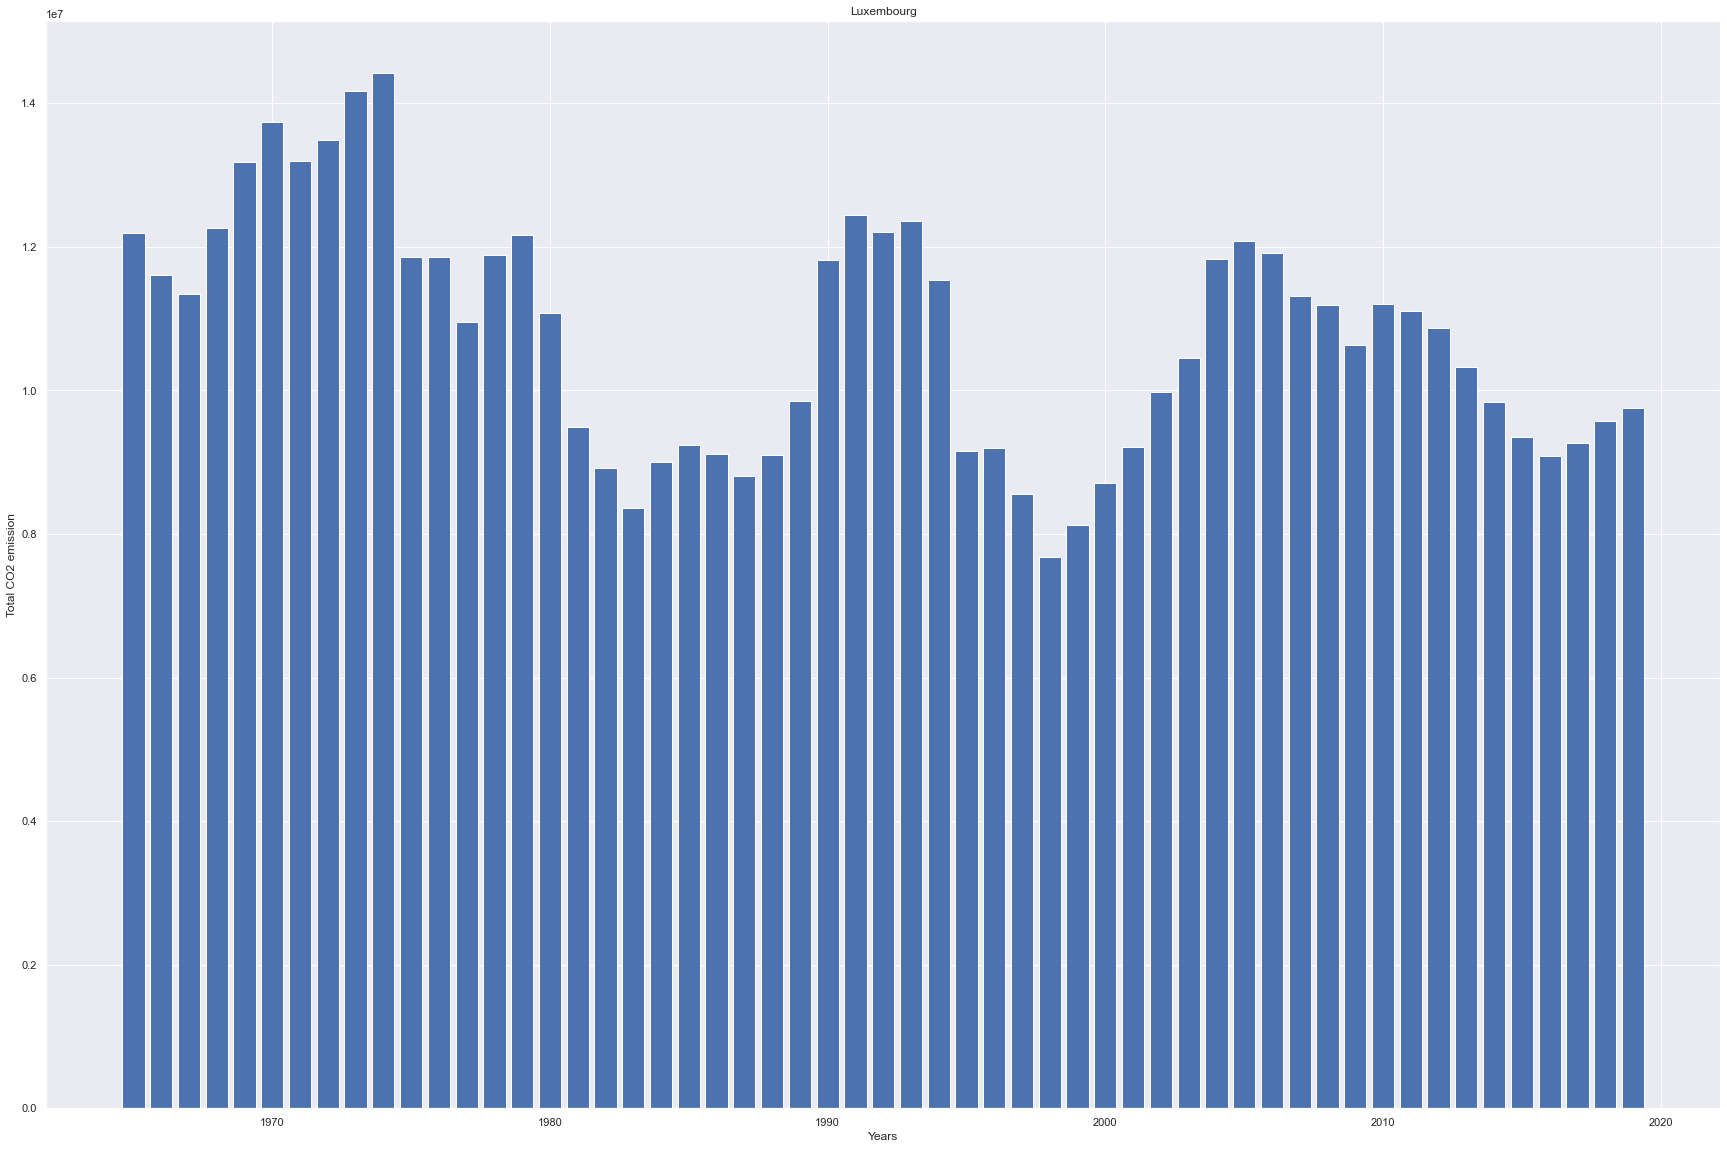

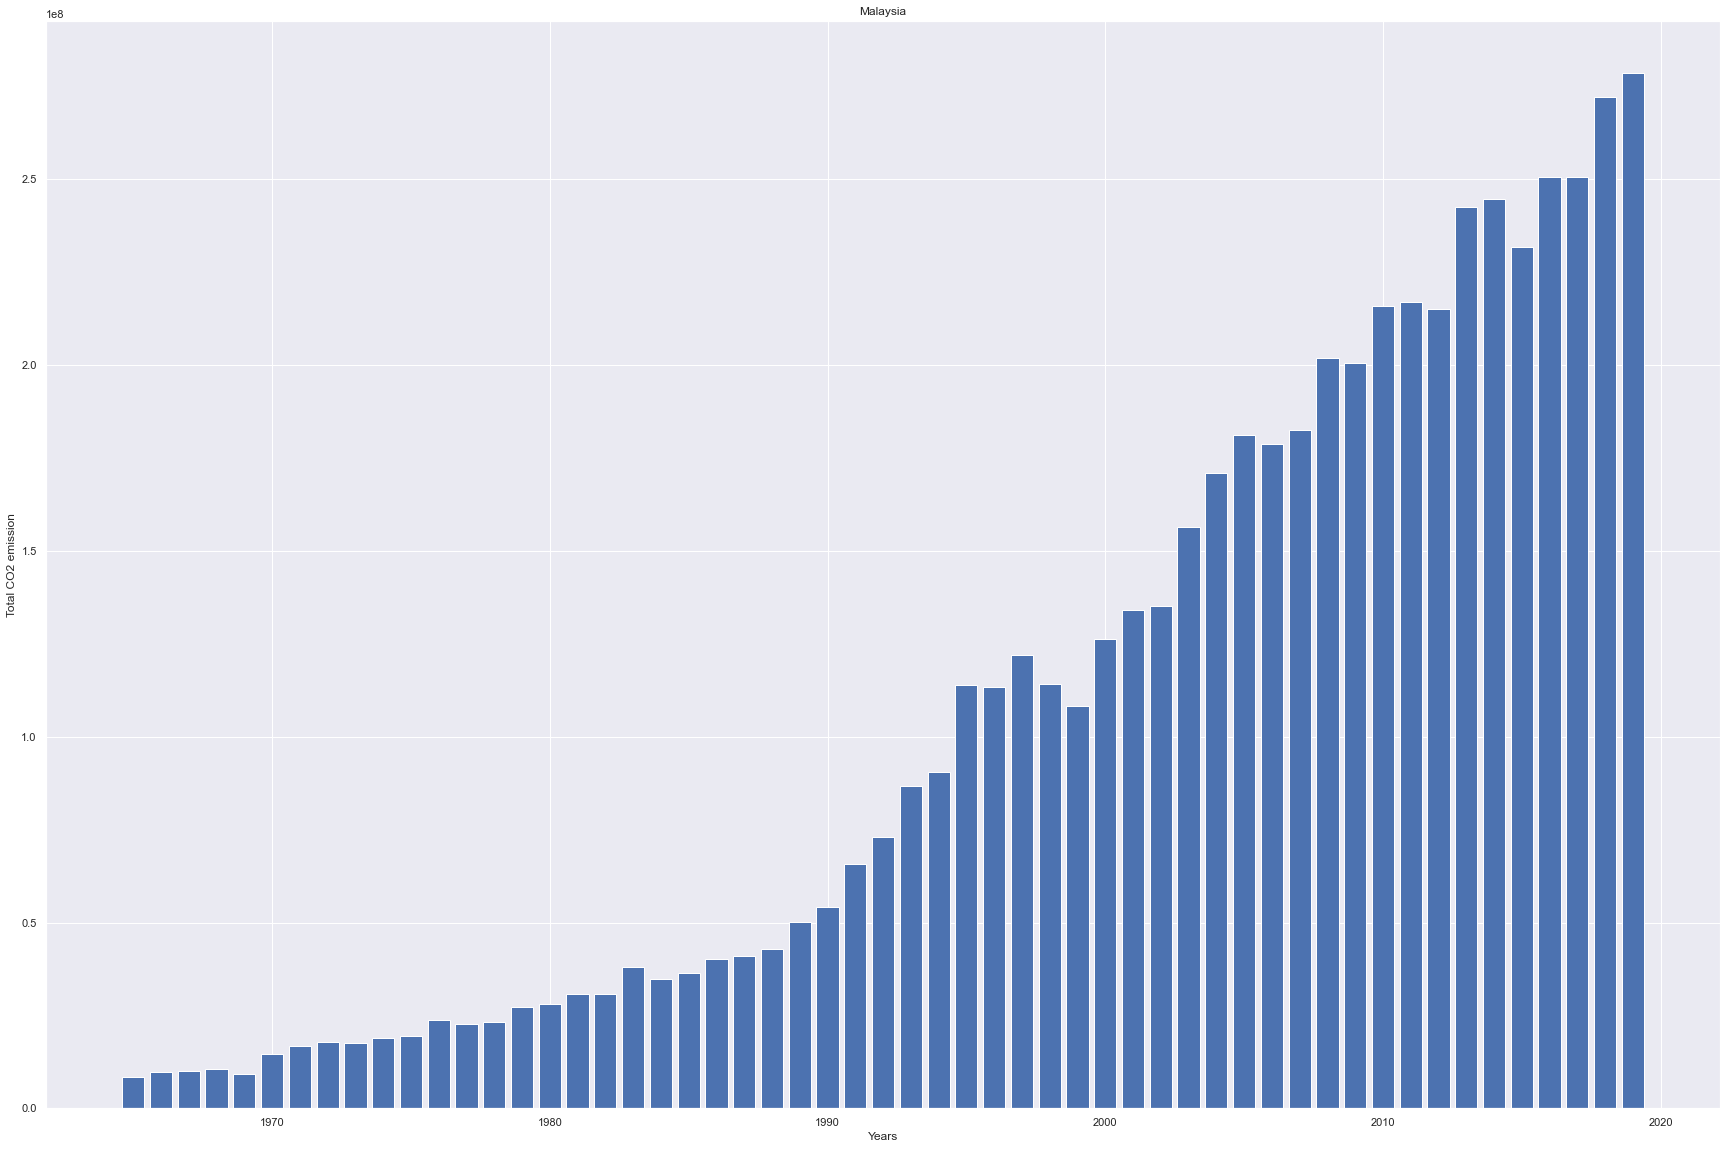

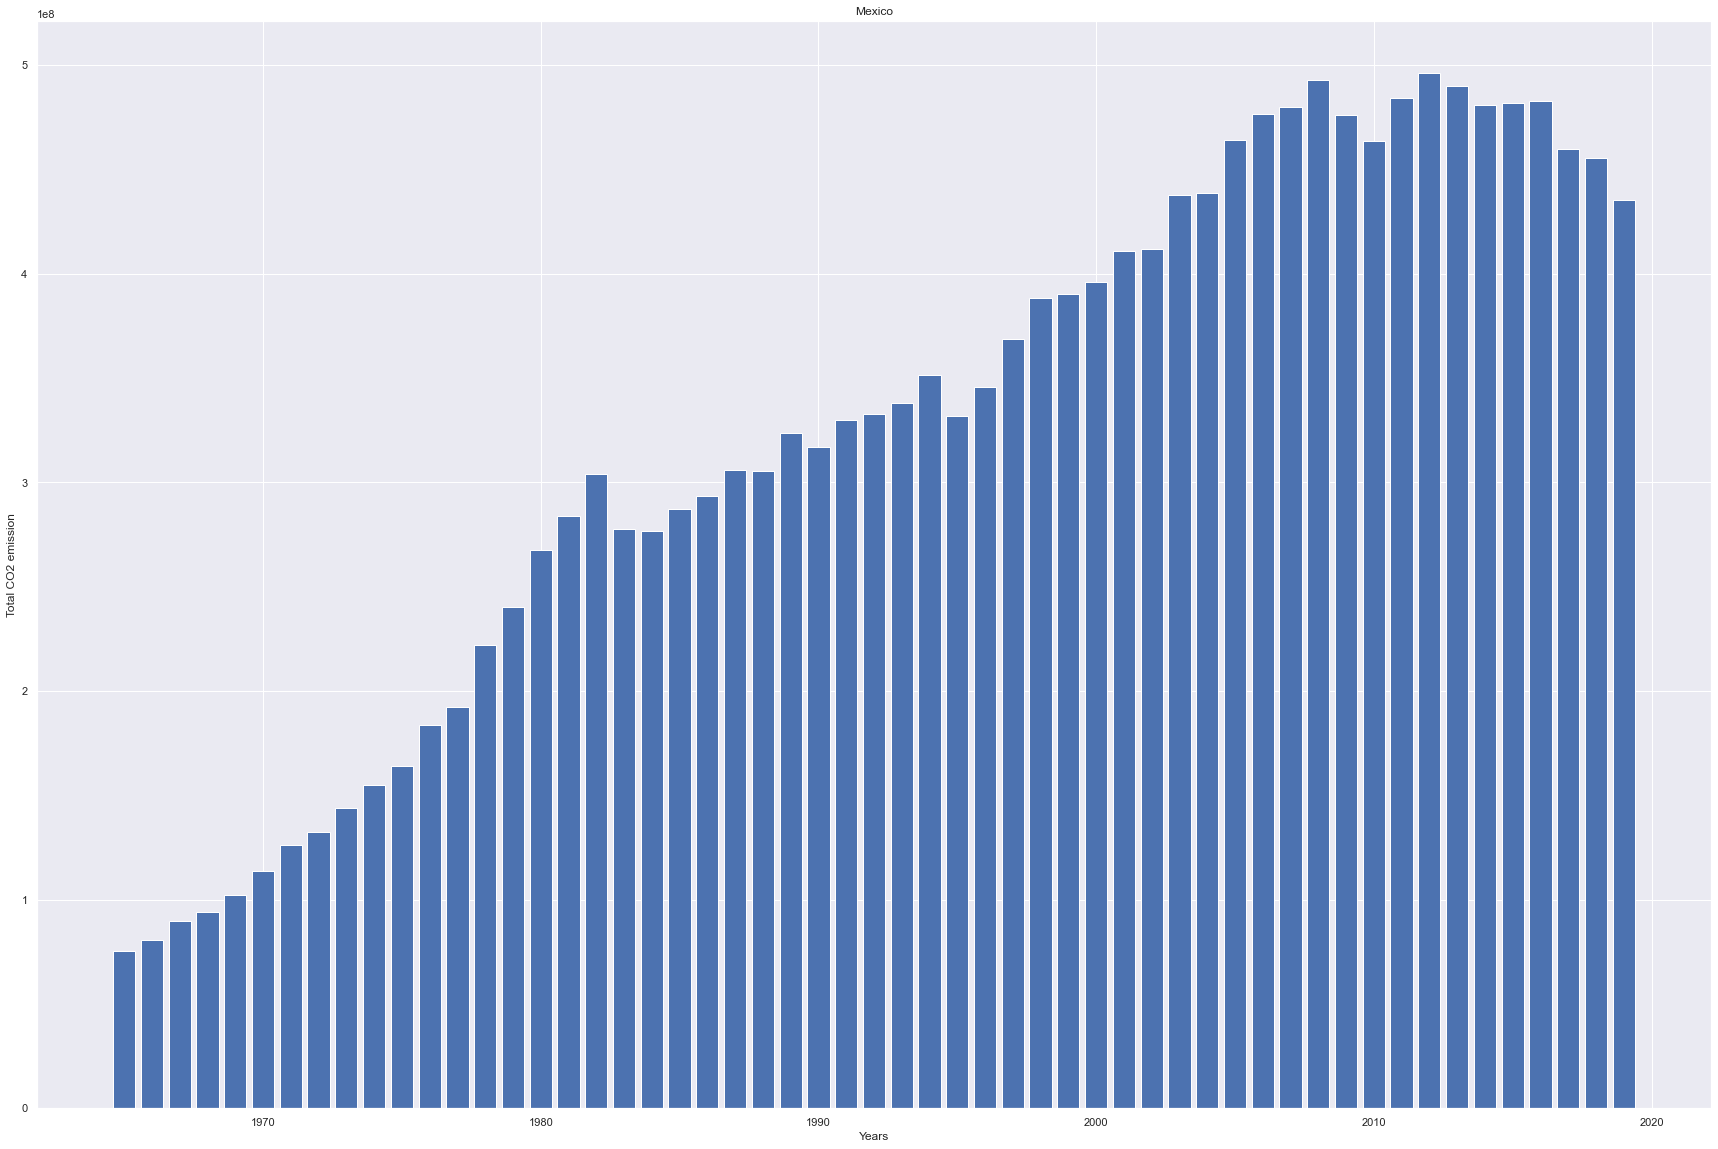

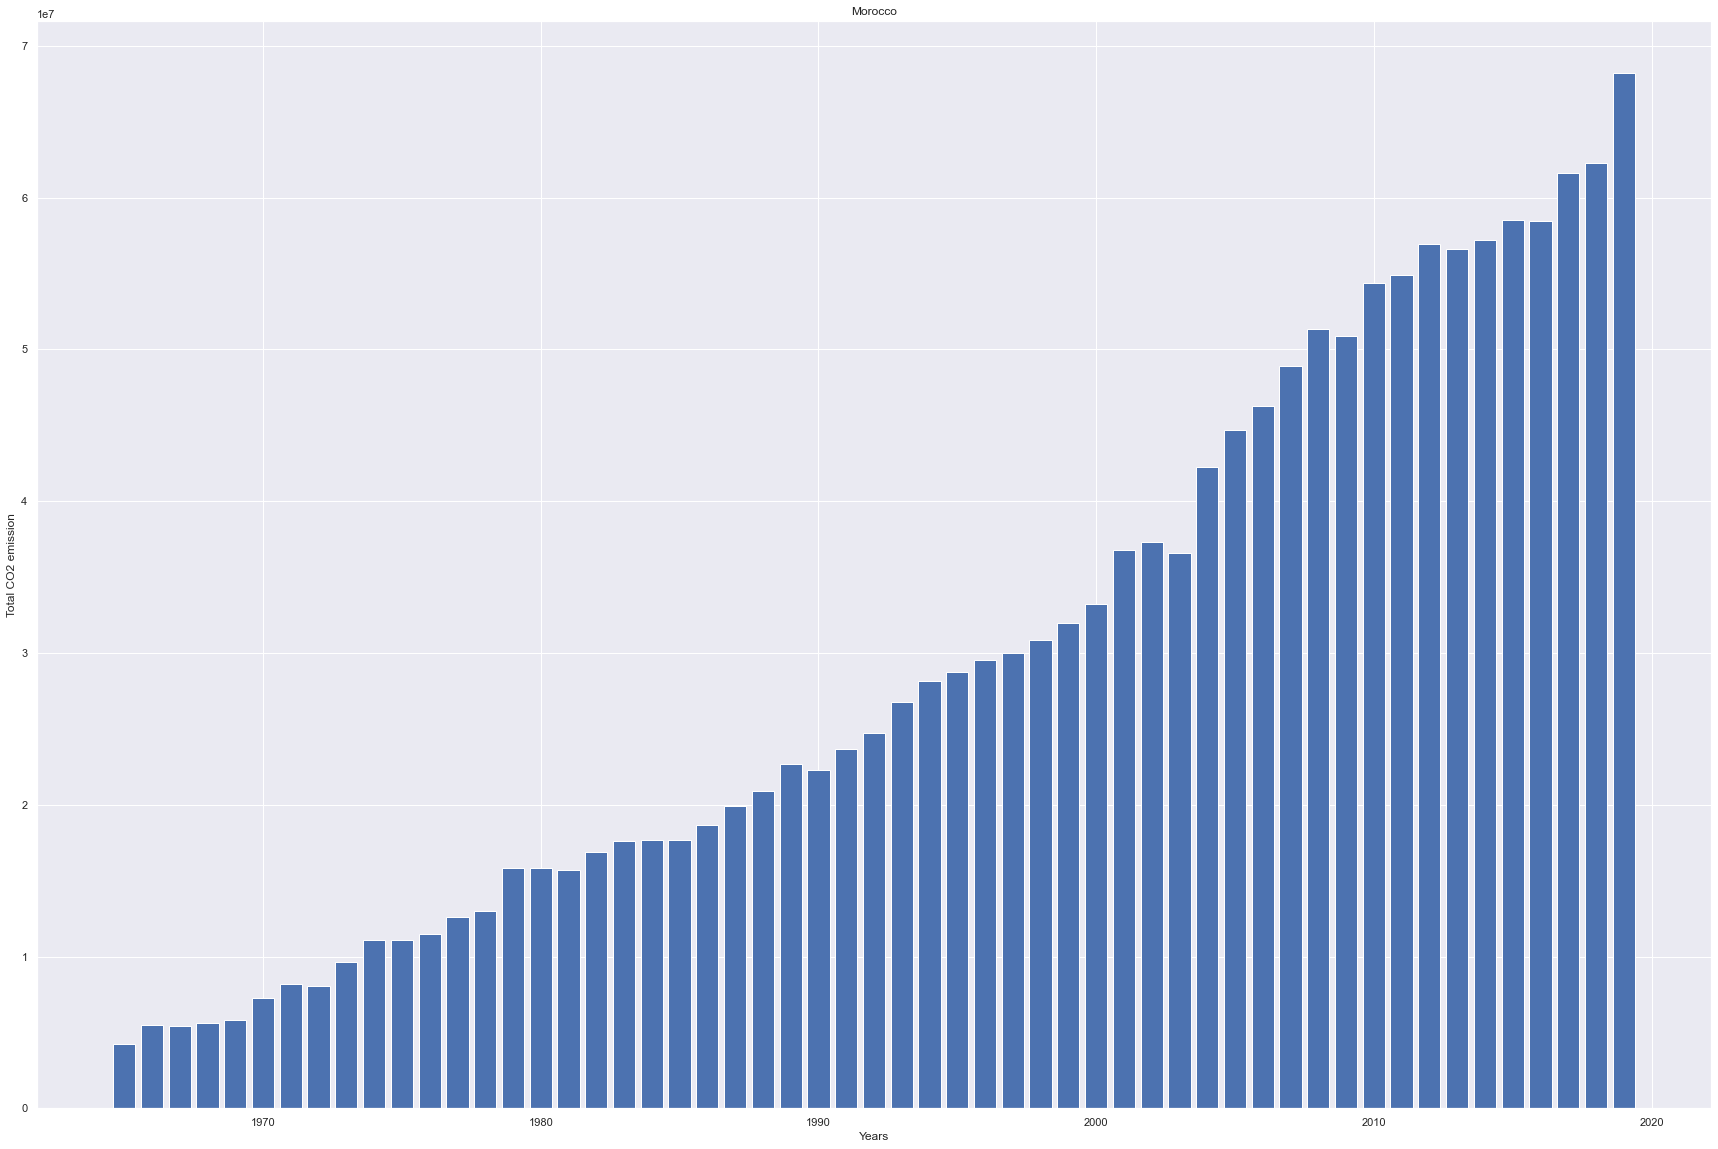

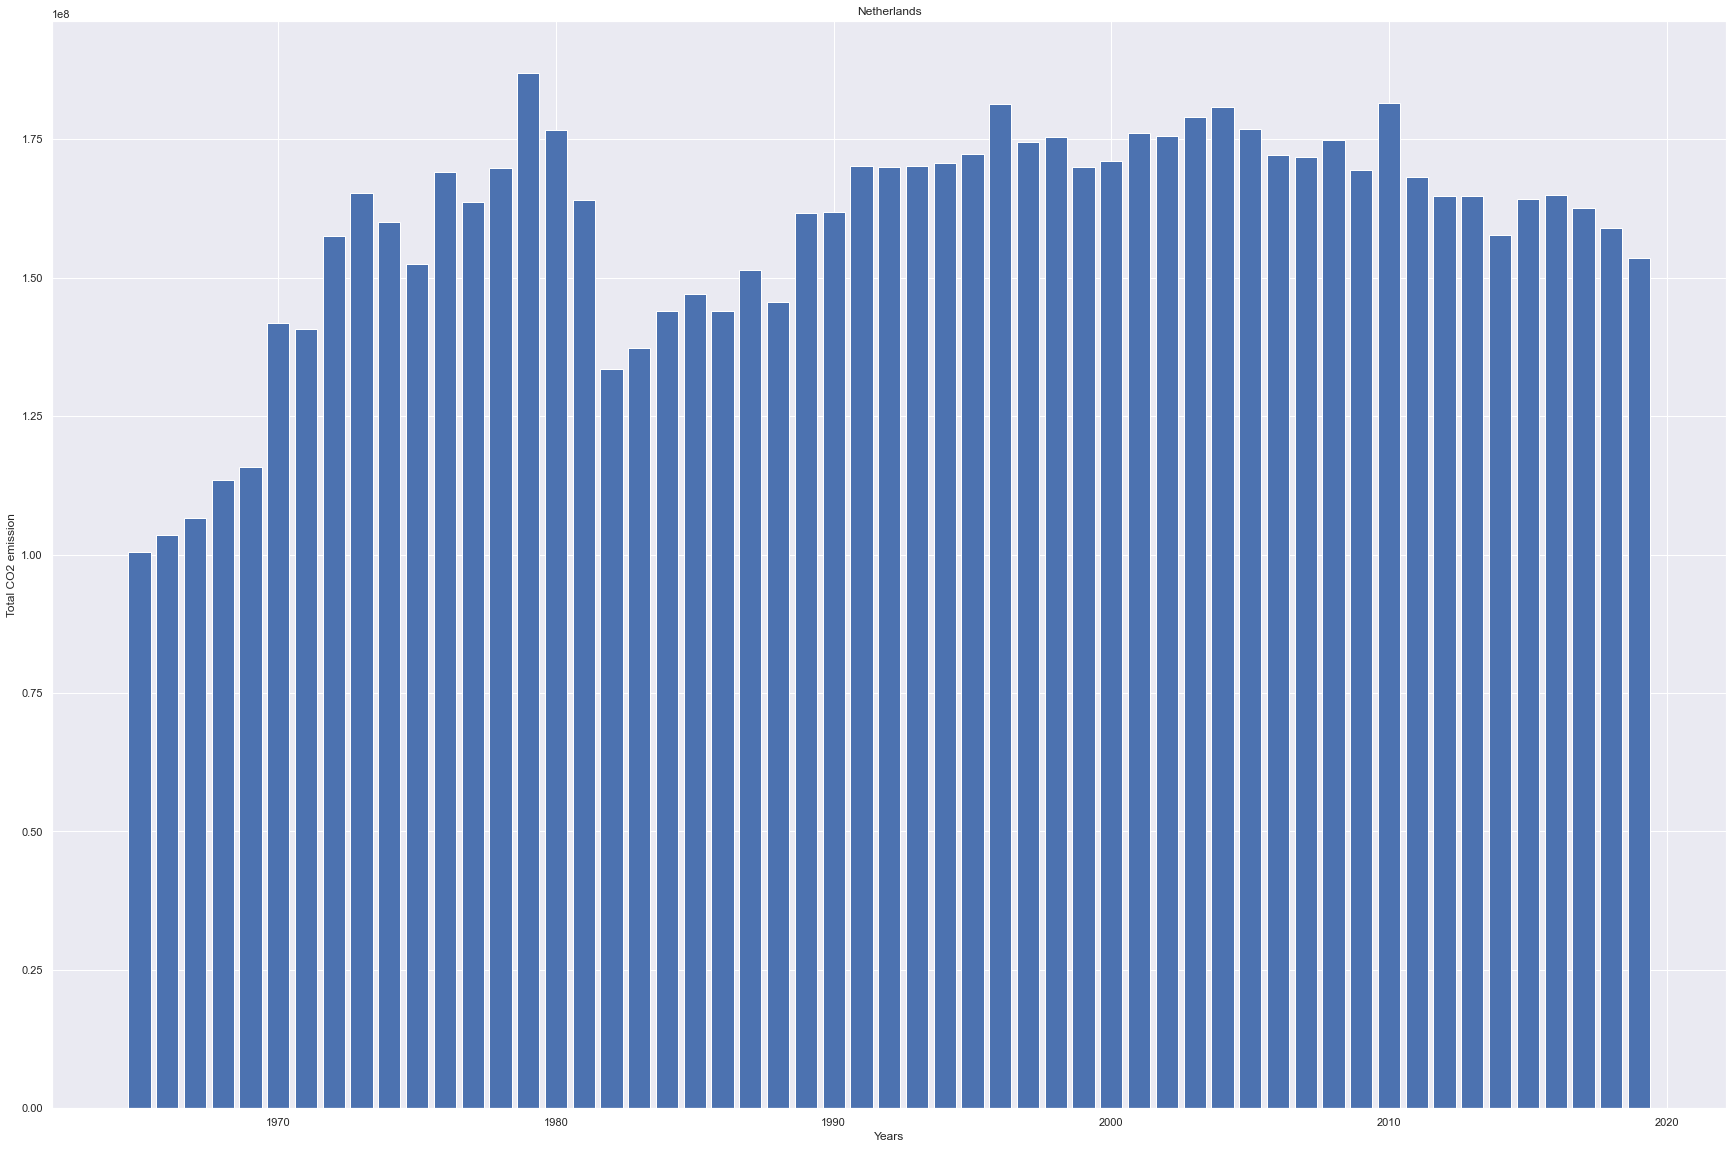

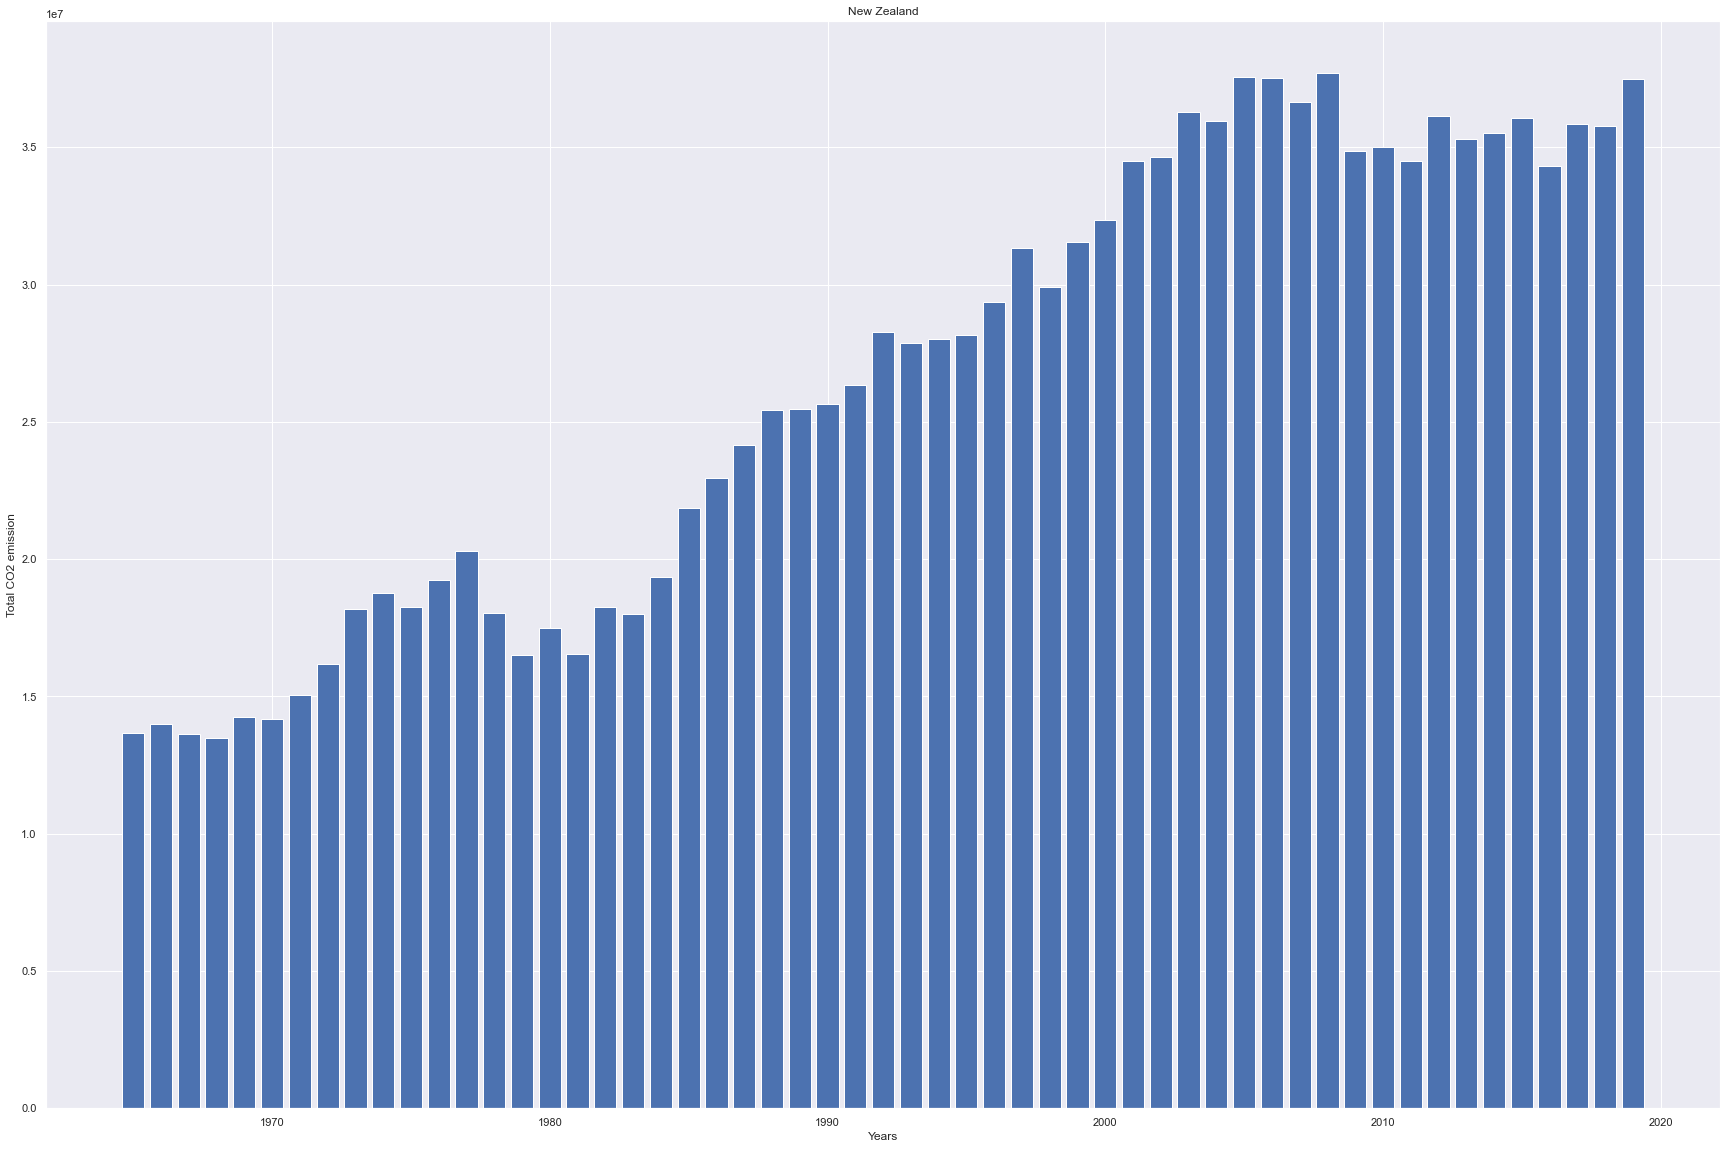

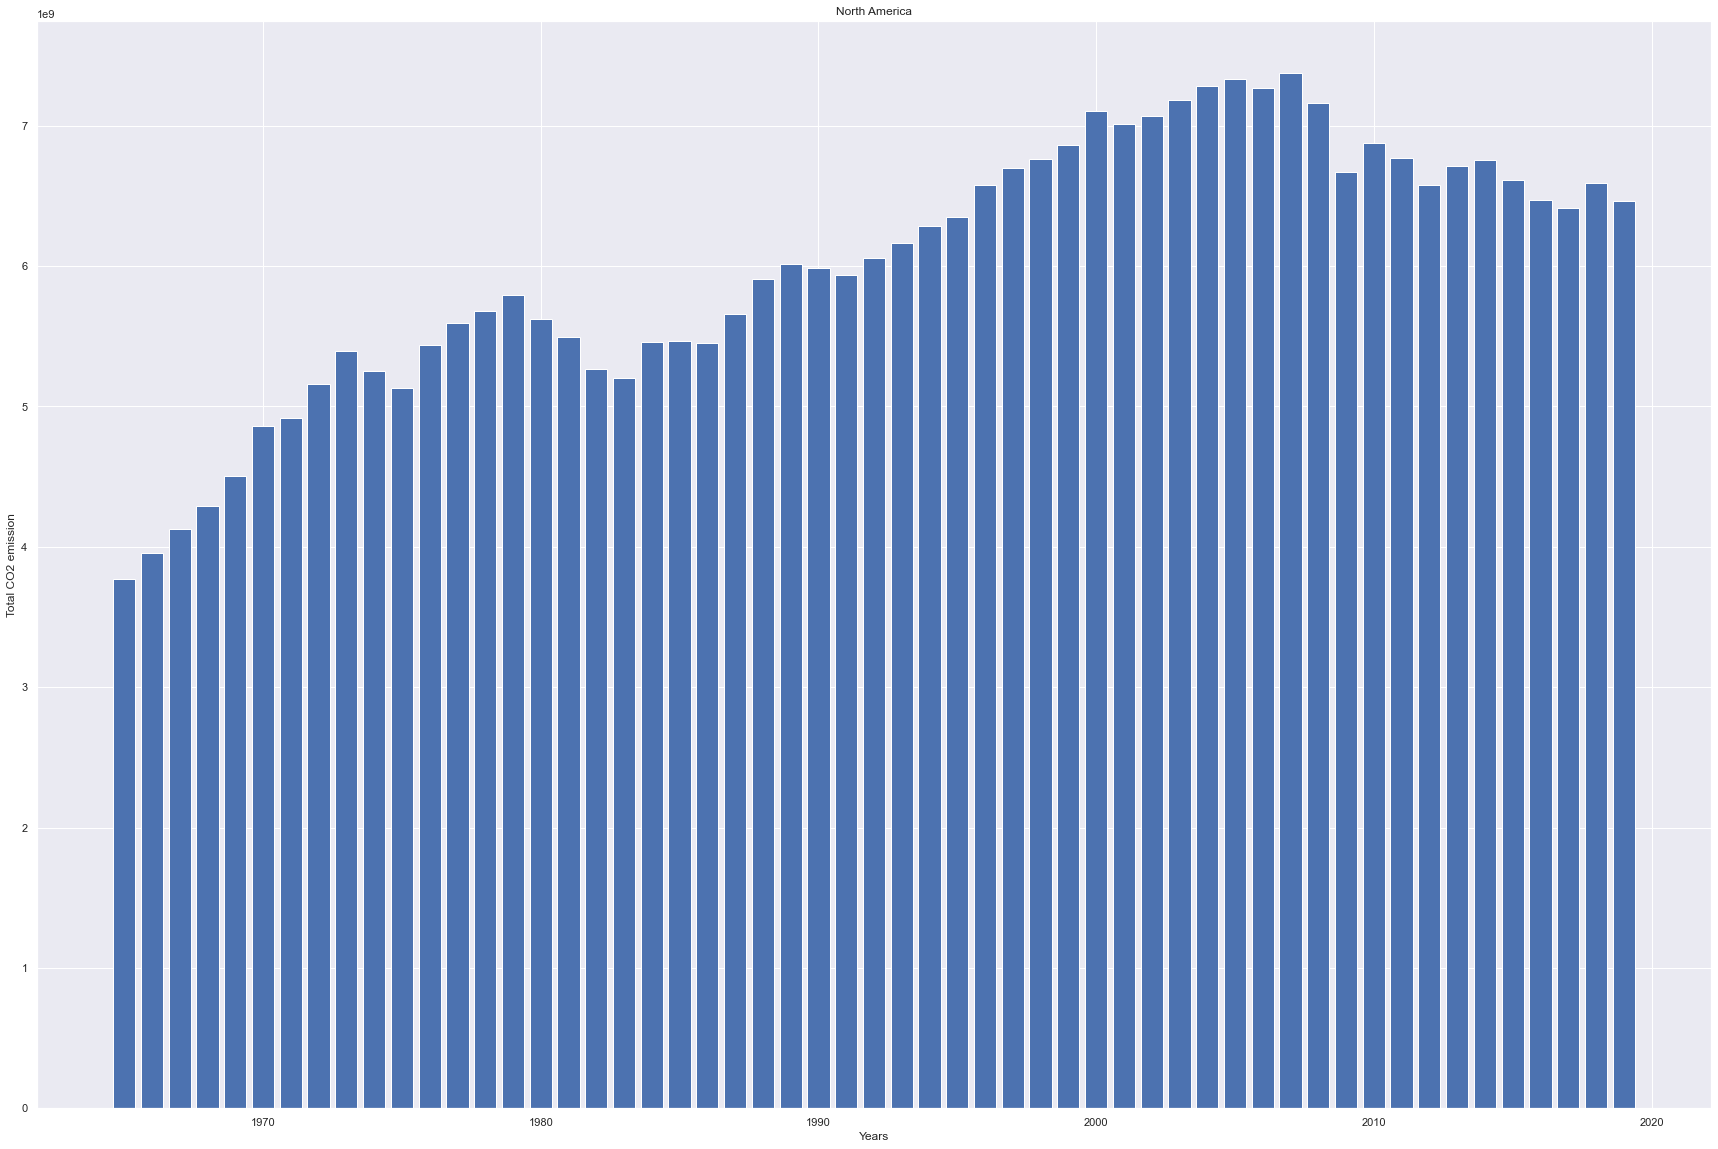

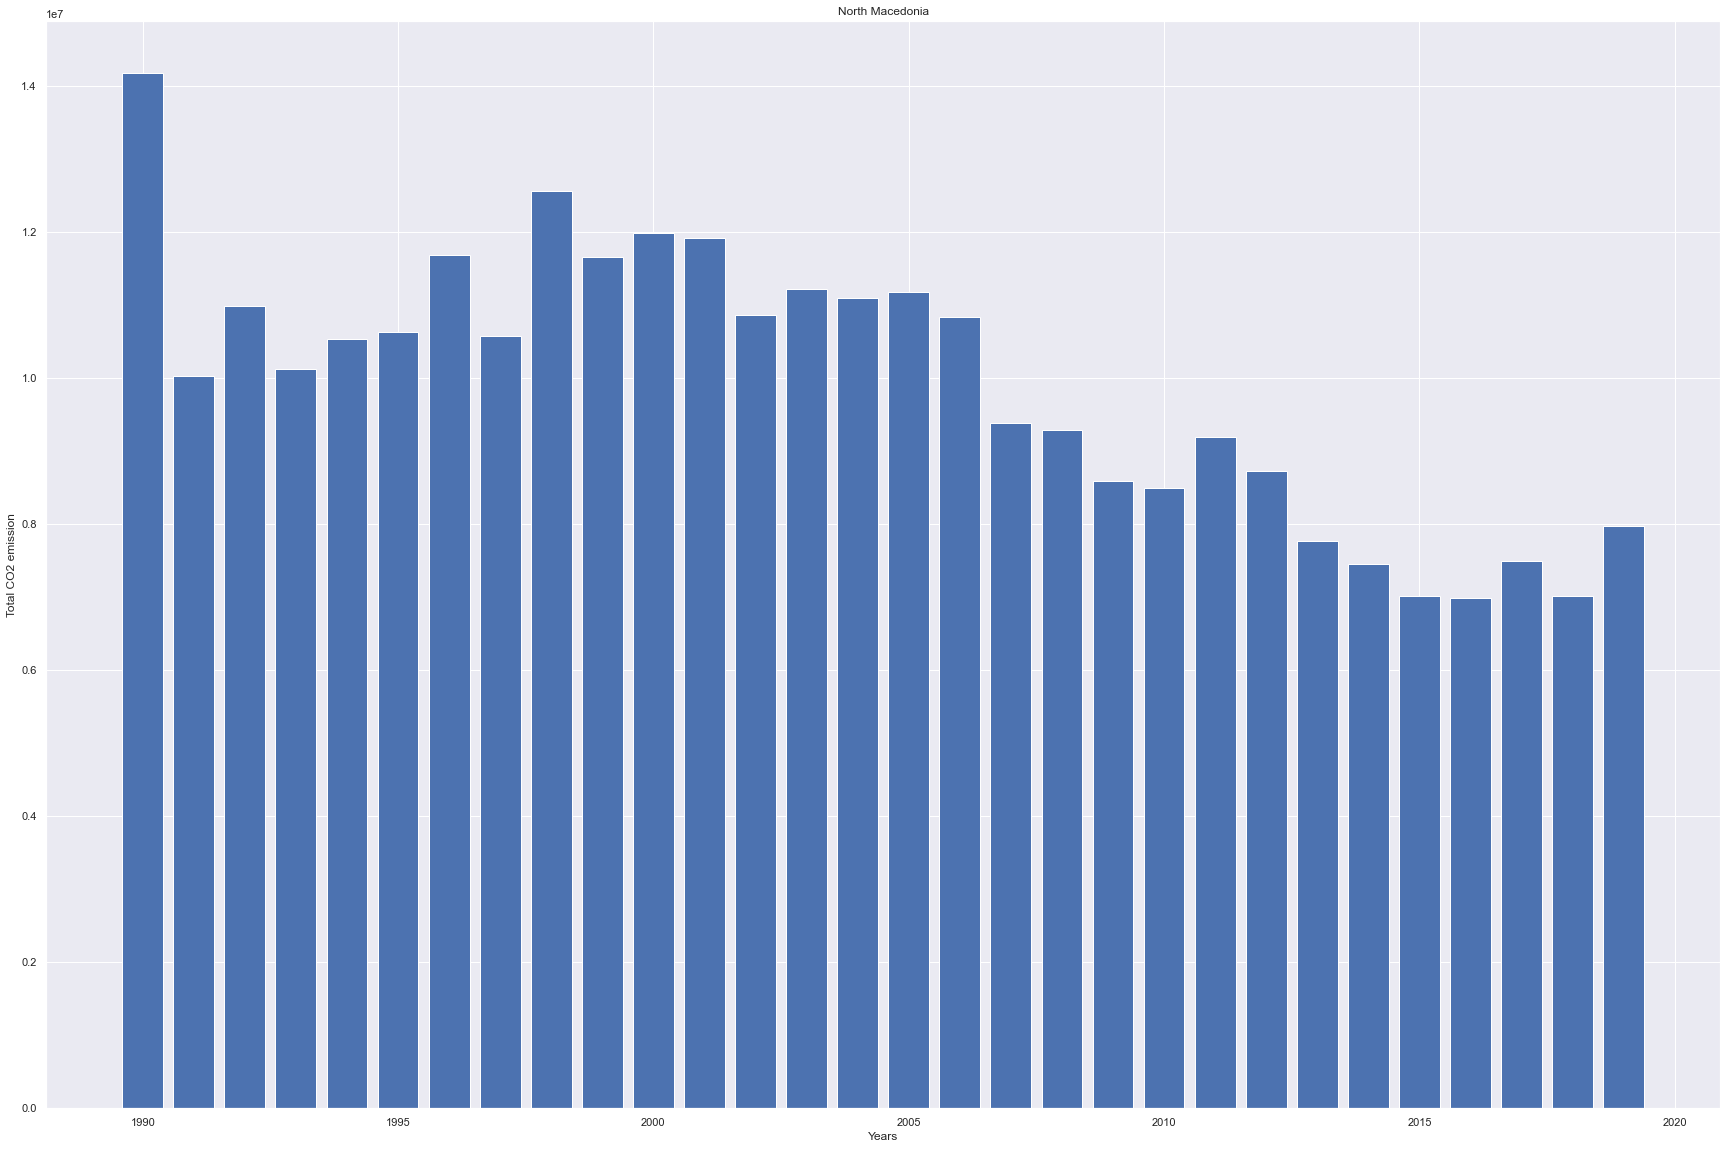

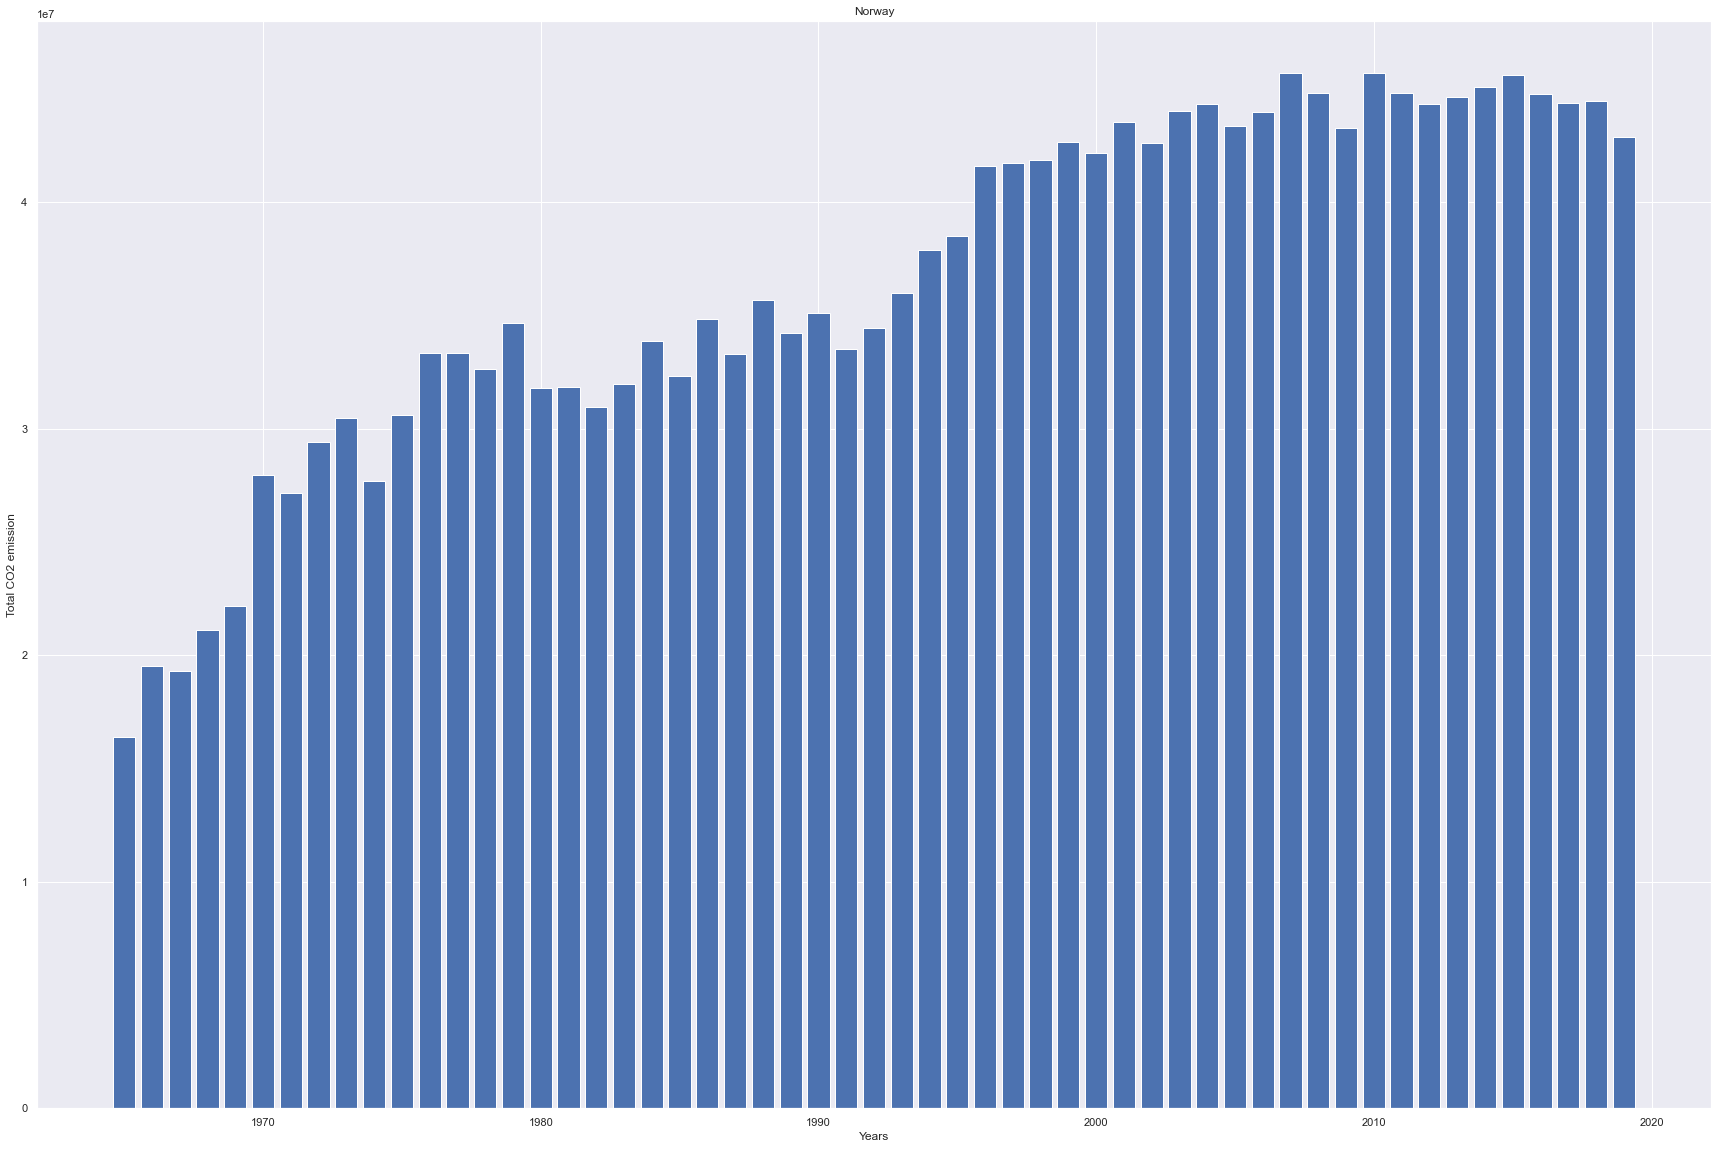

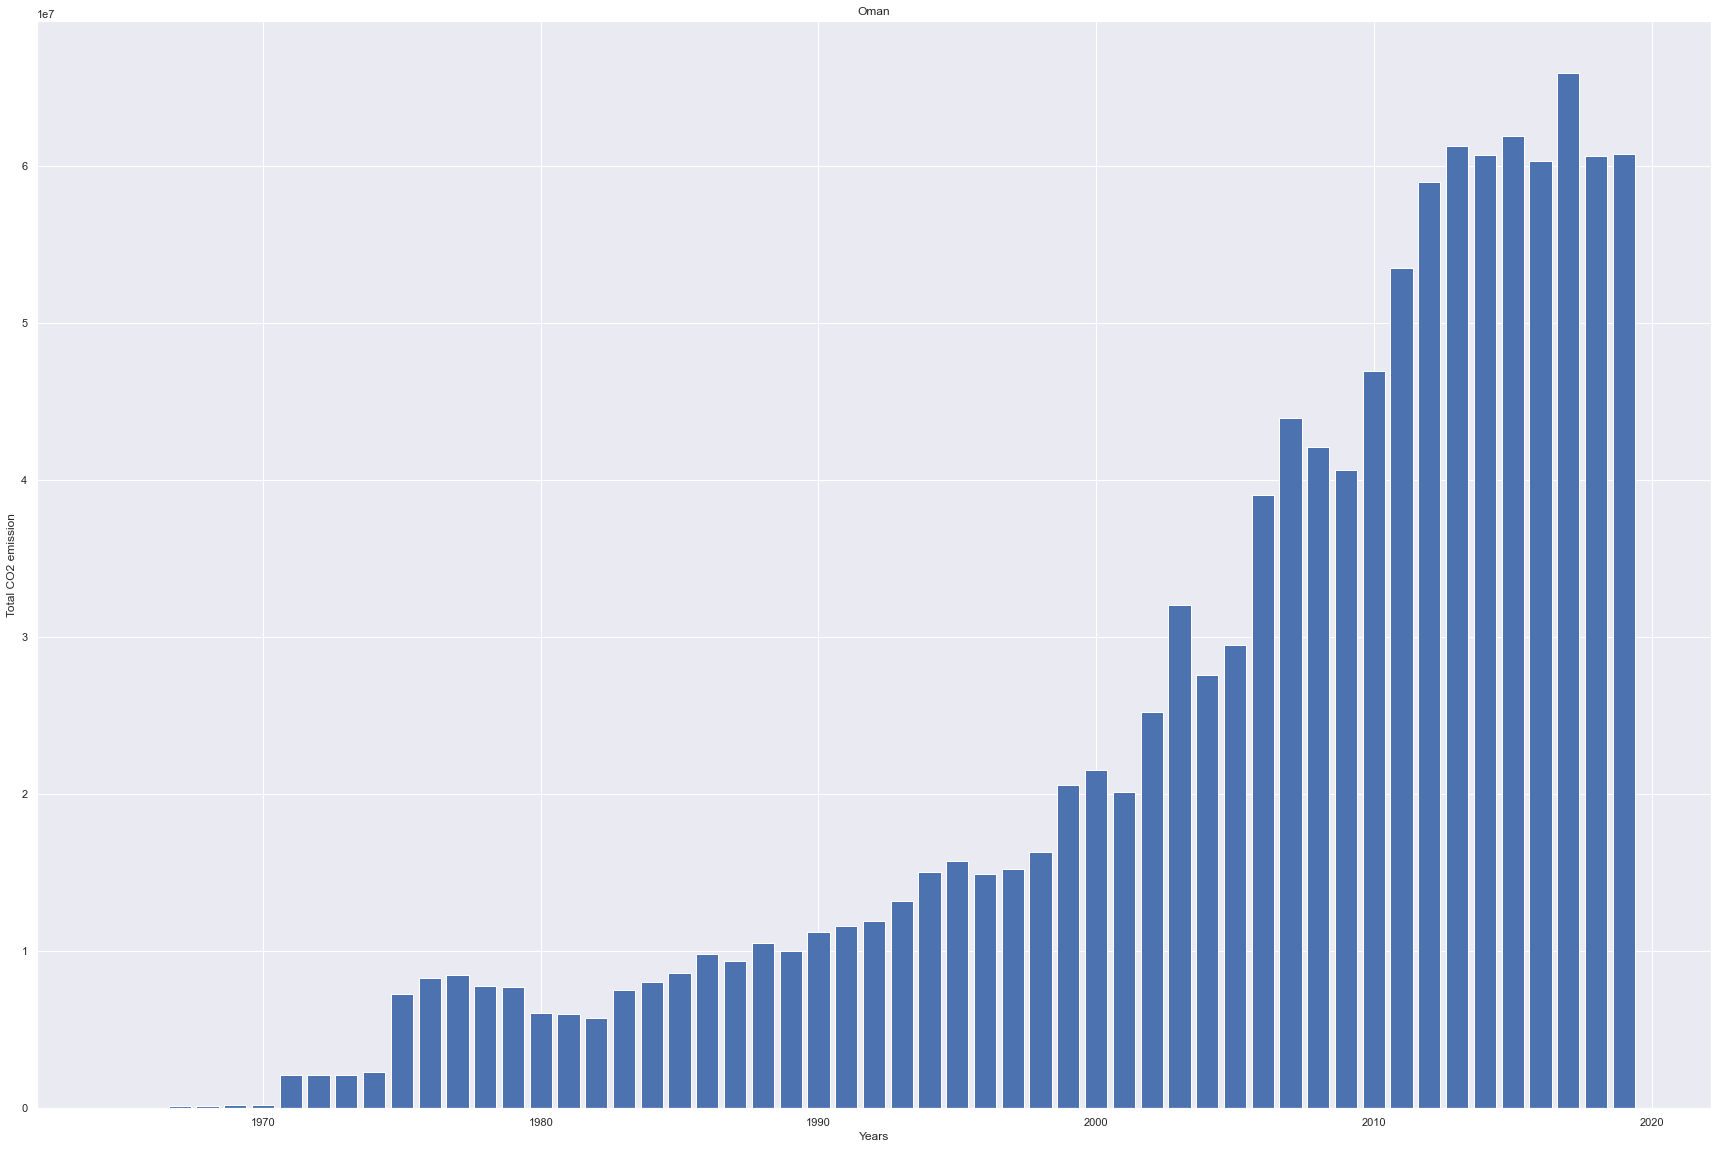

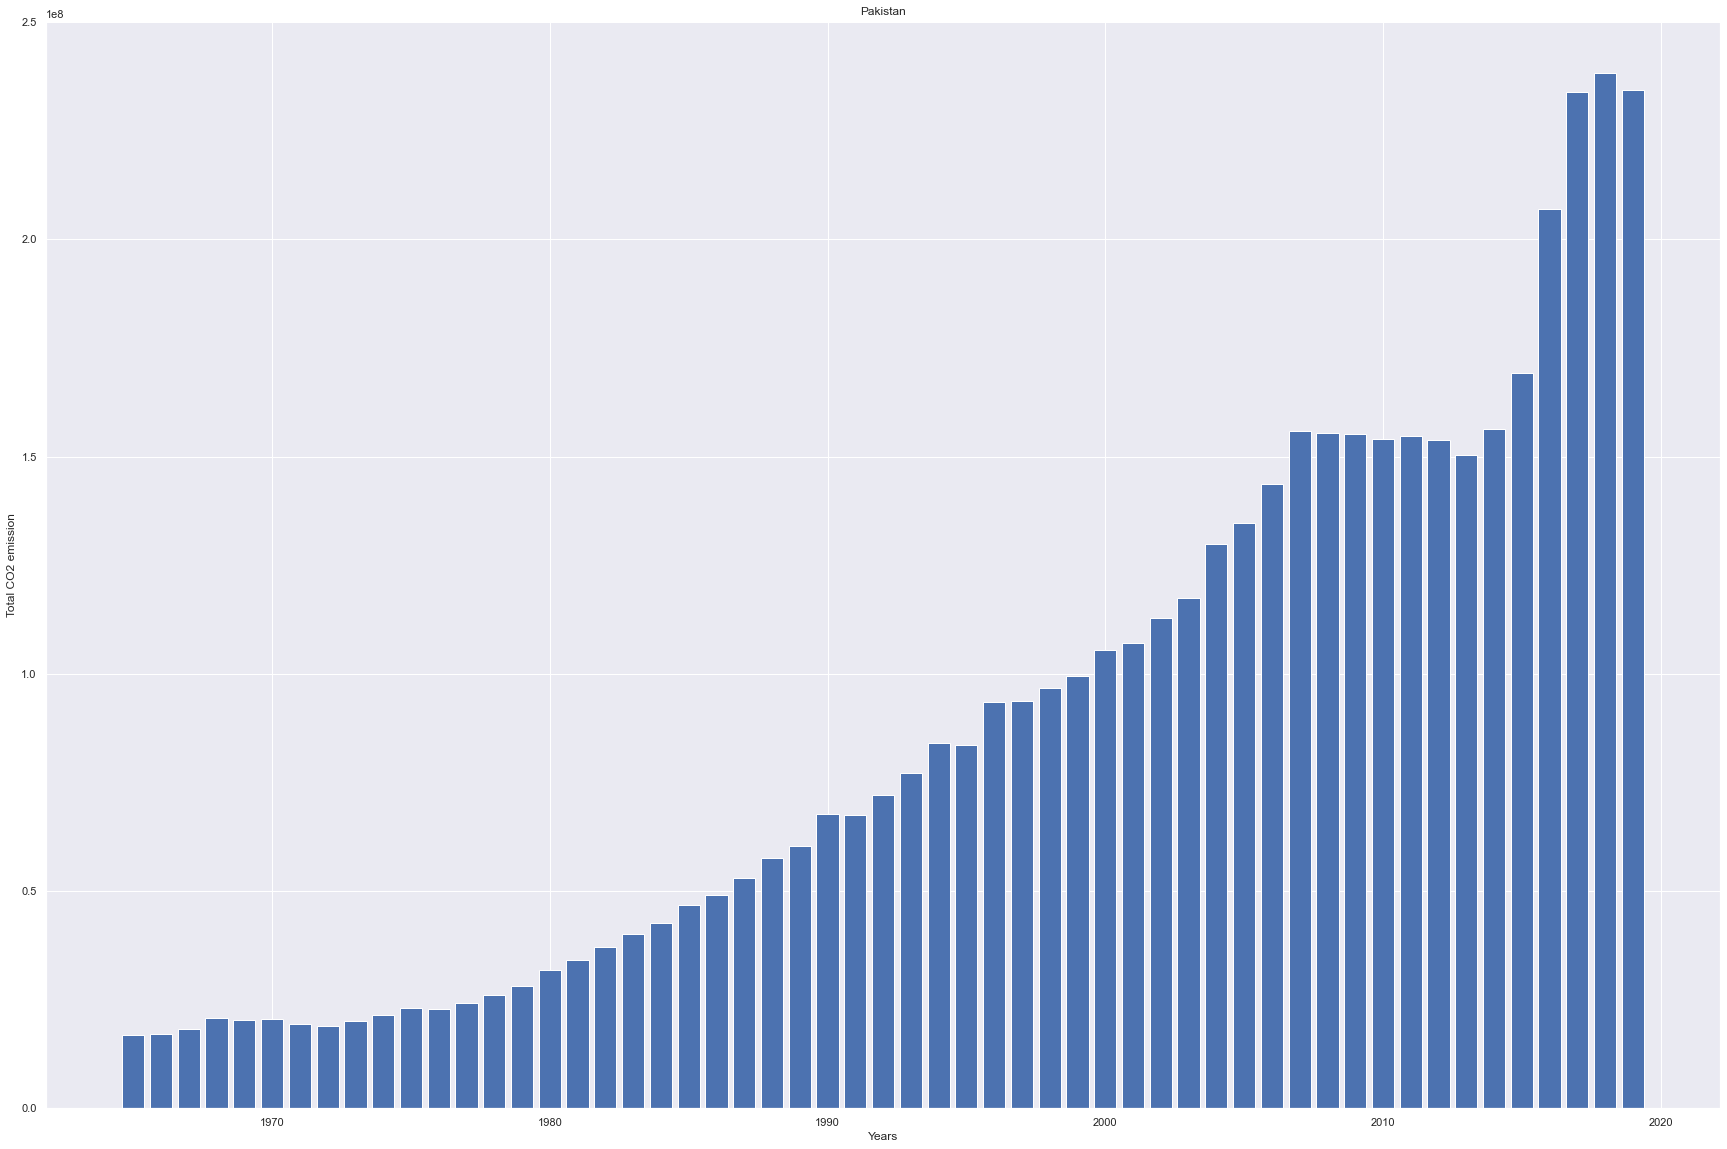

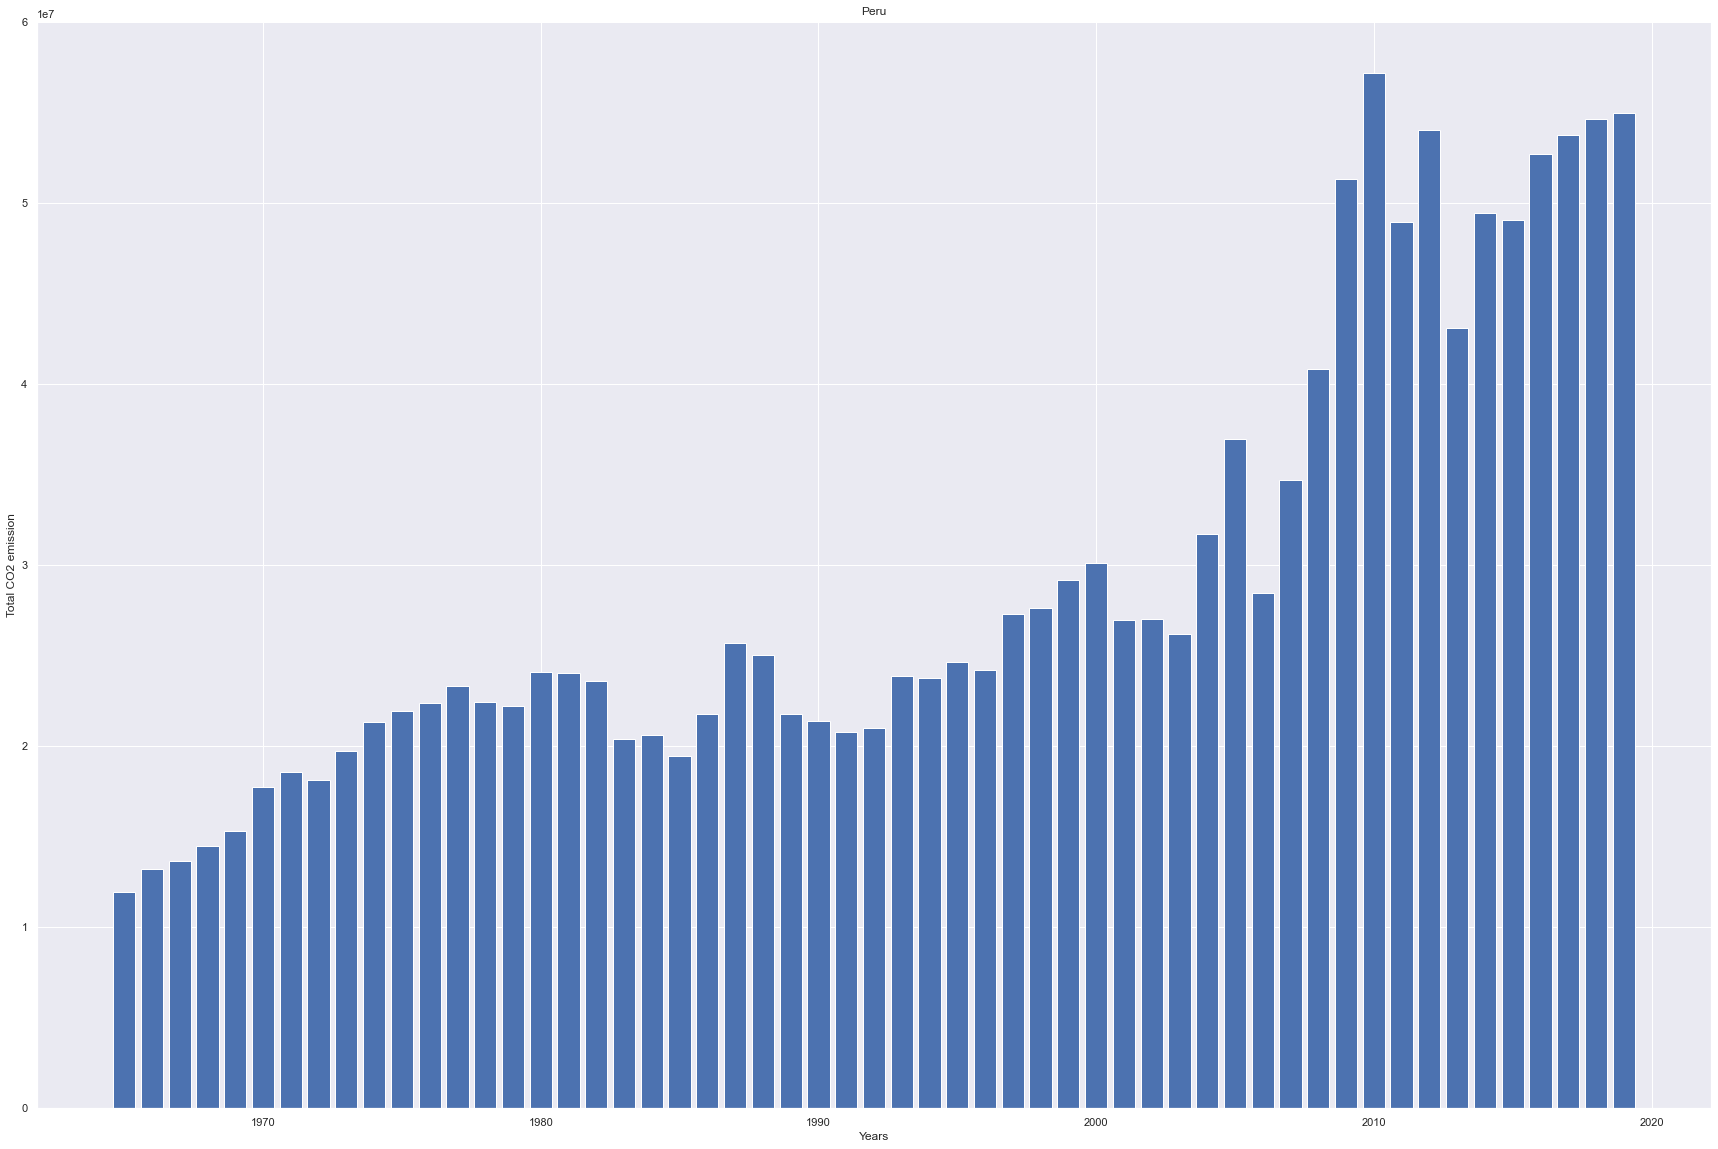

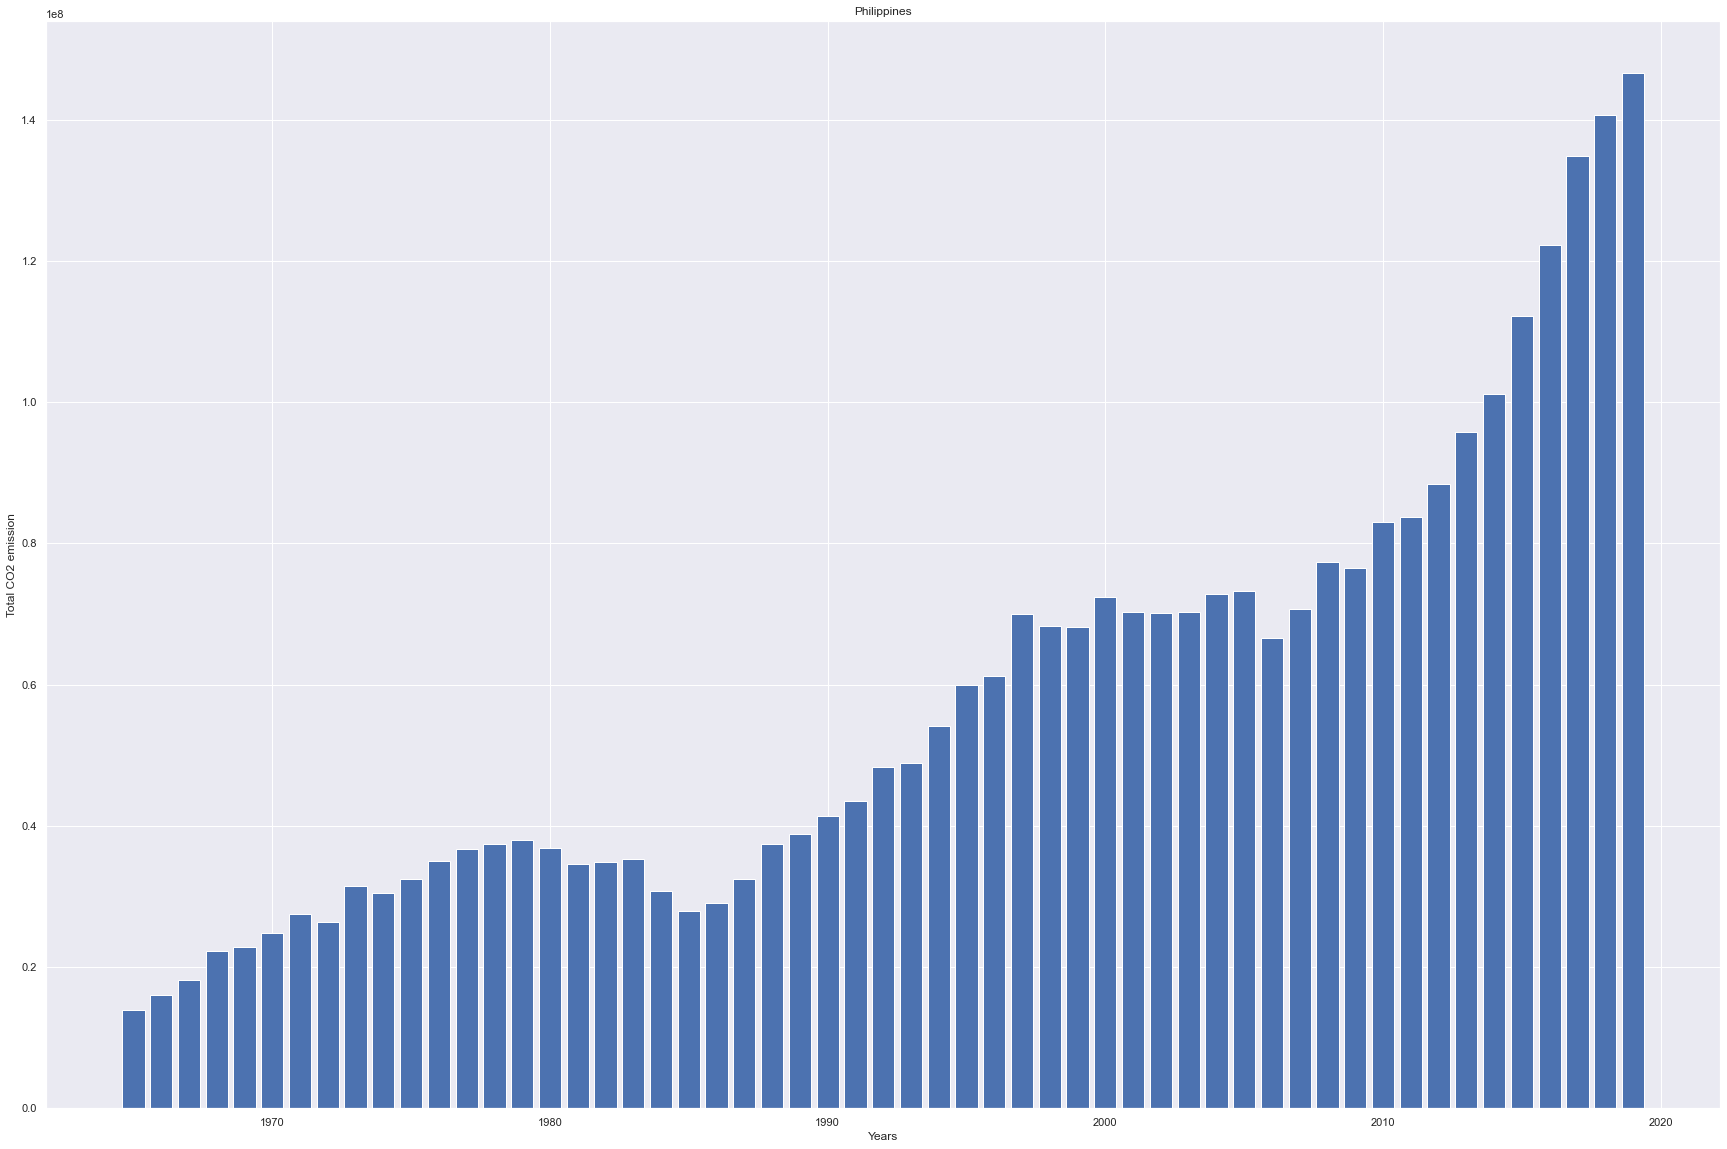

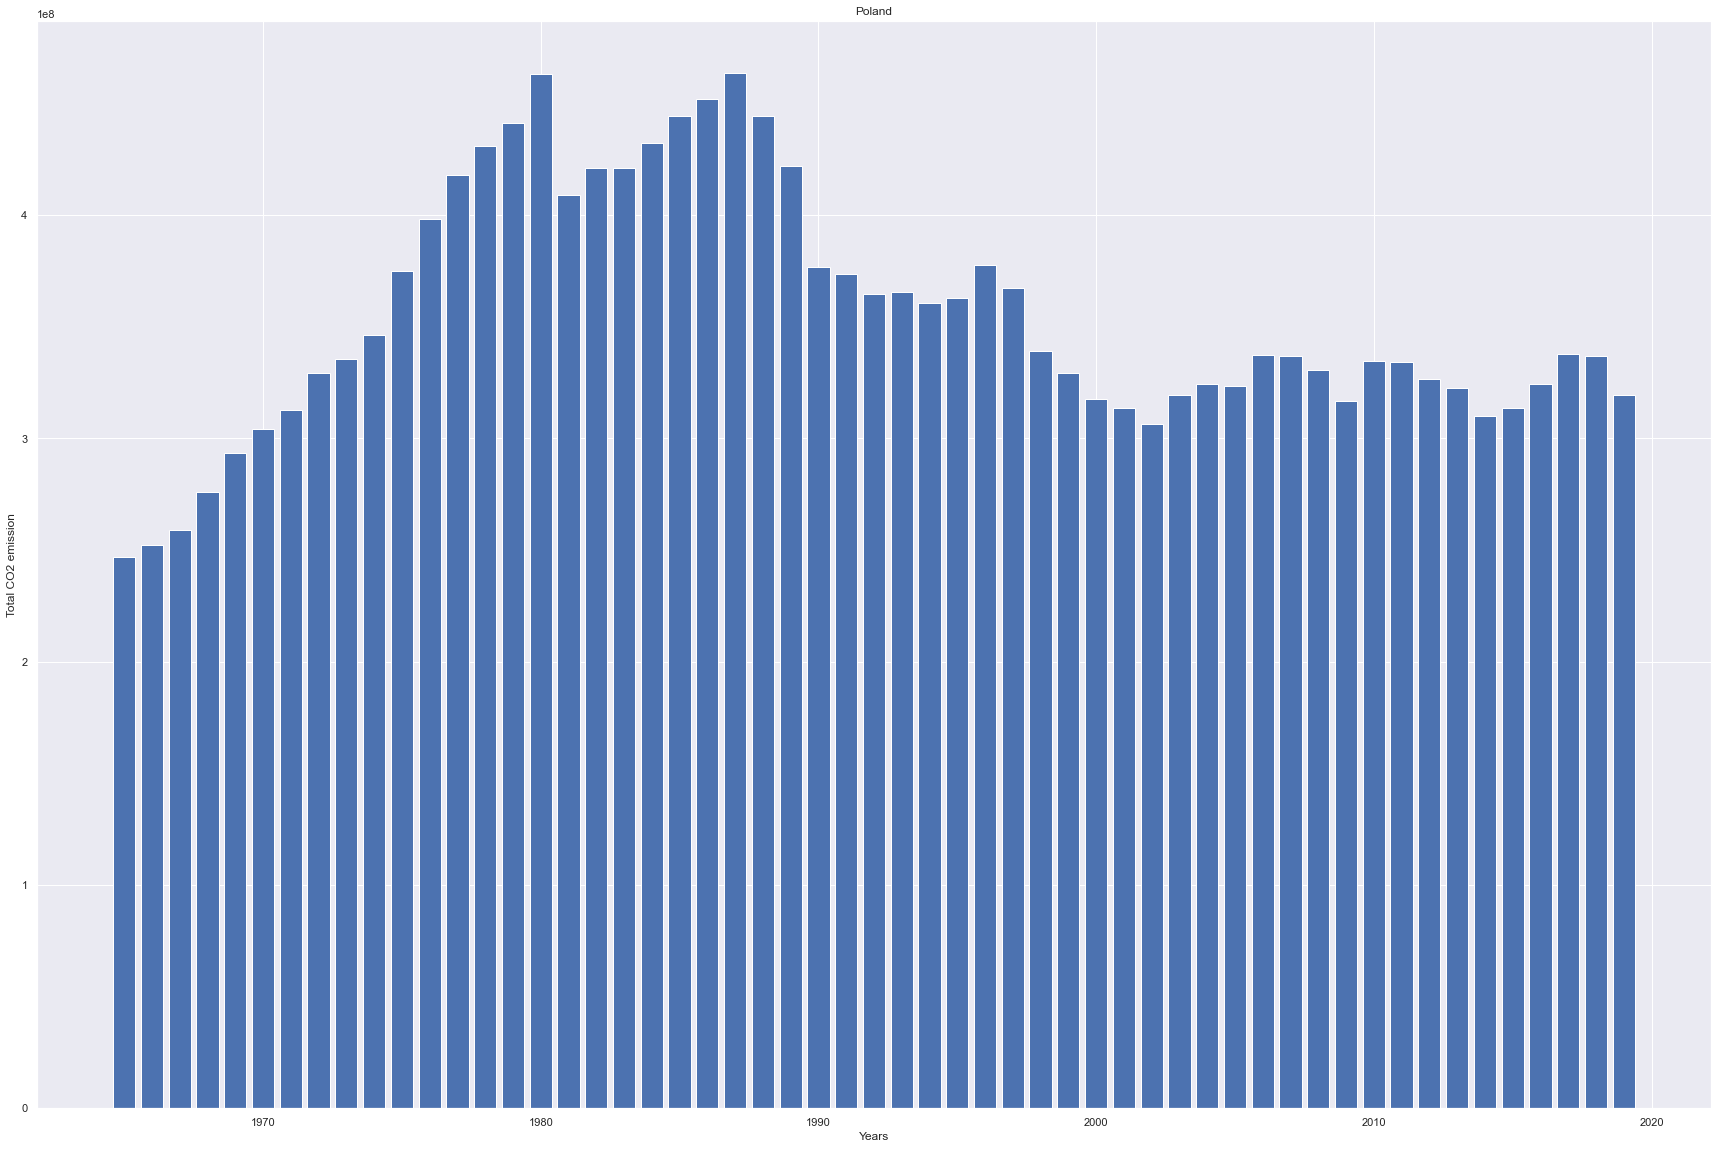

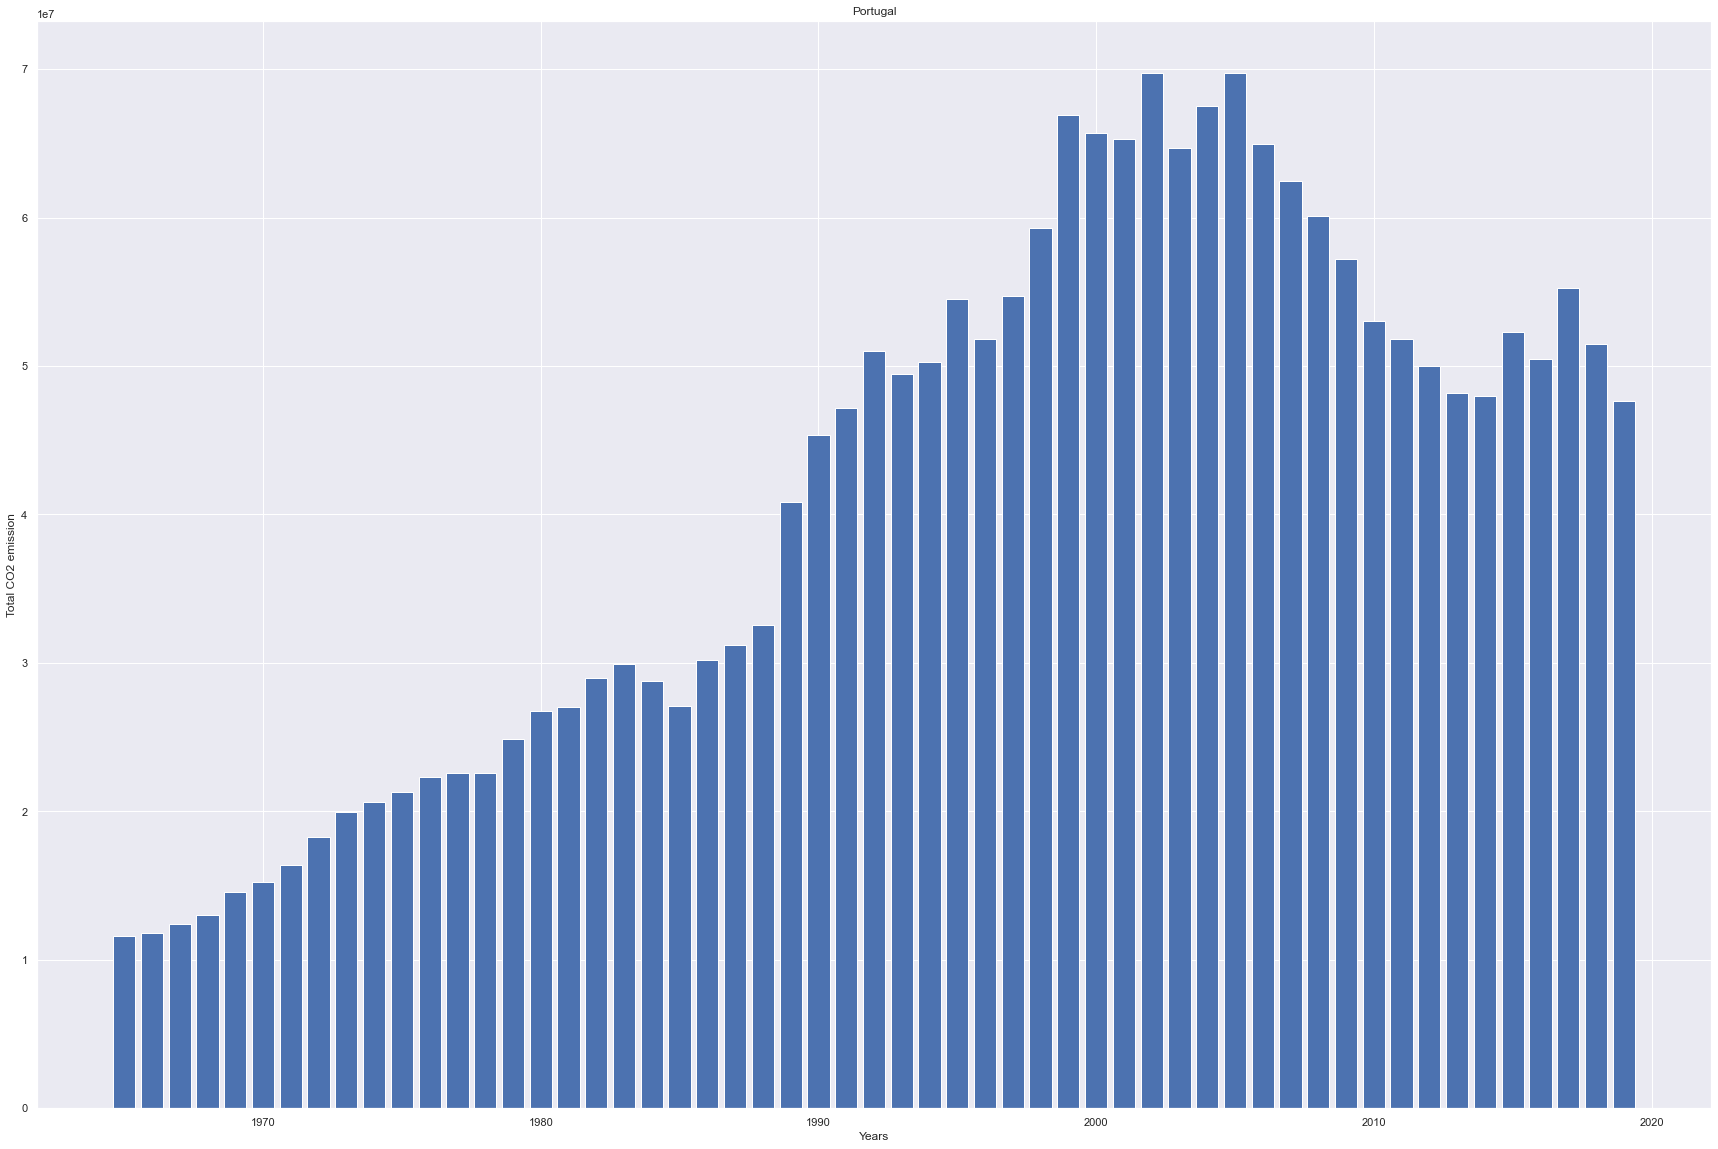

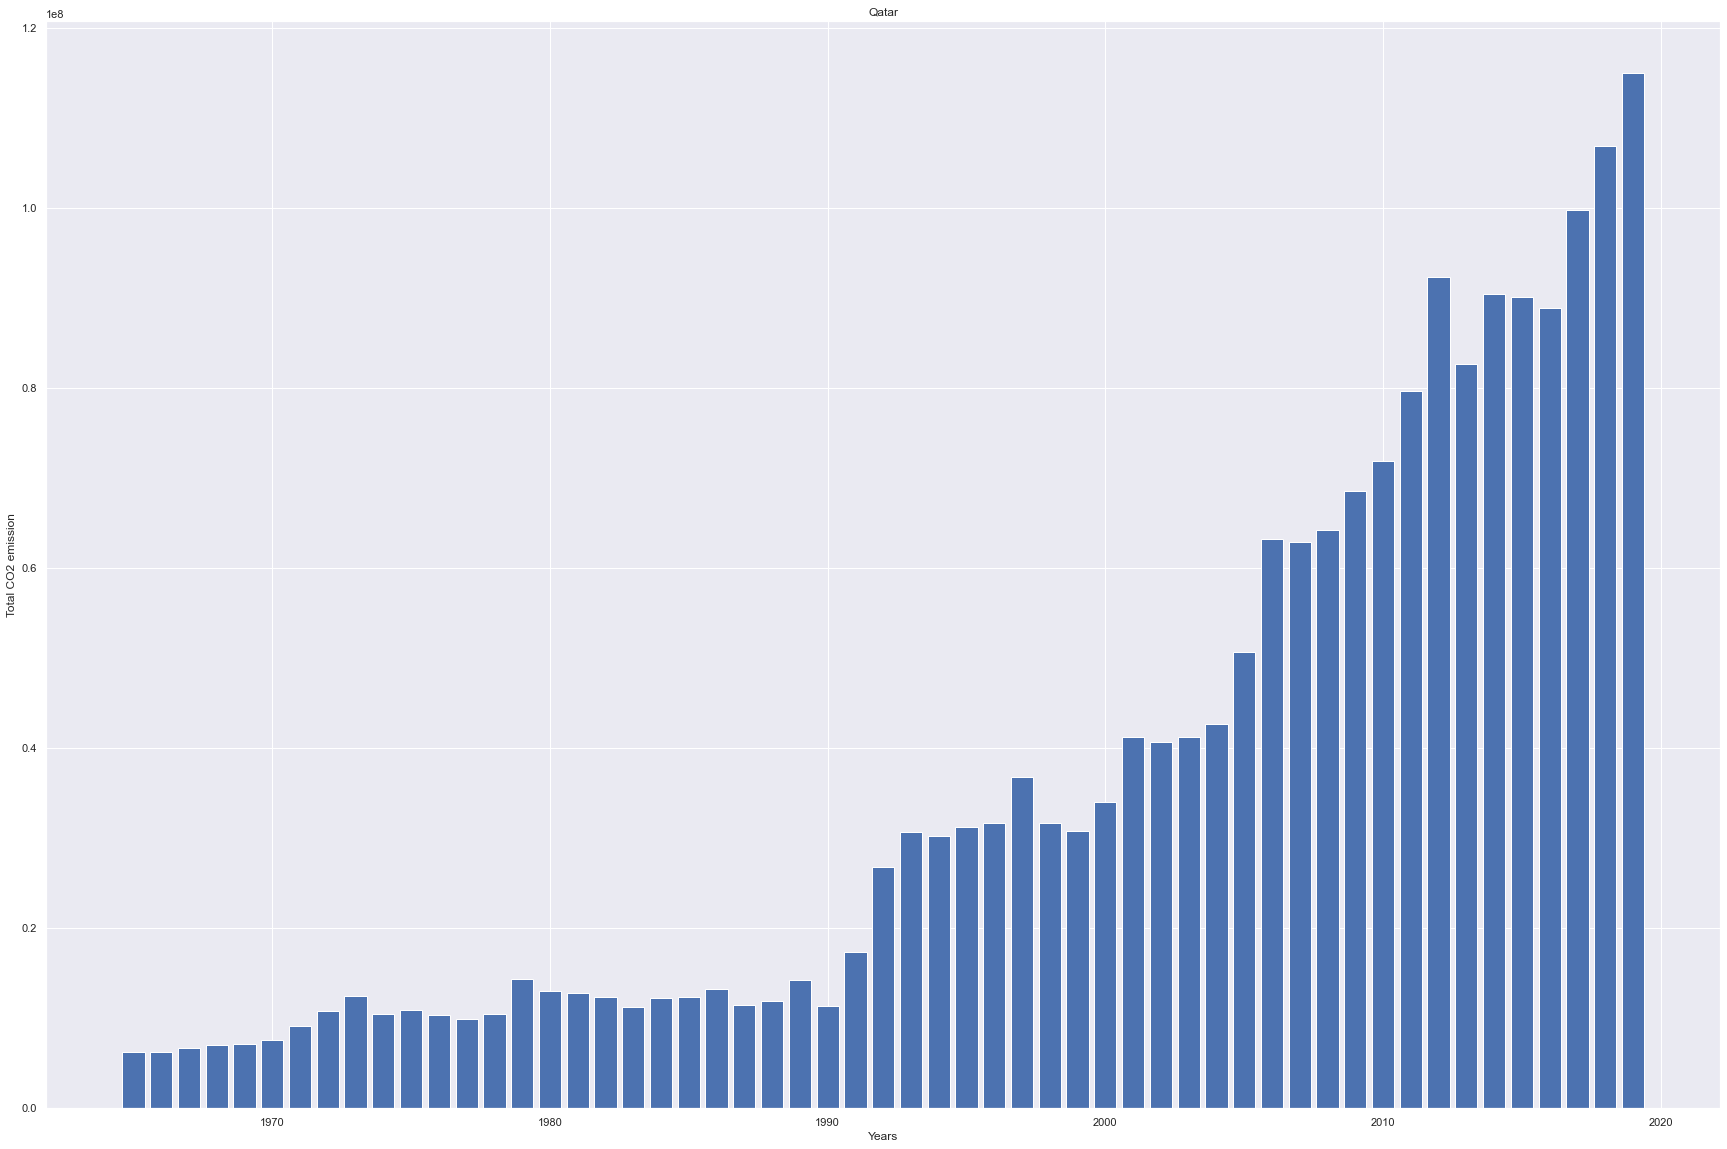

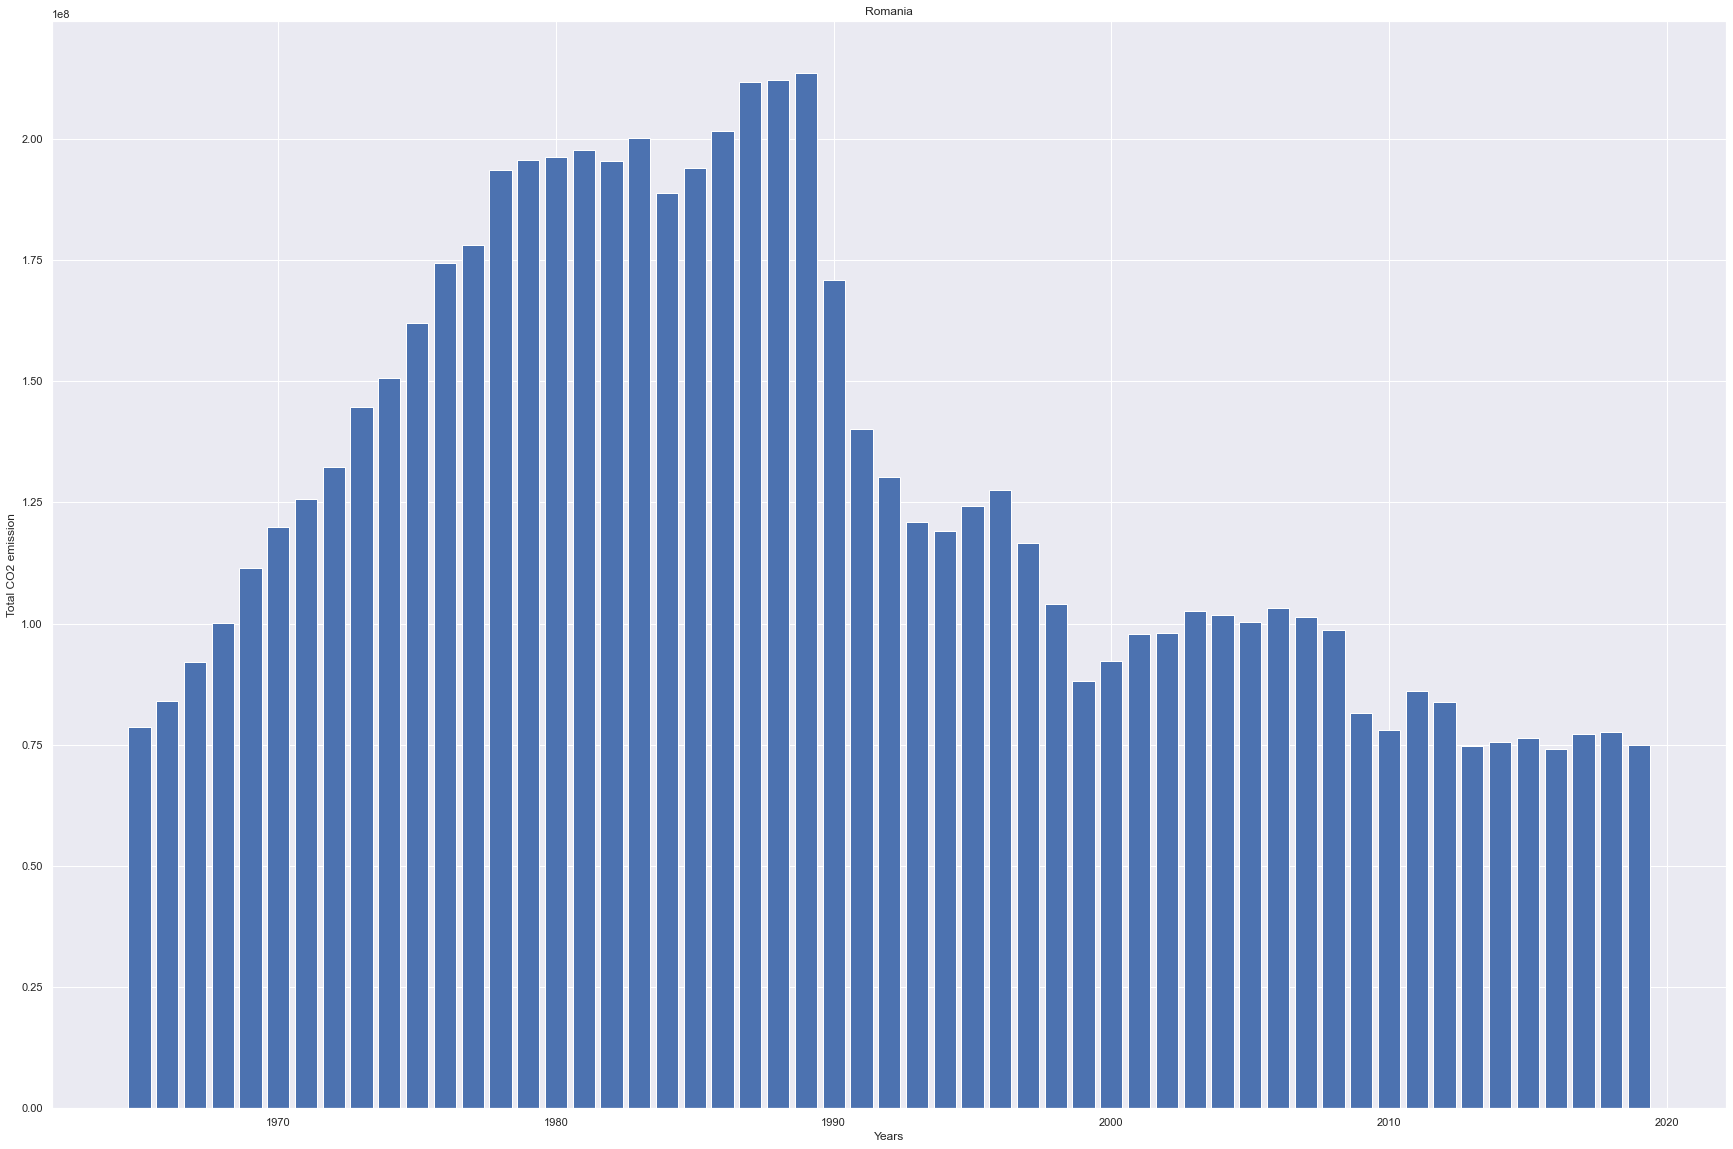

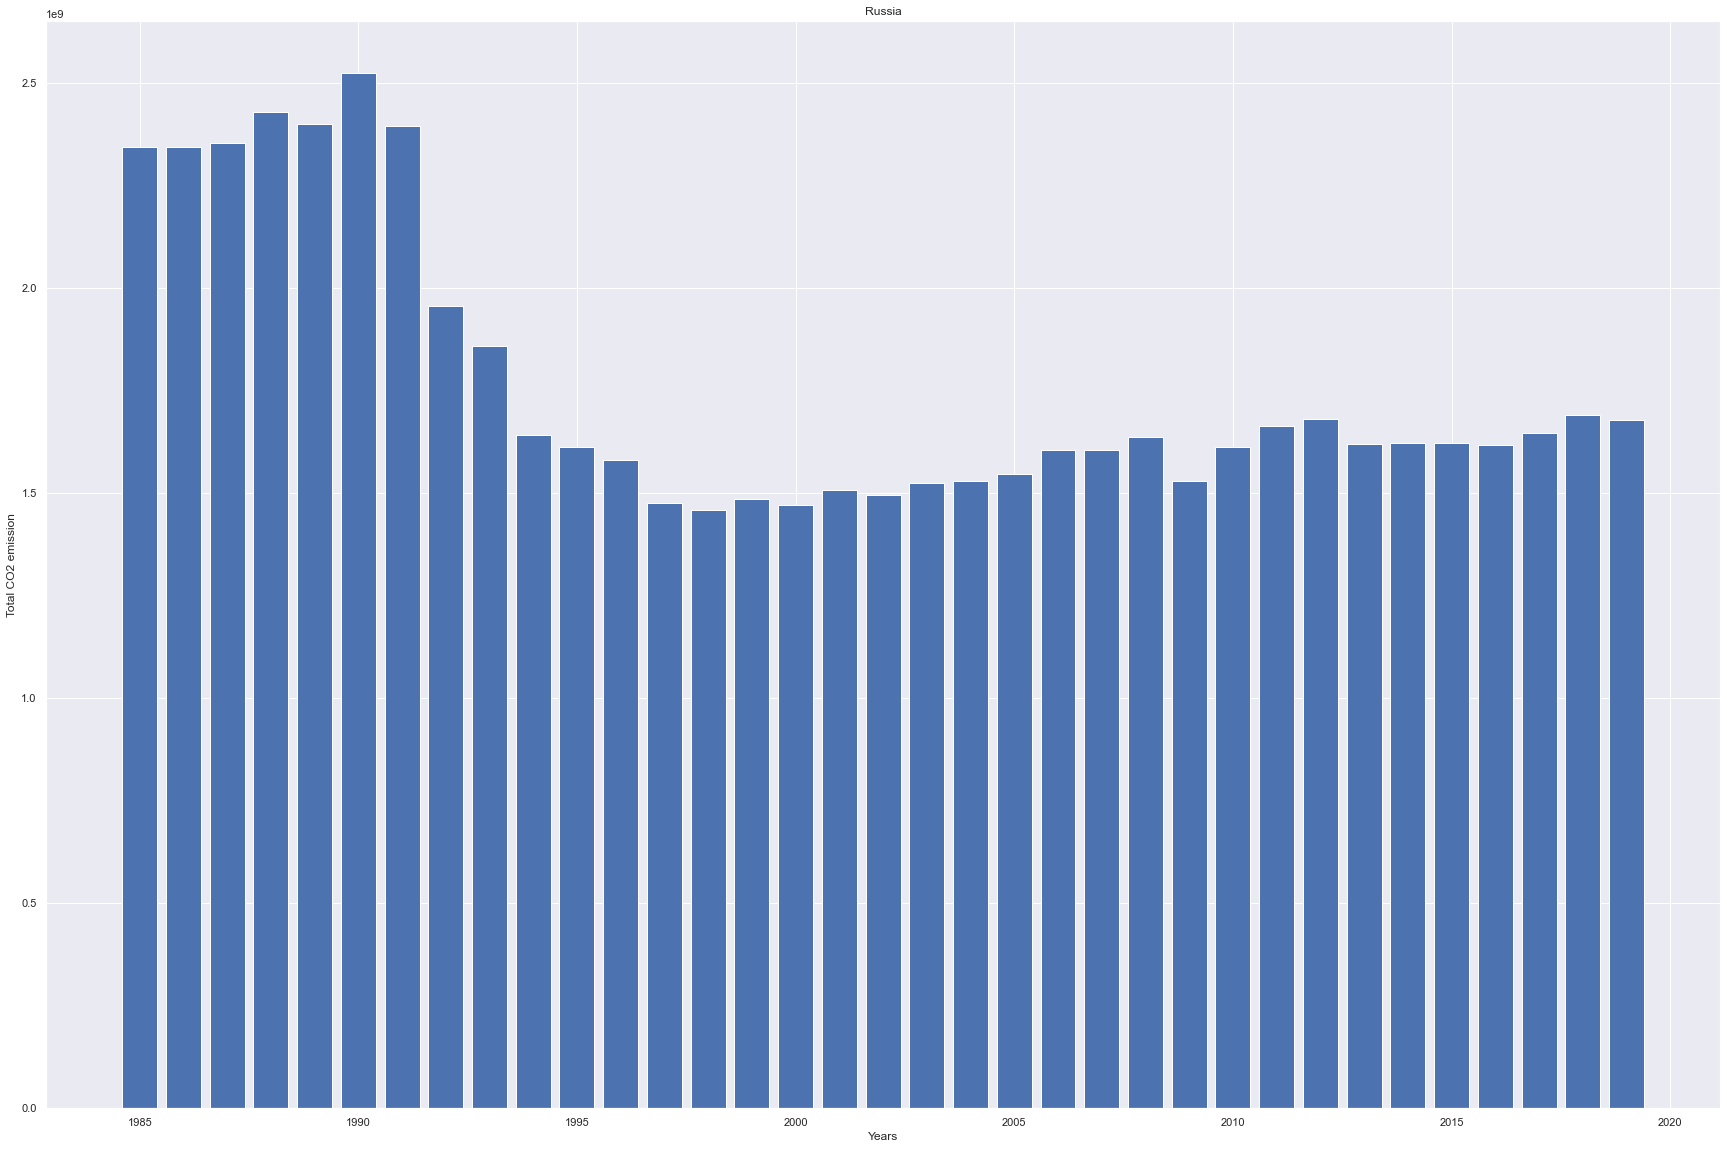

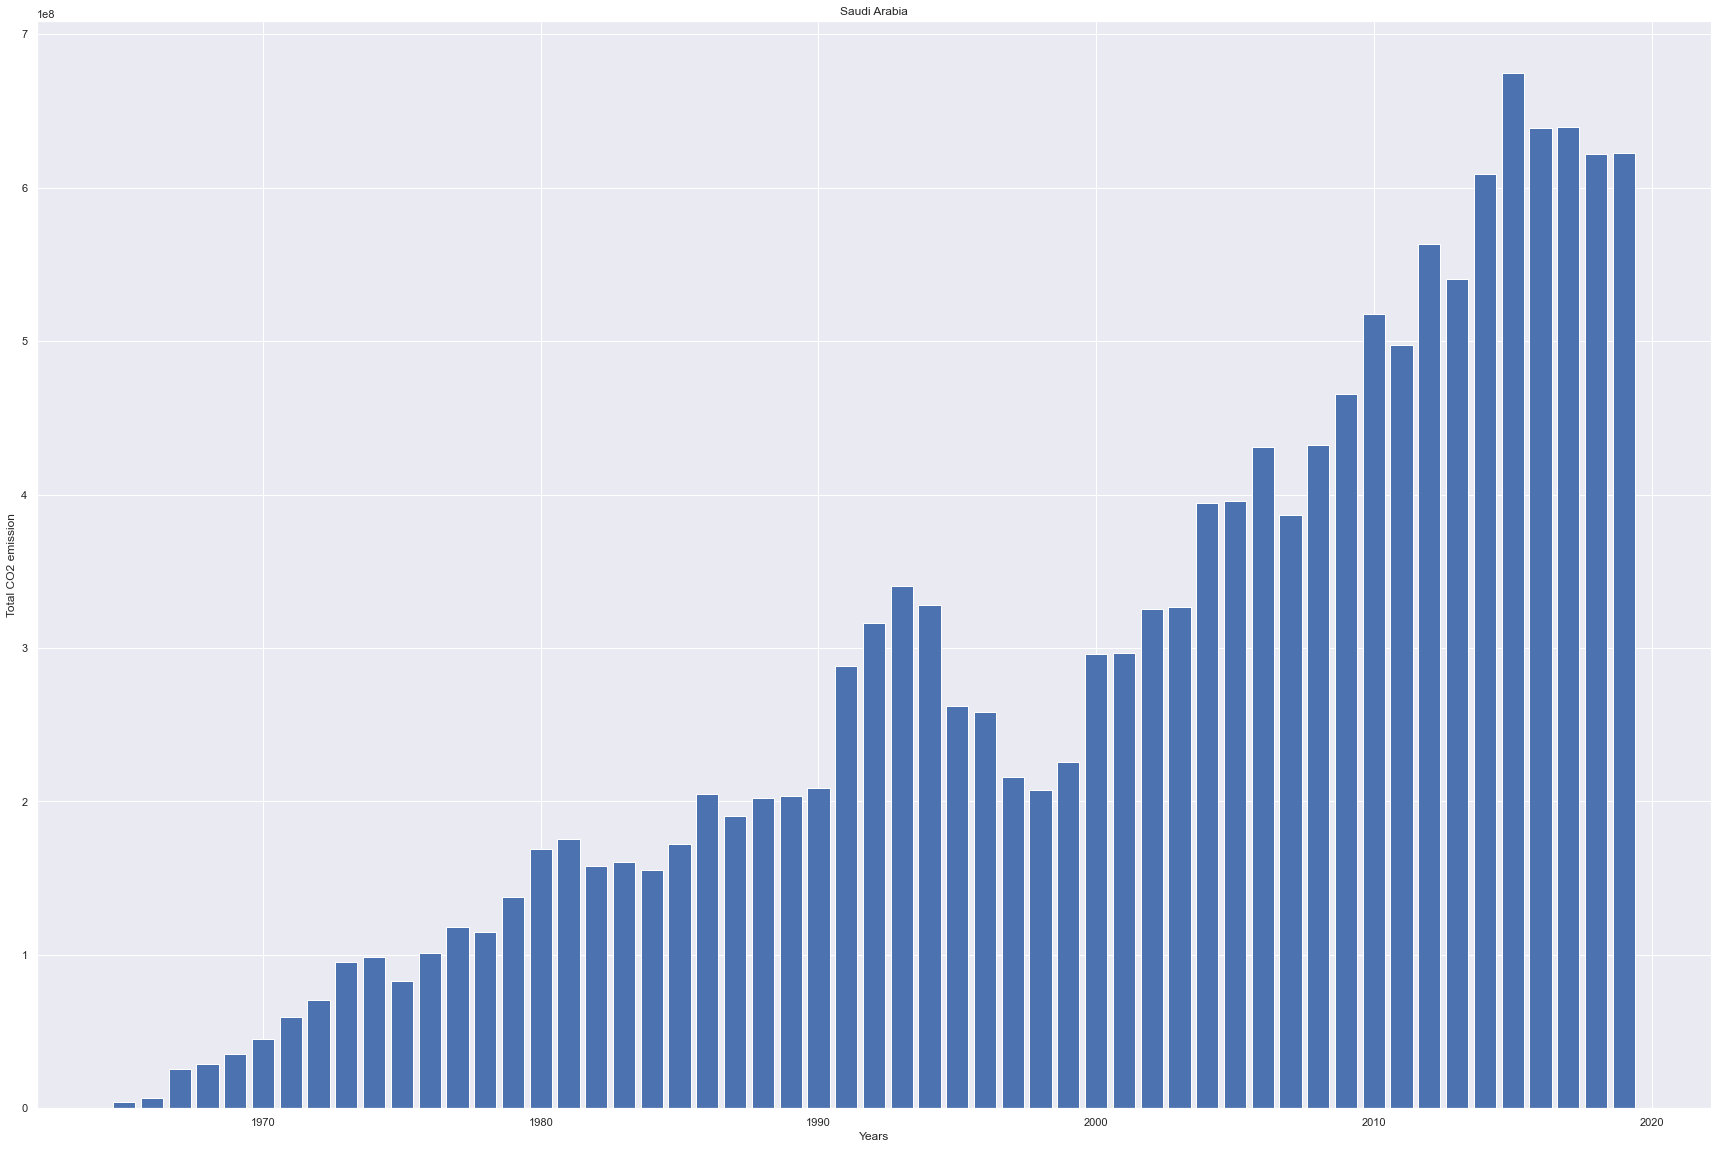

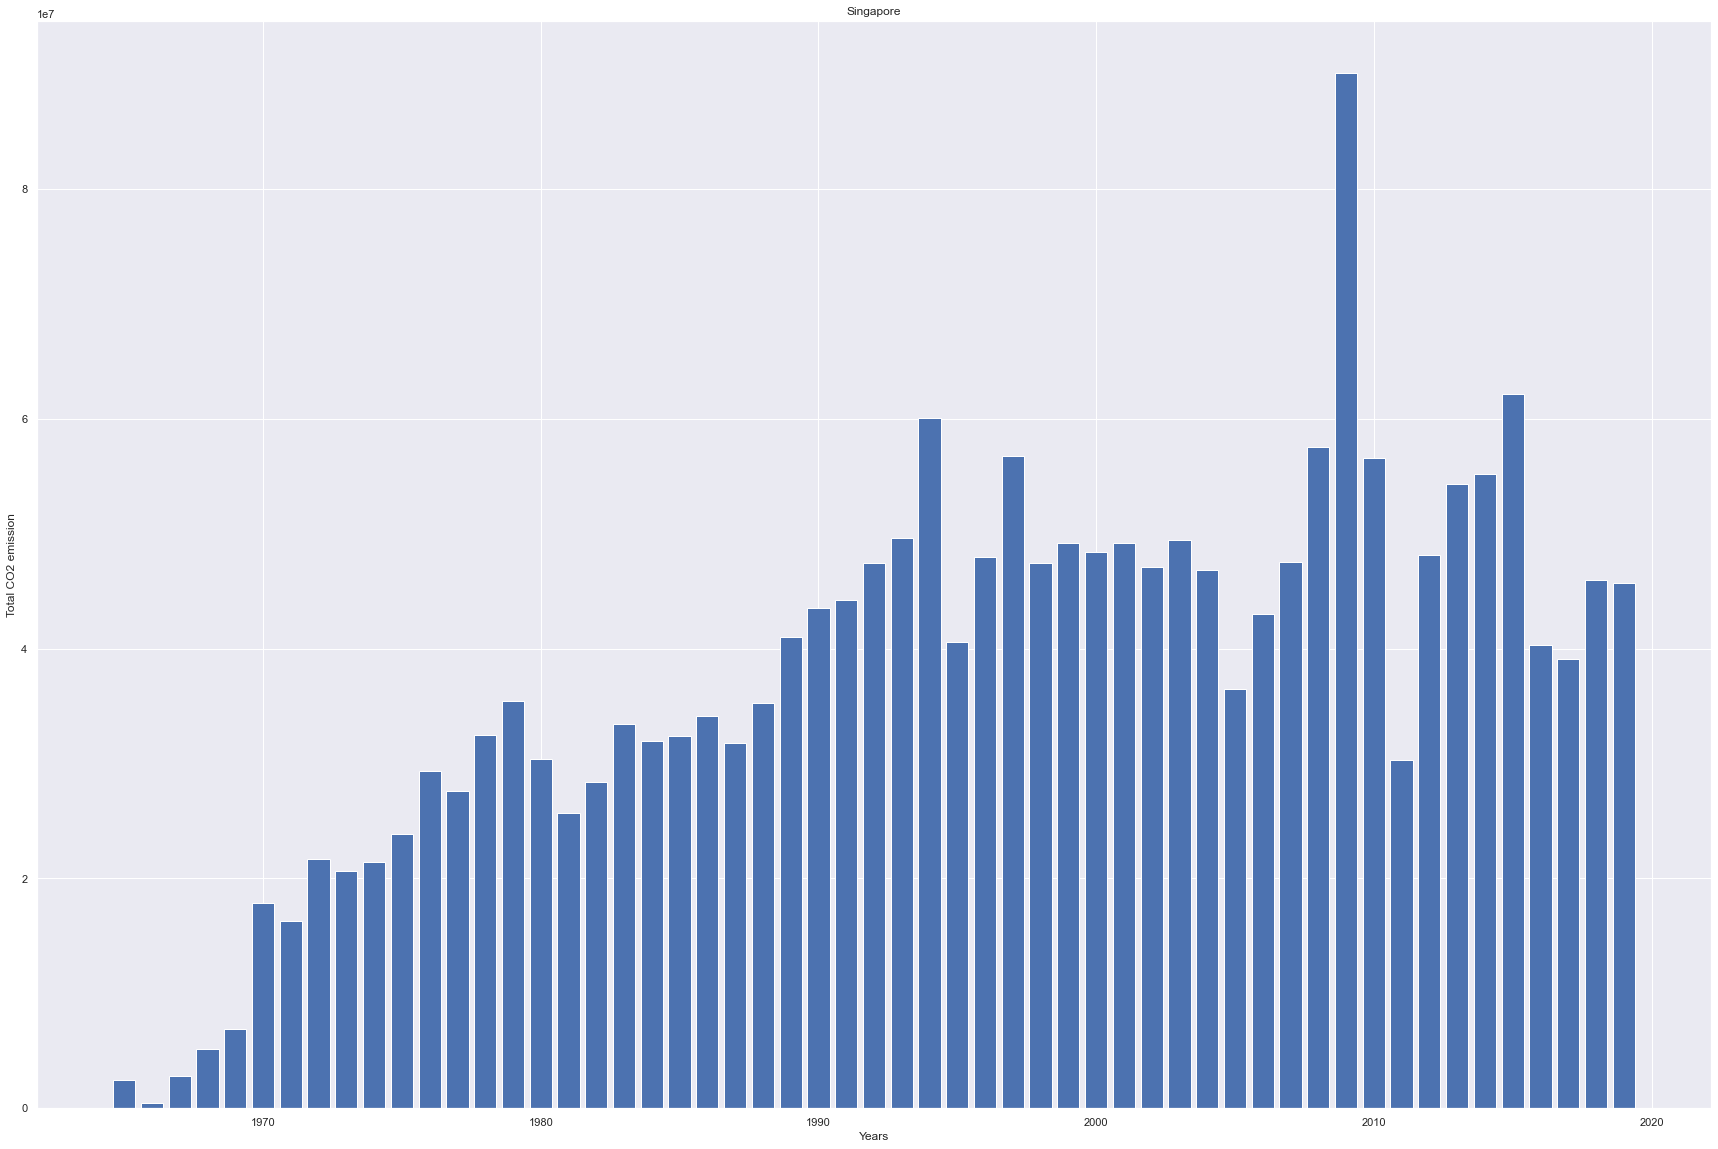

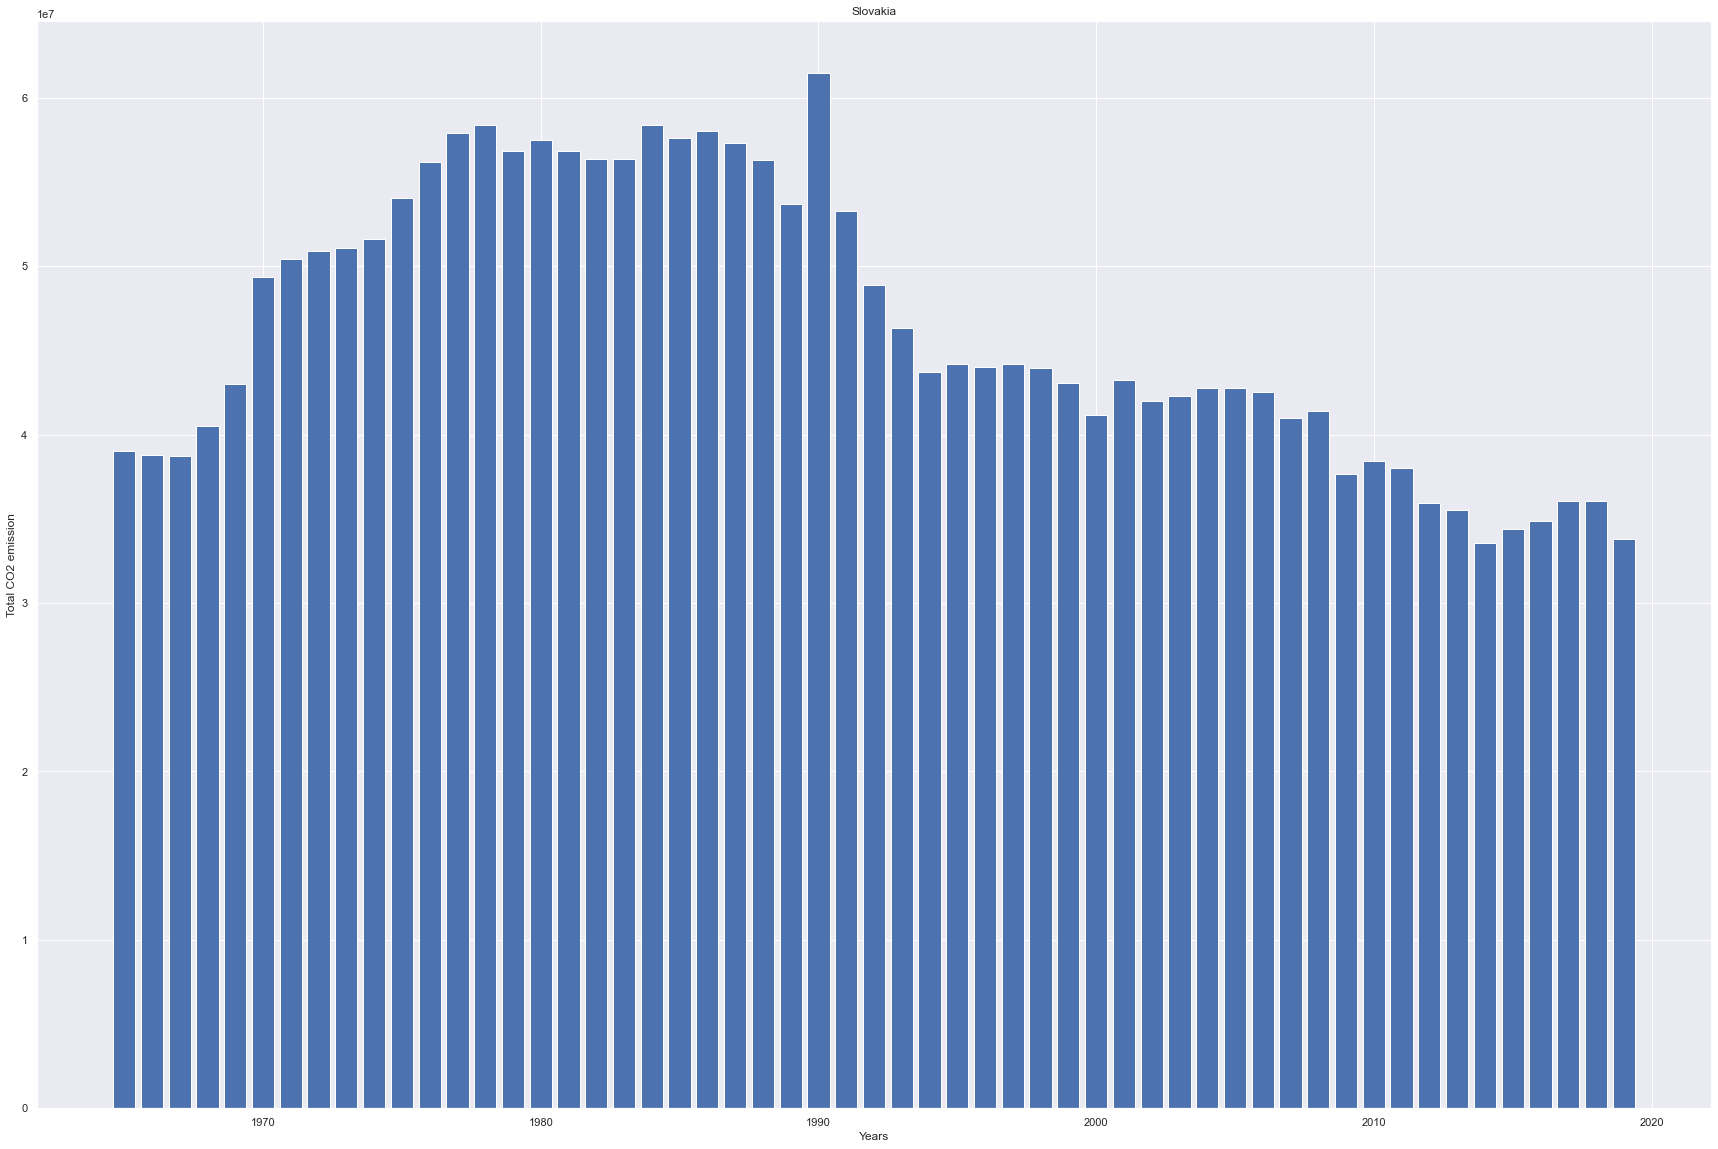

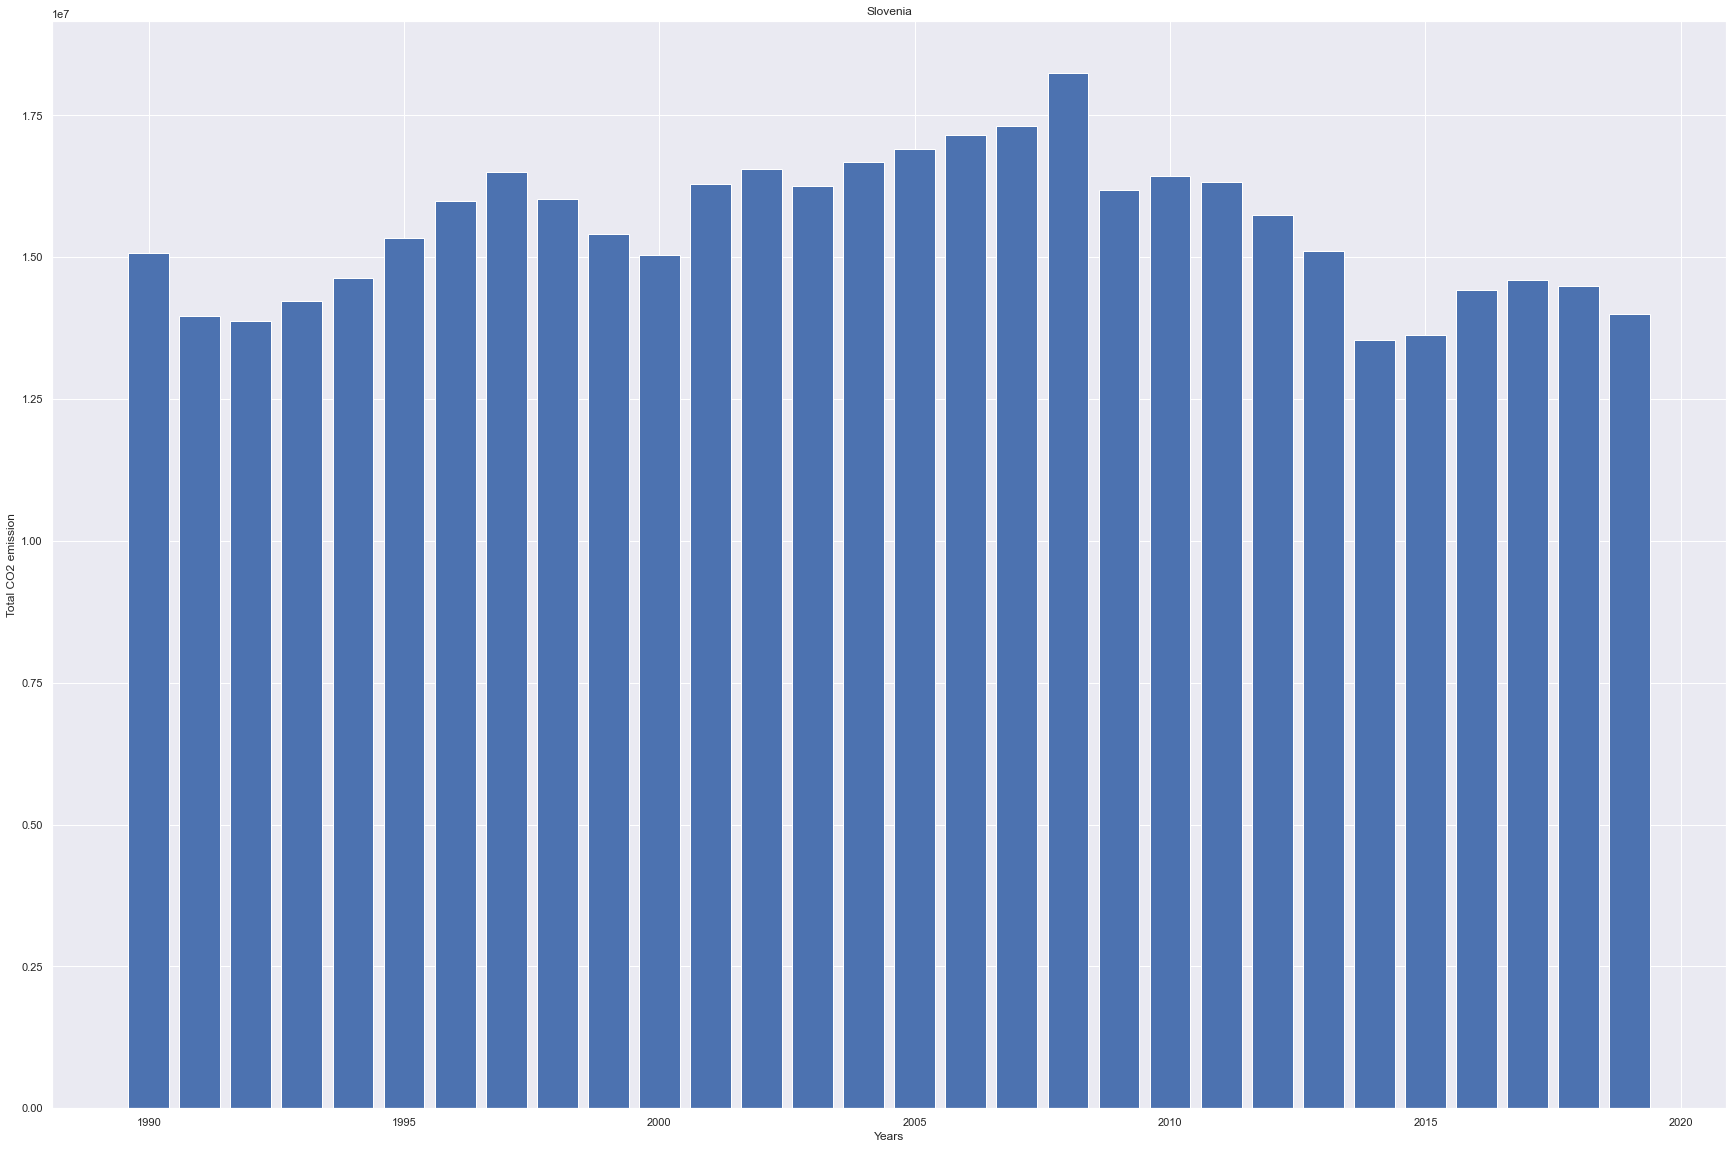

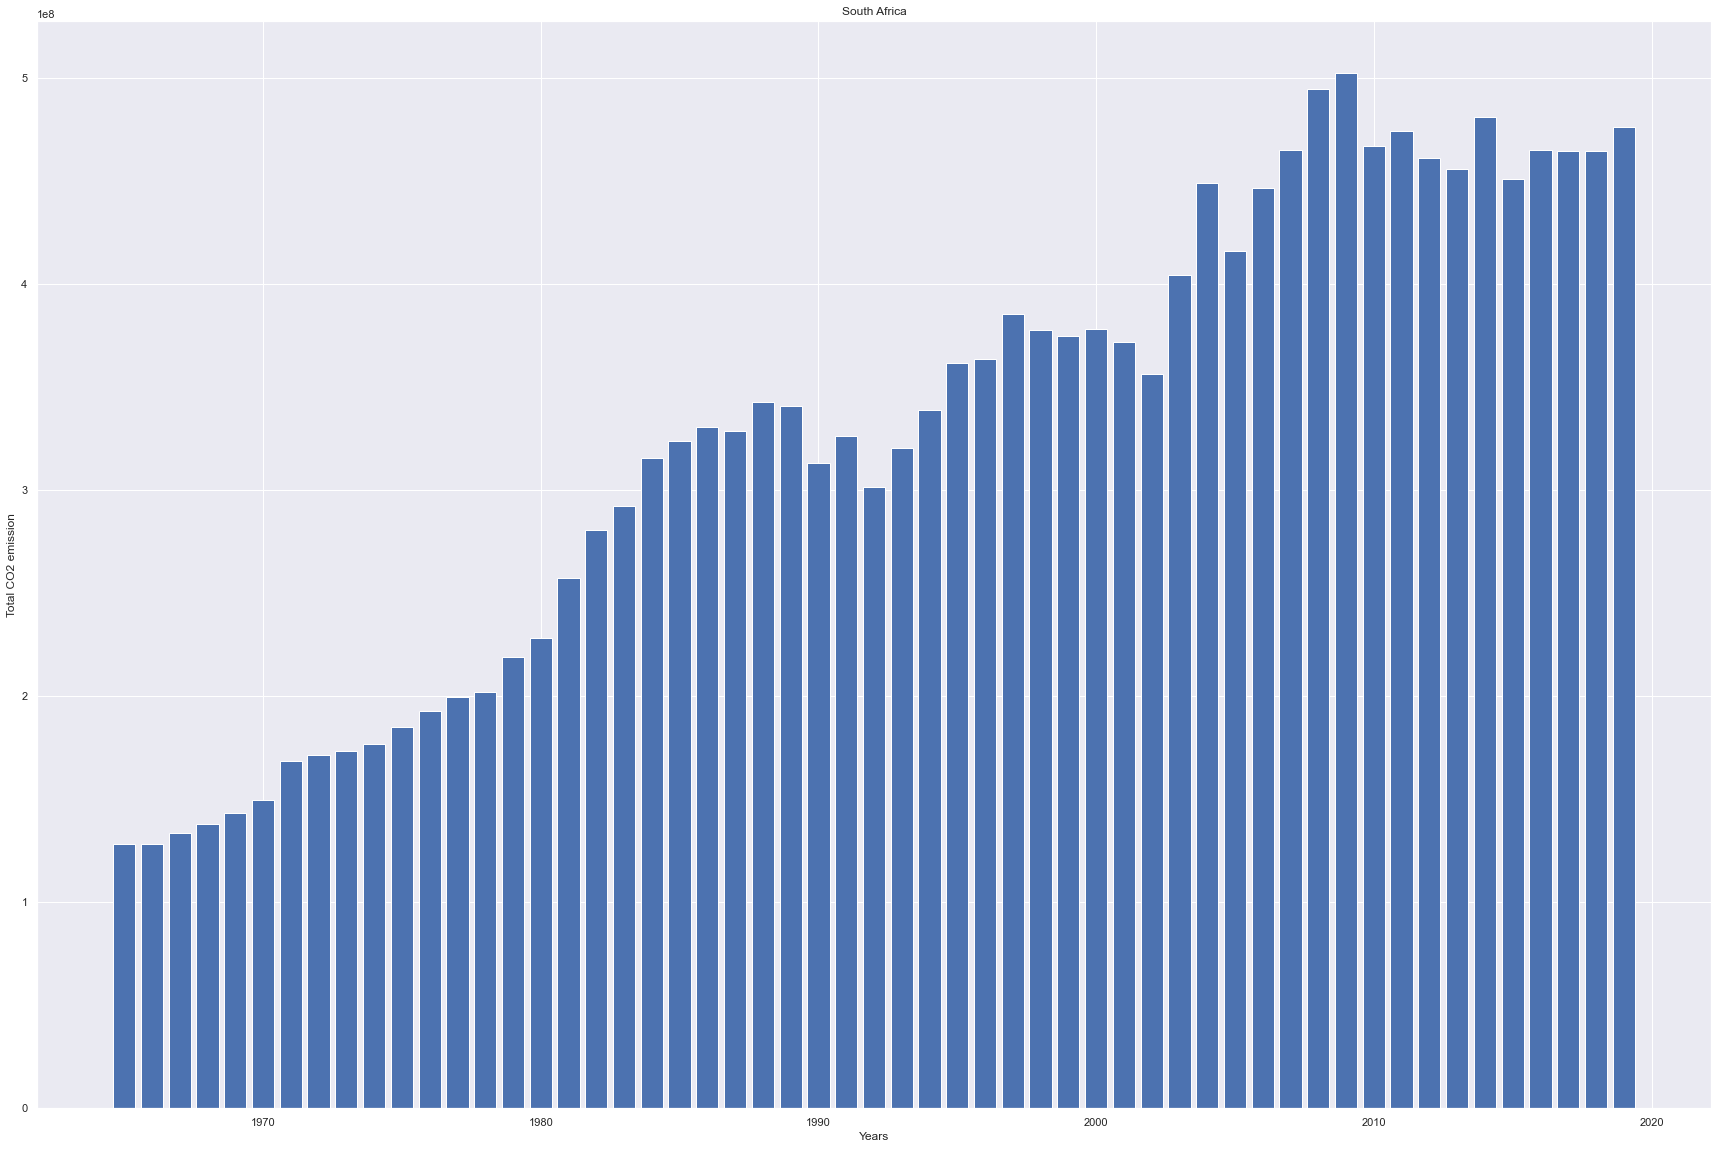

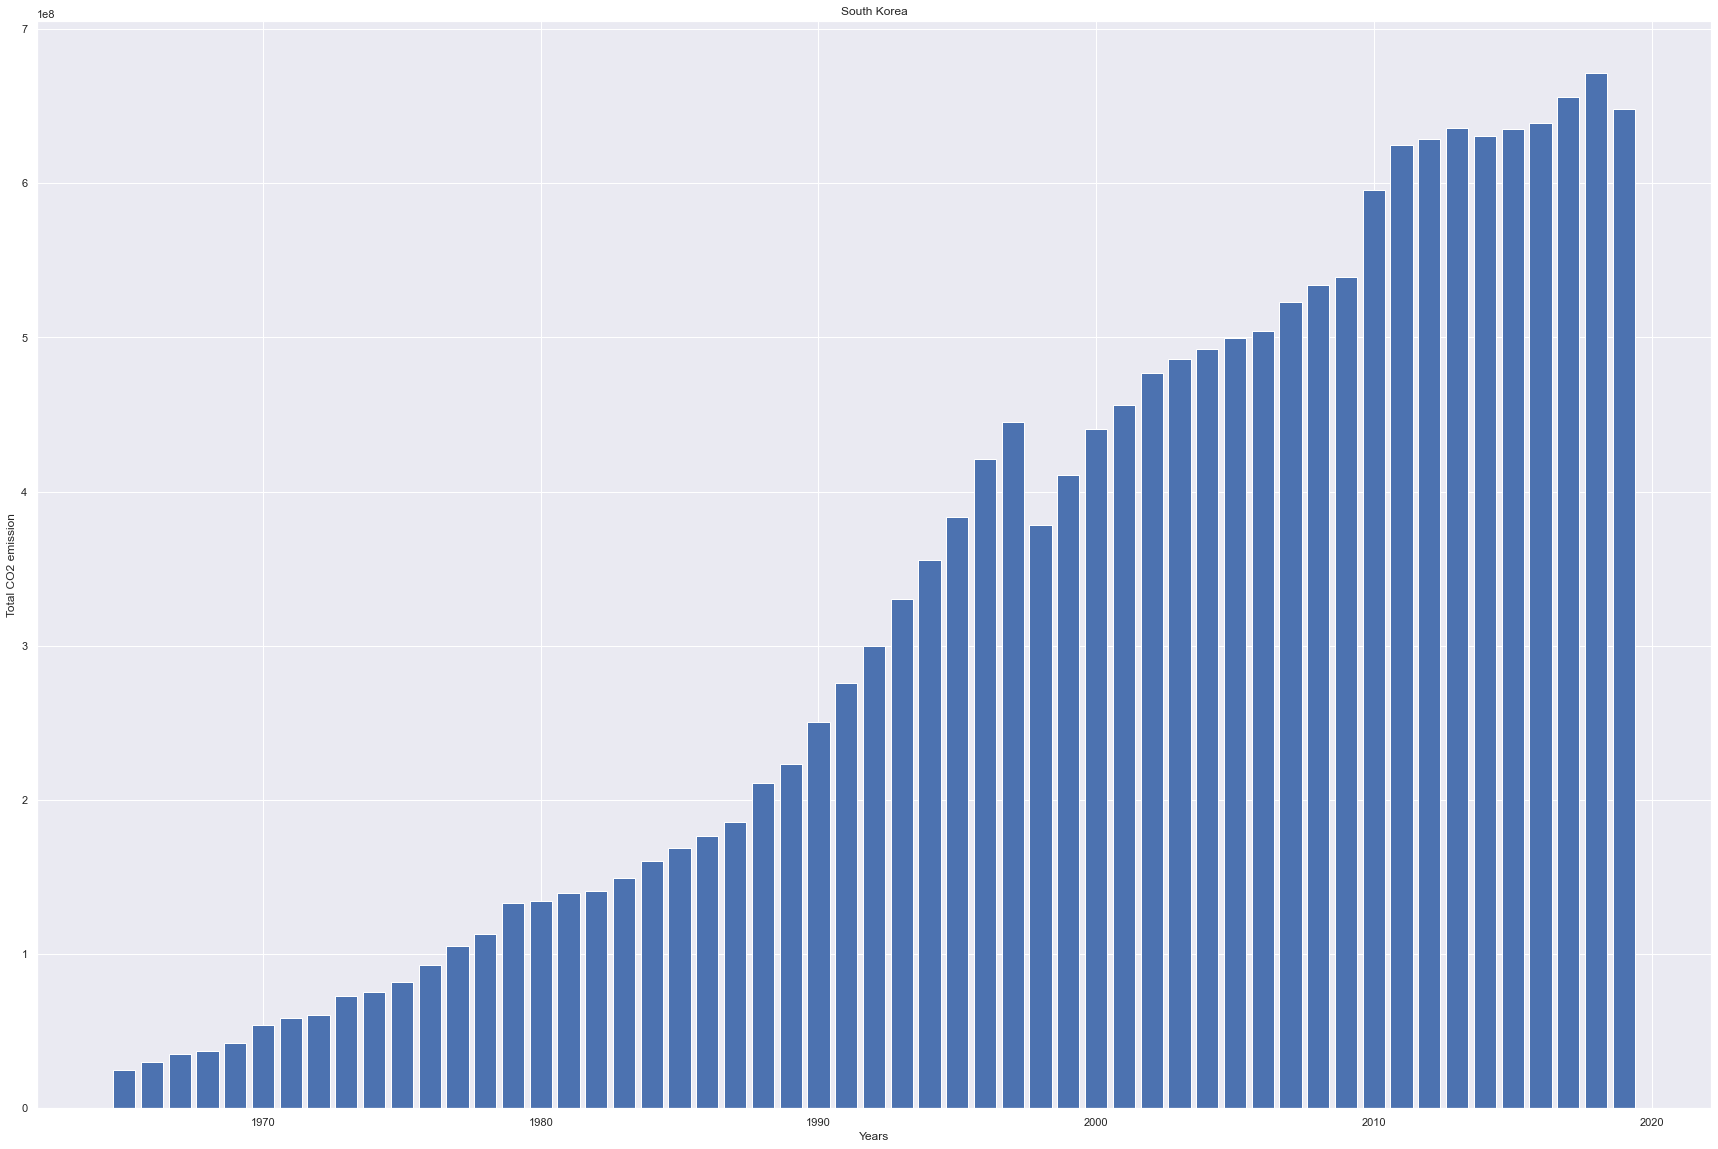

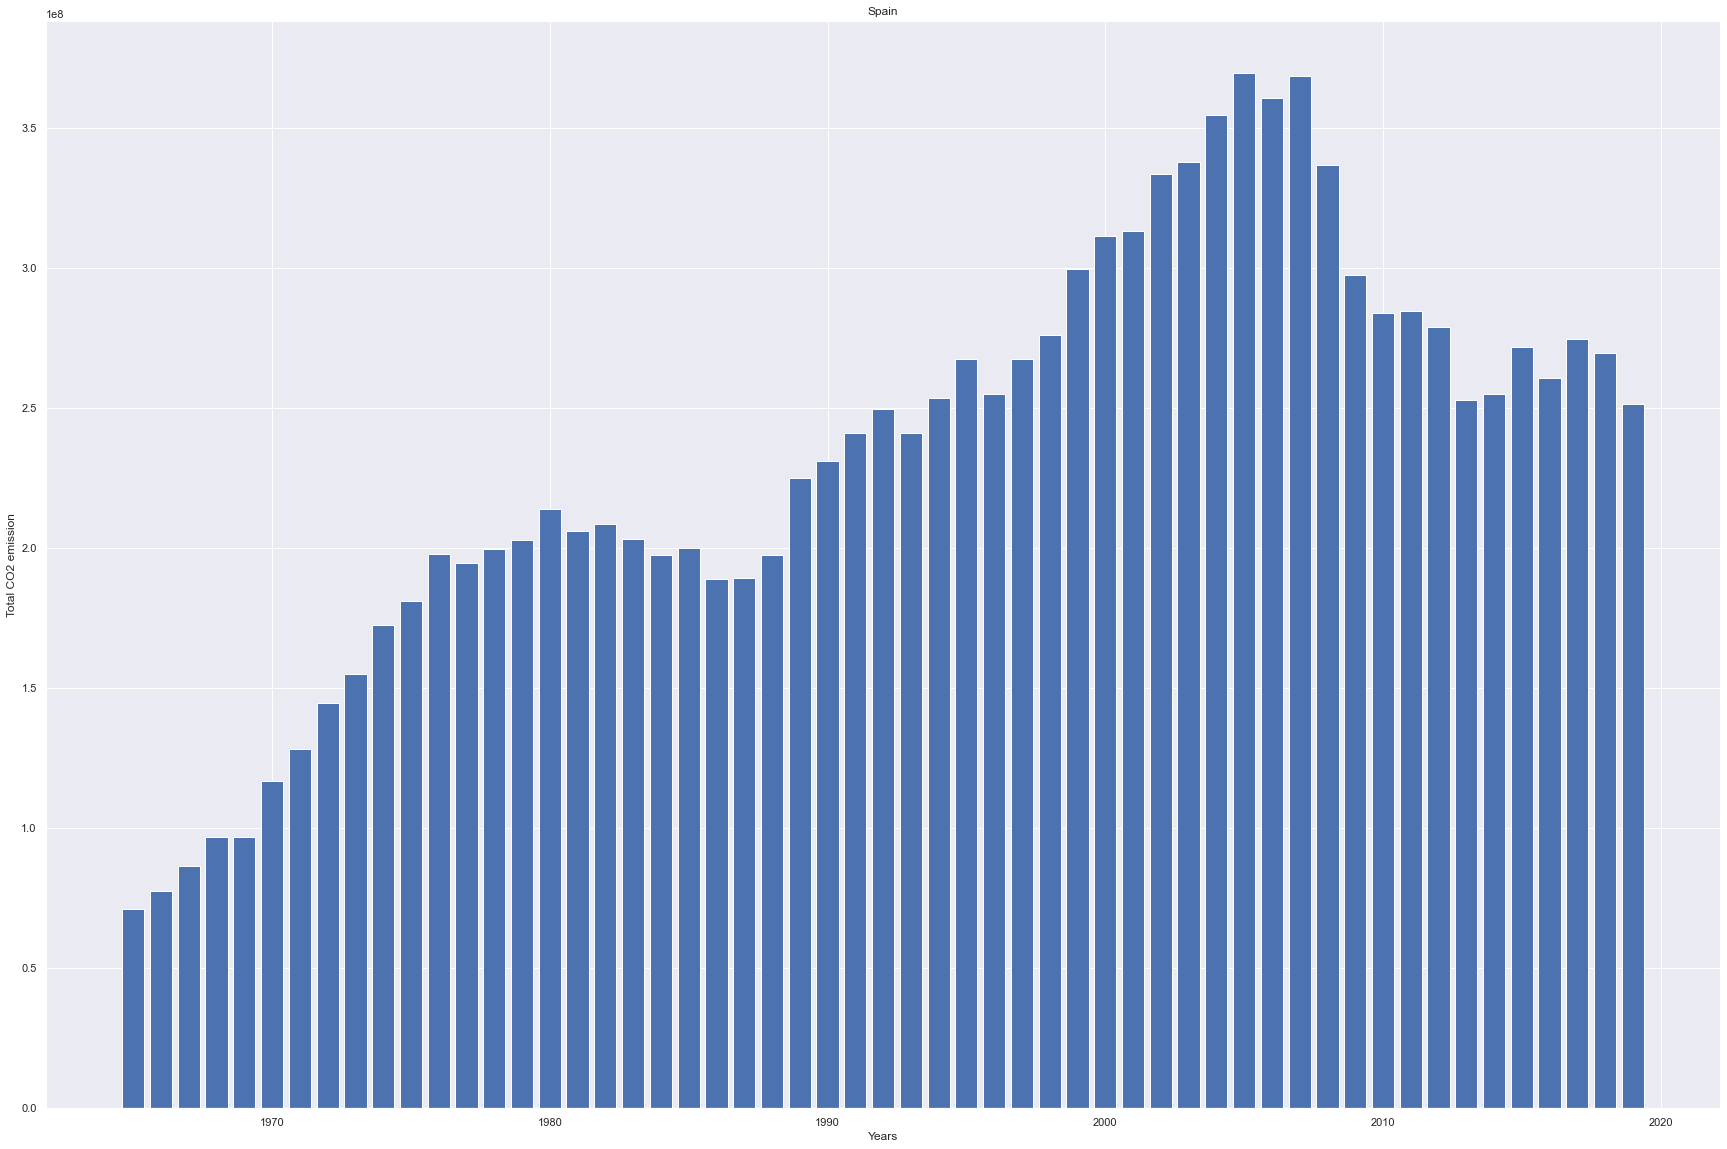

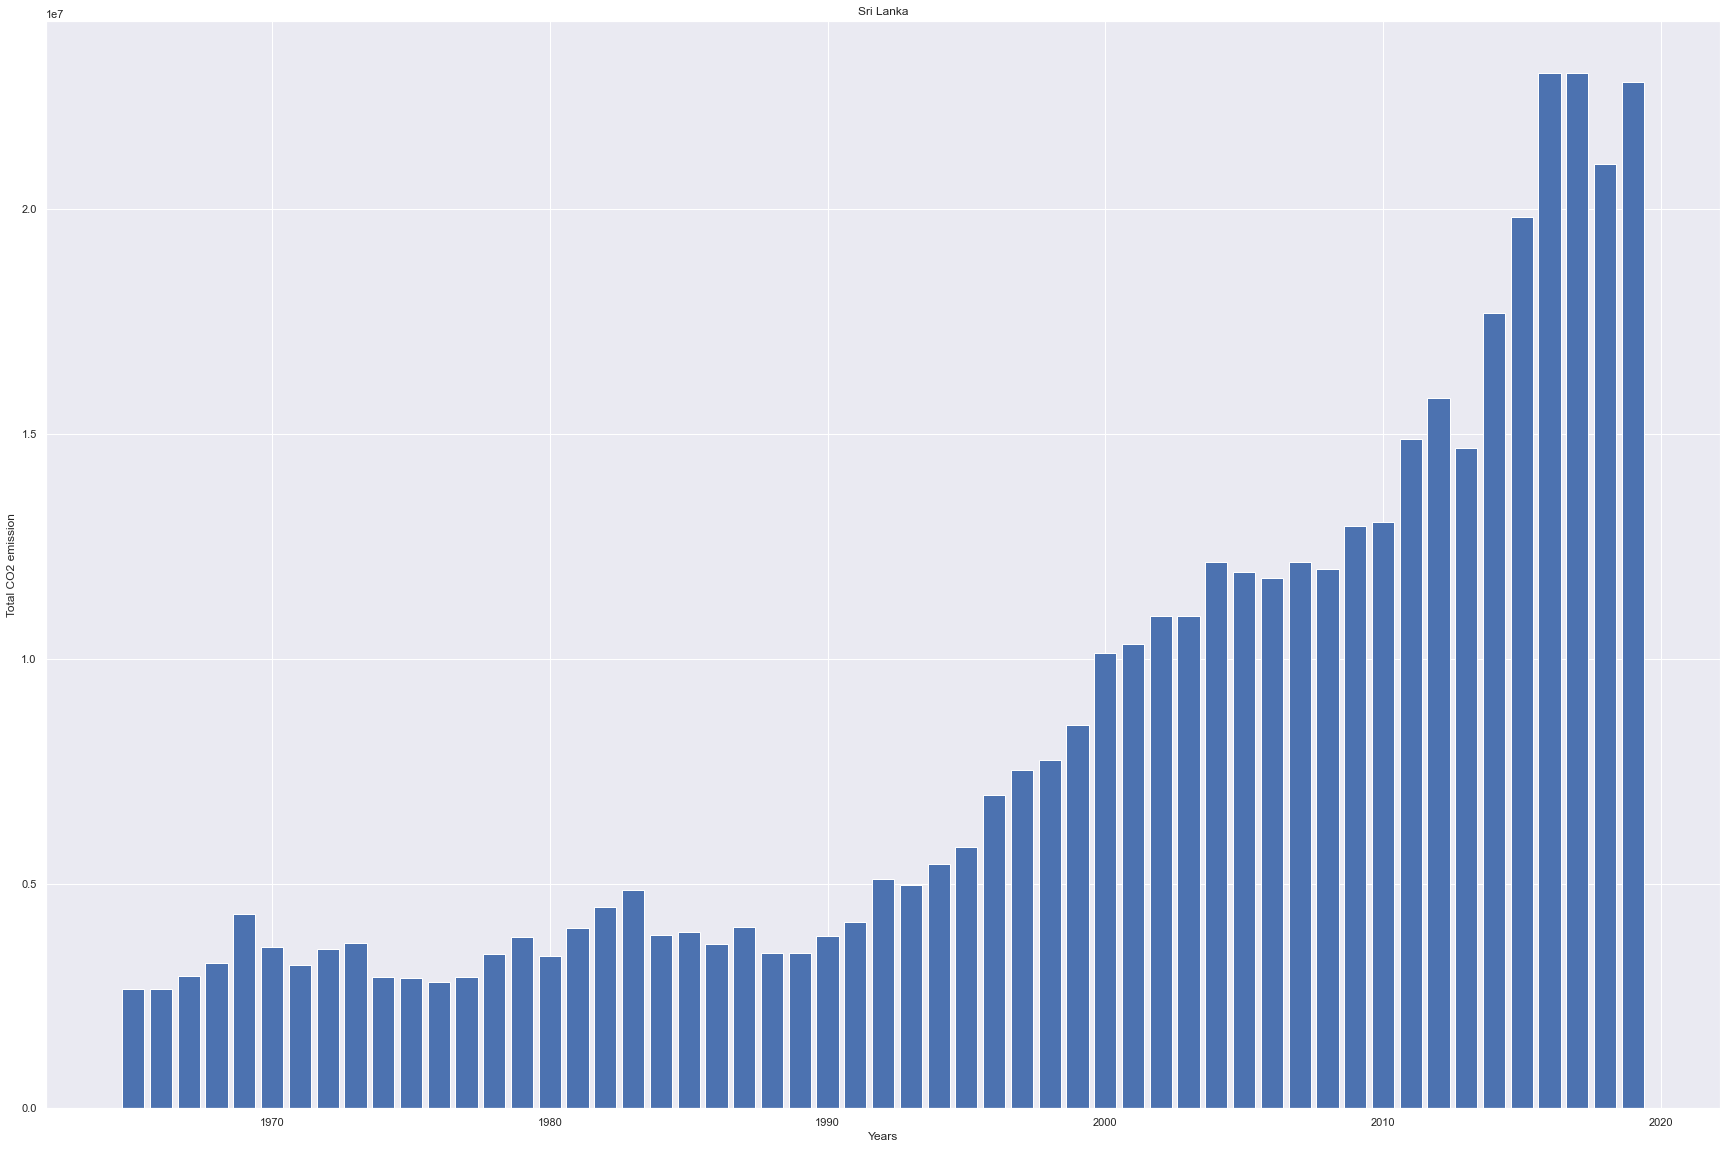

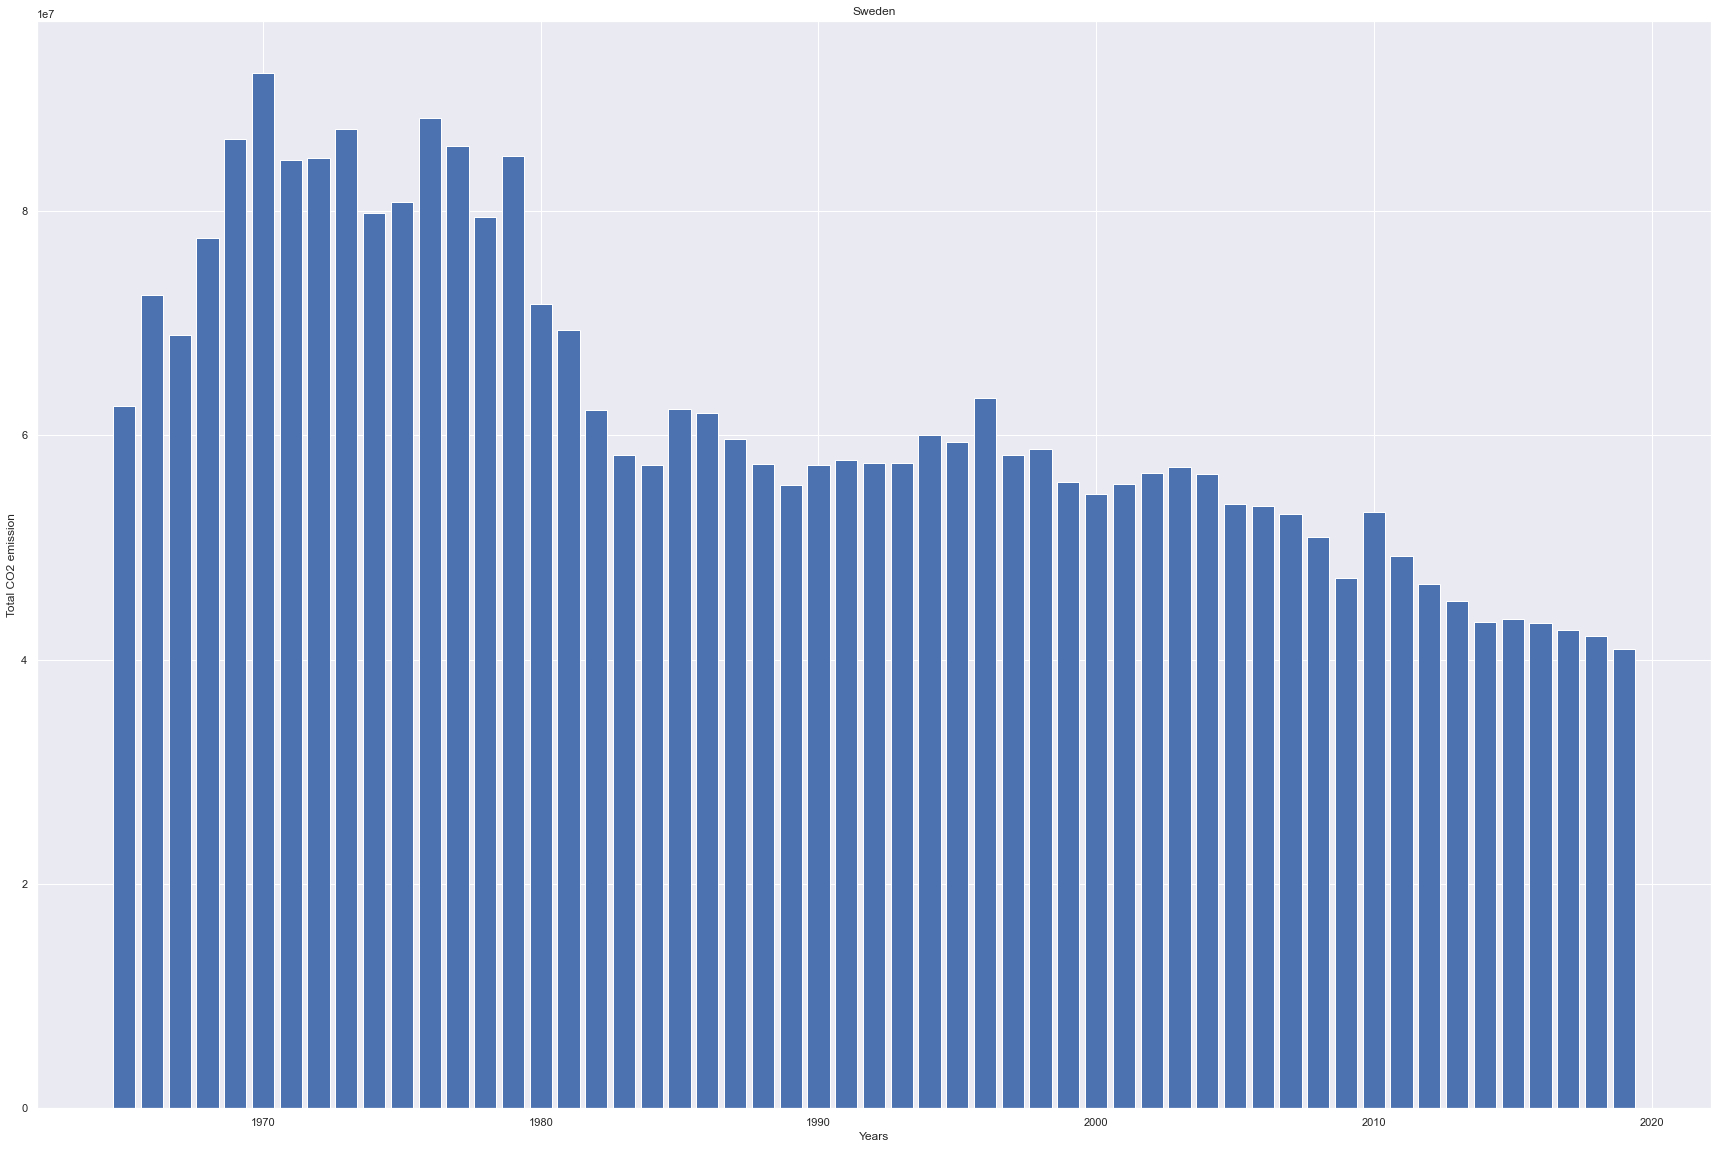

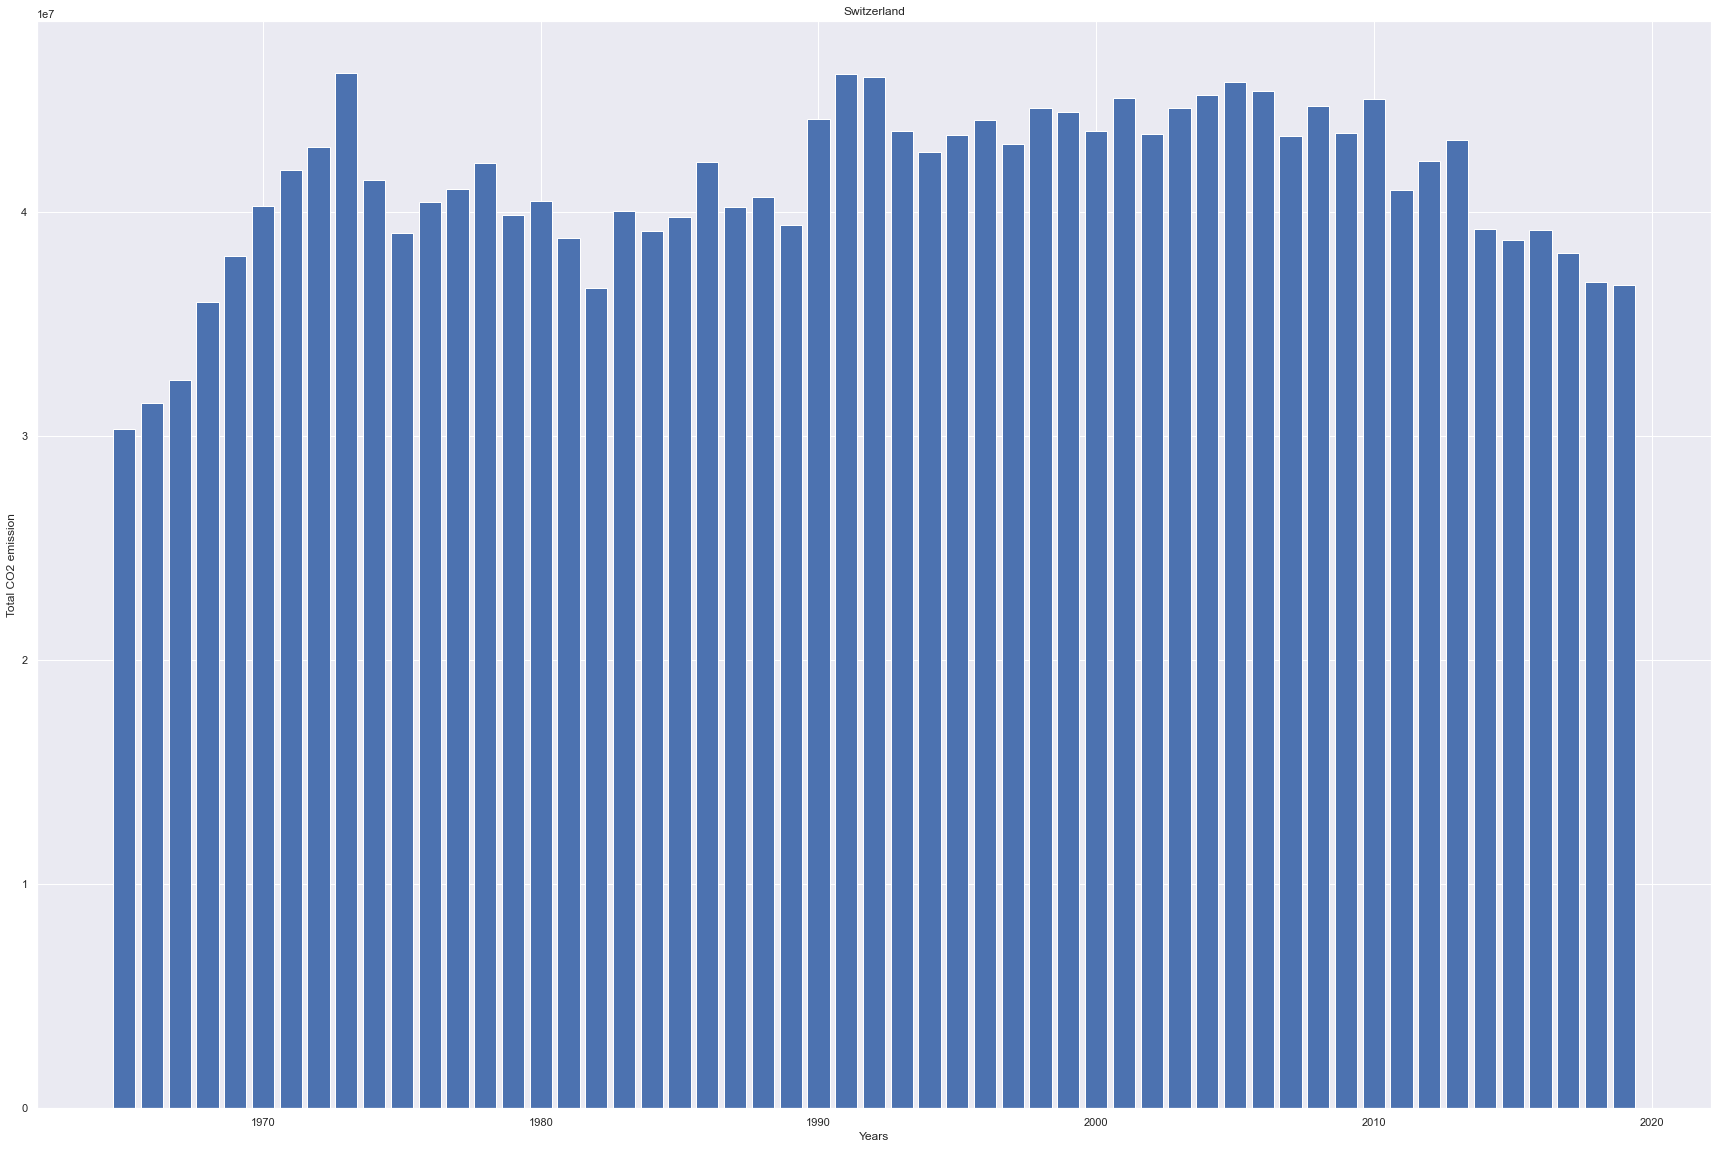

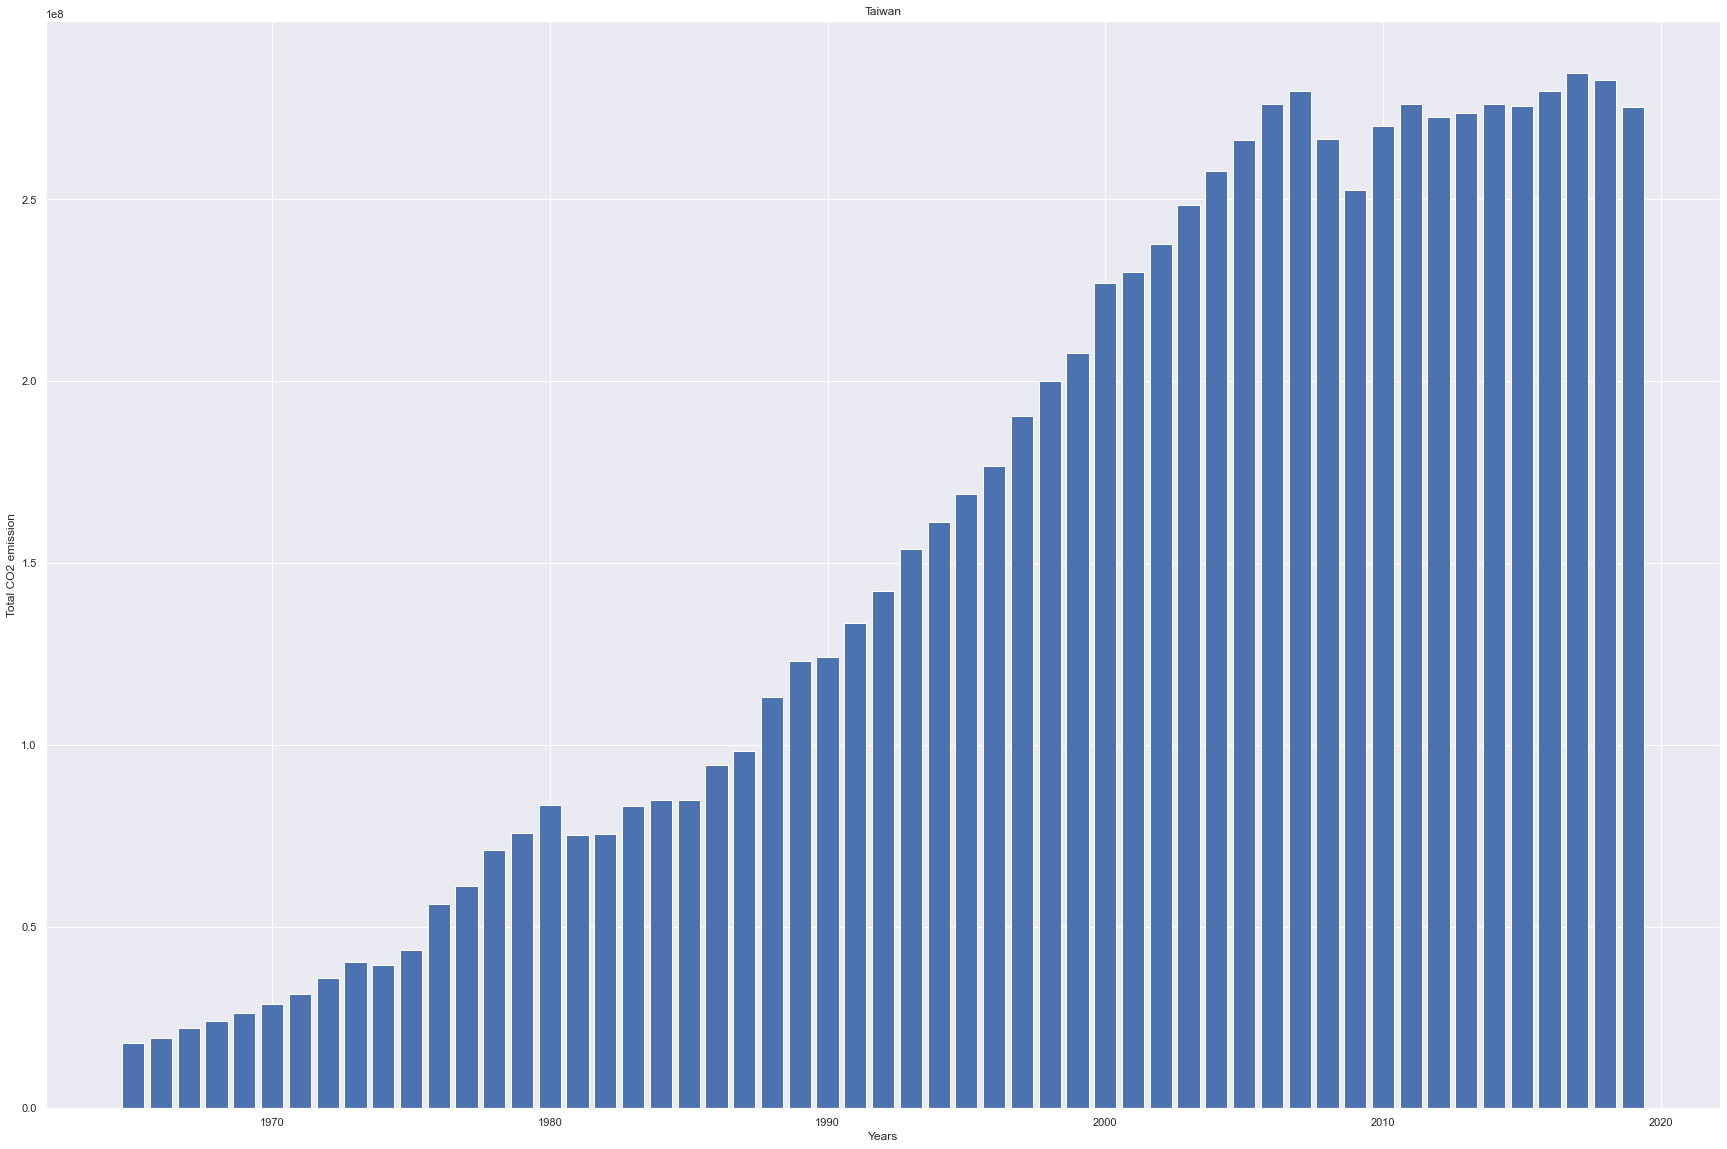

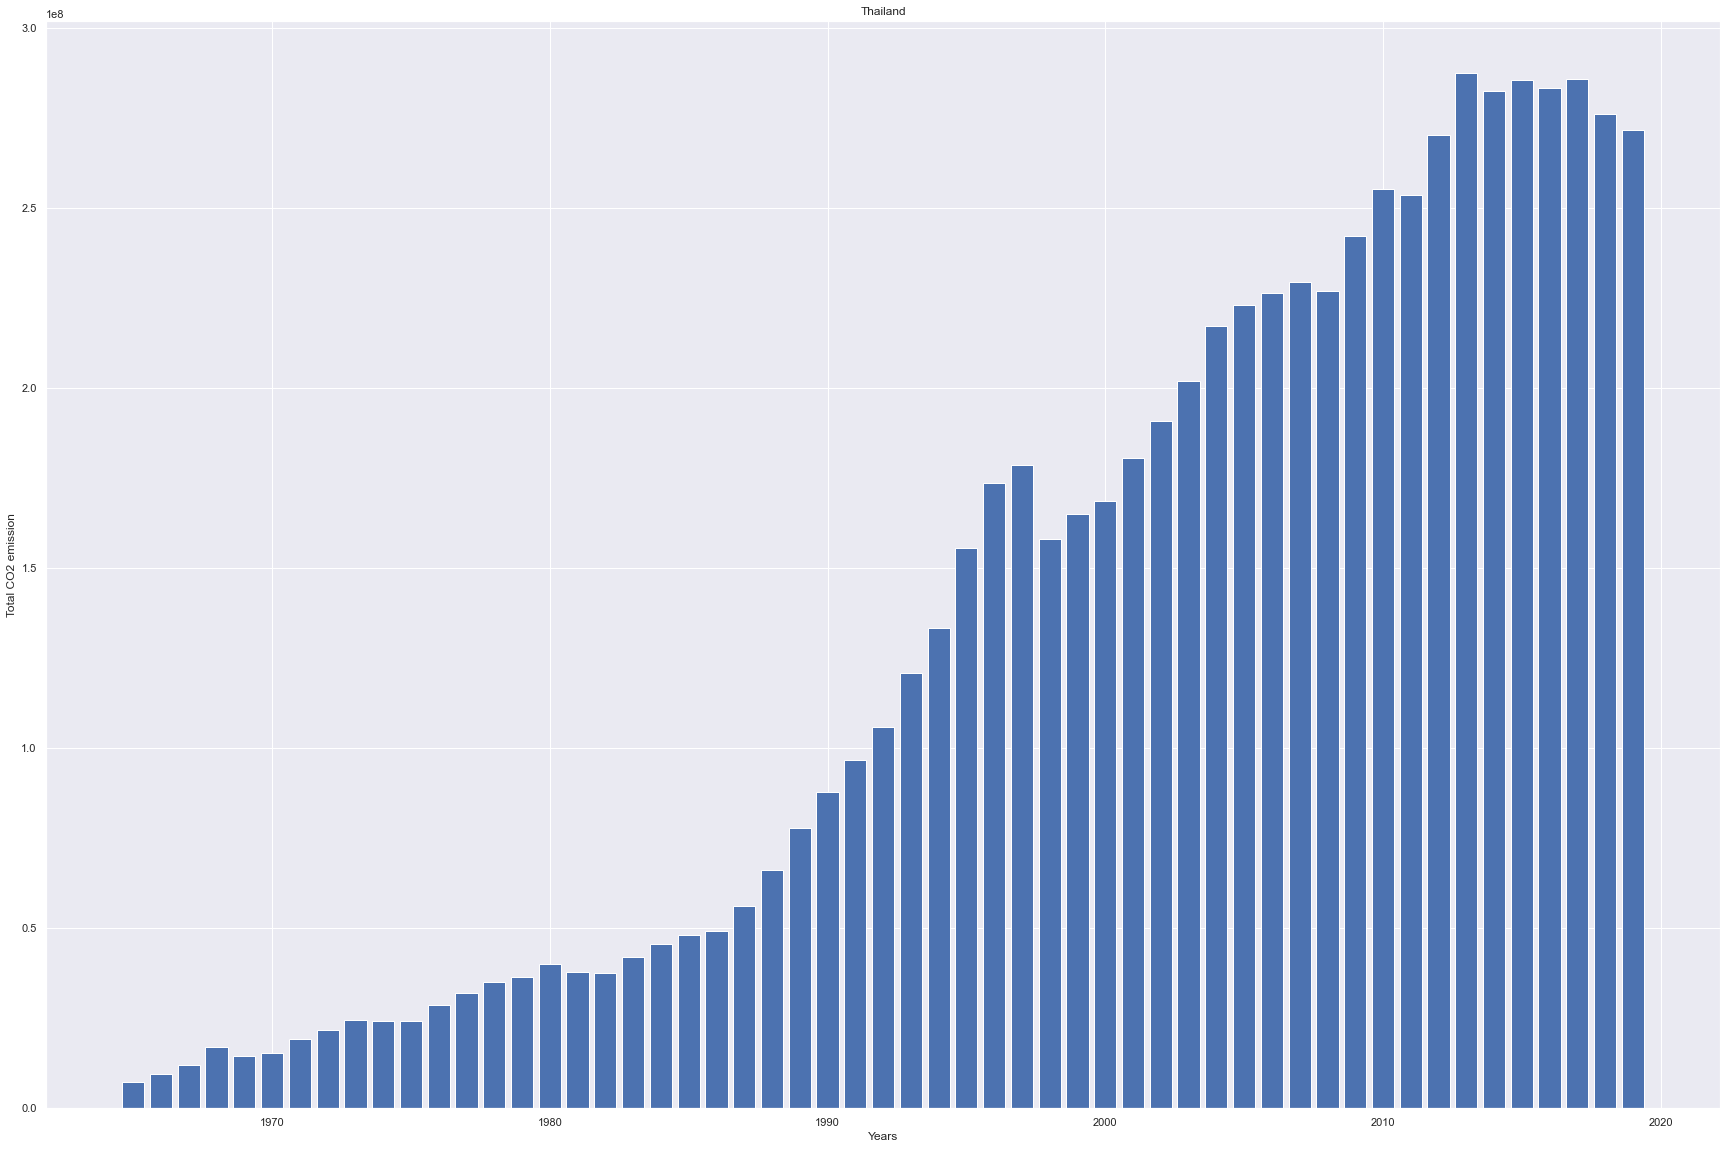

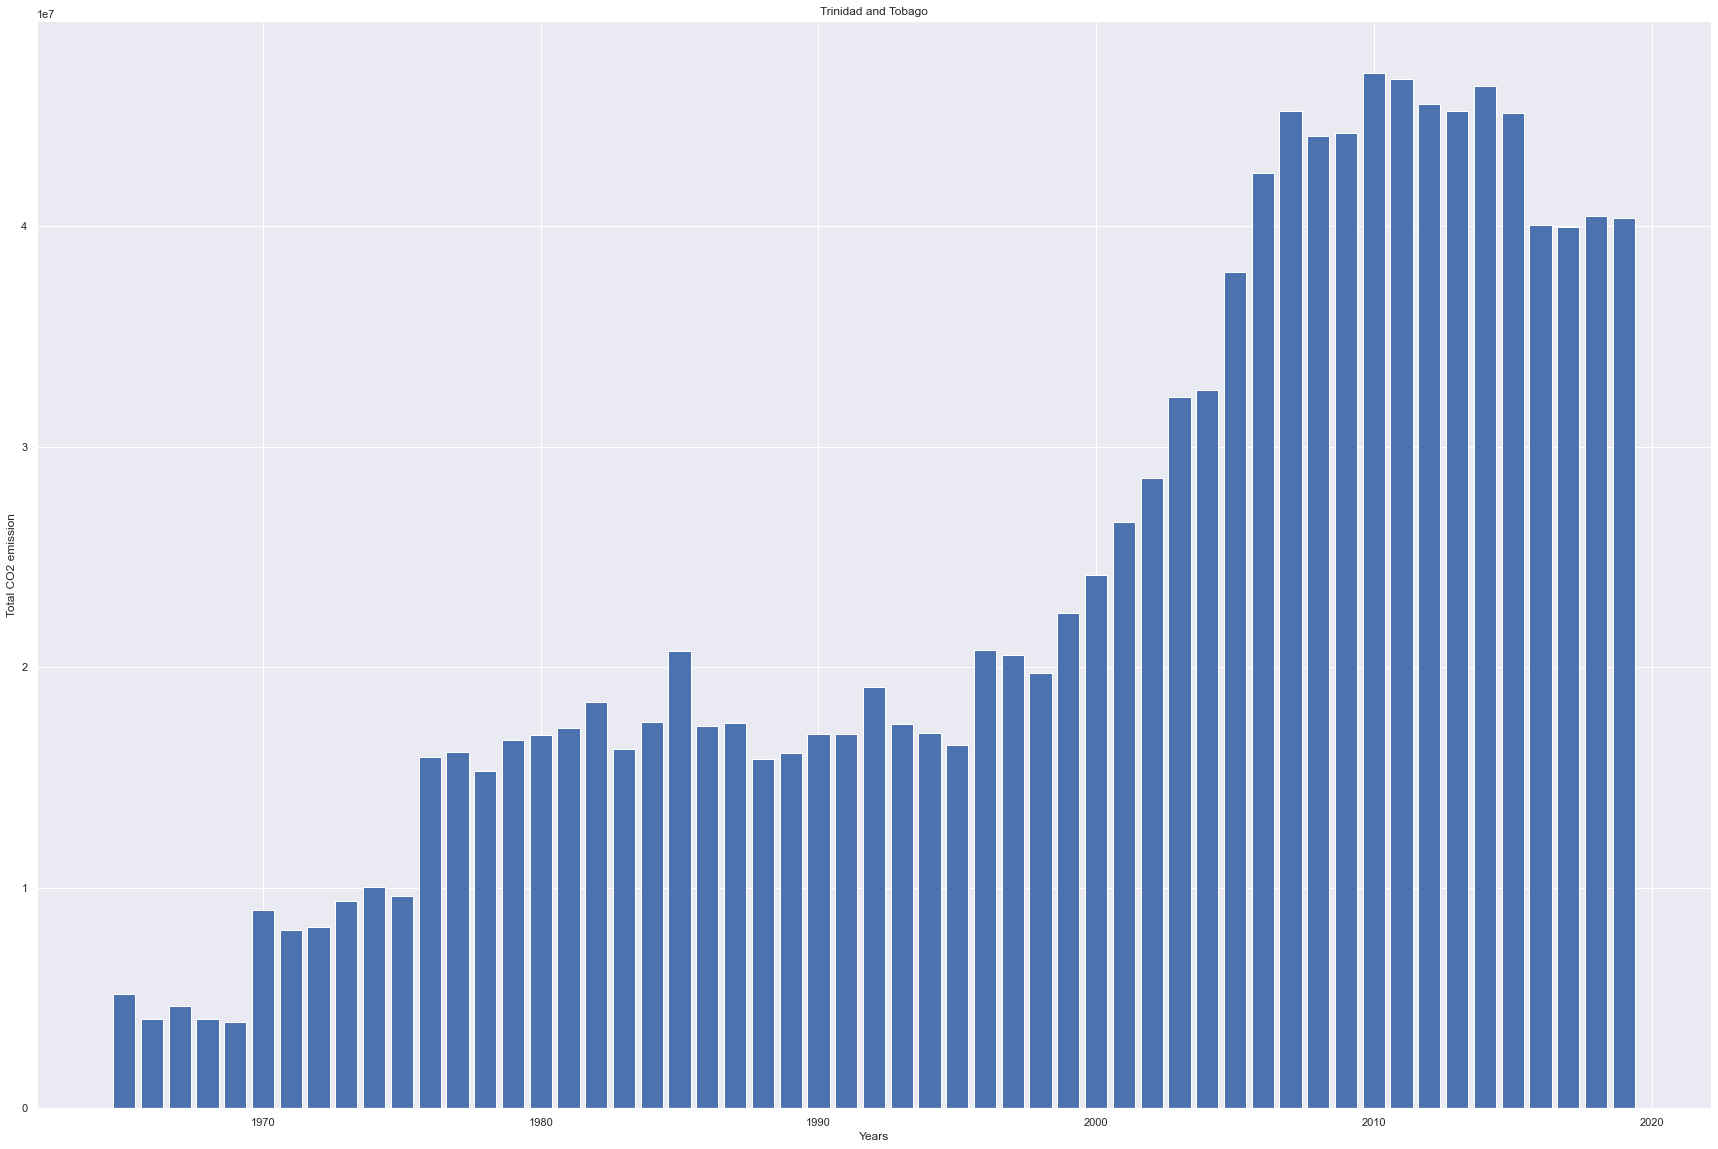

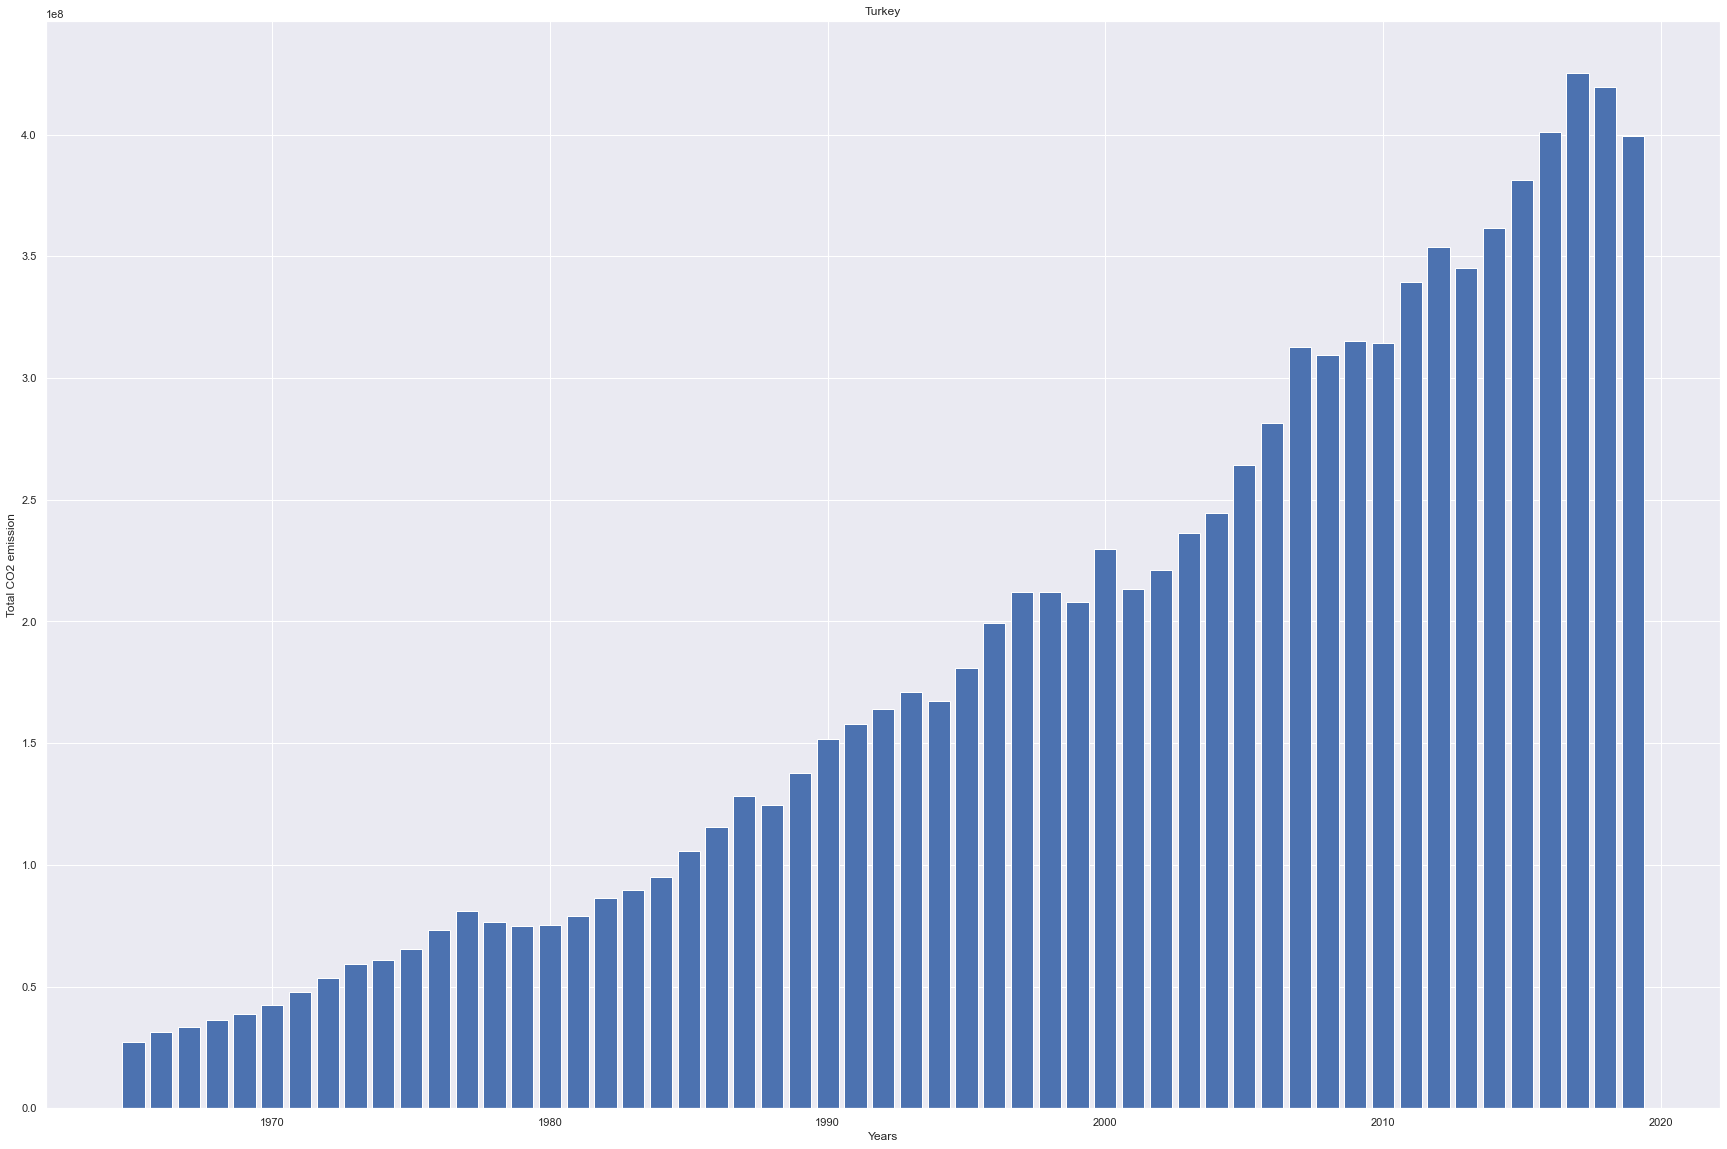

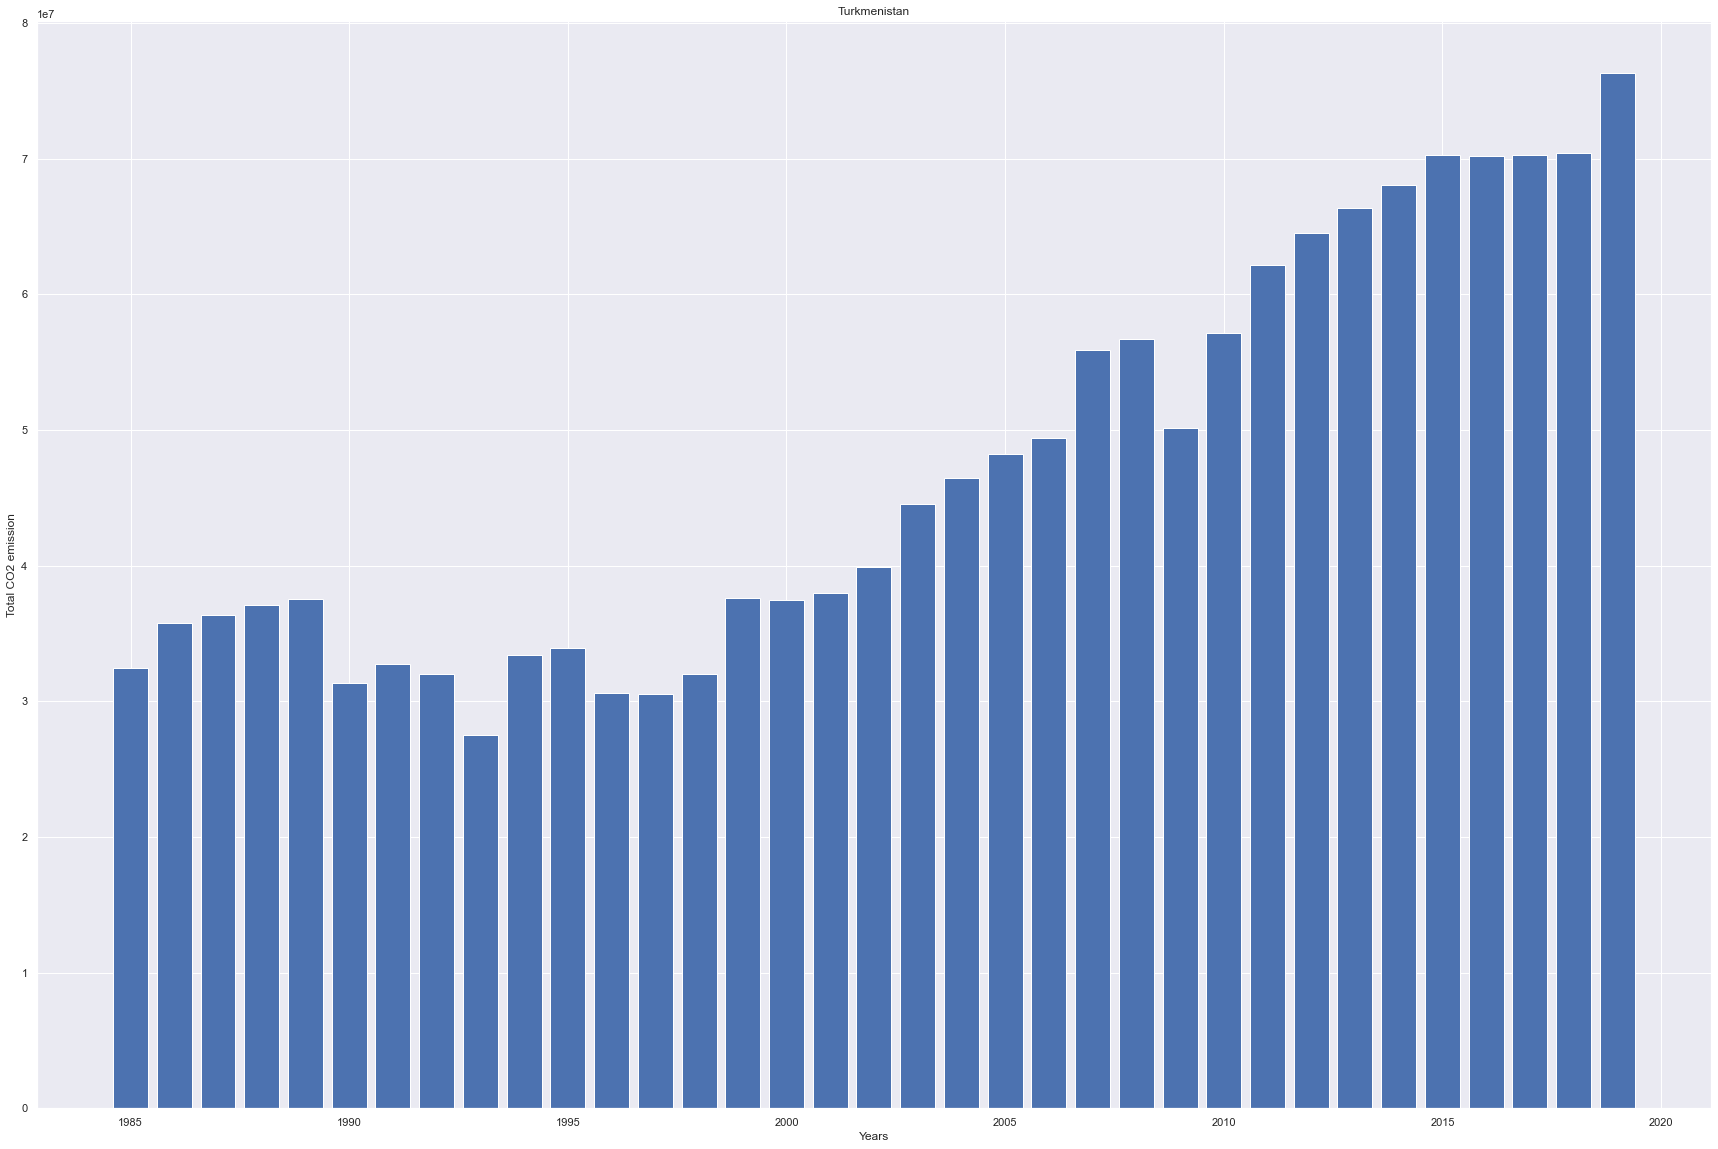

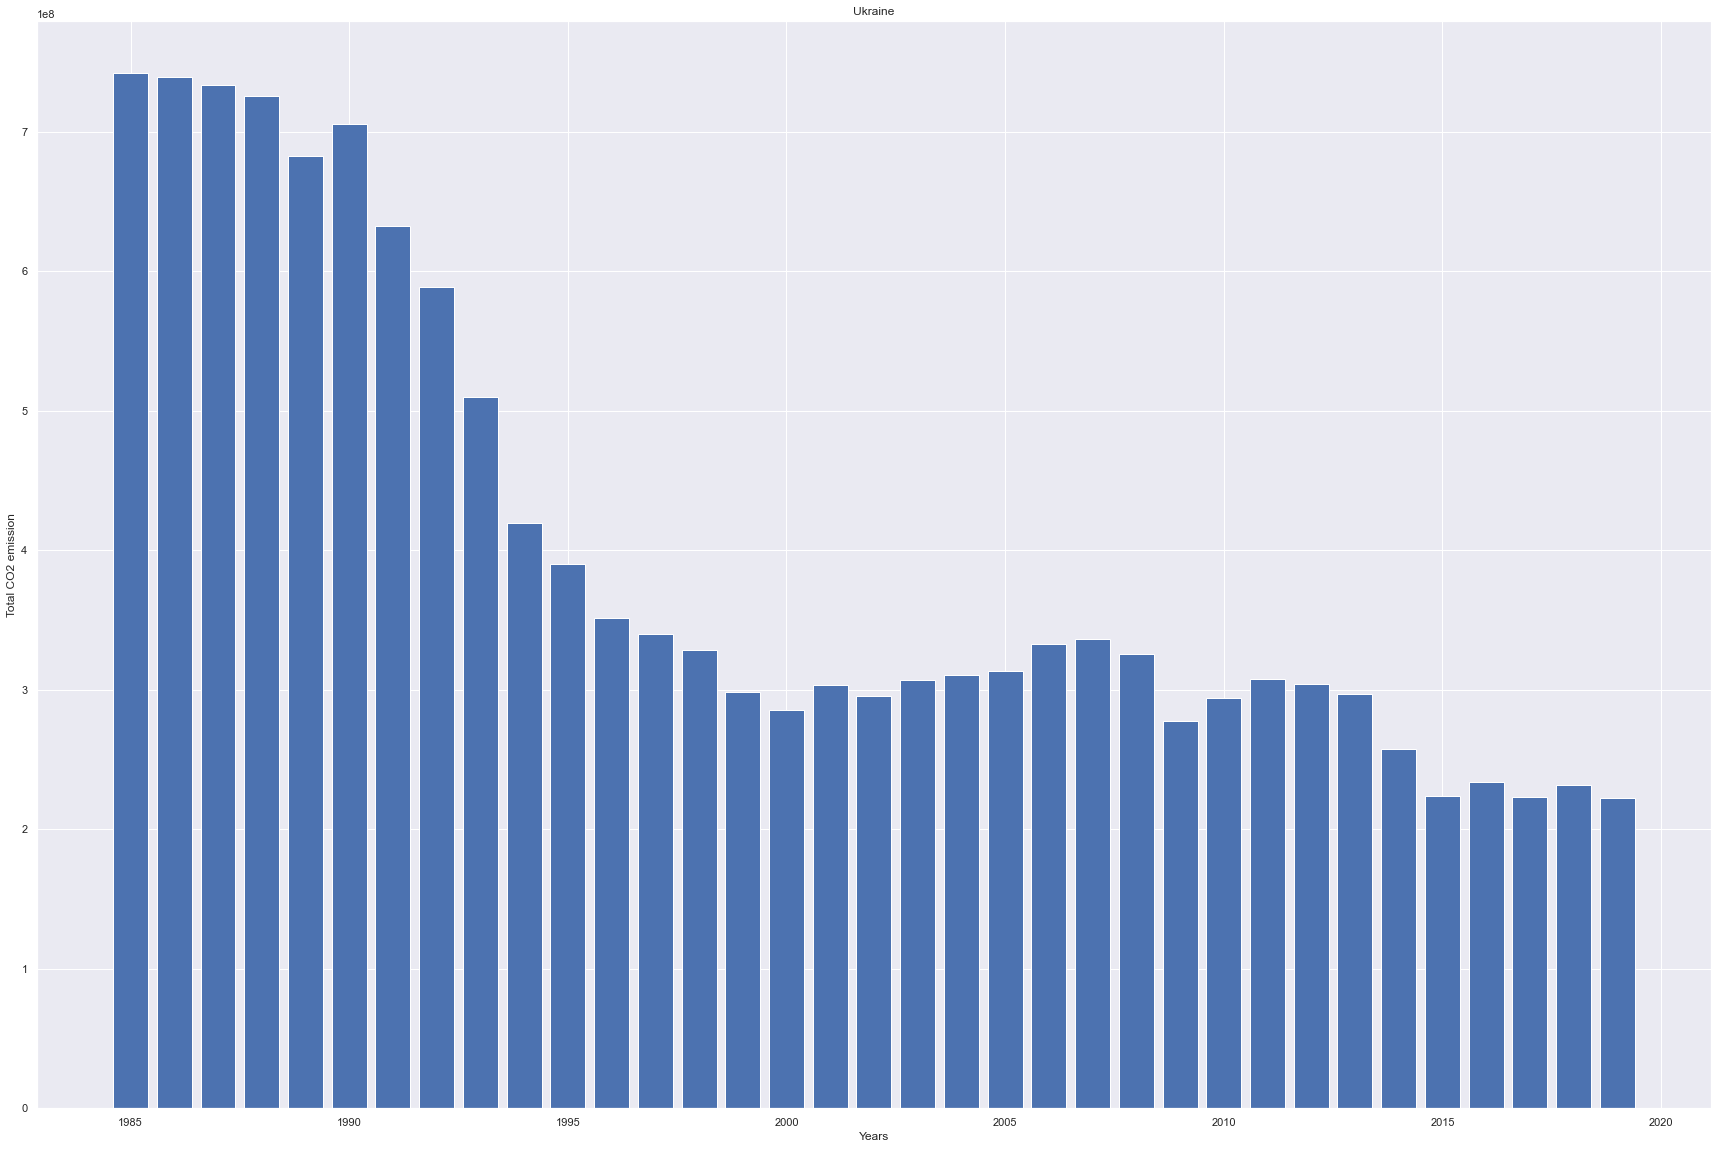

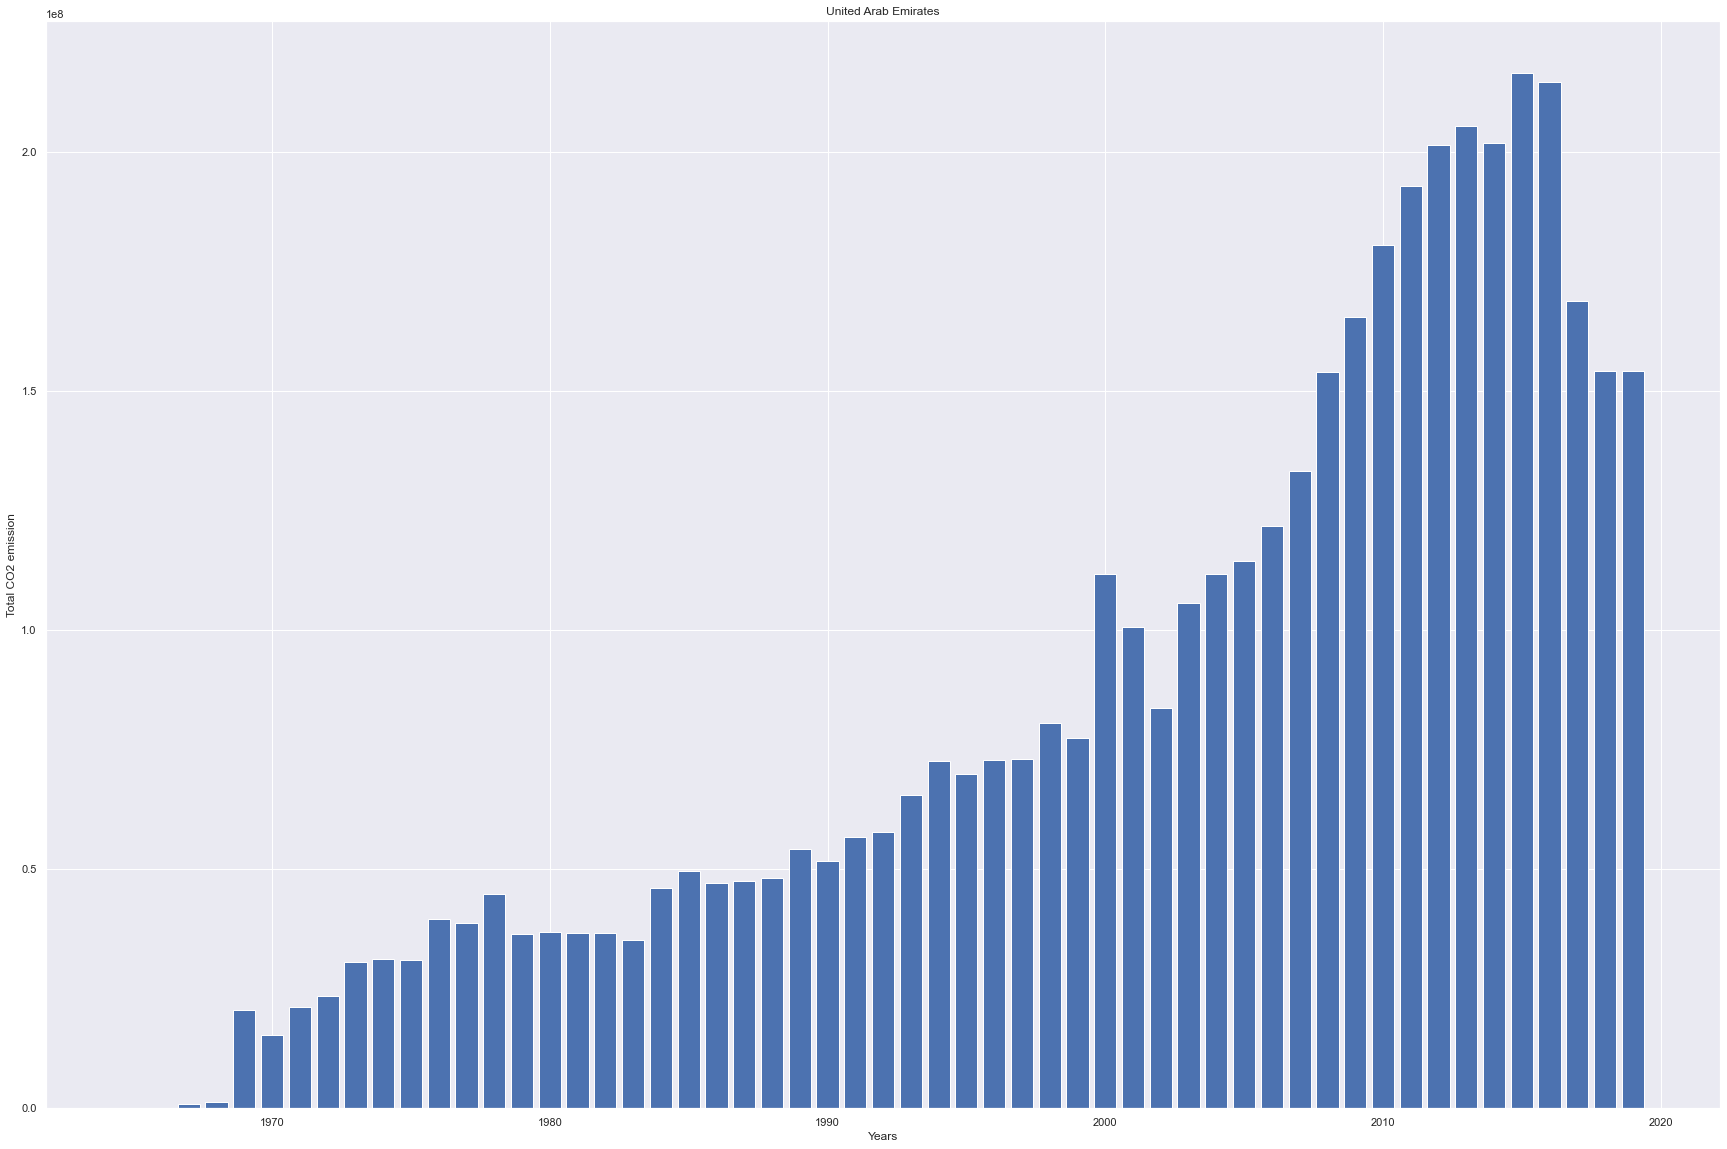

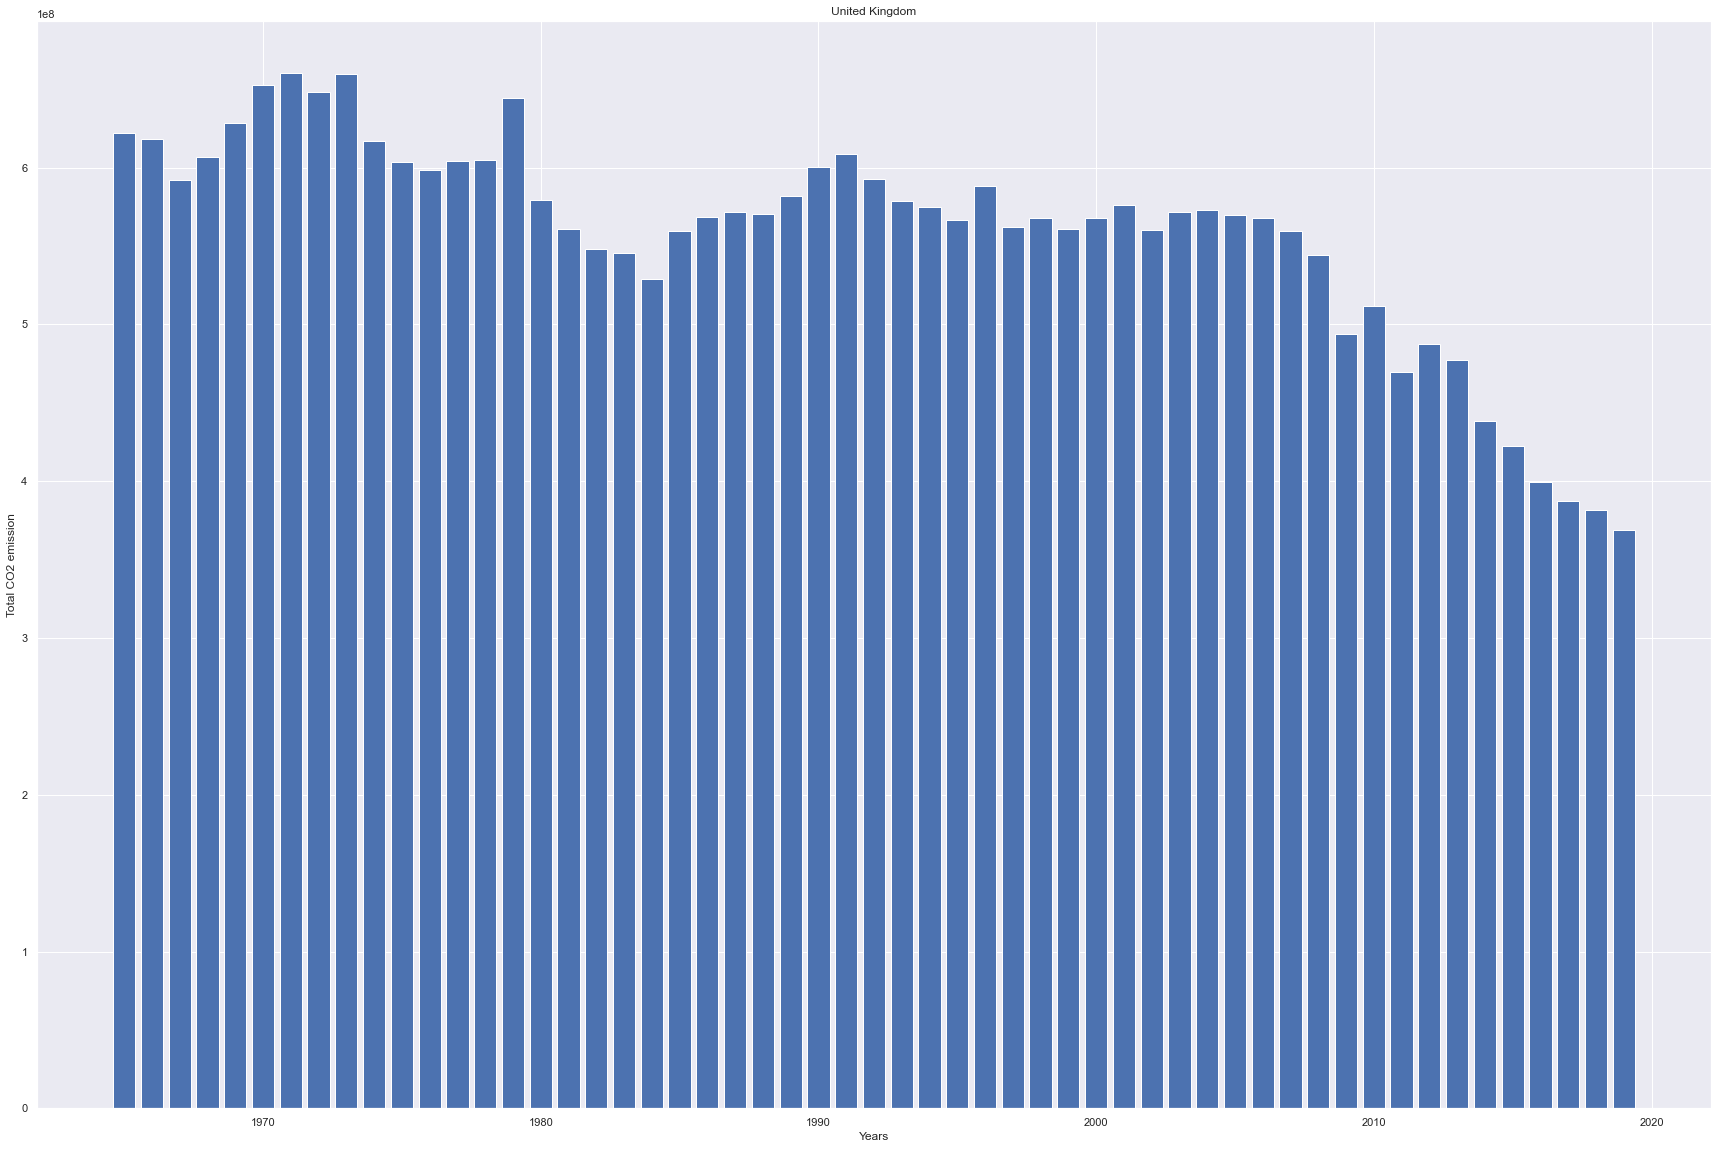

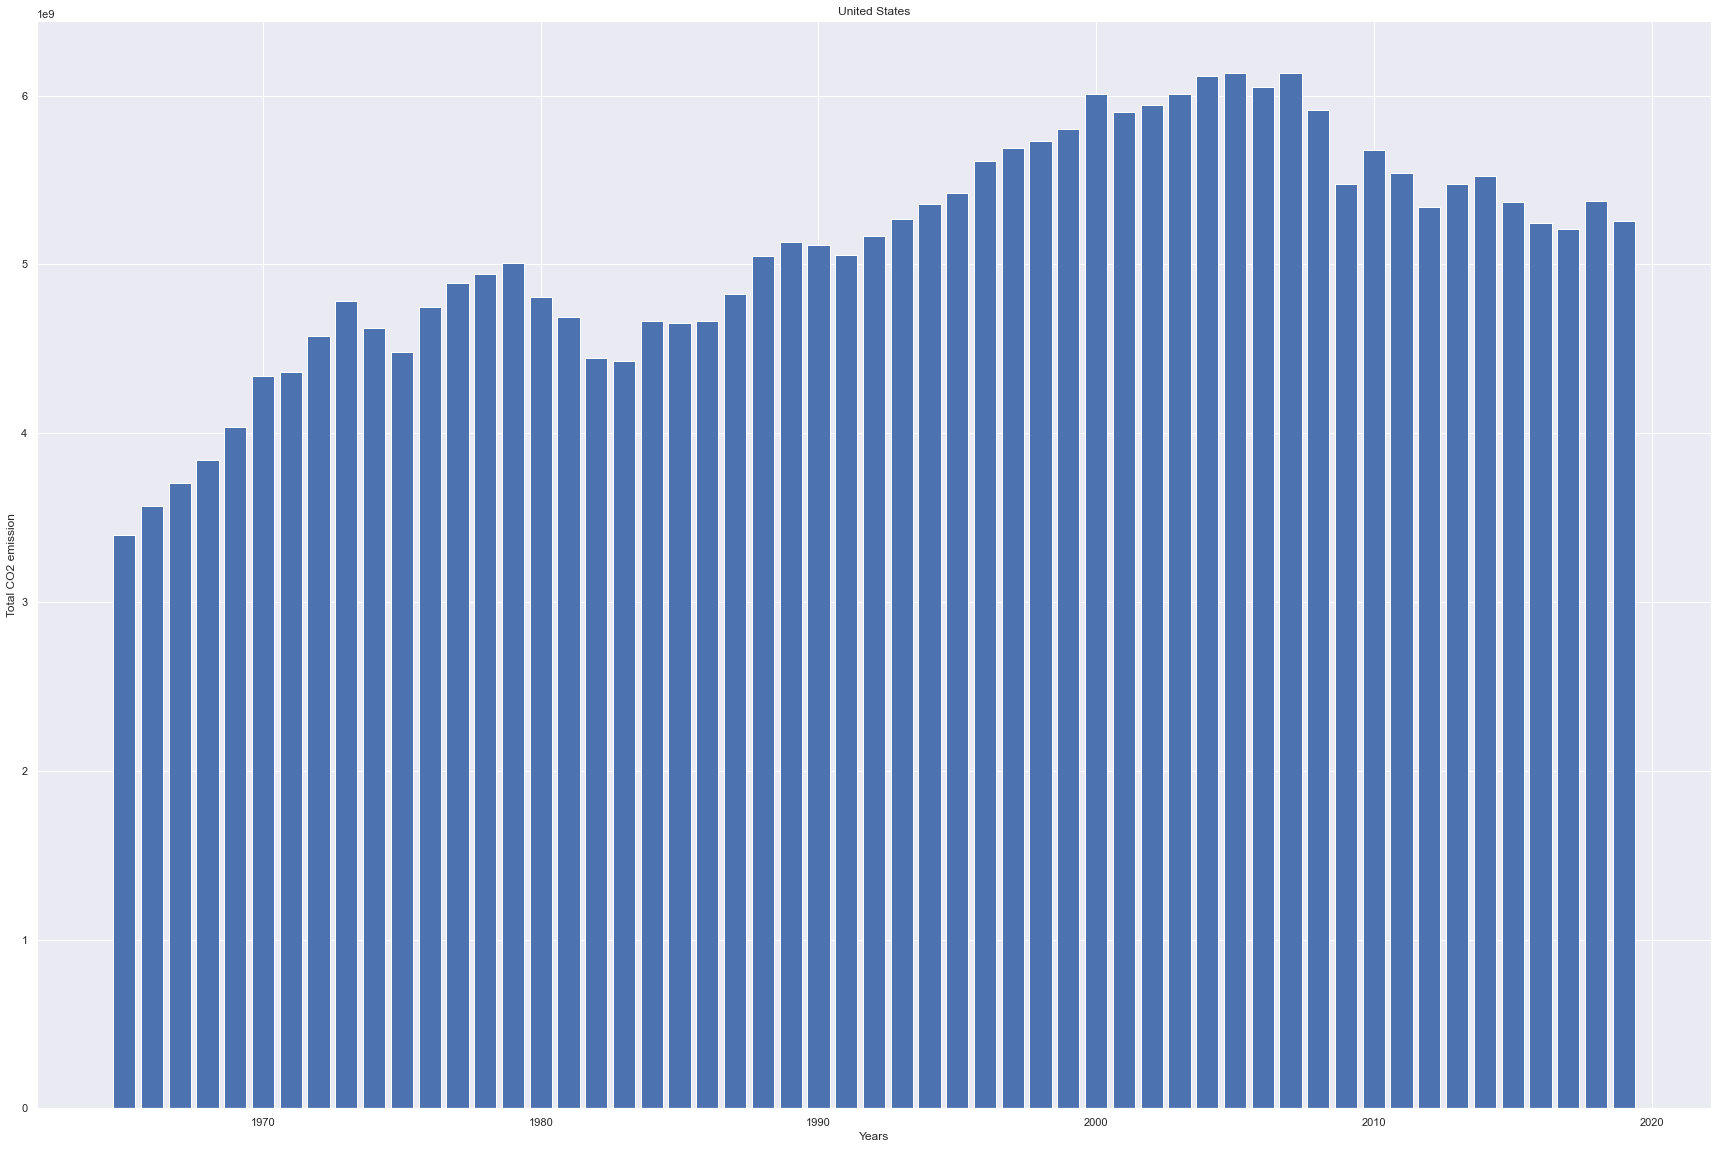

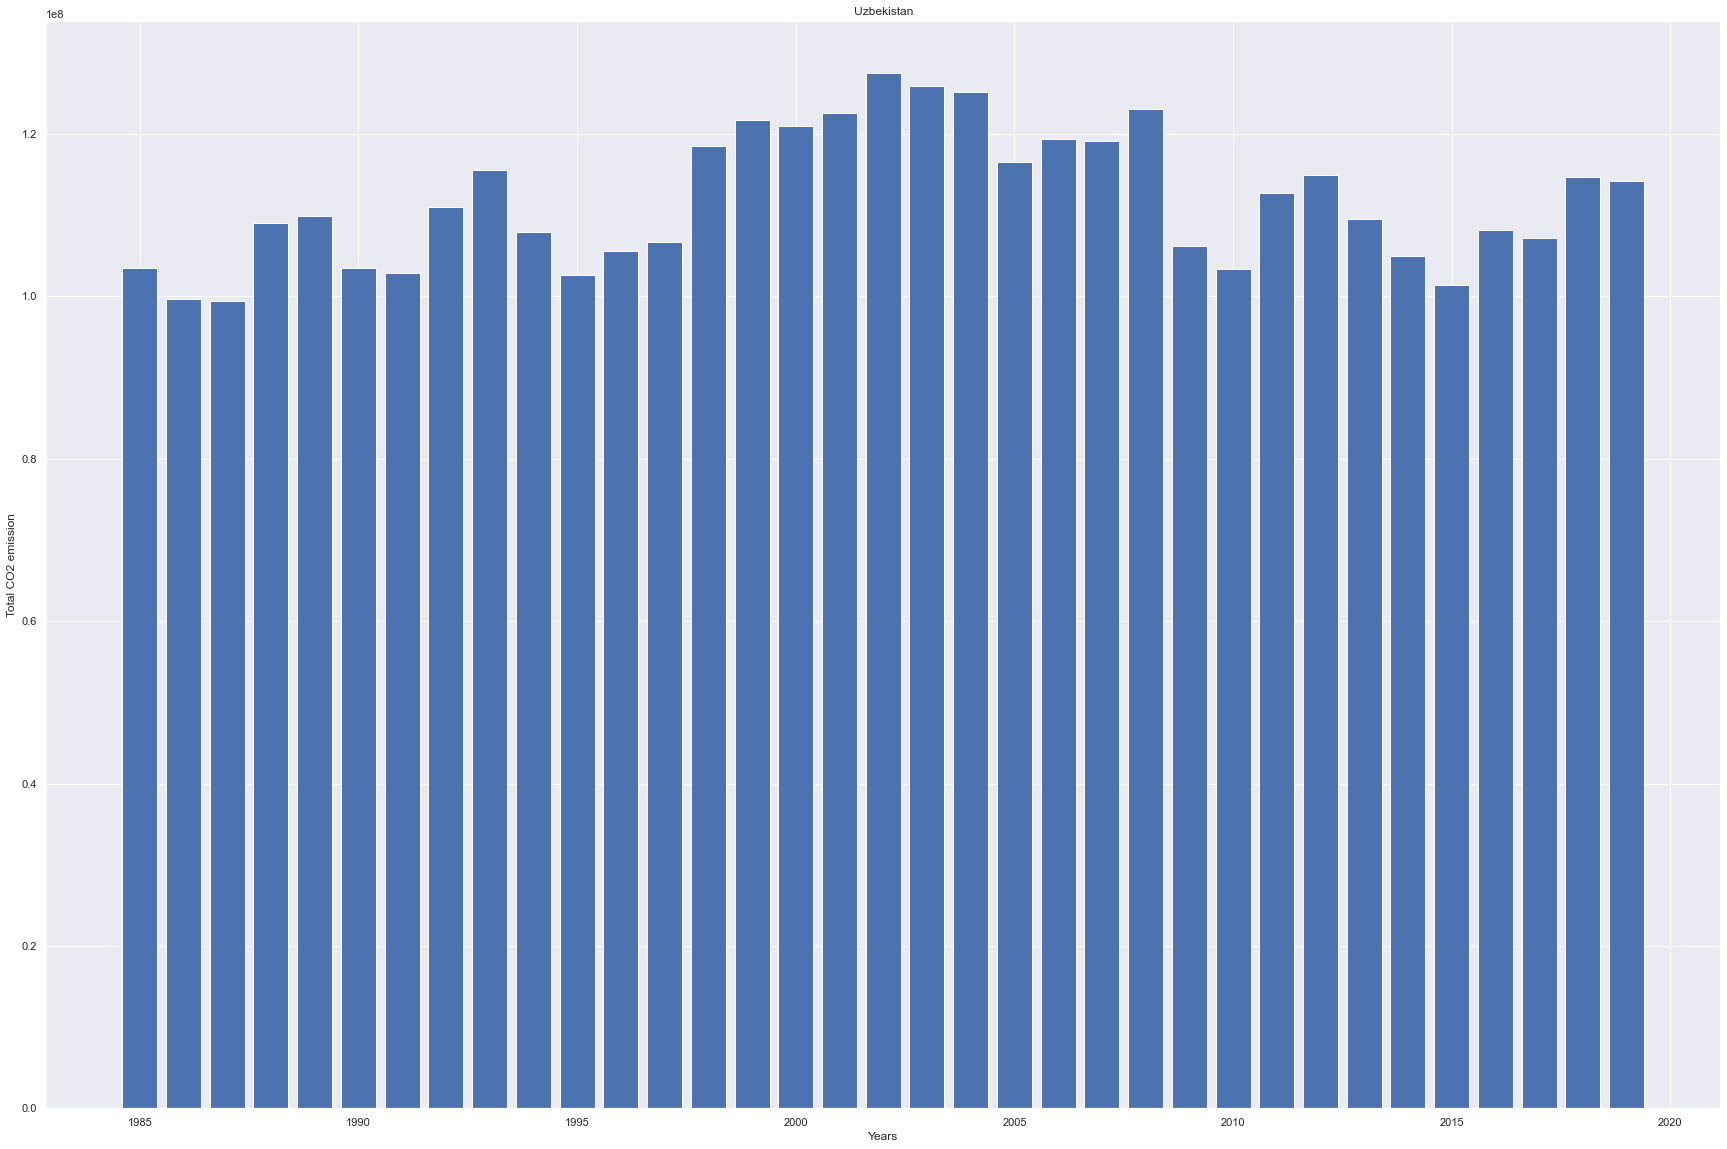

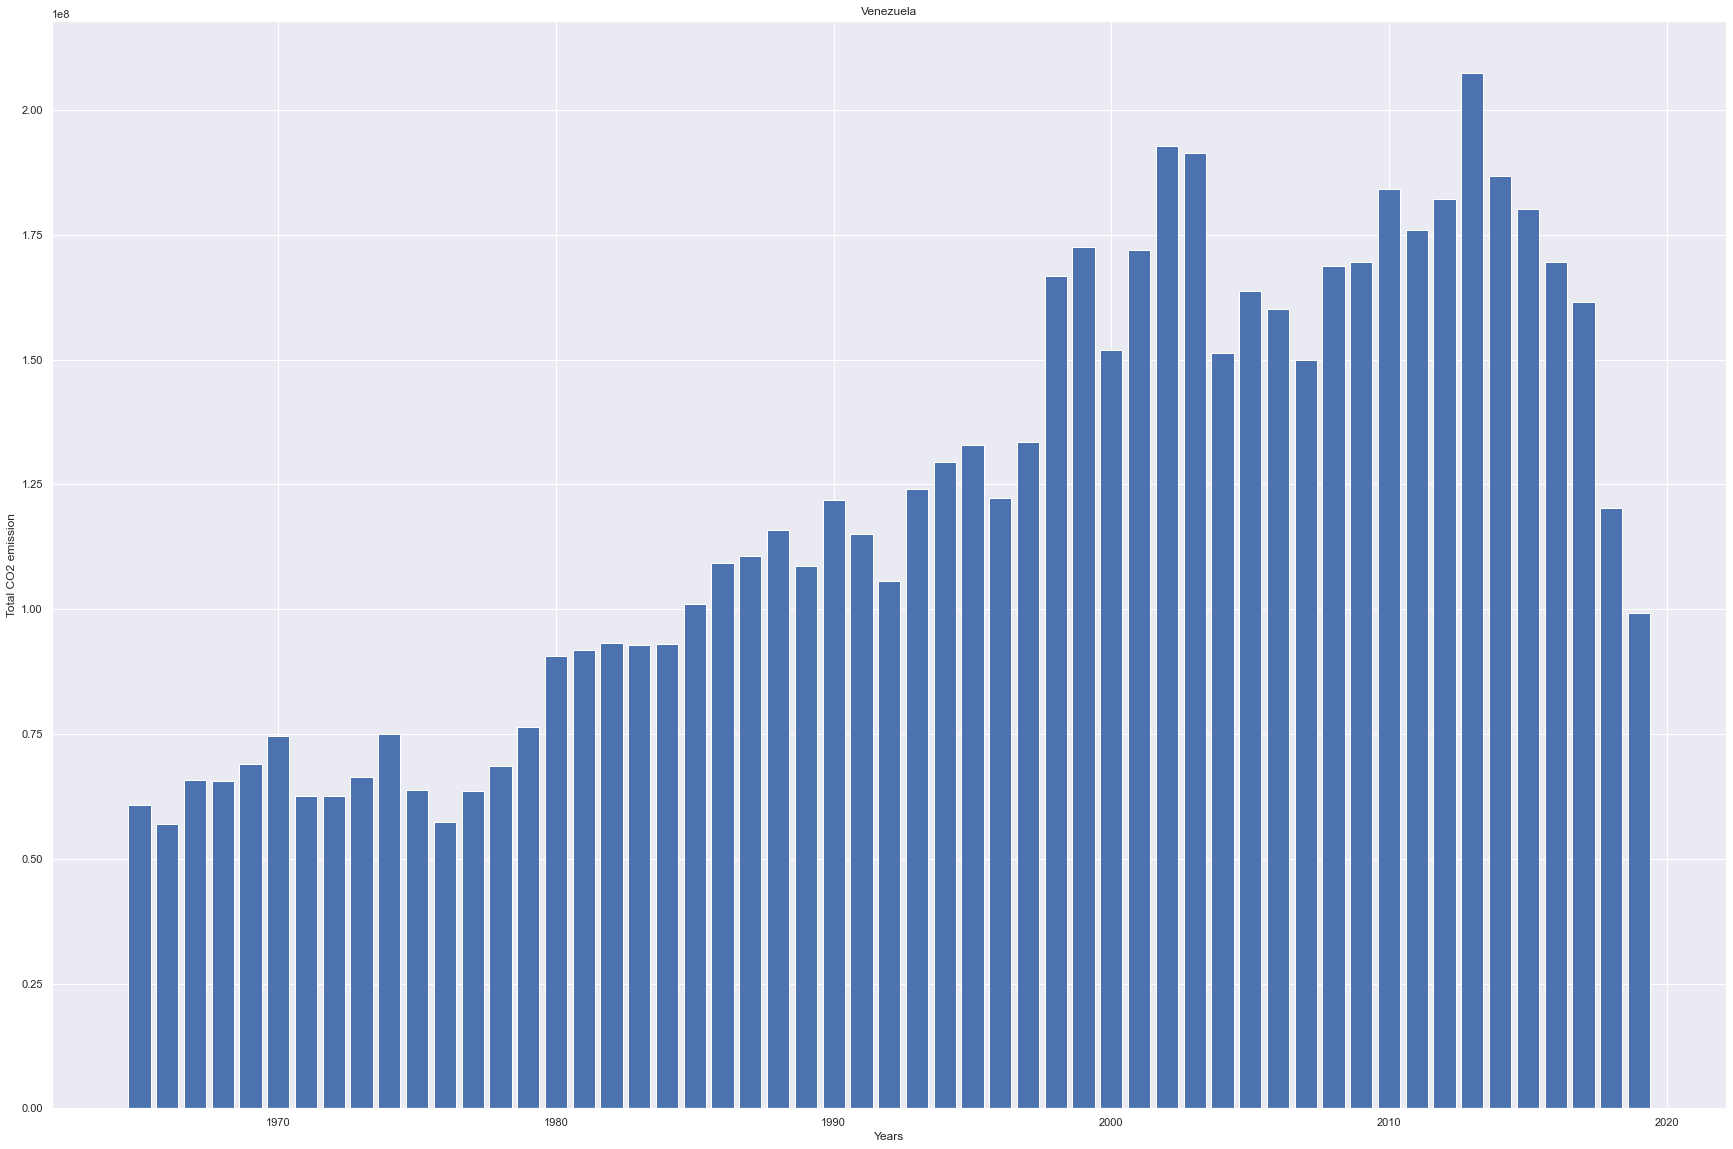

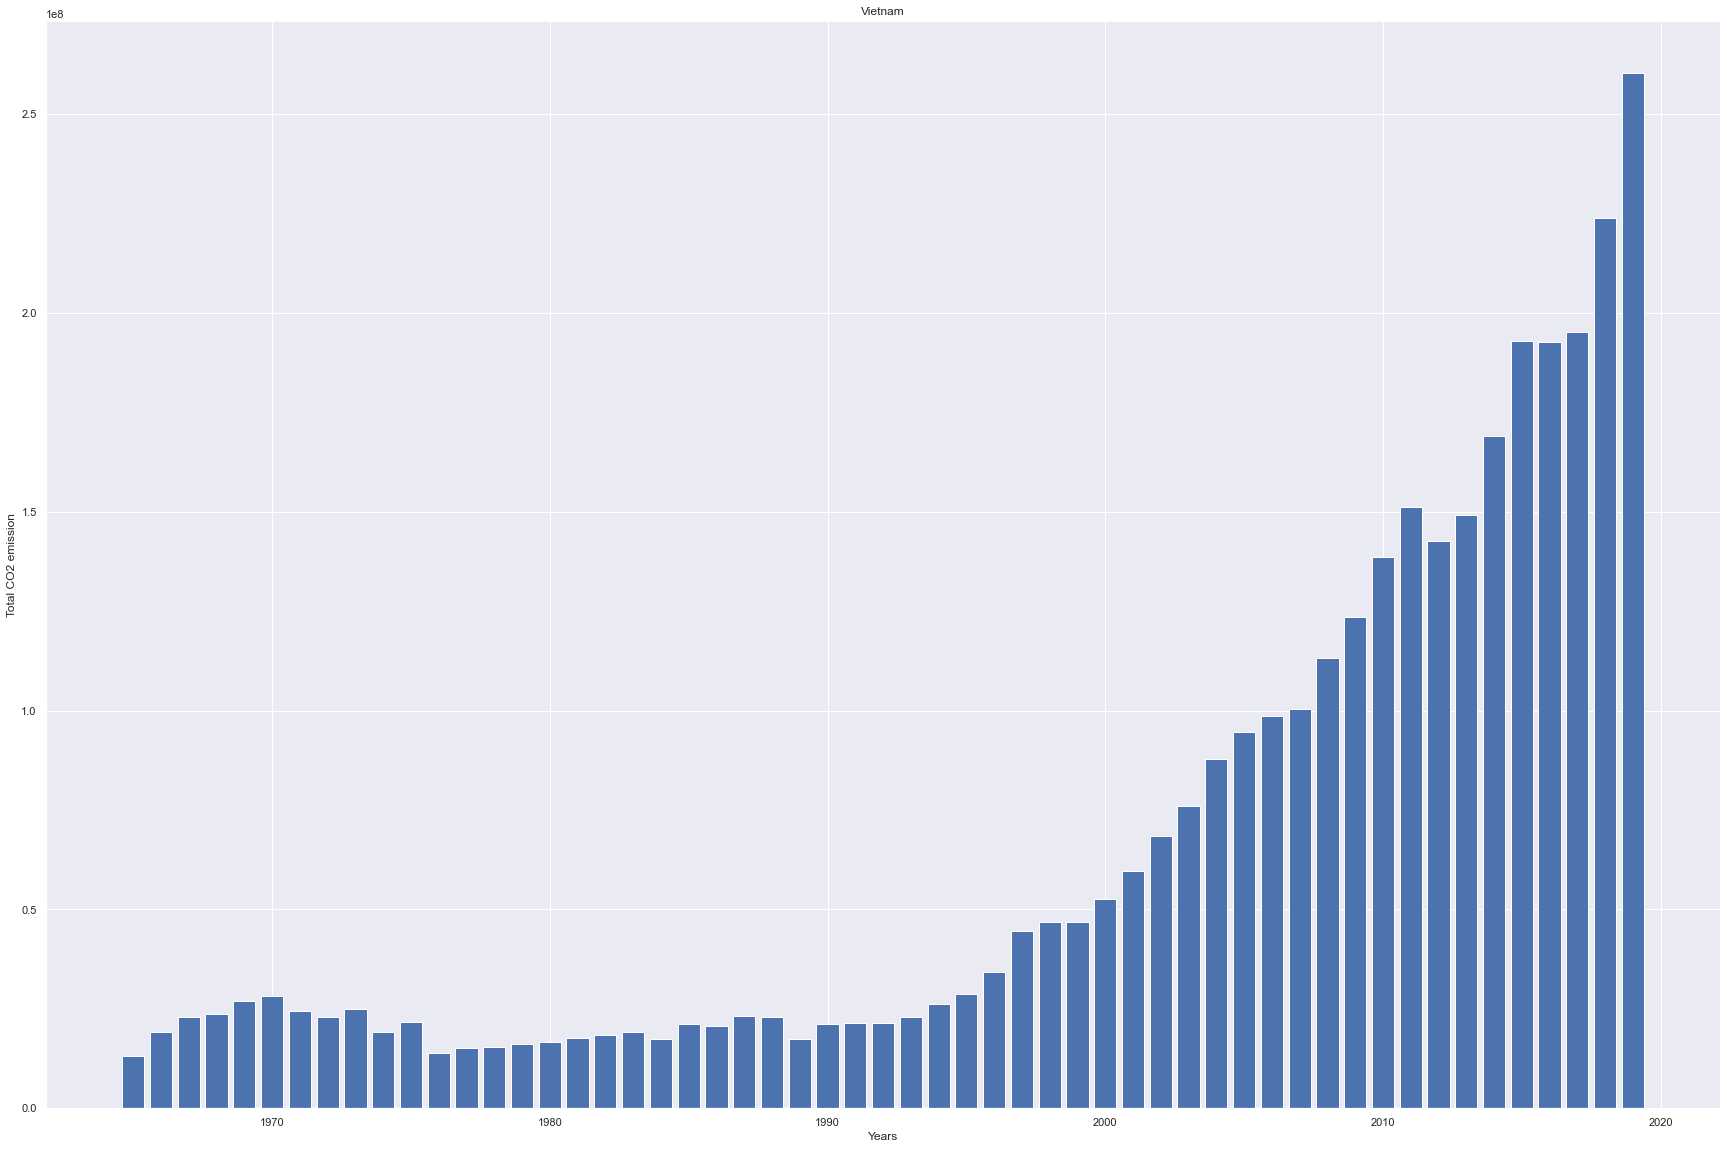

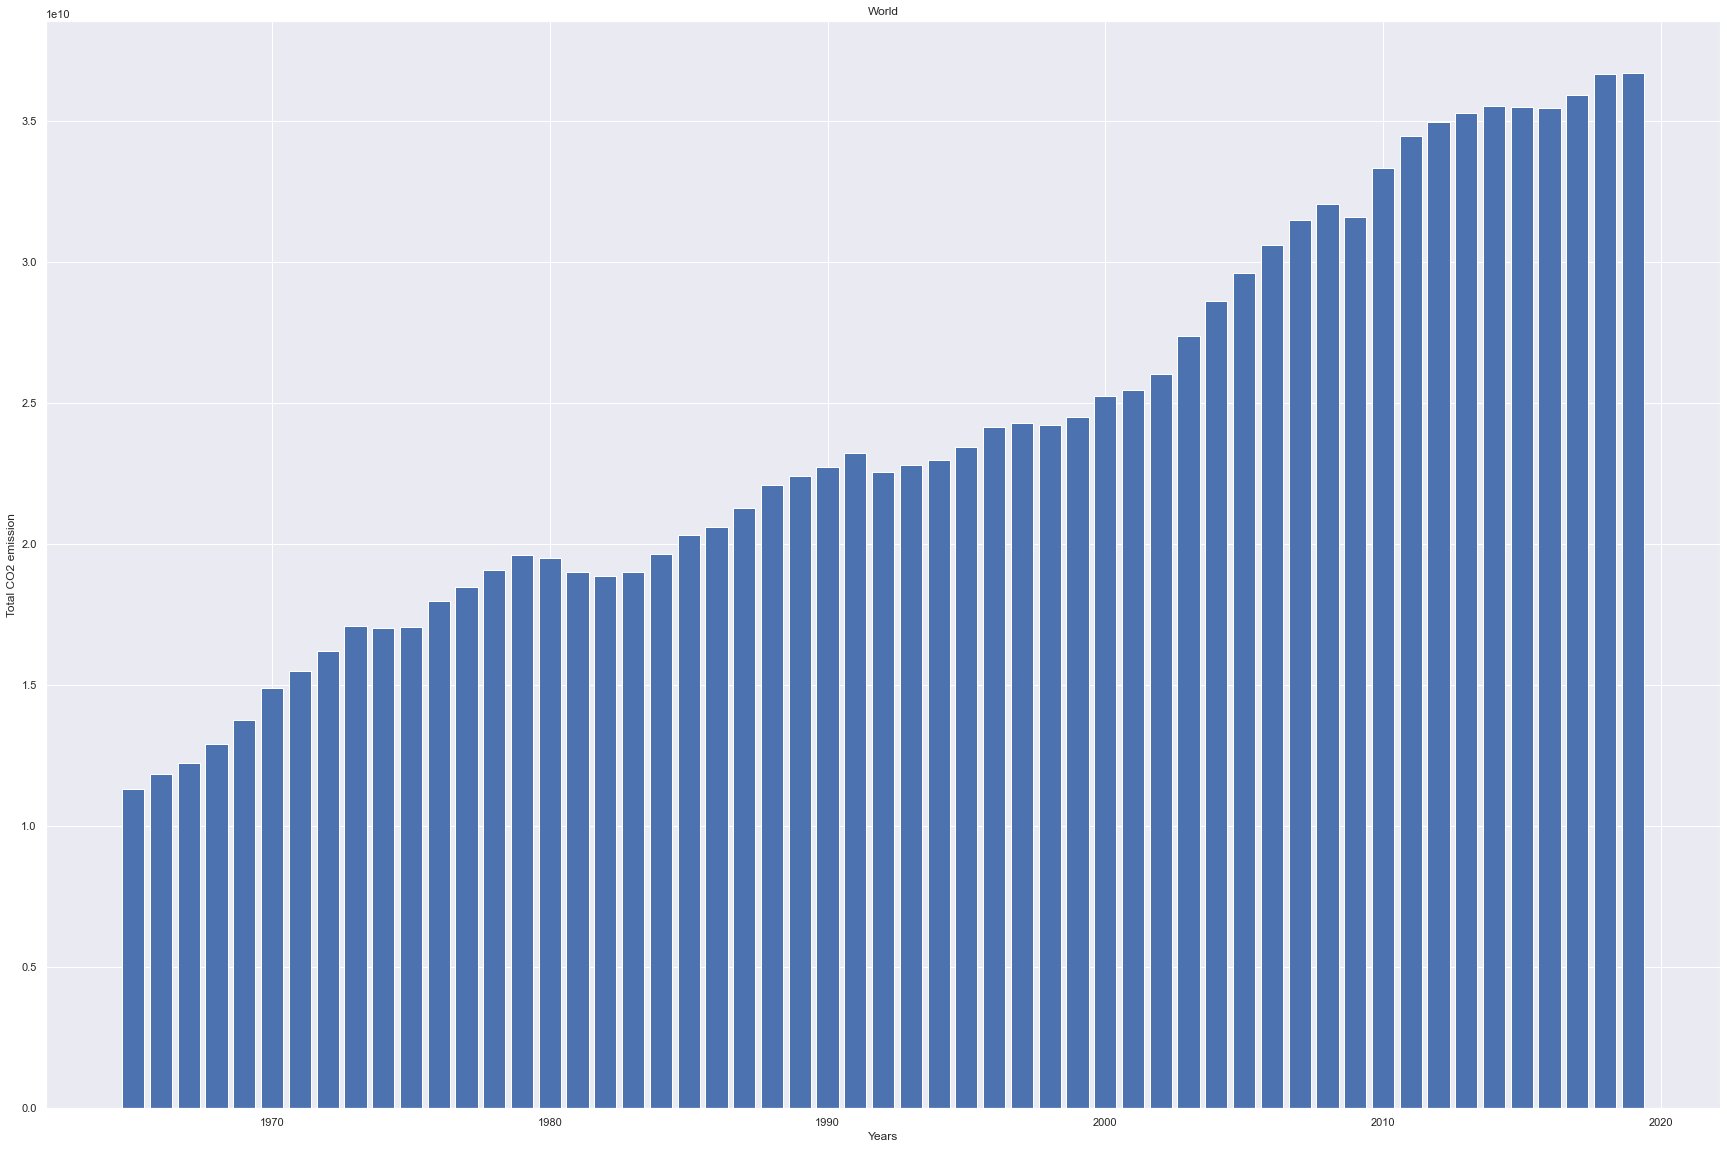

In [89]:
import matplotlib.pyplot as plt
import numpy as np

country_names= data245.Entity.unique()
years_list= data245.Year.unique()

for country in country_names:
    temp1=data245[data245['Entity']== country]
        
    fig=plt.figure()
    plt.bar(temp1.Year, temp1["Annual CO2 emissions"])
    plt.title(country)
    plt.xlabel("Years")
    plt.ylabel("Total CO2 emission")


## Viz for the video: 
what is the size of the data? what are other properties?
what is the data range? is it geo-data?

* 4284 rows
* 10 columns ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables']
* from 1965 to 2019 
* 82 countries + world

In [90]:
#data4 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/share-energy-consum-by-source.csv")
#renaming all columns
data4.columns = ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables']
data4.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
0,Africa,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [91]:
print(data4.shape)
data4.Country.unique()

(4284, 10)


array(['Africa', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia',
       'Europe', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'North America',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United A

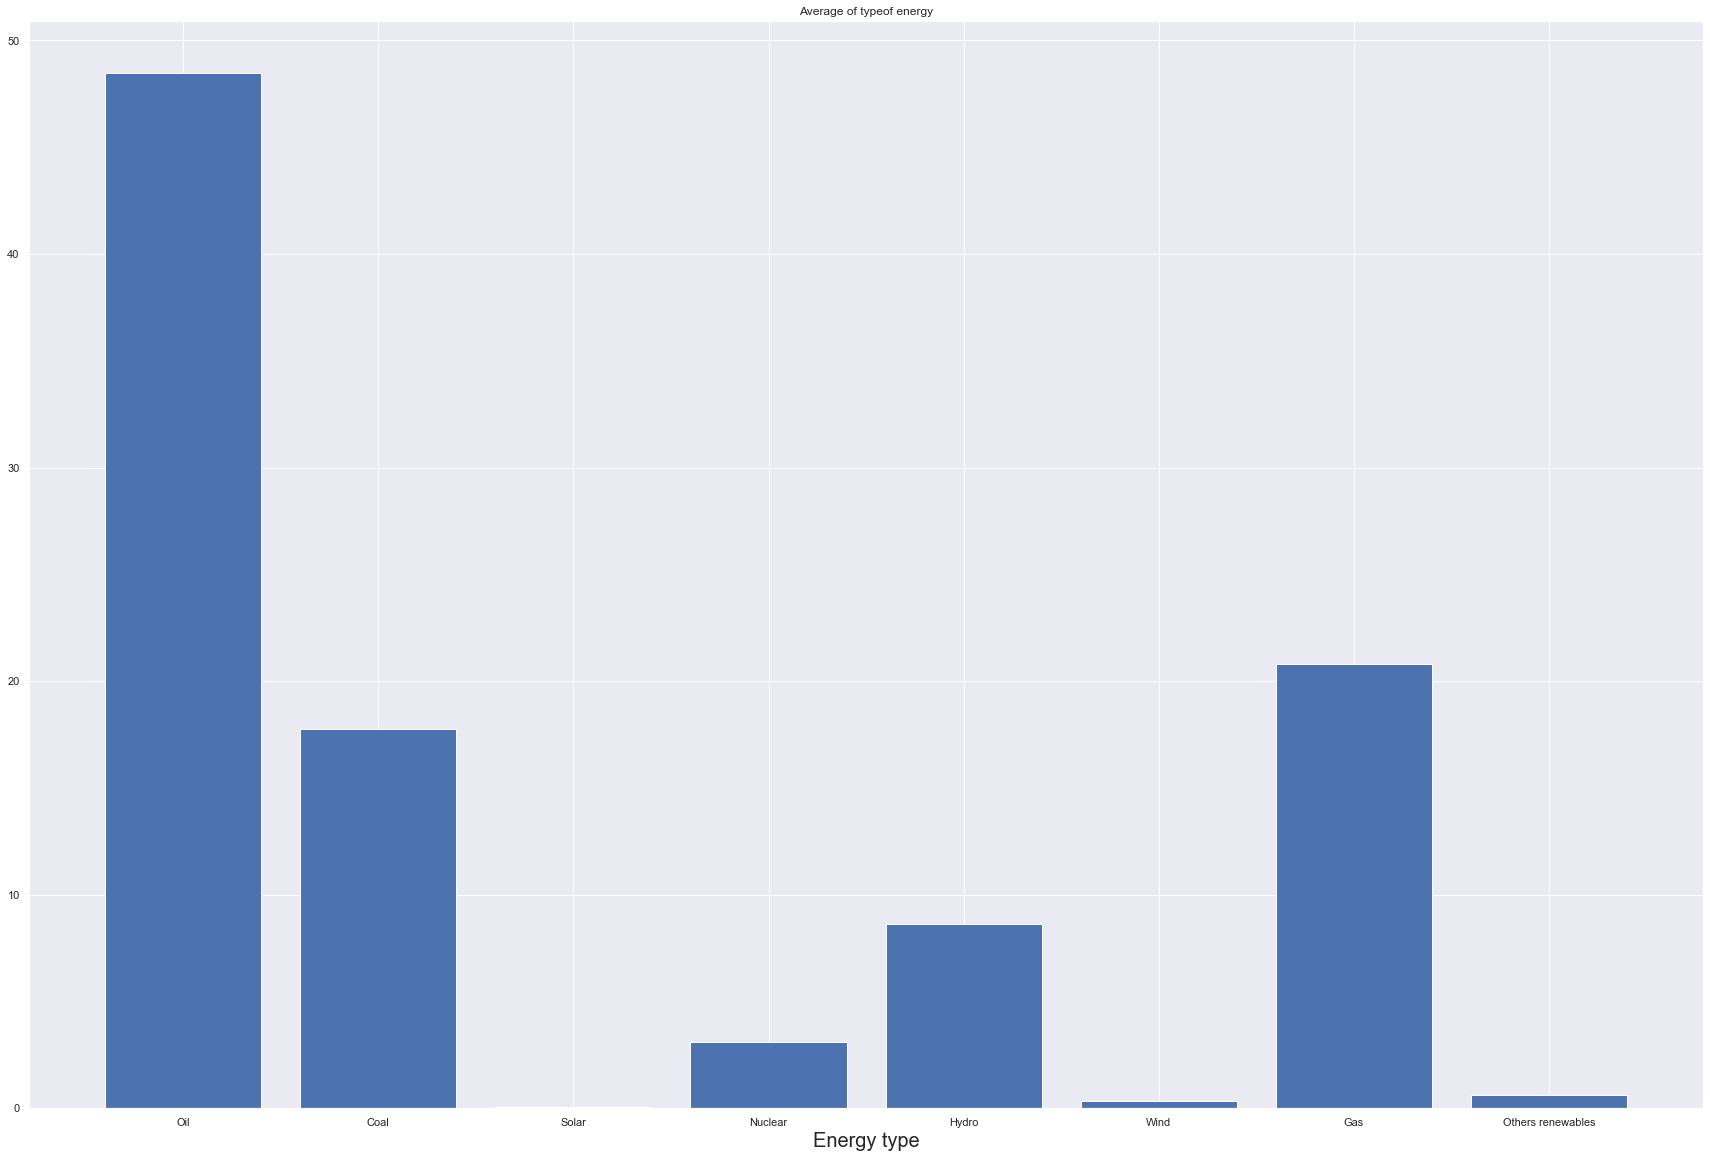

In [92]:
# bar plot con le medie dei tipi di energia

mean_oil= data4['Oil'].mean()
mean_coal= data4['Coal'].mean()
mean_solar= data4['Solar'].mean()
mean_nuclear= data4['Nuclear'].mean()
mean_hydro= data4['Hydro'].mean()
mean_wind= data4['Wind'].mean()
mean_gas= data4['Gas'].mean()
mean_otherren= data4['Others renewables'].mean()

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables']
means=[mean_oil, mean_coal, mean_solar, mean_nuclear, mean_hydro, mean_wind, mean_gas, mean_otherren]

fig = plt.figure()
plt.bar(energy_type,means)
plt.title("Average of typeof energy")
plt.rc('axes', titlesize=40)
plt.xlabel("Energy type", fontsize= 20)
plt.show()

<AxesSubplot:title={'center':'ciao'}, xlabel='Country'>

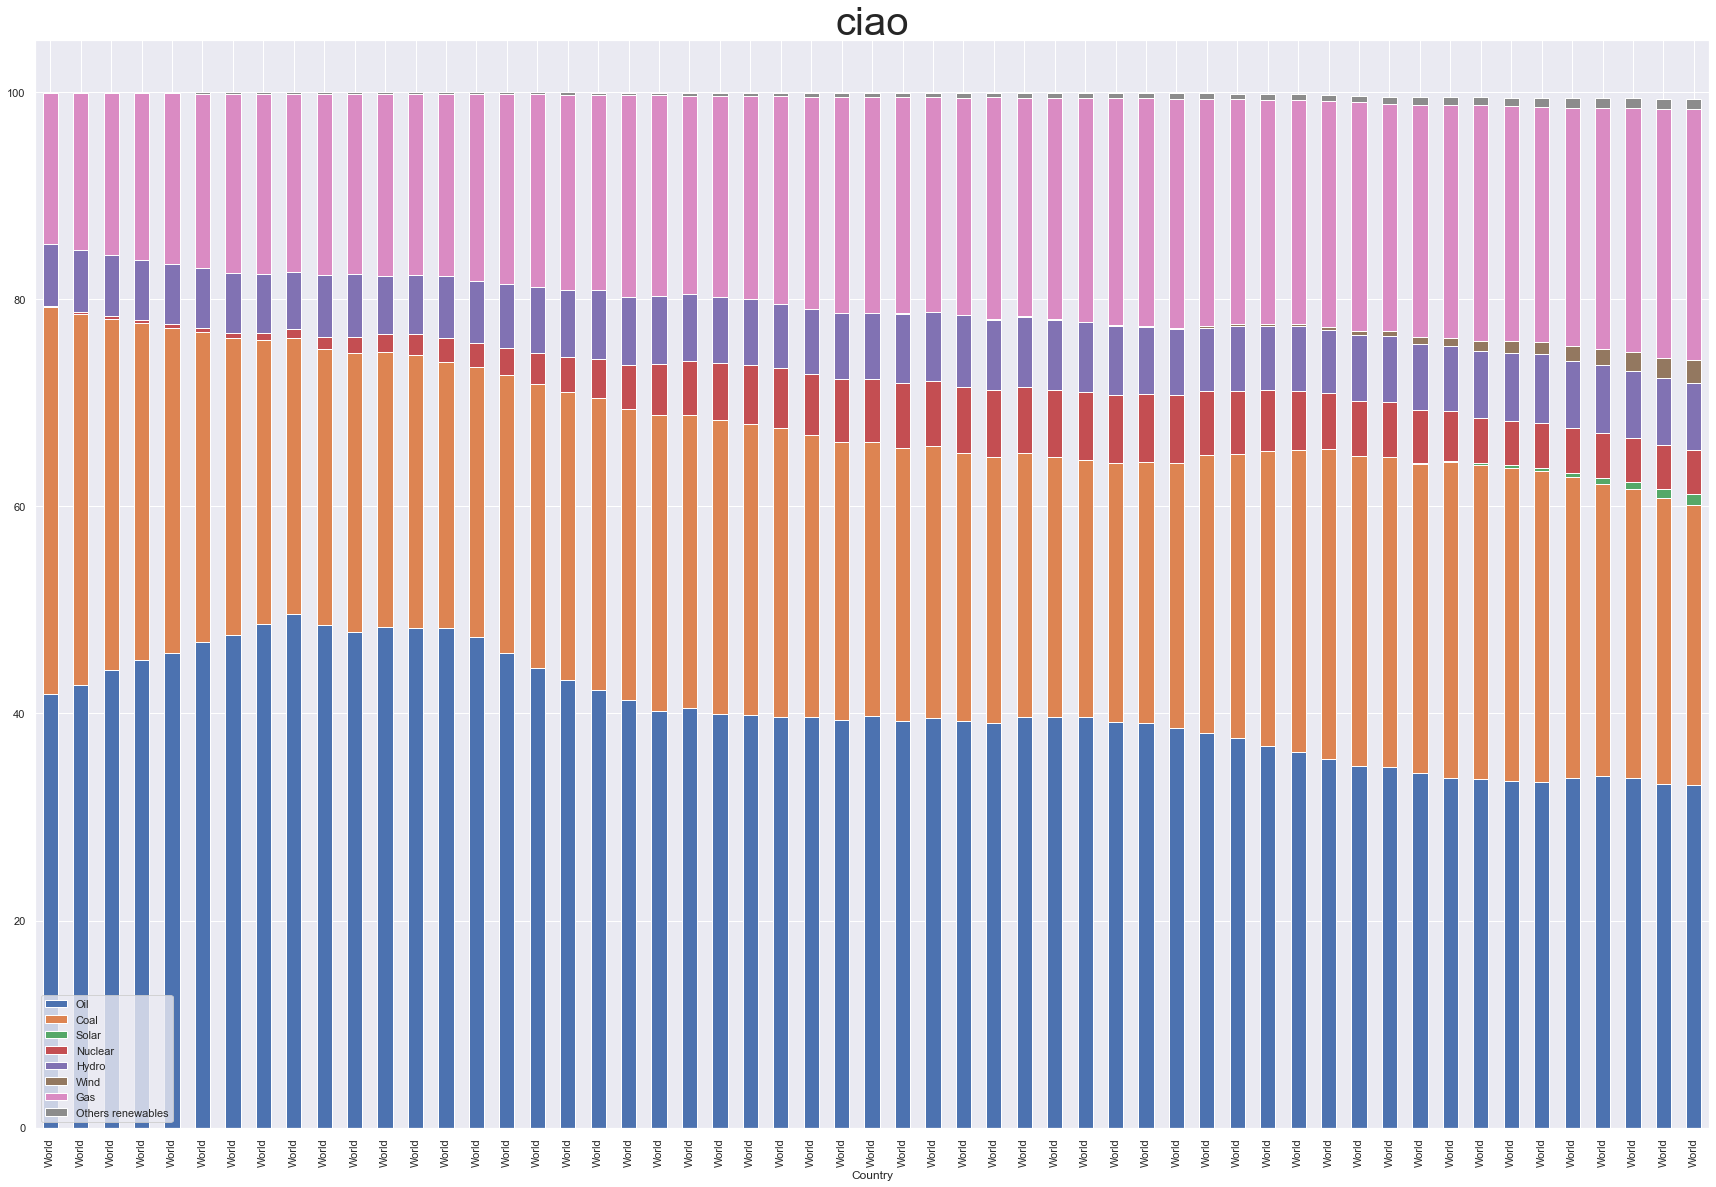

In [93]:
#bar plot data4 world in time(x: 1965 to 2019)

df_world= data4[data4.Country =='World']


df_world.plot.bar(x='Country', y= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], stacked=True, title='ciao')


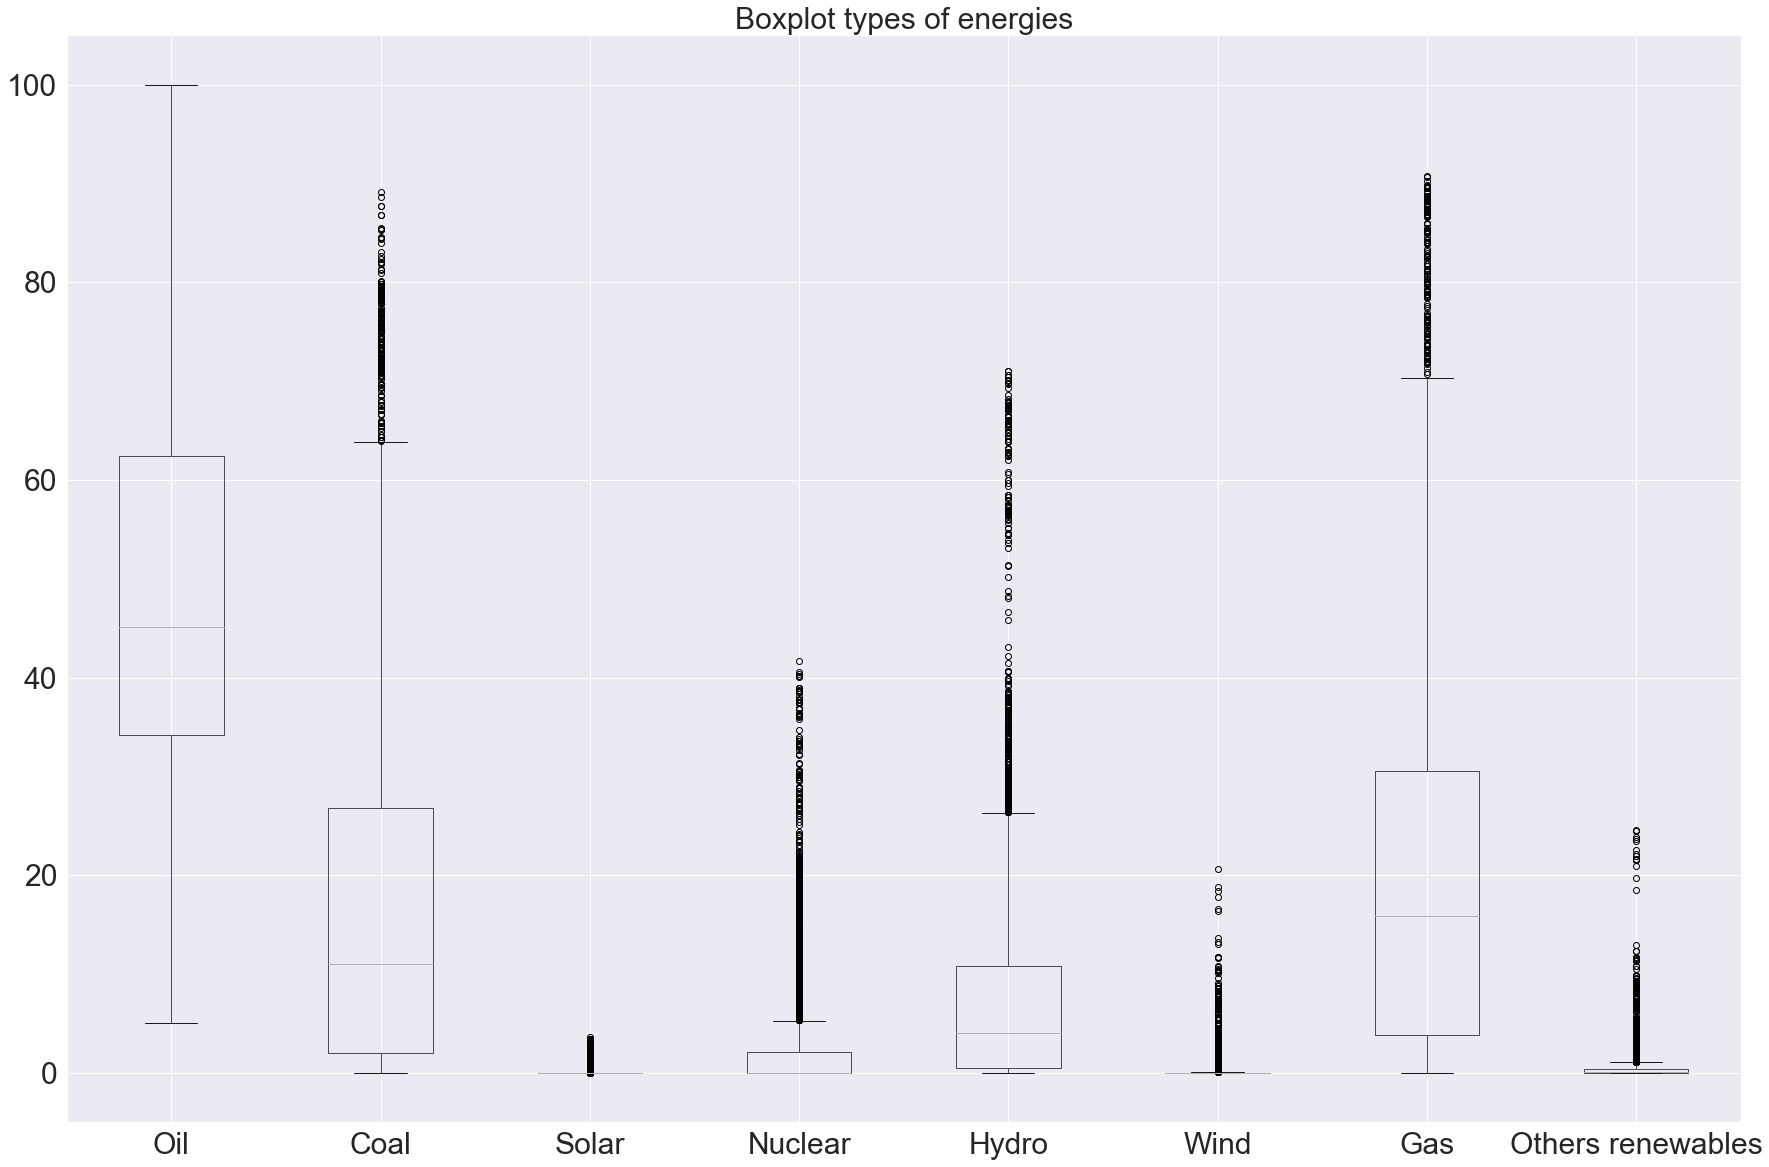

In [94]:
import matplotlib.pyplot as plt    

data4.boxplot(column=['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], fontsize= 30 , figsize= (30,20))
plt.title('Boxplot types of energies', fontsize= 30)
plt.show()


In [95]:
# stacked bar plot with the types of energy in each country

plt.figure(figsize=(30,25))
data4.plot.bar(x='Country', y= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], stacked=True, title='ciao')
plt.show()

<Figure size 2160x1800 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
# stacked bar plot with types of energy every year

plt.figure(figsize=(30,25))
data4.plot.bar(x='Year', y= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables'], stacked=True, title='ciao')
plt.show()